# Implementation of machine learning on Vacation Data

## Import the required Libraries

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd

#Import matplotlib
import matplotlib.pyplot as plt

#Import seaborn
import seaborn as sns

### Set Background Color for graphs

In [2]:
bg_color = '#a6ecf5'
graph_color = 'green'

## Load the dataset and perform data overview

In [3]:
# Read the data using pandas
df_vacations_data = pd.read_excel('vacation_data.xlsx')

In [4]:
# Show the first five observations
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
2    Male   21        3.0                         NaN   NSW   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
2              single               3.40                  Q2  3.07   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   

   vacation_behaviour  ... life_style_of_the_local_people  \
0                2.07  ...                             no   
1                2.00  ...                            yes   
2                1.23  ...                            yes   
3                2.17  ...                             no   
4                1.72  ...                            yes   

  intense_experience_of_nature cosiness/familiar_atmosphere  \
0                           no                           no   
1                           no                           no   
2                           no                          yes   
3                          yes                           no   
4                           no                           no   

  maintain_unspoilt_surroundings everything_organised  \
0                             no                   no   
1                             no                   no   
2                             no                   no   
3                             no                   no   
4                            yes                   no   

  unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
0                                no              no                     no   
1                                no              no                    yes   
2                                no             yes                     no   
3                                no              no                    yes   
4                                no              no                     no   

  Income(k$) Expenditure  
0       15.0        39.0  
1       15.0        81.0  
2       16.0         6.0  
3       16.0        77.0  
4       17.0        40.0  

[5 rows x 32 columns]

In [5]:
# Show the last five observations
df_vacations_data.tail()

Gender  Age  Education                Occupation State  \
995    Male   51        3.0  manager or administrator   VIC   
996    Male   58        4.0      small business owner    WA   
997    Male   41        8.0              professional   QLD   
998  Female   42        3.0              professional   VIC   
999  Female   32        6.0  manager or administrator    WA   

       relationship_status  obligation_rating obligation_category   NEP  \
995  separated or divorced               2.37                  Q1  3.40   
996  living with a partner               4.40                  Q4  3.87   
997                married               3.87                  Q3  3.40   
998  living with a partner               4.00                  Q3  3.13   
999  living with a partner               2.33                  Q1  3.60   

     vacation_behaviour  ... life_style_of_the_local_people  \
995                2.57  ...                            yes   
996                3.50  ...                            yes   
997                2.56  ...                             no   
998                4.70  ...                             no   
999                2.73  ...                            yes   

    intense_experience_of_nature cosiness/familiar_atmosphere  \
995                          yes                           no   
996                          yes                           no   
997                           no                           no   
998                           no                           no   
999                           no                           no   

    maintain_unspoilt_surroundings everything_organised  \
995                            yes                   no   
996                            yes                   no   
997                             no                   no   
998                             no                   no   
999                             no                   no   

    unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
995                                no             yes                    yes   
996                               yes             yes                     no   
997                                no              no                    yes   
998                                no              no                     no   
999                                no              no                    yes   

    Income(k$) Expenditure  
995        NaN         NaN  
996        NaN         NaN  
997        NaN         NaN  
998        NaN         NaN  
999        NaN         NaN  

[5 rows x 32 columns]

In [6]:
# Show the size of the data
df_vacations_data.shape

(1000, 32)

**INTERPRETATION**
 - We have 1000 observation
 - We have 32 attributes 

In [7]:
# Show the columns of the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**COLUMN INFO**
- Gender: Gender of the person who is going for vacation (e.g., Male, Female, Non-binary, etc.).
- Age: Age of the individual, likely in years.
- Education: Level of education attained by the individual (e.g., High School, Bachelor’s Degree, Master’s Degree, etc.).
- Occupation: Job or profession of the individual.
- State: State or region where the individual resides.
- Relationship.Status: Relationship status of the individual (e.g., Single, Married, Divorced, etc.).
- Obligation: Indicates some form of obligation (e.g., financial, familial, or other responsibilities). Exact meaning depends on the dataset context.
- Obligation2: Another column related to obligations, possibly a secondary or additional type of obligation.
- NEP: Likely an acronym or specific term related to the dataset. Without additional context, it’s unclear what this represents (e.g., "Net Effective Price," "Non-Exempt Personnel," etc.).
- Vacation.Behaviour**: Describes the individual’s behavior or preferences related to vacations (e.g., frequency, type of vacations, etc.).
- rest and relax: Preference for seeking rest and relaxation during vacations.
- luxury / be spoilt: Preference for luxury or being pampered during vacations.
- do sports: Preference for engaging in sports or physical activities during vacations.
- excitement, a challenge: Preference for seeking excitement or challenges during vacations.
- not exceed planned budget: Preference for staying within a planned budget during vacations.
- realise creativity: Preference for activities that allow the individual to express or realize their creativity during vacations.
- fun and entertainment: Preference for fun and entertainment during vacations.
- good company: Preference for spending vacations with good company (e.g., friends, family).
- health and beauty: Preference for activities related to health and beauty during vacations (e.g., spa treatments, wellness activities).
- free-and-easy-going: Preference for a relaxed, unstructured, or spontaneous vacation style.
- entertainment facilities: Preference for vacations that include access to entertainment facilities (e.g., resorts, theme parks).
- not care about prices: Indicates that the individual does not prioritize cost when planning vacations.
- life style of the local people: Preference for experiencing or learning about the lifestyle of local people during vacations.
- intense experience of nature: Preference for immersive or intense experiences in nature during vacations.
- cosiness/familiar atmosphere: Preference for cozy or familiar environments during vacations.
- maintain unspoilt surroundings: Preference for vacations that prioritize preserving or enjoying unspoiled natural surroundings.
- everything organised: Preference for vacations where everything is pre-organized or planned.
- unspoilt nature/natural landscape: Preference for vacations that focus on unspoiled natural landscapes.
- cultural offers: Preference for vacations that include cultural activities or experiences (e.g., museums, historical sites).
- change of surroundings: Preference for vacations that provide a change of environment or scenery.
- Income(k$): The individual’s income, likely in thousands of dollars (k$).
- Expenditure: The individual’s expenditure, possibly related to vacations or general spending.

In [8]:
# Show the datatype of the data (Information of the data)
df_vacations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   object 
 1   Age                                1000 non-null   int64  
 2   Education                          992 non-null    float64
 3   Occupation                         941 non-null    object 
 4   State                              1000 non-null   object 
 5   relationship_status                996 non-null    object 
 6   obligation_rating                  1000 non-null   float64
 7   obligation_category                1000 non-null   object 
 8   NEP                                1000 non-null   float64
 9   vacation_behaviour                 975 non-null    float64
 10  rest_and_relax                     1000 non-null   object 
 11  luxury_or_be_spoilt                1000 non-null   object

**INTERPRETATION**
 - We have 7 numerical columns
 - We have 25 categorical columns
 - Space utilized by the data is 250.1+ KB
 - We have null records in the data

In [9]:
# Showcase the basic statistics of the data
df_vacations_data.describe().T

count       mean        std    min    25%    50%    75%  \
Age                 1000.0  44.168000  14.539228  18.00  32.00  42.00  57.00   
Education            992.0   4.813508   2.422252   1.00   3.00   6.00   7.00   
obligation_rating   1000.0   3.734580   0.635835   1.00   3.37   3.80   4.20   
NEP                 1000.0   3.648640   0.561130   1.73   3.27   3.67   4.07   
vacation_behaviour   975.0   2.962800   0.668444   1.23   2.47   2.94   3.43   
Income(k$)           200.0  60.560000  26.264721  15.00  41.50  61.50  78.00   
Expenditure          200.0  50.200000  25.823522   1.00  34.75  50.00  73.00   

                      max  
Age                 105.0  
Education             8.0  
obligation_rating     5.0  
NEP                   5.0  
vacation_behaviour    4.9  
Income(k$)          137.0  
Expenditure          99.0

**INTERPRETATION**
 - We don't have outliers in the data

## Data Preprocessing

### Data Cleaning

In [10]:
# Show first five observations of the data
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
2    Male   21        3.0                         NaN   NSW   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
2              single               3.40                  Q2  3.07   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   

   vacation_behaviour  ... life_style_of_the_local_people  \
0                2.07  ...                             no   
1                2.00  ...                            yes   
2                1.23  ...                            yes   
3                2.17  ...                             no   
4                1.72  ...                            yes   

  intense_experience_of_nature cosiness/familiar_atmosphere  \
0                           no                           no   
1                           no                           no   
2                           no                          yes   
3                          yes                           no   
4                           no                           no   

  maintain_unspoilt_surroundings everything_organised  \
0                             no                   no   
1                             no                   no   
2                             no                   no   
3                             no                   no   
4                            yes                   no   

  unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
0                                no              no                     no   
1                                no              no                    yes   
2                                no             yes                     no   
3                                no              no                    yes   
4                                no              no                     no   

  Income(k$) Expenditure  
0       15.0        39.0  
1       15.0        81.0  
2       16.0         6.0  
3       16.0        77.0  
4       17.0        40.0  

[5 rows x 32 columns]

#### Perform the renaming action

In [11]:
# Show the columns in the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**INTERPRETATION**
 - Column names are already in good structure so there is no need of renaming

### Null value treatment

In [12]:
# Fetch the null records present in the data (count)
df_vacations_data.isnull().sum()

Gender                                 0
Age                                    0
Education                              8
Occupation                            59
State                                  0
relationship_status                    4
obligation_rating                      0
obligation_category                    0
NEP                                    0
vacation_behaviour                    25
rest_and_relax                         0
luxury_or_be_spoilt                    0
do_sports                              0
excitement_and_challenge               0
not_exceed_planned_budget              0
realise_creativity                     0
fun_and_entertainment                  0
good_company                           0
health_and_beauty                      0
free_and_easy_going                    0
entertainment_facilities               0
not_care_about_prices                  0
life_style_of_the_local_people         0
intense_experience_of_nature           0
cosiness/familia

**INTERPRETATION**
 - We have 8 missing records in Education column
 - We have 59 missing records in Occupation column
 - We have 8 missing records in relationship_status column
 - We have 25 missing records in vacation_behaviour column
 - We have 800 missing records in Income_Dollar_k column
 - We have 800 missing records in Expenditure_dollar_k column

In [13]:
# Find the percentage of the missing records
df_vacations_data.isnull().sum()/len(df_vacations_data) * 100

Gender                                0.0
Age                                   0.0
Education                             0.8
Occupation                            5.9
State                                 0.0
relationship_status                   0.4
obligation_rating                     0.0
obligation_category                   0.0
NEP                                   0.0
vacation_behaviour                    2.5
rest_and_relax                        0.0
luxury_or_be_spoilt                   0.0
do_sports                             0.0
excitement_and_challenge              0.0
not_exceed_planned_budget             0.0
realise_creativity                    0.0
fun_and_entertainment                 0.0
good_company                          0.0
health_and_beauty                     0.0
free_and_easy_going                   0.0
entertainment_facilities              0.0
not_care_about_prices                 0.0
life_style_of_the_local_people        0.0
intense_experience_of_nature      

**INTERPRETATION**
 - As per the first law the observations we need to remove are Education, Occupation, relationship_status, vacation_behaviour
 - As per the second law there is no as such column where we need to impute the missing records
 - As per the third law the columns we need to remove from the data are  Income_Dollar_k, Expenditure_dollar_k

In [14]:
# Perform the action of attributes removal
df_vacations_data.drop(['Income(k$)', 'Expenditure'], axis=1, inplace=True)

In [15]:
# Perform the action of observation removal
df_vacations_data.dropna(inplace=True)

In [16]:
# Perform the authentic check
df_vacations_data.isnull().sum()/len(df_vacations_data)*100

Gender                               0.0
Age                                  0.0
Education                            0.0
Occupation                           0.0
State                                0.0
relationship_status                  0.0
obligation_rating                    0.0
obligation_category                  0.0
NEP                                  0.0
vacation_behaviour                   0.0
rest_and_relax                       0.0
luxury_or_be_spoilt                  0.0
do_sports                            0.0
excitement_and_challenge             0.0
not_exceed_planned_budget            0.0
realise_creativity                   0.0
fun_and_entertainment                0.0
good_company                         0.0
health_and_beauty                    0.0
free_and_easy_going                  0.0
entertainment_facilities             0.0
not_care_about_prices                0.0
life_style_of_the_local_people       0.0
intense_experience_of_nature         0.0
cosiness/familia

In [17]:
# Check the changing number of observations in data due to null value treatment
df_vacations_data.shape

(912, 30)

**INTERPRETATION**
 - Droping the null records is not impacting on records present in the data, the difference is only 88 from original

## Null value treatment done

## EDA (Exploratory Data Analysis)

## Univariate Analysis

In [18]:
# Show the first five observations of the data
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   
5  Female   63        7.0                     retired   QLD   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   
5             married               4.40                  Q4  4.27   

   vacation_behaviour  ... entertainment_facilities not_care_about_prices  \
0                2.07  ...                       no                    no   
1                2.00  ...                       no                    no   
3                2.17  ...                      yes                    no   
4                1.72  ...                       no                    no   
5                3.30  ...                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 30 columns]

In [19]:
# Segregate the data based on the data type

# Numerical Data
df_numerical = df_vacations_data.select_dtypes(include='number')

# Show the first five observations of Numerical Data
df_numerical.head()

Age  Education  obligation_rating   NEP  vacation_behaviour
0   25        6.0               4.80  3.20                2.07
1   31        8.0               3.30  3.40                2.00
3   18        2.0               2.63  3.40                2.17
4   61        3.0               3.40  3.73                1.72
5   63        7.0               4.40  4.27                3.30

In [20]:
# Categorical Data
df_categorical = df_vacations_data.select_dtypes(include='object')

# Show the first five observations of Categorical Data
df_categorical.head()

Gender                  Occupation State relationship_status  \
0  Female  Clerical or service worker   VIC              single   
1  Female                professional    WA             married   
3  Female                  unemployed   NSW              single   
4    Male                     retired    WA             married   
5  Female                     retired   QLD             married   

  obligation_category rest_and_relax luxury_or_be_spoilt do_sports  \
0                  Q4            yes                  no        no   
1                  Q1            yes                 yes        no   
3                  Q1            yes                 yes        no   
4                  Q2            yes                  no        no   
5                  Q4            yes                  no        no   

  excitement_and_challenge not_exceed_planned_budget  ...  \
0                       no                        no  ...   
1                       no                        no  ...   
3                       no                       yes  ...   
4                       no                       yes  ...   
5                       no                       yes  ...   

  entertainment_facilities not_care_about_prices  \
0                       no                    no   
1                       no                    no   
3                      yes                    no   
4                       no                    no   
5                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 25 columns]

### Perform the Univariate Analysis on numerical data

In [21]:
# Show the first five observations of Numerical Data
df_numerical.head()

Age  Education  obligation_rating   NEP  vacation_behaviour
0   25        6.0               4.80  3.20                2.07
1   31        8.0               3.30  3.40                2.00
3   18        2.0               2.63  3.40                2.17
4   61        3.0               3.40  3.73                1.72
5   63        7.0               4.40  4.27                3.30

In [22]:
# Show the columns present in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Age

In [23]:
# Show the minimum
df_numerical.Age.min()

np.int64(18)

In [24]:
# Show the maximum
df_numerical.Age.max()

np.int64(105)

In [25]:
# Show the average(mean)
round(df_numerical.Age.mean(), 3)

np.float64(44.225)

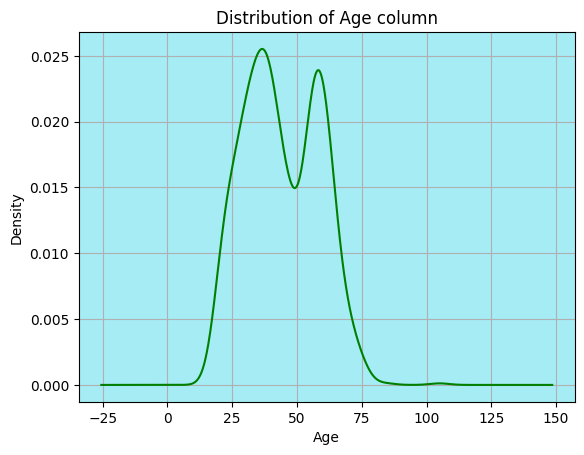

In [26]:
# Check the distribution(KDE Plot)
df_numerical.Age.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of Age column')
plt.xlabel('Age')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum age of the person going for vacation is 18 and maximum is 105
 - Average age of the person going for vacation is 44.225
 - In visualization we can see multimodal data, mostly we have two age groups who are travelling those are 25 to 50 and 55 to 70

In [27]:
# Show the columns in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Education

In [28]:
# Show the minimum
df_numerical.Education.min()

np.float64(1.0)

In [29]:
# Show the maximum
df_numerical.Education.max()

np.float64(8.0)

In [30]:
# Show the average(mean)
round(df_numerical.Education.mean(), 3)

np.float64(4.884)

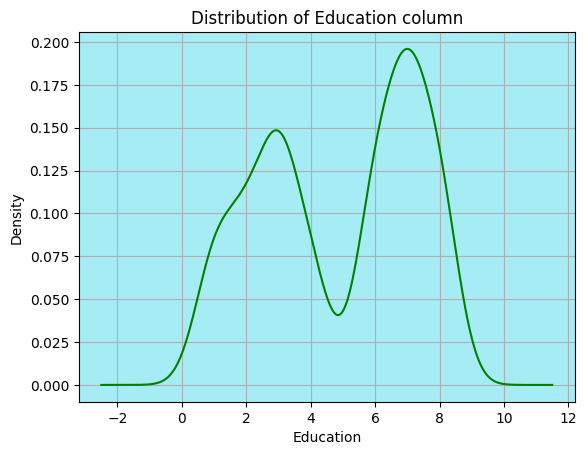

In [31]:
# Check the distribution(KDE Plot)
df_numerical.Education.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of Education column')
plt.xlabel('Education')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Education Of The Person Who Is Going To Vacation Is 1.000 .
 - Maximum Education Of The Person Who Is Going To Vacation Is 8.000 .
 - Average Education Of The Person Who Is Going To Vacation Is 4.884 .
 - In Visualization We See The Multi-Modal Data.(By Two Peak Values)
 - Mostly We Have Two Education Groups Who Are Traveling, Those Are From 2-4 & 6-8.

##### obligation_rating

In [32]:
# Show the minimum
df_numerical.obligation_rating.min()

np.float64(1.0)

In [33]:
# Show the maximum
df_numerical.obligation_rating.max()

np.float64(5.0)

In [34]:
# Show the average(mean)
round(df_numerical.obligation_rating.mean(), 3)

np.float64(3.735)

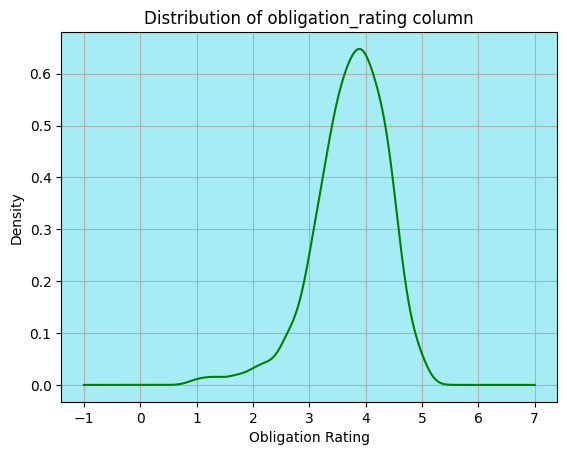

In [35]:
# Check the distribution(KDE Plot)
df_numerical.obligation_rating.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of obligation_rating column')
plt.xlabel('Obligation Rating')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Obligation_Rating Of The Person Who Is Going To Vacation Is 1.000 .
 - Maximum Obligation_Rating Of The Person Who Is Going To Vacation Is 5.000 .
 - Average Obligation_Rating Of The Person Who Is Going To Vacation Is 3.735 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One Obligation_Rating Groups Who Are Traveling, Those Are From 3.0 to 4.6.

##### NEP

In [36]:
# Show the minimum
df_numerical.NEP.min()

np.float64(1.73)

In [37]:
# Show the maximum
df_numerical.NEP.max()

np.float64(5.0)

In [38]:
# Show the average(mean)
round(df_numerical.NEP.mean(), 3)

np.float64(3.647)

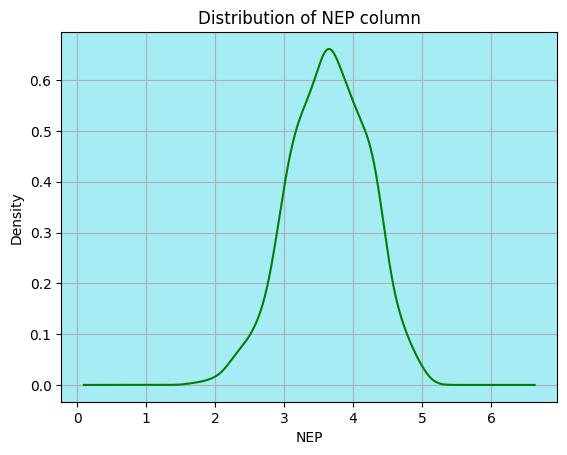

In [39]:
# Check the distribution(KDE Plot)
df_numerical.NEP.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of NEP column')
plt.xlabel('NEP')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum NEP Of The Person Who Is Going To Vacation Is 1.733 .
 - Maximum NEP Of The Person Who Is Going To Vacation Is 5.000 .
 - Average NEP Of The Person Who Is Going To Vacation Is 3.647 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One NEP Groups Who Are Traveling, Those Are From 3.0 to 4.3.

##### vacation_behaviour

In [40]:
# Show the minimum
df_numerical.vacation_behaviour.min()

np.float64(1.39)

In [41]:
# Show the maximum
df_numerical.vacation_behaviour.max()

np.float64(4.77)

In [42]:
# Show the average(mean)
round(df_numerical.vacation_behaviour.mean(), 3)

np.float64(2.962)

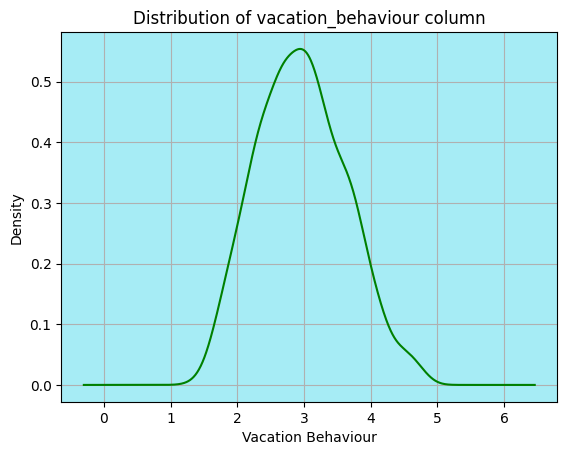

In [43]:
# Check the distribution(KDE Plot)
df_numerical.vacation_behaviour.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of vacation_behaviour column')
plt.xlabel('Vacation Behaviour')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Vacation_Behaviour Of The Person Who Is Going To Vacation Is 1.392 .
 - Maximum Vacation_Behaviour Of The Person Who Is Going To Vacation Is 4.766 .
 - Average Vacation_Behaviour Of The Person Who Is Going To Vacation Is 2.962 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One Vacation_Behaviour Groups Who Are Traveling, Those Are From 2-4.

### Univariate analysis on categorical data

In [44]:
# Show the first five observations of categorical data
df_categorical.head()

Gender                  Occupation State relationship_status  \
0  Female  Clerical or service worker   VIC              single   
1  Female                professional    WA             married   
3  Female                  unemployed   NSW              single   
4    Male                     retired    WA             married   
5  Female                     retired   QLD             married   

  obligation_category rest_and_relax luxury_or_be_spoilt do_sports  \
0                  Q4            yes                  no        no   
1                  Q1            yes                 yes        no   
3                  Q1            yes                 yes        no   
4                  Q2            yes                  no        no   
5                  Q4            yes                  no        no   

  excitement_and_challenge not_exceed_planned_budget  ...  \
0                       no                        no  ...   
1                       no                        no  ...   
3                       no                       yes  ...   
4                       no                       yes  ...   
5                       no                       yes  ...   

  entertainment_facilities not_care_about_prices  \
0                       no                    no   
1                       no                    no   
3                      yes                    no   
4                       no                    no   
5                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 25 columns]

In [45]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### Gender

In [46]:
# Show the count
df_categorical.Gender.value_counts()

Gender
Male      482
Female    430
Name: count, dtype: int64

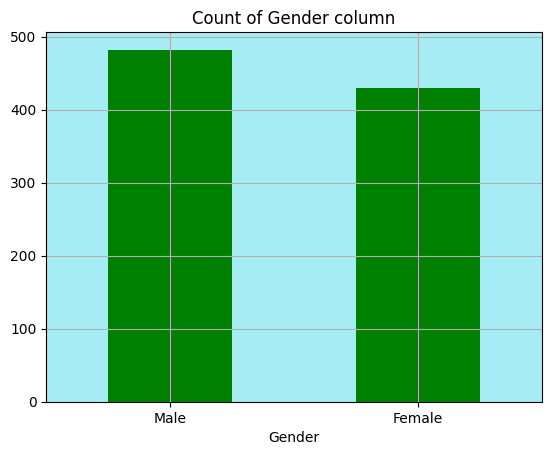

In [47]:
# Create a visualization
df_categorical.Gender.value_counts().plot(kind='bar', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of Gender column')
plt.xlabel('Gender')
plt.grid()
plt.xticks(rotation=0)
plt.show()

**INTERPRETATION**
 - In Gender column we have 482 Male and 430 Female.
 - It represent quite balanced data

In [48]:
# Show the columns present in the categorical dataframe
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### Occupation

In [49]:
# Show the count
df_categorical.Occupation.value_counts()

Occupation
professional                  253
manager or administrator      180
Clerical or service worker     99
retired                        87
home-duties                    75
sales                          61
small business owner           56
unemployed                     35
tradesperson                   27
transport worker               20
labourer                       19
Name: count, dtype: int64

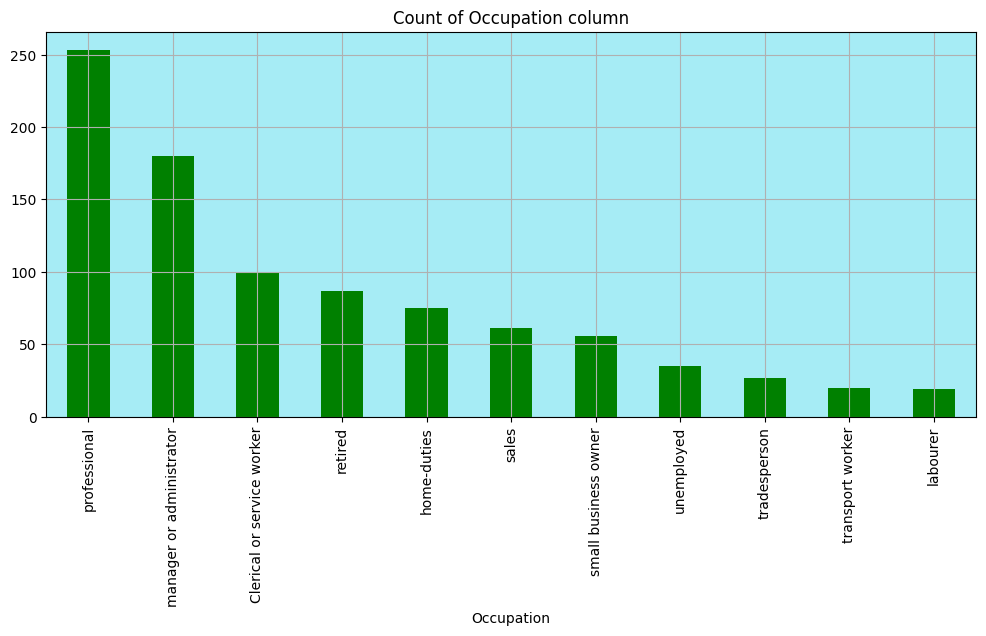

In [50]:
# Create a visualization
df_categorical.Occupation.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of Occupation column')
plt.xlabel('Occupation')
plt.grid()
plt.show()

**INTERPRETATION**
 - In this data Professional and manager of administrator are dominating that we can see in the graph
 - As per the labourer and transport worker contributing least in the data

In [51]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### State

In [52]:
# Show the count
df_categorical.State.value_counts()

State
NSW    298
VIC    245
QLD    186
WA      81
SA      63
ACT     21
Tas     12
NT       6
Name: count, dtype: int64

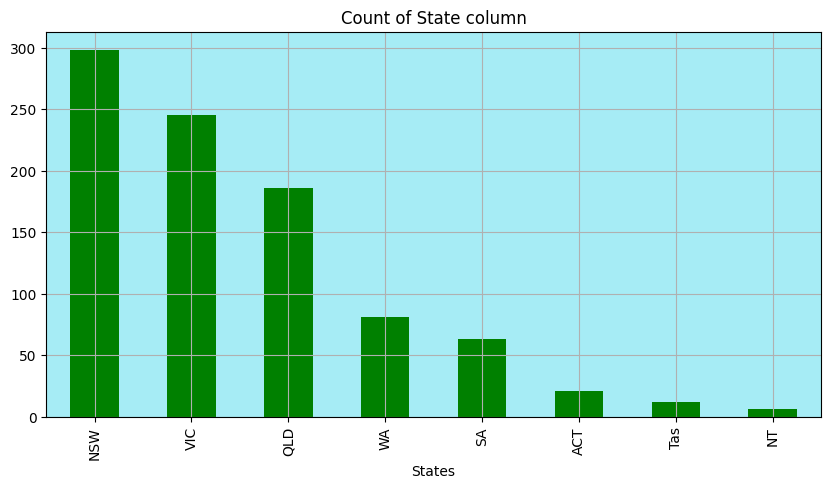

In [53]:
# Create a visualization
df_categorical.State.value_counts().plot(kind='bar', color=graph_color, figsize=(10,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of State column')
plt.xlabel('States')
plt.grid()
plt.show()

**INTERPRETATION**
 - In this data NSW, VIC and QLD are dominating that we can see in the graph
 - As per the data NT, Tas and ACT are contributing least

In [54]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### relationship_status

In [55]:
# Show the count
df_categorical.relationship_status.value_counts()

relationship_status
married                  481
single                   191
living with a partner    133
separated or divorced     95
widowed                   12
Name: count, dtype: int64

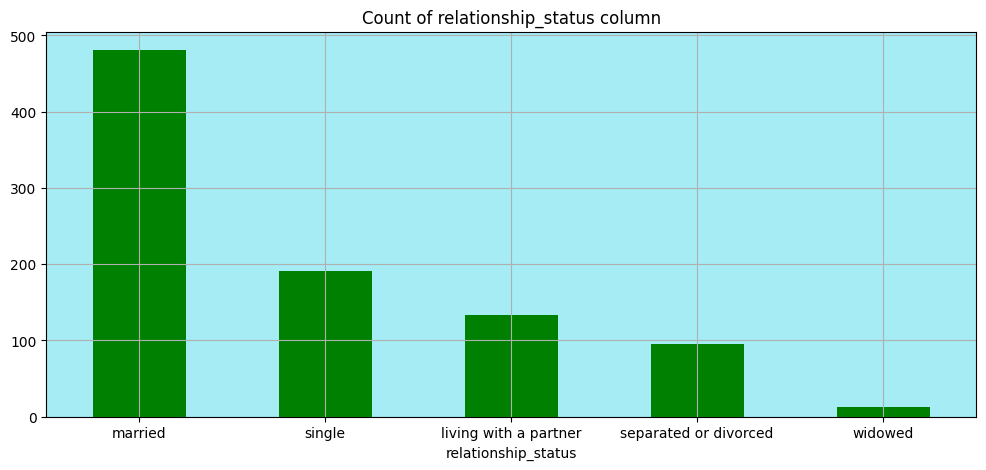

In [56]:
# Create a visualization
df_categorical.relationship_status.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of relationship_status column')
plt.xlabel('relationship_status')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - As per the data, Mostly married people goes for vacation
 - As per the data, widowed people prefer less to go for vacation

In [57]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### obligation_category

In [58]:
# Show the count
df_categorical.obligation_category.value_counts()

obligation_category
Q2    238
Q3    231
Q1    226
Q4    217
Name: count, dtype: int64

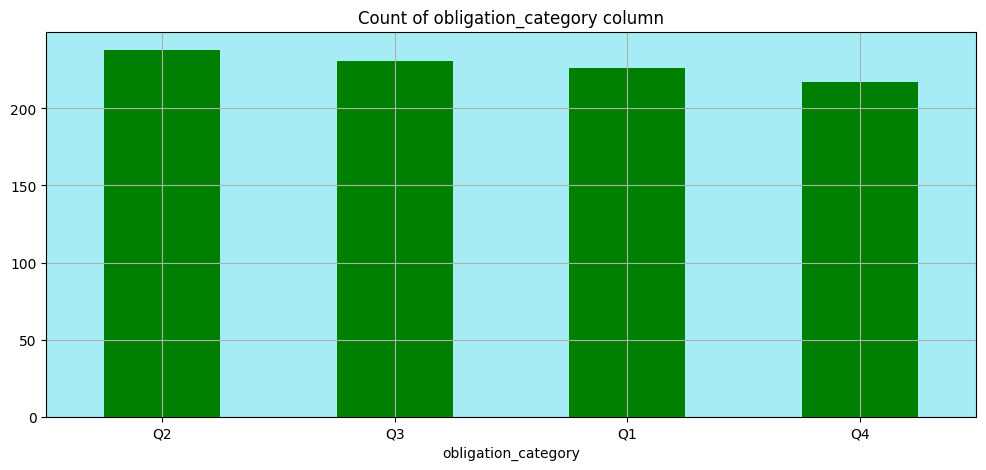

In [59]:
# Create a visualization
df_categorical.obligation_category.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of obligation_category column')
plt.xlabel('obligation_category')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is balanced

In [60]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### rest_and_relax

In [61]:
# Show the count
df_categorical.rest_and_relax.value_counts()

rest_and_relax
yes    825
no      87
Name: count, dtype: int64

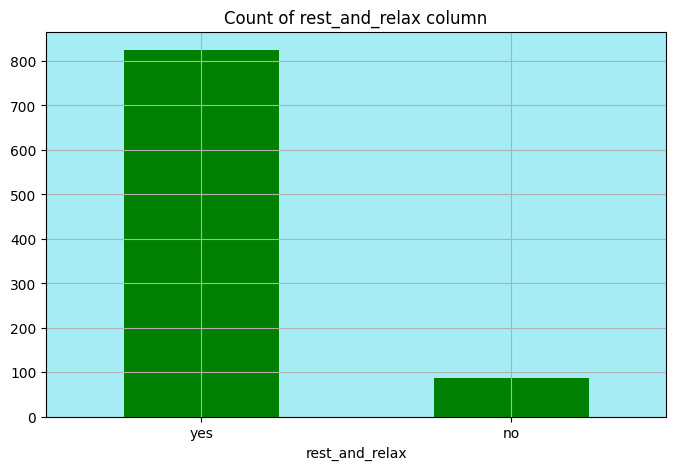

In [62]:
# Create a visualization
df_categorical.rest_and_relax.value_counts().plot(kind='bar', color=graph_color, figsize=(8,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of rest_and_relax column')
plt.xlabel('rest_and_relax')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, 825 are good for 'rest and relax' remaining are not good. 
 - Most places are good for rest and relax

In [63]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### luxury_or_be_spoilt

In [64]:
# Show the count
df_categorical.luxury_or_be_spoilt.value_counts()

luxury_or_be_spoilt
no     659
yes    253
Name: count, dtype: int64

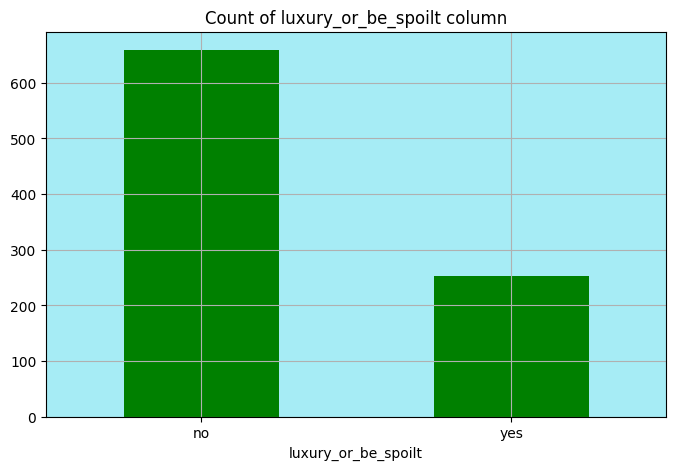

In [65]:
# Create a visualization
df_categorical.luxury_or_be_spoilt.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of luxury_or_be_spoilt column')
plt.xlabel('luxury_or_be_spoilt')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, 254 are good for 'luxury or be sploit' and remaining are not. 

In [66]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### do_sports

In [67]:
# Show the count
df_categorical.do_sports.value_counts()

do_sports
no     784
yes    128
Name: count, dtype: int64

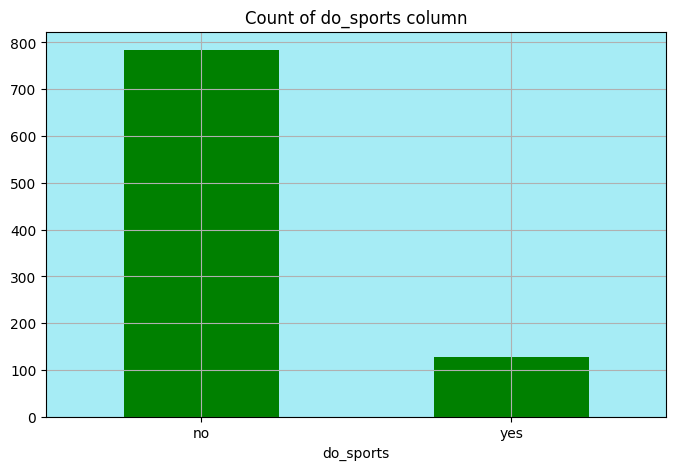

In [68]:
# Create a visualization
df_categorical.do_sports.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of do_sports column')
plt.xlabel('do_sports')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, most of the people don't want to do sports 

In [69]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### excitement_and_challenge

In [70]:
# Show the count
df_categorical.excitement_and_challenge.value_counts()

excitement_and_challenge
no     601
yes    311
Name: count, dtype: int64

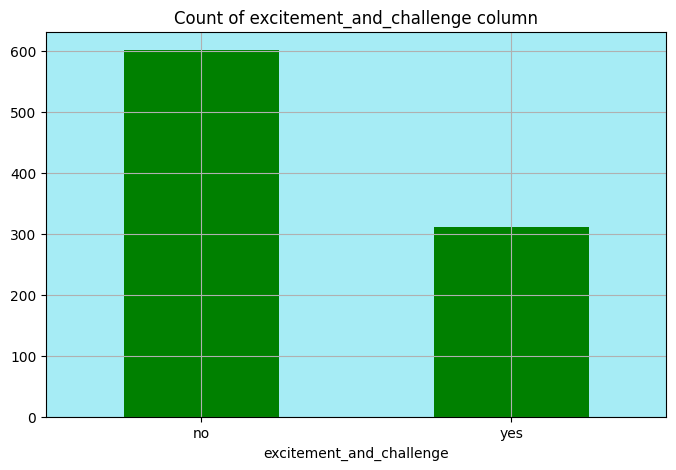

In [71]:
# Create a visualization
df_categorical.excitement_and_challenge.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of excitement_and_challenge column')
plt.xlabel('excitement_and_challenge')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Most peoples are not excited for challanges
 - In this data, there are 601 'No' and 311 'Yes'

In [72]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### not_exceed_planned_budget

In [73]:
# Show the count
df_categorical.not_exceed_planned_budget.value_counts()

not_exceed_planned_budget
yes    470
no     442
Name: count, dtype: int64

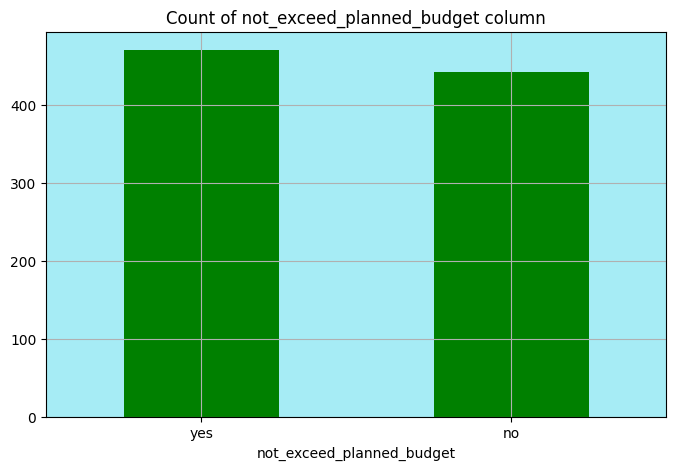

In [74]:
# Create a visualization
df_categorical.not_exceed_planned_budget.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of not_exceed_planned_budget column')
plt.xlabel('not_exceed_planned_budget')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is quite balanced
 - Almost same no of people exceeded and not exceeded the budget

In [75]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### realise_creativity

In [76]:
# Show the count
df_categorical.realise_creativity.value_counts()

realise_creativity
no     840
yes     72
Name: count, dtype: int64

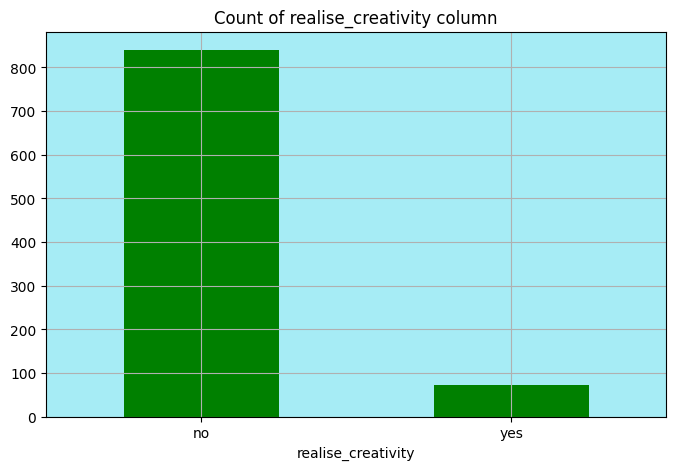

In [77]:
# Create a visualization
df_categorical.realise_creativity.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of realise_creativity column')
plt.xlabel('realise_creativity')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - As per the data, Less number of people realized creativity 

In [78]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### fun_and_entertainment

In [79]:
# Show the count
df_categorical.fun_and_entertainment.value_counts()

fun_and_entertainment
yes    490
no     422
Name: count, dtype: int64

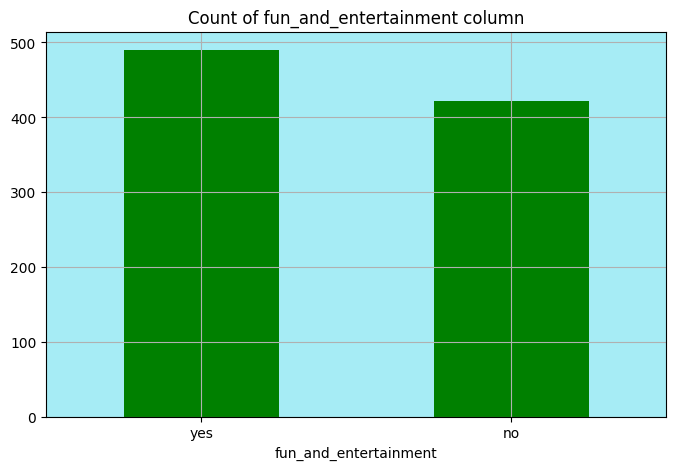

In [80]:
# Create a visualization
df_categorical.fun_and_entertainment.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of fun_and_entertainment column')
plt.xlabel('fun_and_entertainment')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced, indicating a relatively even distribution across the categories.
 - A nearly equal number of people found vacations to be fun and entertaining, suggesting a consistent perception of enjoyment related to vacations.

In [81]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### good_company

In [82]:
# Show the count
df_categorical.good_company.value_counts()

good_company
no     483
yes    429
Name: count, dtype: int64

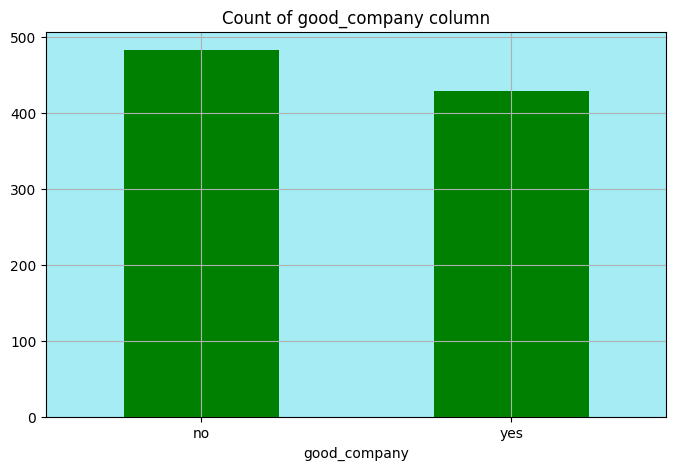

In [83]:
# Create a visualization
df_categorical.good_company.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of good_company column')
plt.xlabel('good_company')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced, showing a fairly even distribution across the categories.
 - Nearly the same number of people reported good company as those who did not.

In [84]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### health_and_beauty

In [85]:
# Show the count
df_categorical.health_and_beauty.value_counts()

health_and_beauty
no     795
yes    117
Name: count, dtype: int64

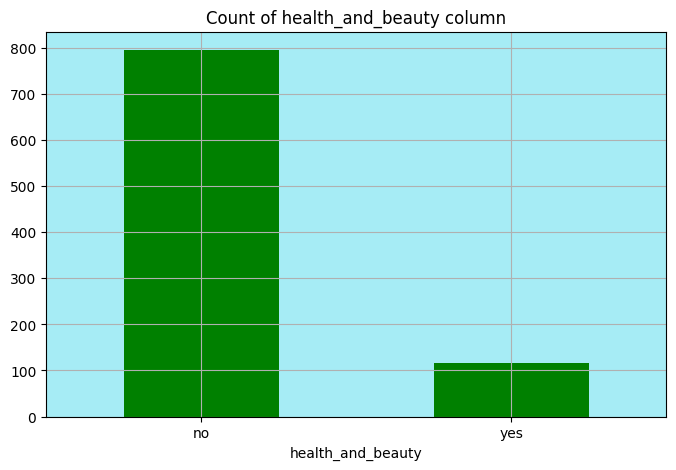

In [86]:
# Create a visualization
df_categorical.health_and_beauty.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of health_and_beauty column')
plt.xlabel('health_and_beauty')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - As per the data, Most tourist doesn't focus on their health and beauty.

In [87]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### free_and_easy_going

In [88]:
# Show the count
df_categorical.free_and_easy_going.value_counts()

free_and_easy_going
yes    488
no     424
Name: count, dtype: int64

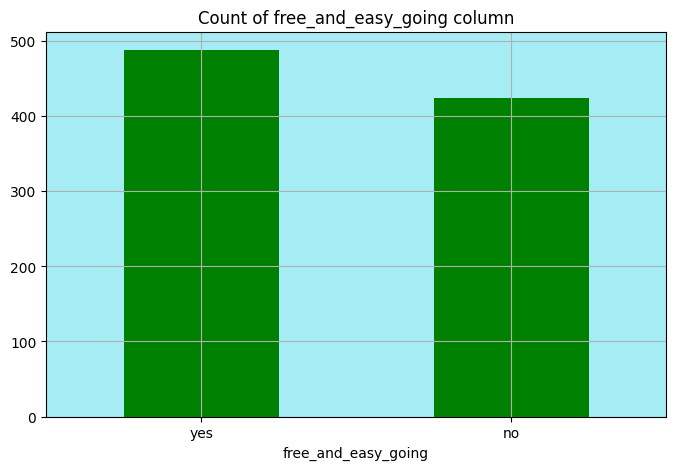

In [89]:
# Create a visualization
df_categorical.free_and_easy_going.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of free_and_easy_going column')
plt.xlabel('free_and_easy_going')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is quite balanced
 - Almost same number of people found their trip to be free and easygoing, while an almost equal number did not

In [90]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### entertainment_facilities

In [91]:
# Show the count
df_categorical.entertainment_facilities.value_counts()

entertainment_facilities
no     737
yes    175
Name: count, dtype: int64

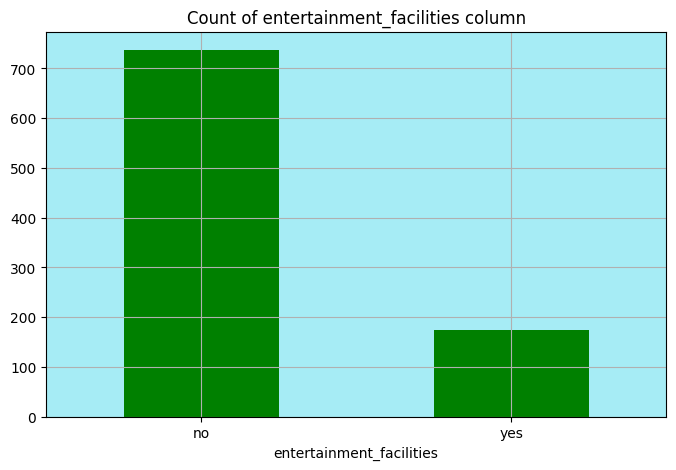

In [92]:
# Create a visualization
df_categorical.entertainment_facilities.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of entertainment_facilities column')
plt.xlabel('entertainment_facilities')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist felt that there is not good entertainment facilities.

In [93]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### not_care_about_prices

In [94]:
# Show the count
df_categorical.not_care_about_prices.value_counts()

not_care_about_prices
no     743
yes    169
Name: count, dtype: int64

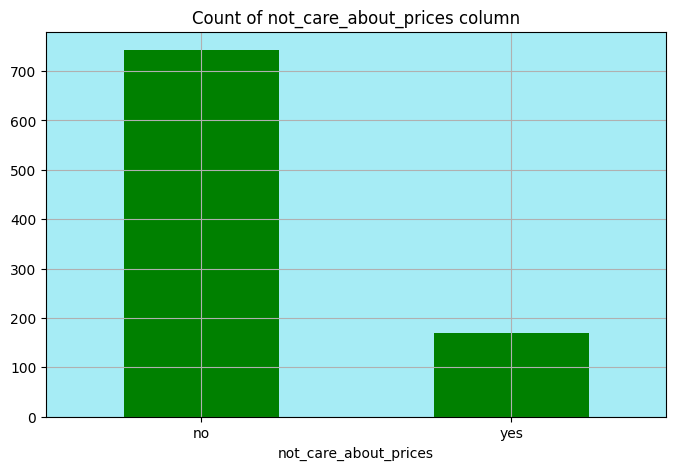

In [95]:
# Create a visualization
df_categorical.not_care_about_prices.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of not_care_about_prices column')
plt.xlabel('not_care_about_prices')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist don't care about the prices during their trip.

In [96]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### life_style_of_the_local_people

In [97]:
# Show the count
df_categorical.life_style_of_the_local_people.value_counts()

life_style_of_the_local_people
no     484
yes    428
Name: count, dtype: int64

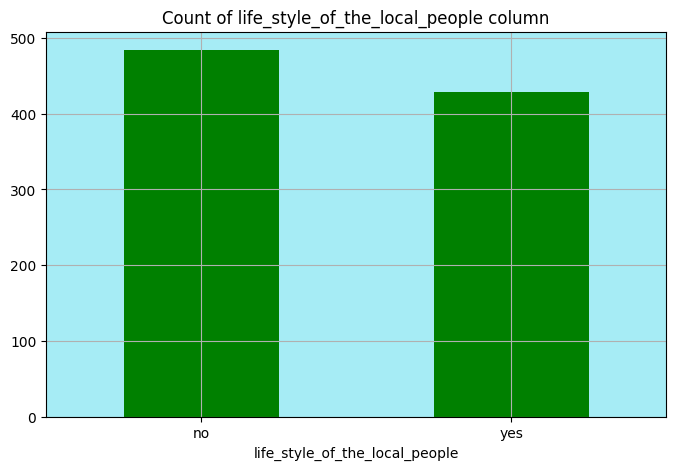

In [98]:
# Create a visualization
df_categorical.life_style_of_the_local_people.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of life_style_of_the_local_people column')
plt.xlabel('life_style_of_the_local_people')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced
 - An almost equal number of tourists found the local lifestyle as good and not good.

In [99]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### intense_experience_of_nature

In [100]:
# Show the count
df_categorical.intense_experience_of_nature.value_counts()

intense_experience_of_nature
no     715
yes    197
Name: count, dtype: int64

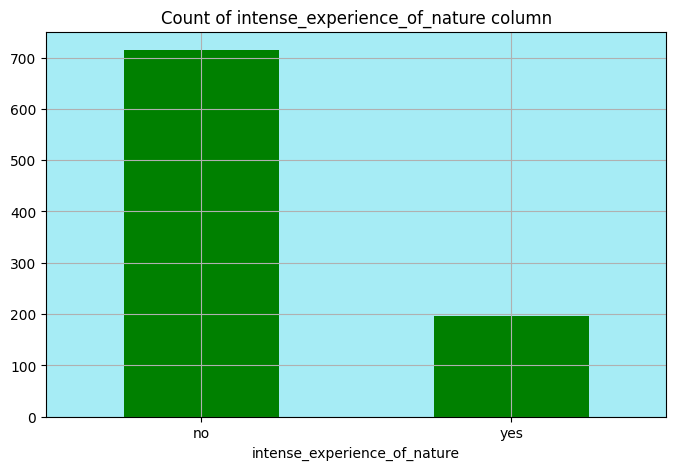

In [101]:
# Create a visualization
df_categorical.intense_experience_of_nature.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of intense_experience_of_nature column')
plt.xlabel('intense_experience_of_nature')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourists didn't found intense experience of nature.

In [102]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### cosiness/familiar_atmosphere

In [103]:
# Show the count
df_categorical['cosiness/familiar_atmosphere'].value_counts()

cosiness/familiar_atmosphere
no     744
yes    168
Name: count, dtype: int64

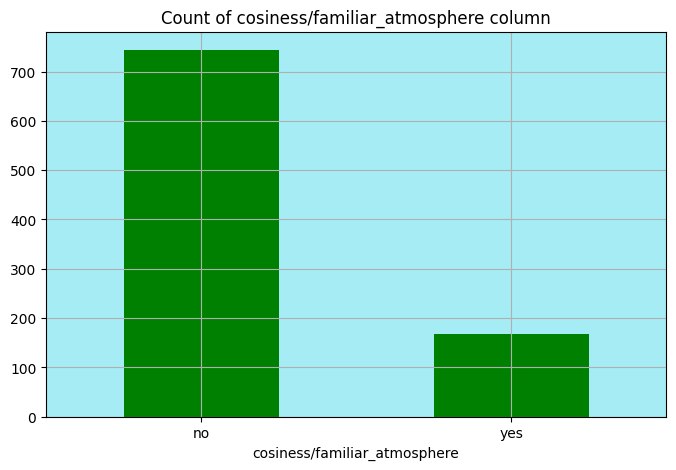

In [104]:
# Create a visualization
df_categorical['cosiness/familiar_atmosphere'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of cosiness/familiar_atmosphere column')
plt.xlabel('cosiness/familiar_atmosphere')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourists do not feel cosiness or familiar atmosphere during their trip.

In [105]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### maintain_unspoilt_surroundings

In [106]:
# Show the count
df_categorical.maintain_unspoilt_surroundings.value_counts()

maintain_unspoilt_surroundings
no     631
yes    281
Name: count, dtype: int64

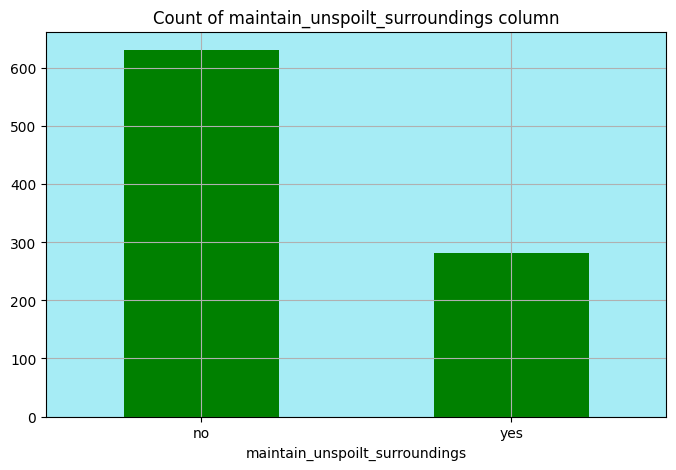

In [107]:
# Create a visualization
df_categorical.maintain_unspoilt_surroundings.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of maintain_unspoilt_surroundings column')
plt.xlabel('maintain_unspoilt_surroundings')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Majority of people don't find unsploit surroundings.

In [108]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### everything_organised

In [109]:
# Show the count
df_categorical.everything_organised.value_counts()

everything_organised
no     764
yes    148
Name: count, dtype: int64

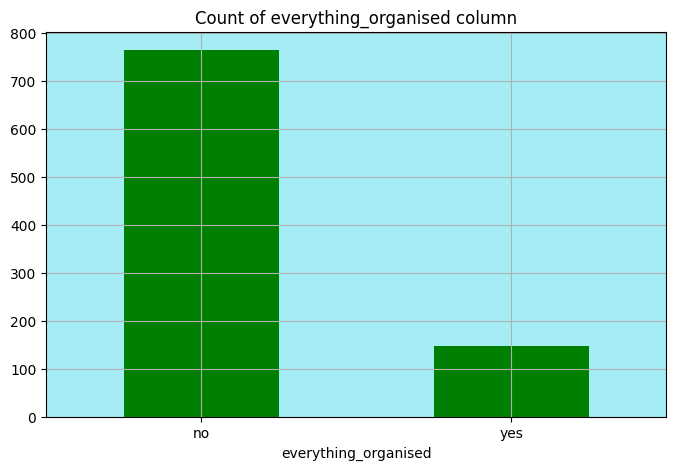

In [110]:
# Create a visualization
df_categorical.everything_organised.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of everything_organised column')
plt.xlabel('everything_organised')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourist do not organize everything.

In [111]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### unspoilt_nature/natural_landscape

In [112]:
# Show the count
df_categorical['unspoilt_nature/natural_landscape'].value_counts()

unspoilt_nature/natural_landscape
no     669
yes    243
Name: count, dtype: int64

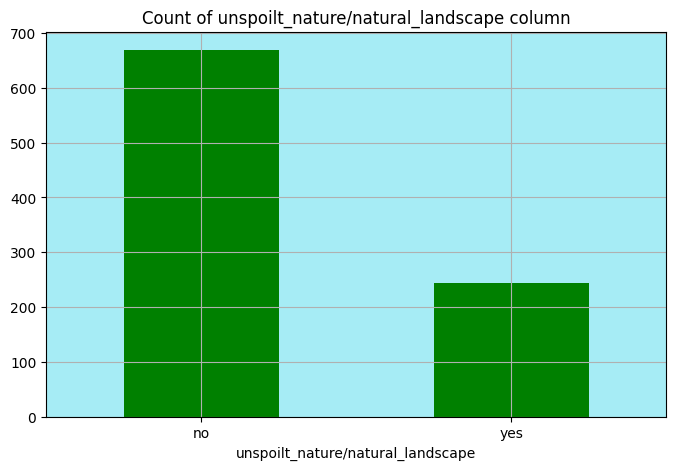

In [113]:
# Create a visualization
df_categorical['unspoilt_nature/natural_landscape'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of unspoilt_nature/natural_landscape column')
plt.xlabel('unspoilt_nature/natural_landscape')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist do not want to go unspoilt nature or natural landscape.

In [114]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

In [115]:
# Show the count
df_categorical.cultural_offers.value_counts()

cultural_offers
no     655
yes    257
Name: count, dtype: int64

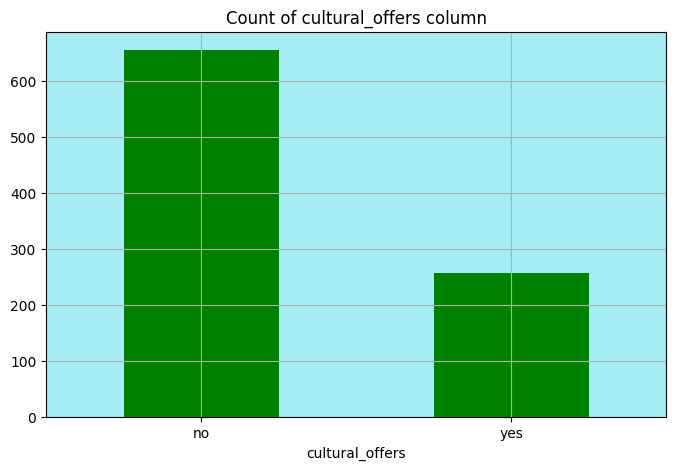

In [116]:
# Create a visualization
df_categorical.cultural_offers.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of cultural_offers column')
plt.xlabel('cultural_offers')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourists don't get cultural offers while travelling.

In [117]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### change_of_surroundings

In [118]:
# Show the count
df_categorical.change_of_surroundings.value_counts()

change_of_surroundings
yes    623
no     289
Name: count, dtype: int64

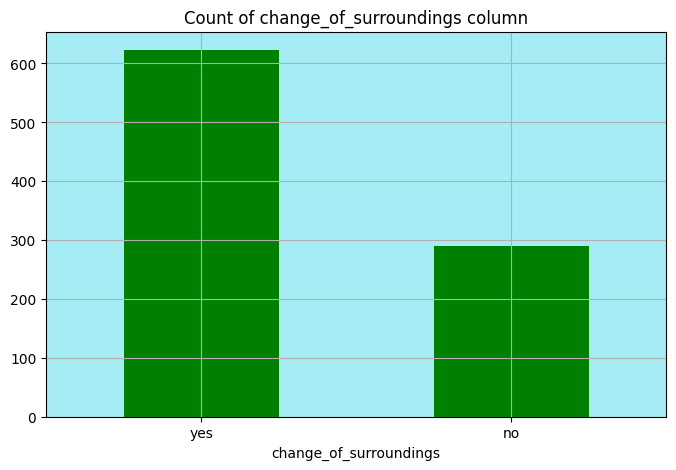

In [119]:
# Create a visualization
df_categorical.change_of_surroundings.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of change_of_surroundings column')
plt.xlabel('change_of_surroundings')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourists go for vacation to chaneg surroundings

## Bivaraiate Analysis

In [120]:
# Show first five records of the dataframe
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   
5  Female   63        7.0                     retired   QLD   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   
5             married               4.40                  Q4  4.27   

   vacation_behaviour  ... entertainment_facilities not_care_about_prices  \
0                2.07  ...                       no                    no   
1                2.00  ...                       no                    no   
3                2.17  ...                      yes                    no   
4                1.72  ...                       no                    no   
5                3.30  ...                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 30 columns]

In [121]:
# Step 1: Find the correlation matrix
df_numerical.corr()

Age  Education  obligation_rating       NEP  \
Age                 1.000000  -0.174054           0.125146  0.081328   
Education          -0.174054   1.000000          -0.066780 -0.034069   
obligation_rating   0.125146  -0.066780           1.000000  0.359040   
NEP                 0.081328  -0.034069           0.359040  1.000000   
vacation_behaviour  0.134643  -0.090449           0.519509  0.267017   

                    vacation_behaviour  
Age                           0.134643  
Education                    -0.090449  
obligation_rating             0.519509  
NEP                           0.267017  
vacation_behaviour            1.000000

**INTERPRETATION**
 - There is no such correlation between numerical variables in the given data
 
**NOTE**
 - Just for demonstration we are going to plot correlation between `obligation_rating` and `vacation_behaviour`

##### obligation_rating vs vacation_behaviour

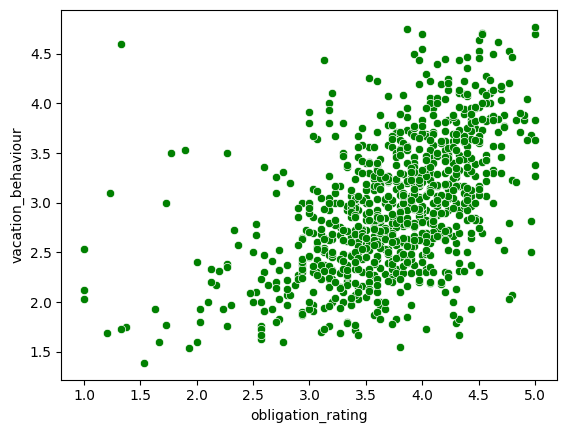

In [122]:
# Plot the scatter between given variables
sns.scatterplot(x=df_numerical.obligation_rating, y=df_numerical.vacation_behaviour, color=graph_color)
plt.show()

### Bivariate analysis on one numeric and one categorical variable

In [123]:
# Show the column present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

In [124]:
# Show the column present in numerical data frame
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

#### Gender, Age

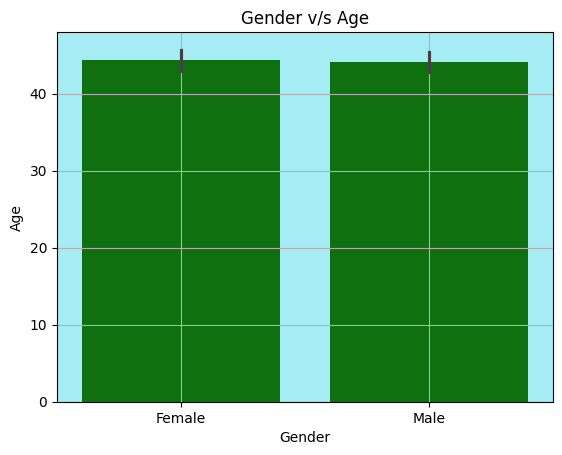

In [125]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

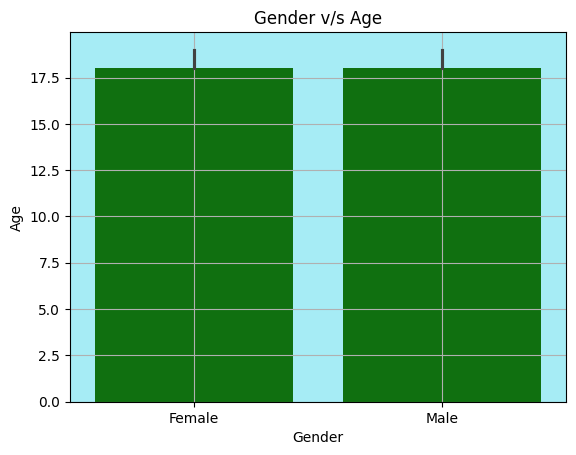

In [126]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

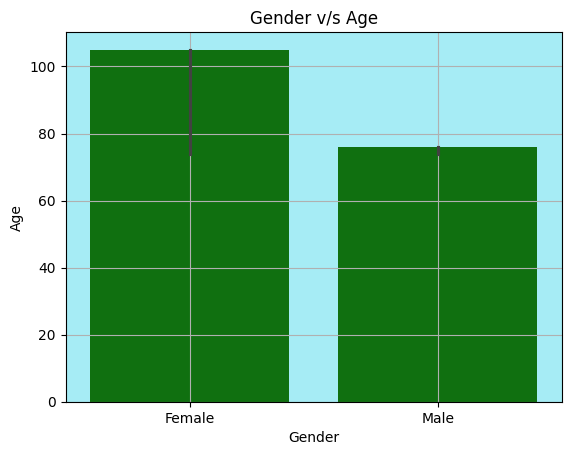

In [127]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

**INTERPRETATION**
 - In the data we can see that categories are balanced.
 - Minimum age by the gender is quite balanced but maximum age behaving quite unusual. 
 - Maximum age for female is more than 100 and the male age is less than 80.

#### Occupation, Age

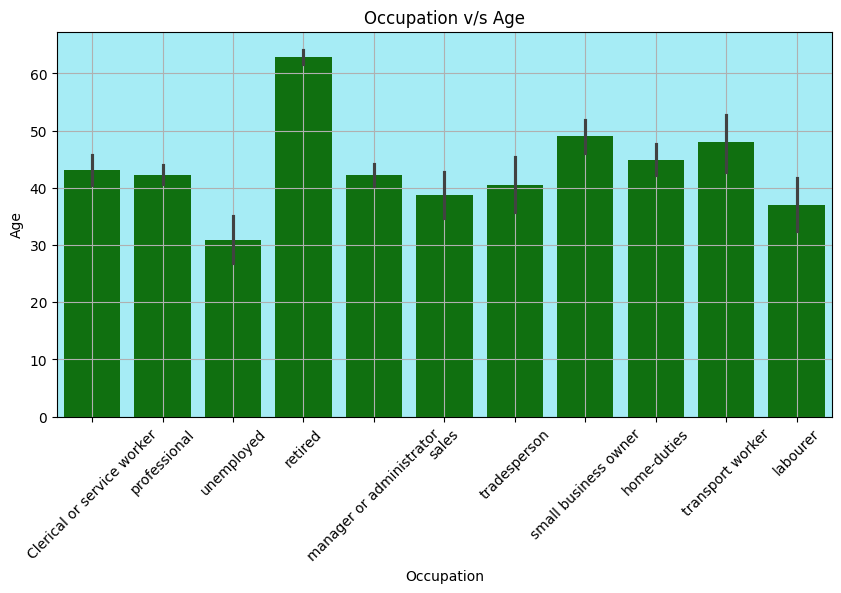

In [128]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age')
plt.grid()
plt.show()


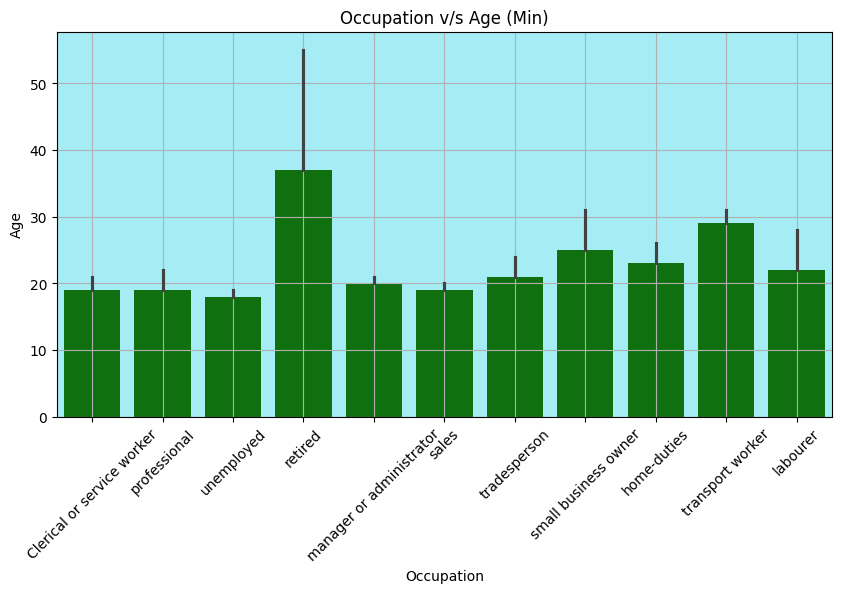

In [129]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age (Min)')
plt.grid()
plt.show()


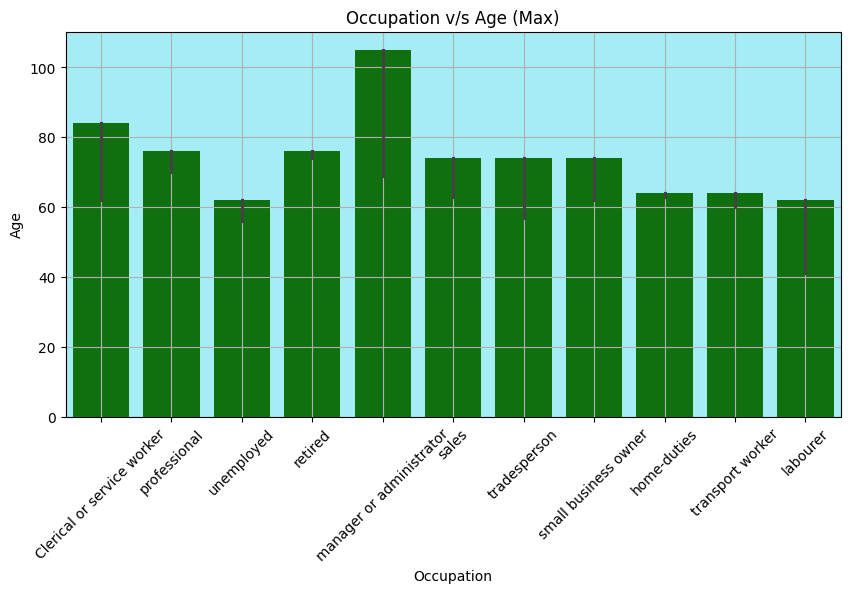

In [130]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced
 - Minimum age by occupation for retired is greater than 30 and for Maximum age by occupation for manager and administrator is greater than 80.

#### State, Age

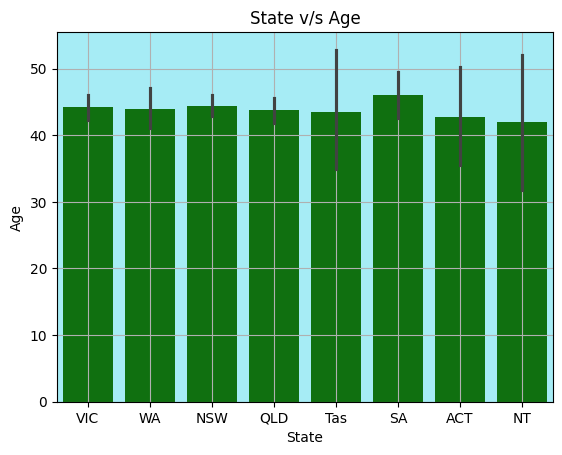

In [131]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age')
plt.grid()
plt.show()


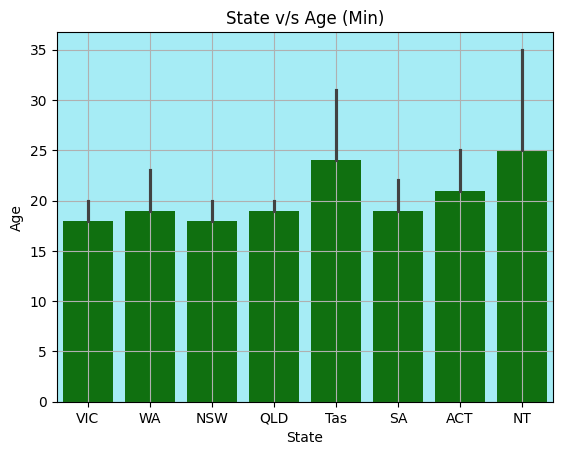

In [132]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age (Min)')
plt.grid()
plt.show()


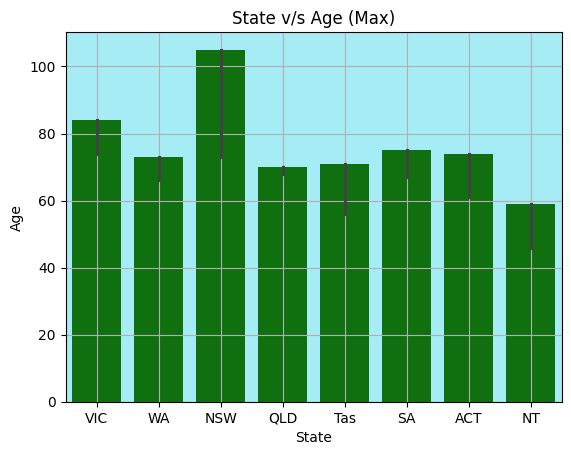

In [133]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Maximum age by State for NSW is grater than 100 and Minimum age by state is quite balanced.

#### relationship_status, Age

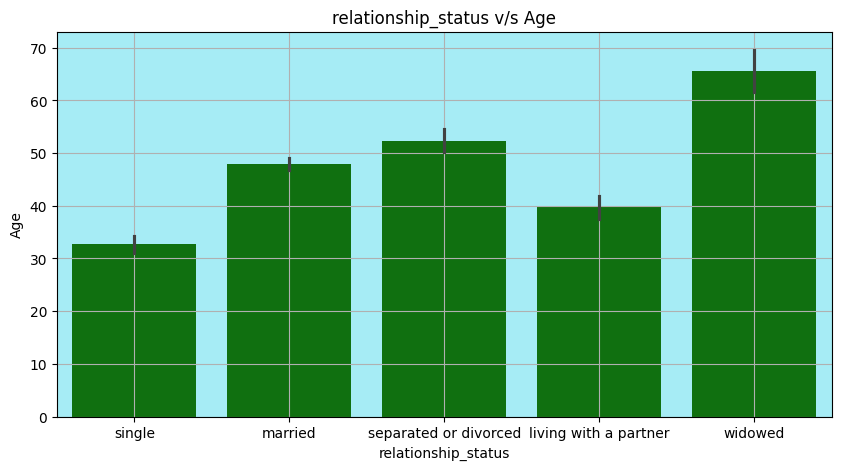

In [134]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age')
plt.grid()
plt.show()


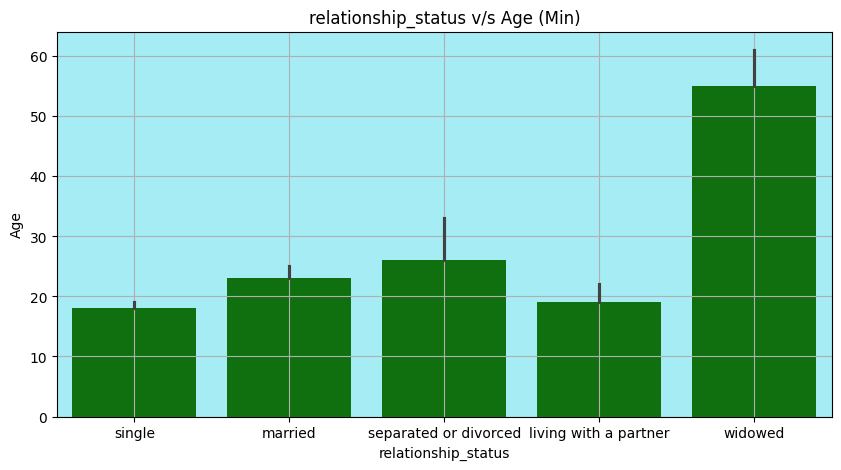

In [135]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age (Min)')
plt.grid()
plt.show()


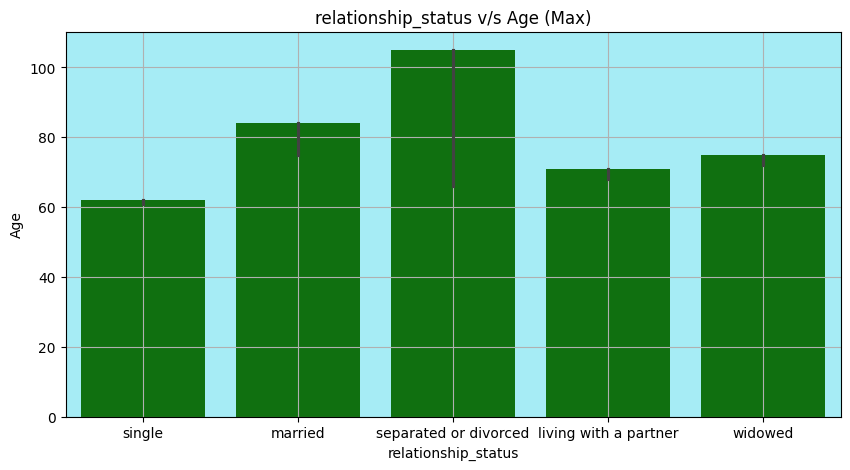

In [136]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  quite balanced.
 - Minimum Age by Relationship_Status for widow greater than 50 and maximum Age behaving for separated or divorced greater than 100.m

#### obligation_category, Age

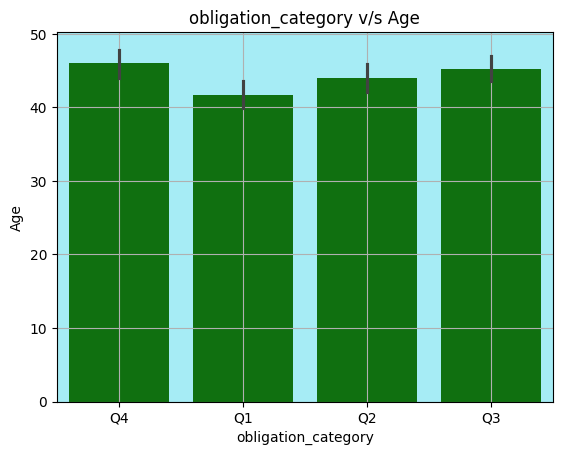

In [137]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age')
plt.grid()
plt.show()


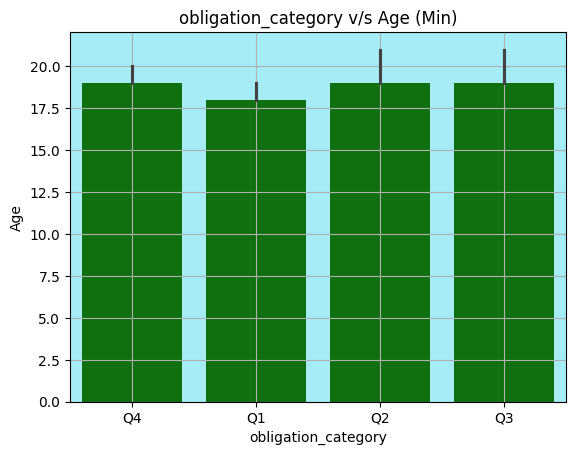

In [138]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age (Min)')
plt.grid()
plt.show()


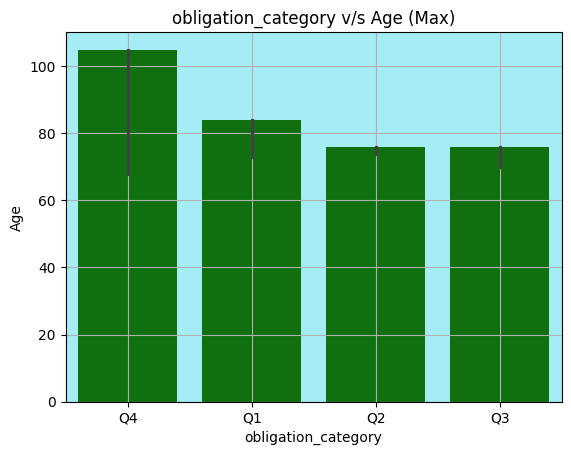

In [139]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age by obligation is quite balanced but maximum Age behaving quite unusual,for Q4 obligation2 greater than 100.

#### rest_and_relax, Age

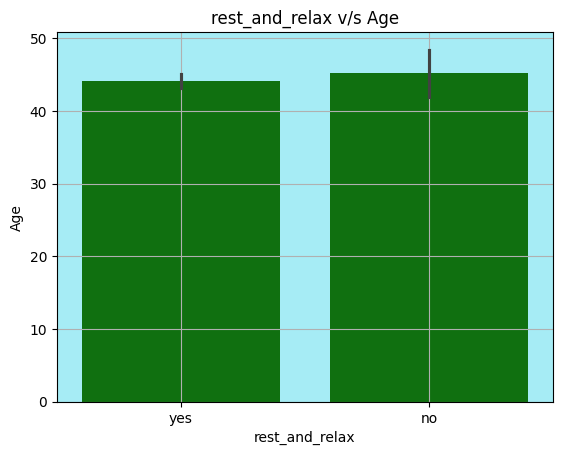

In [140]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age')
plt.grid()
plt.show()


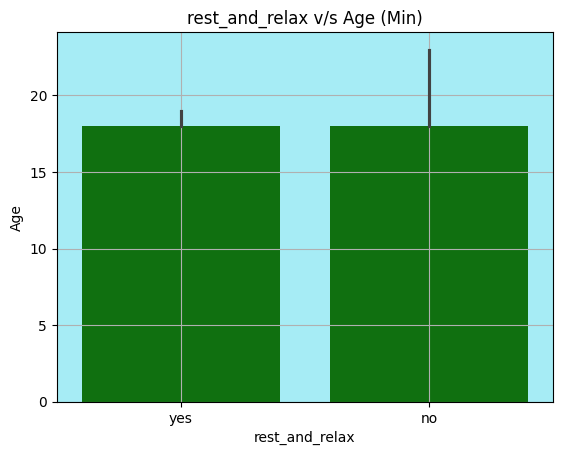

In [141]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age (Min)')
plt.grid()
plt.show()


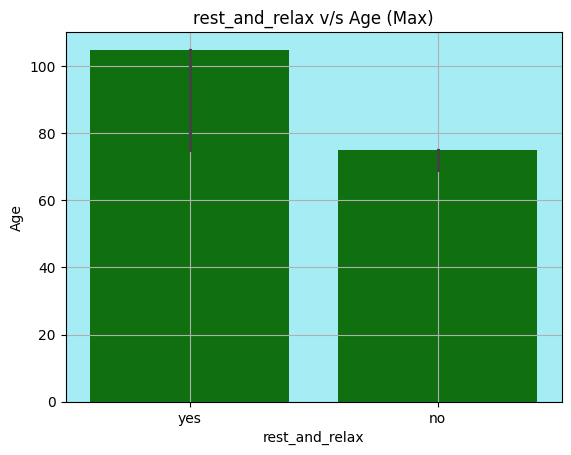

In [142]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age by Rest and relax tourist is balanced but maximum age behaving quite unusual,go for rest and relax above 100  age and not going for rest and relax less than 80.

#### luxury_or_be_spoilt, Age

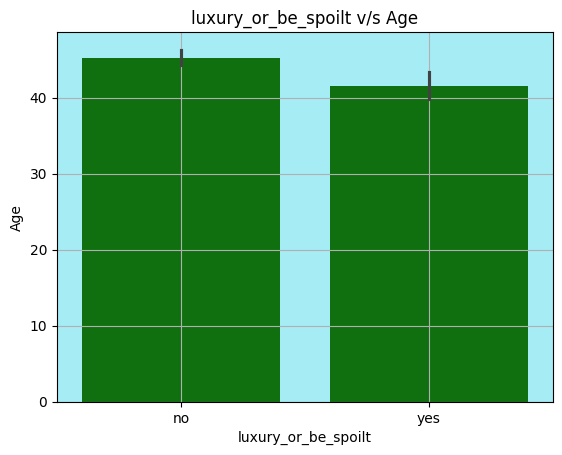

In [143]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age')
plt.grid()
plt.show()


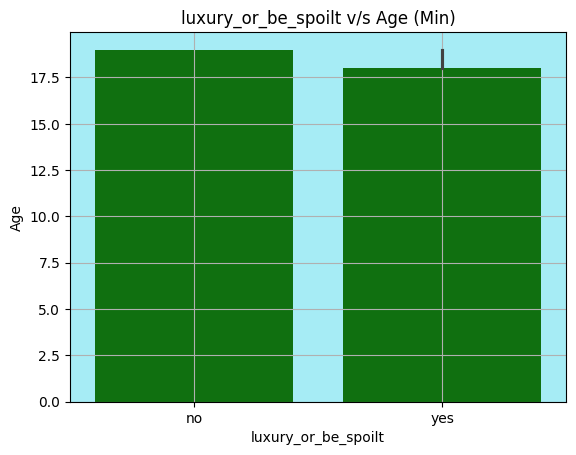

In [144]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age (Min)')
plt.grid()
plt.show()


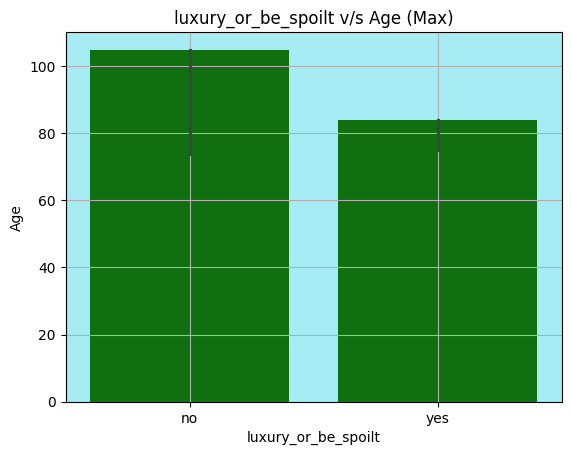

In [145]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced

#### do_sports, Age

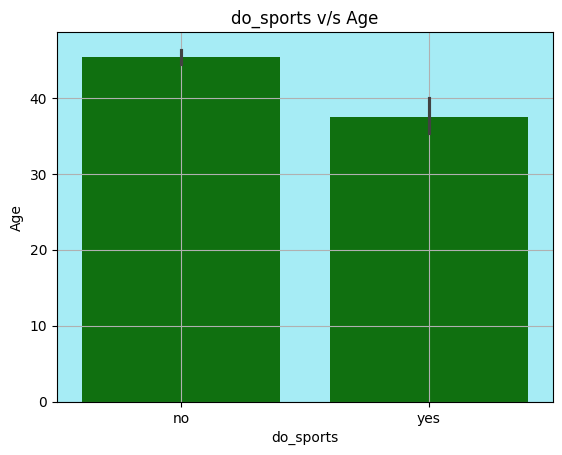

In [146]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age')
plt.grid()
plt.show()


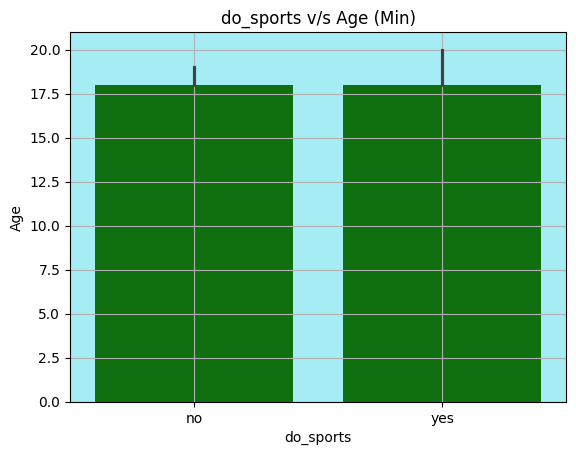

In [147]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age (Min)')
plt.grid()
plt.show()


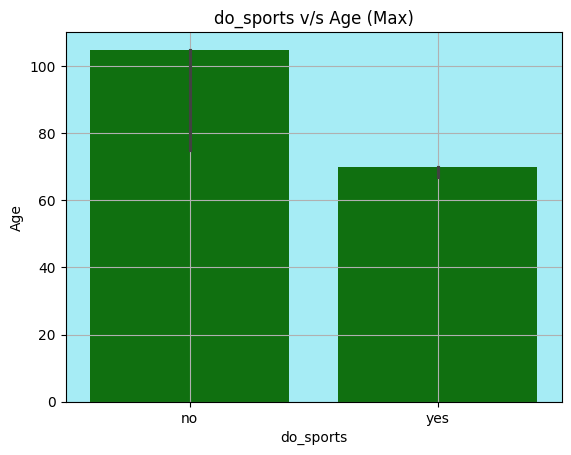

In [148]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age by Doing sports is quite balanced but maximum Age behaving quite unusual,age for not doing sports greater than 100 and doing sports age is less than 80.

#### excitement_and_challenge, Age

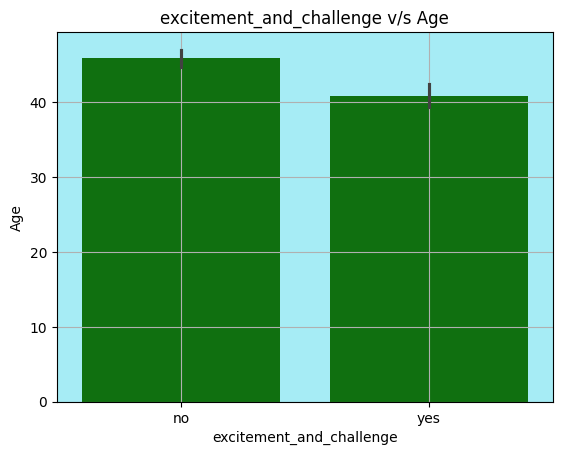

In [149]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age')
plt.grid()
plt.show()


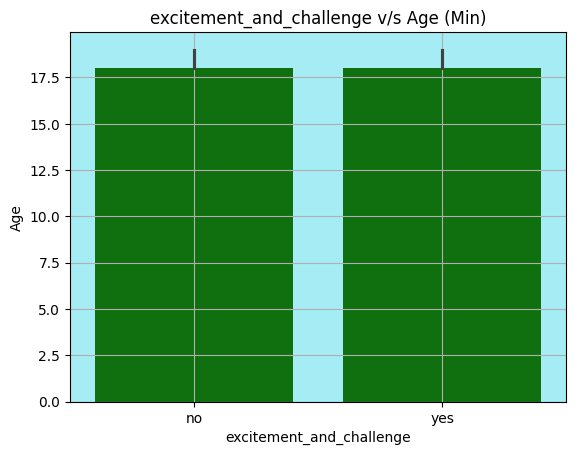

In [150]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age (Min)')
plt.grid()
plt.show()


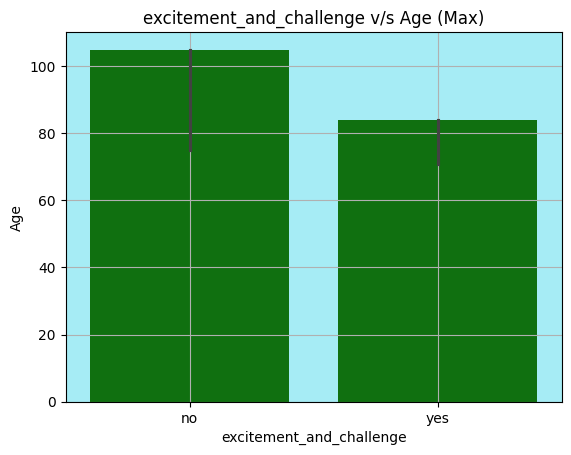

In [151]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for excitement for challange is quite balanced but maximum Age behaving quite unusual,age for the excitement for challange is greater than 100 and excitement for challange is less than 90.

#### not_exceed_planned_budget, Age

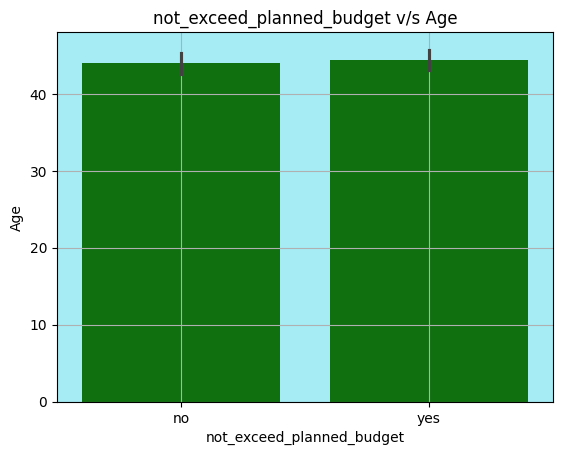

In [152]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age')
plt.grid()
plt.show()


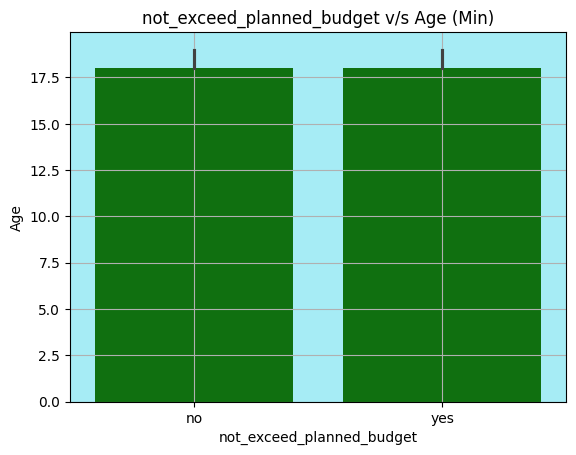

In [153]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age (Min)')
plt.grid()
plt.show()


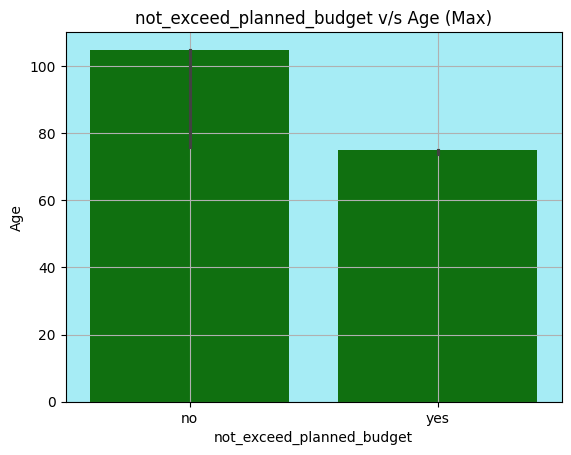

In [154]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for  not exceed planned budget is balanced but maximum Age behaving quite unusual,age for the not exceed planned budget is greater than 100 and  exceed planned budget is less than 90.

#### realise_creativity, Age

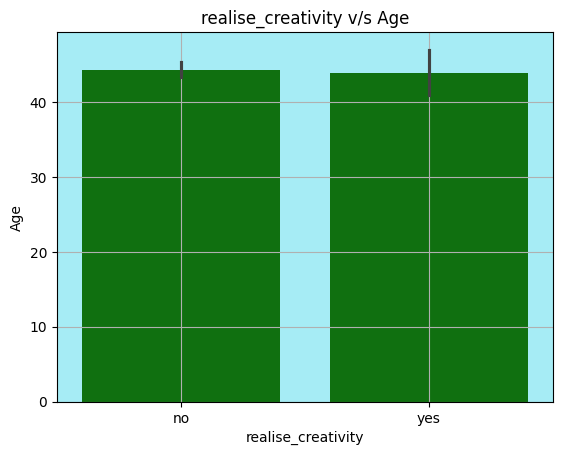

In [155]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age')
plt.grid()
plt.show()


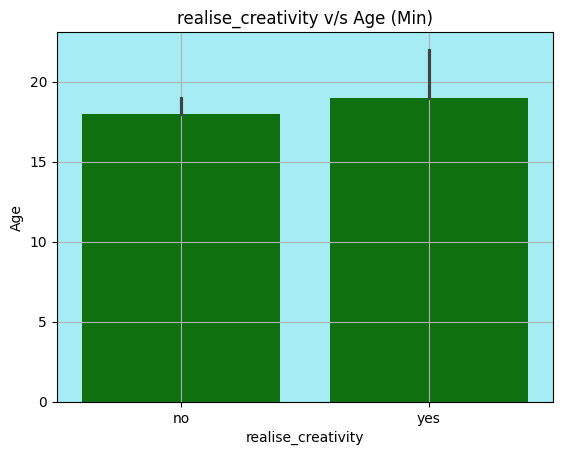

In [156]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age (Min)')
plt.grid()
plt.show()


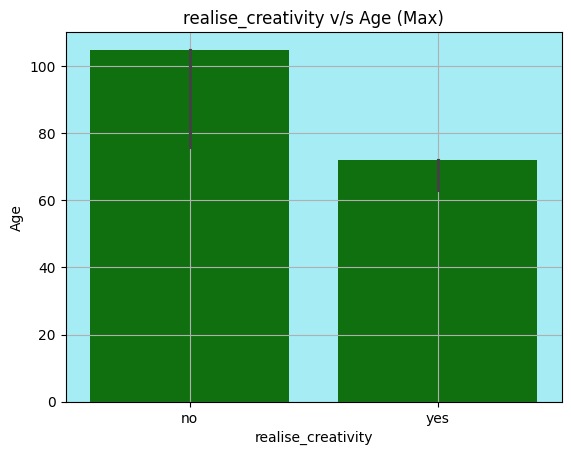

In [157]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for realise creativity is quite balanced but maximum Age behaving quite unusual,age for the  not realise creativity is greater than 100 and realise creativity is less than 80.

#### fun_and_entertainment, Age

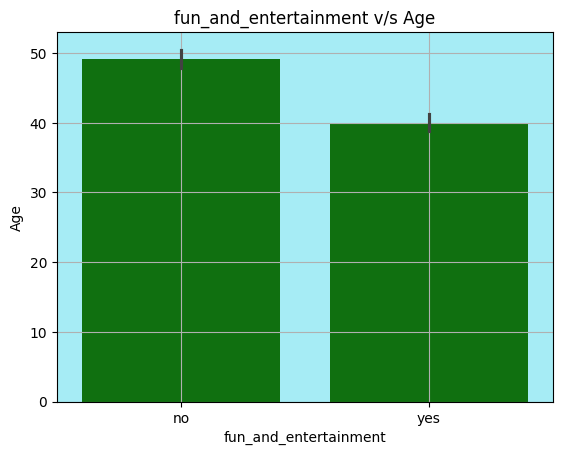

In [158]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age')
plt.grid()
plt.show()


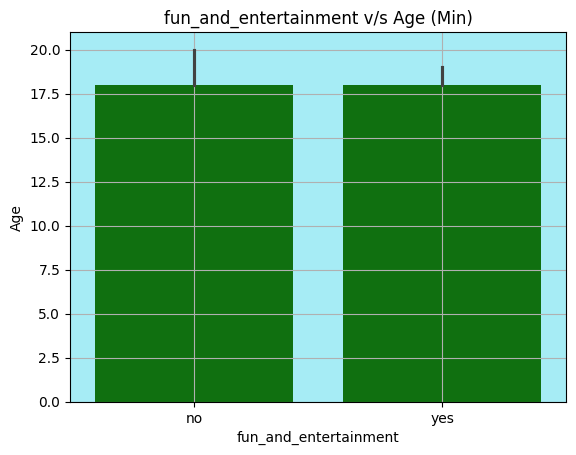

In [159]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age (Min)')
plt.grid()
plt.show()


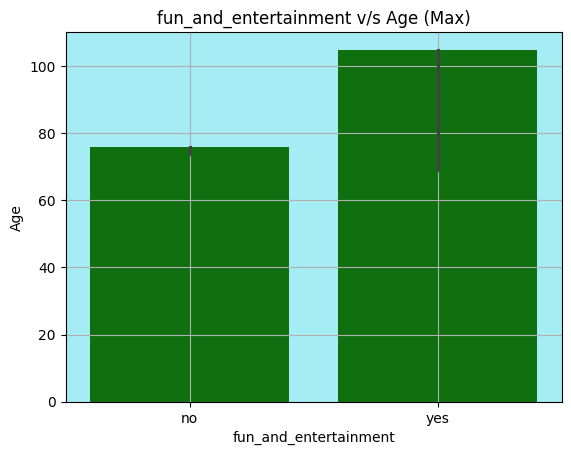

In [160]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced
 - Minimum age for fun and entertainment is balanced but maximum Age behaving quite unusual,age not going for the fun and entertainment is less than 80 and going for fun and entertainment is greater than 100.

#### good_company, Age

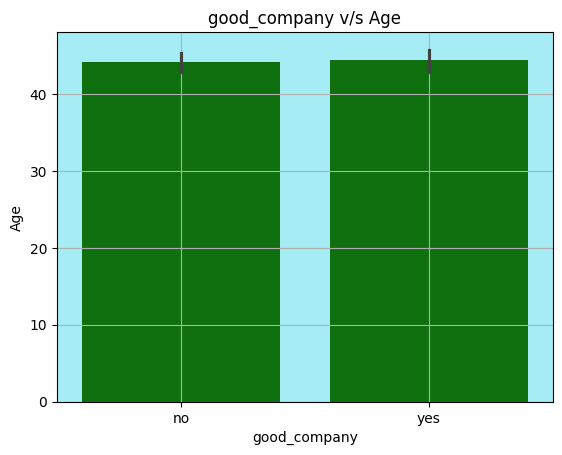

In [161]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age')
plt.grid()
plt.show()


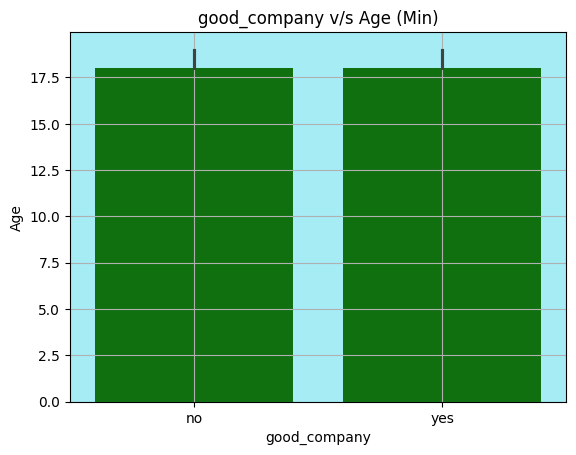

In [162]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age (Min)')
plt.grid()
plt.show()


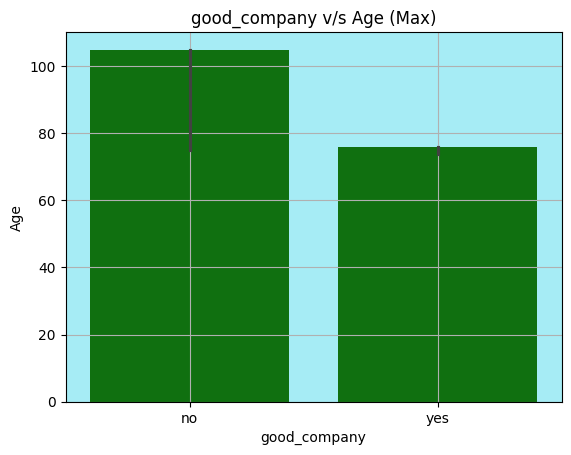

In [163]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Good_company is balanced but maximum Age behaving quite unusual,age not get the Good_company is greater than 100 and get a Good_company is less than 80.

#### health_and_beauty, Age

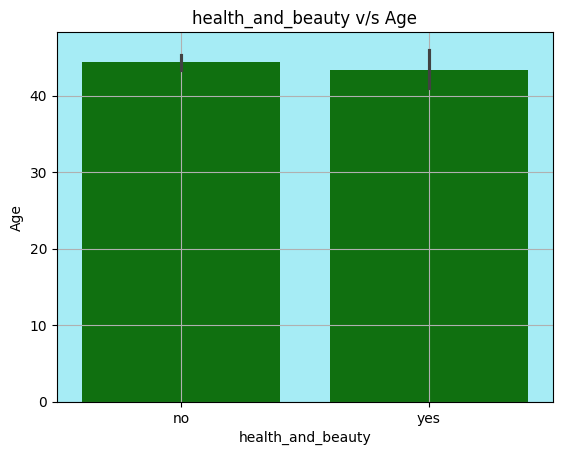

In [164]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age')
plt.grid()
plt.show()


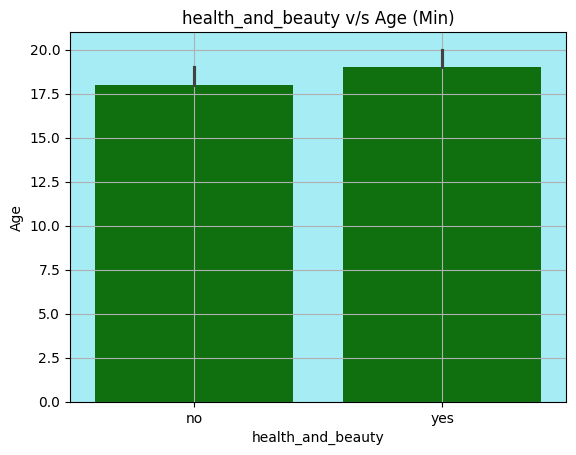

In [165]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age (Min)')
plt.grid()
plt.show()


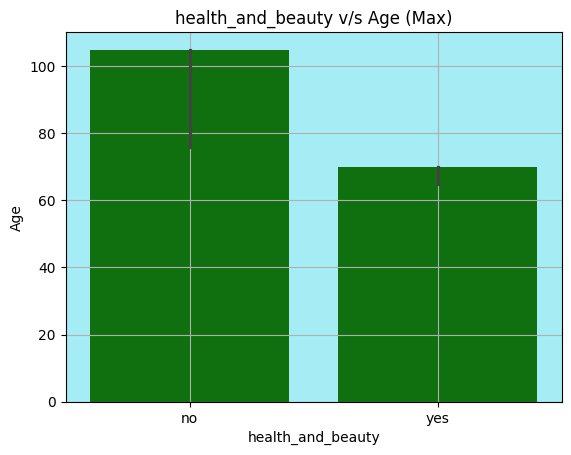

In [166]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Health_and_Beauty is balanced but maximum Age behaving quite unusual,age for not going for health_and_Beauty is greater than 100 and going for a Health_and_Beauty is less than 80.

#### free_and_easy_going, Age

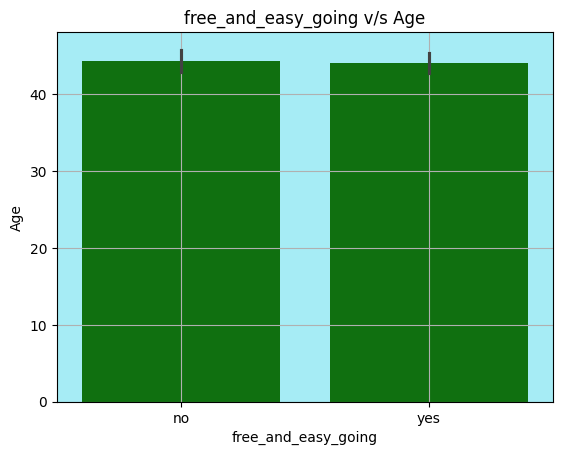

In [167]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age')
plt.grid()
plt.show()


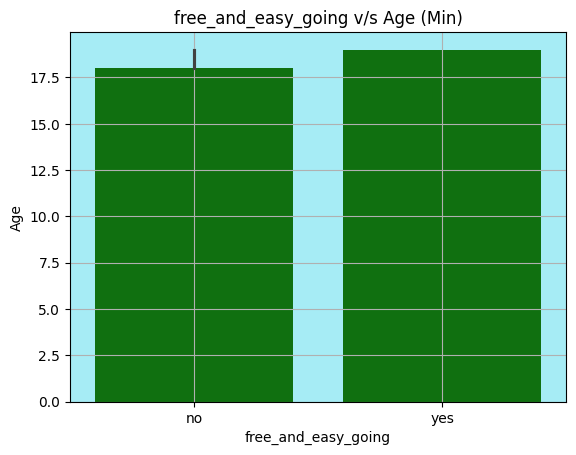

In [168]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age (Min)')
plt.grid()
plt.show()


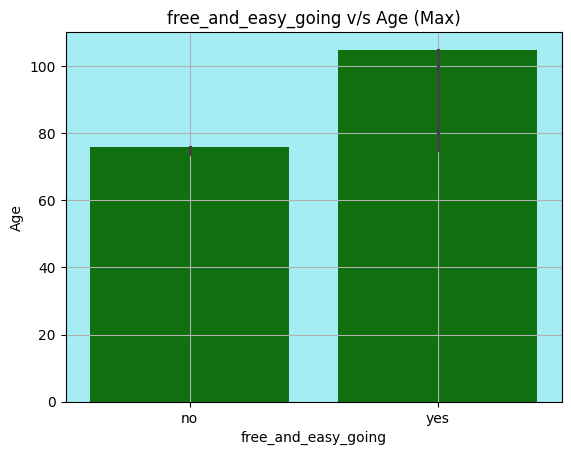

In [169]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for free_and_easy_going is balanced but maximum Age behaving quite unusual,age for  not going for free_and_easy_going is less than 80 and going for a free_and_easy_going is greater than 100.

#### entertainment_facilities, Age

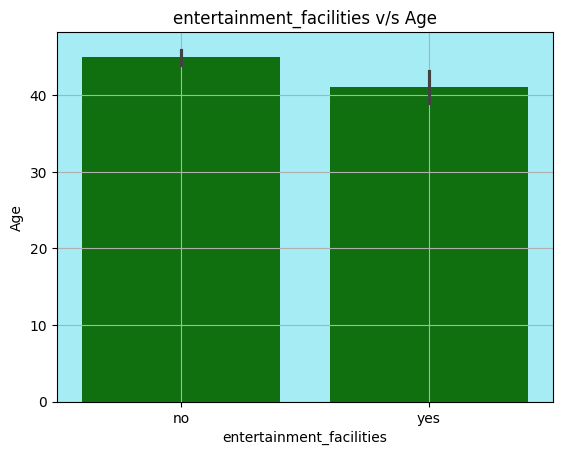

In [170]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age')
plt.grid()
plt.show()


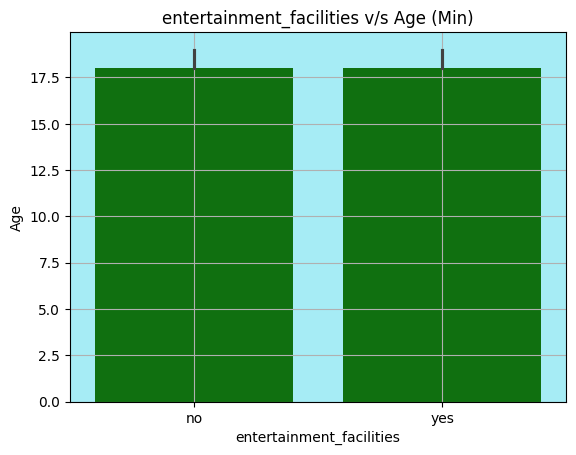

In [171]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age (Min)')
plt.grid()
plt.show()


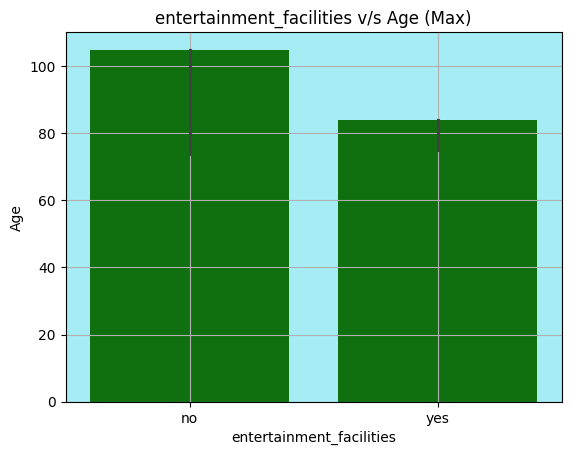

In [172]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Entertainment_facilities is balanced but maximum Age behaving quite unusual,age for not going for Entertainment_facilities is greater than 100 and going for a Entertainment_facilities is less than 90.

#### not_care_about_prices, Age

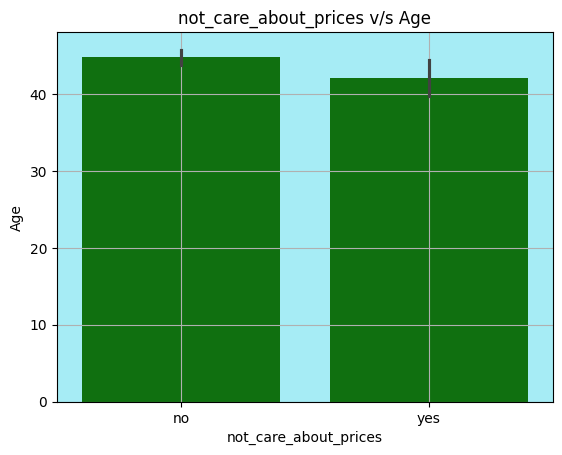

In [173]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age')
plt.grid()
plt.show()


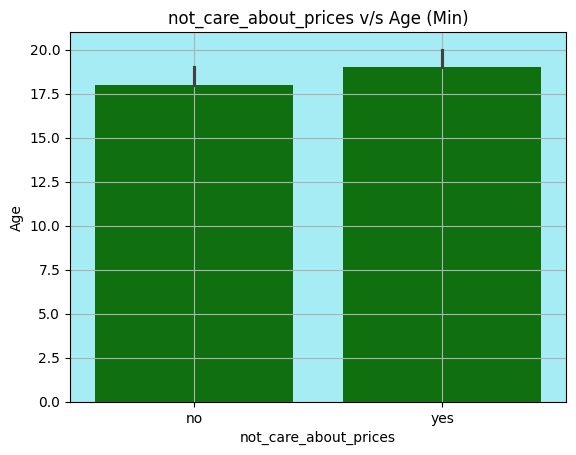

In [174]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age (Min)')
plt.grid()
plt.show()


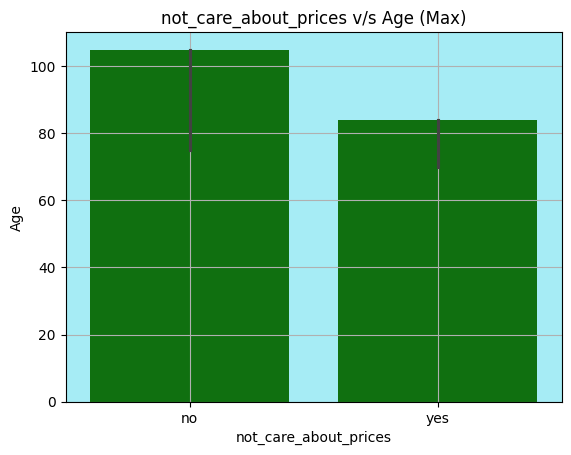

In [175]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Not_care_about_prices is balanced but maximum Age behaving quite unusual,age for Not_care_about_prices is greater than 100 and going for a care_about_prices is less than 90.

#### life_style_of_the_local_people, Age

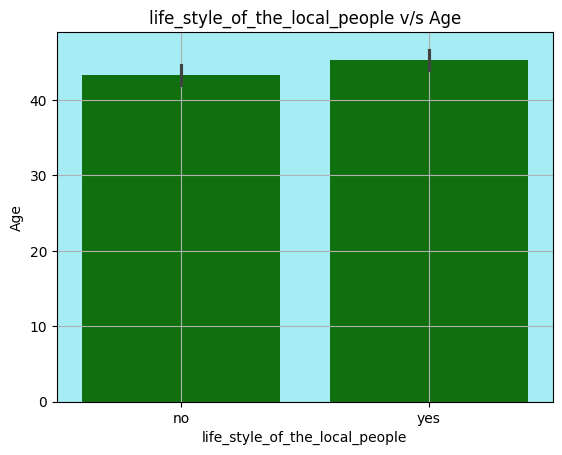

In [176]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age')
plt.grid()
plt.show()


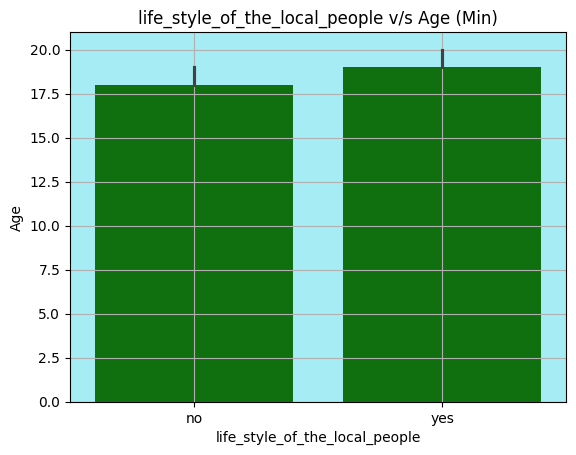

In [177]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age (Min)')
plt.grid()
plt.show()


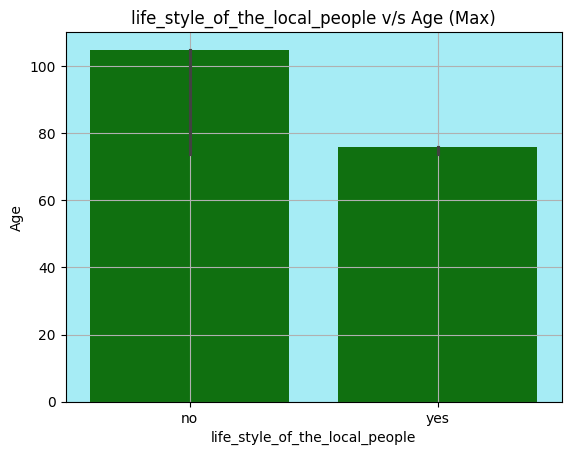

In [178]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Life_style_of_the_local_people is balanced but maximum Age behaving quite unusual,age for not consider Life_style_of_the_local_people is greater than 100 and going for consider a Life_style_of_the_local_people is less than 80.

#### intense_experience_of_nature, Age

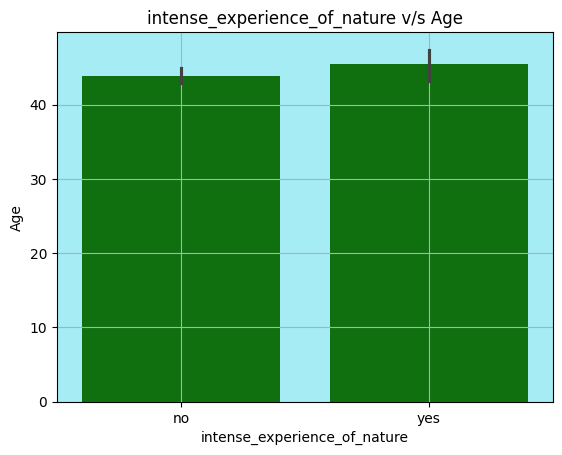

In [179]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age')
plt.grid()
plt.show()


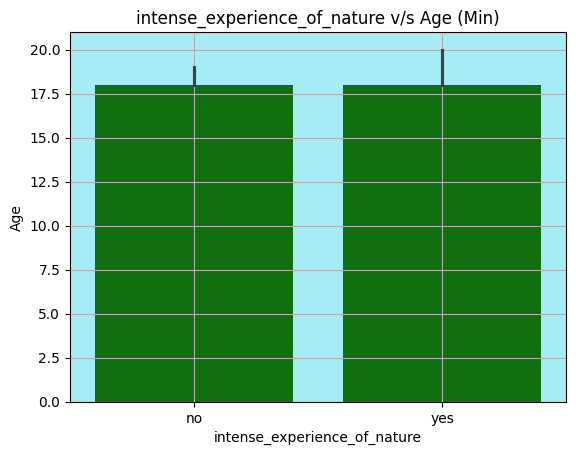

In [180]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age (Min)')
plt.grid()
plt.show()


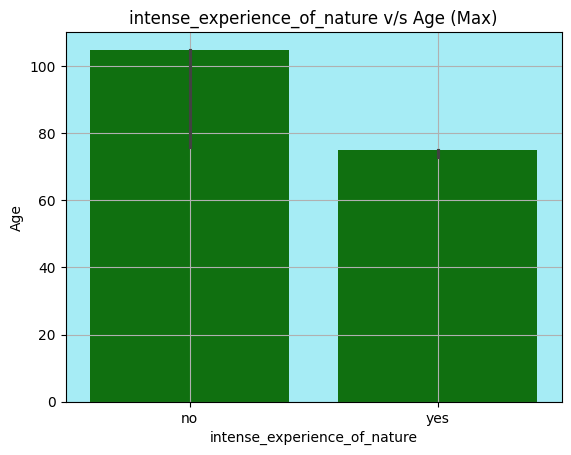

In [181]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for feel Intense_experience_of_nature is balanced but maximum Age behaving quite unusual,age for not going for feel Intense_experience_of_nature is greater than 100 and going for a feel Intense_experience_of_nature is less than 80.

#### cosiness/familiar_atmosphere, Age

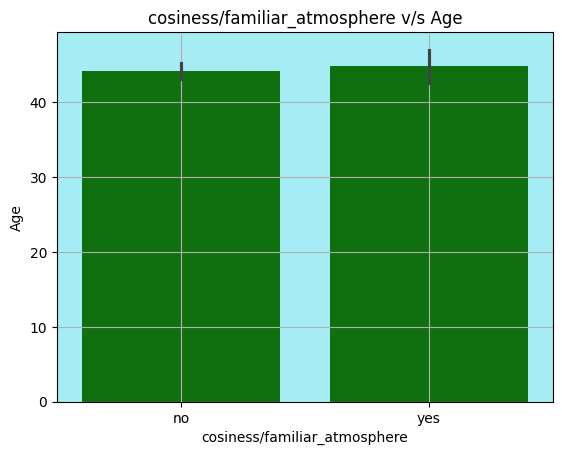

In [182]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age')
plt.grid()
plt.show()


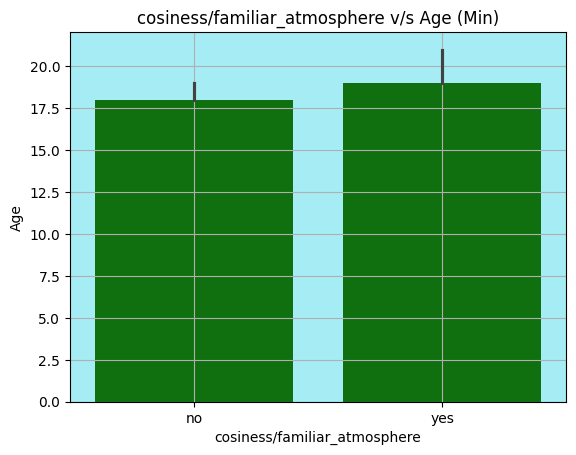

In [183]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age (Min)')
plt.grid()
plt.show()


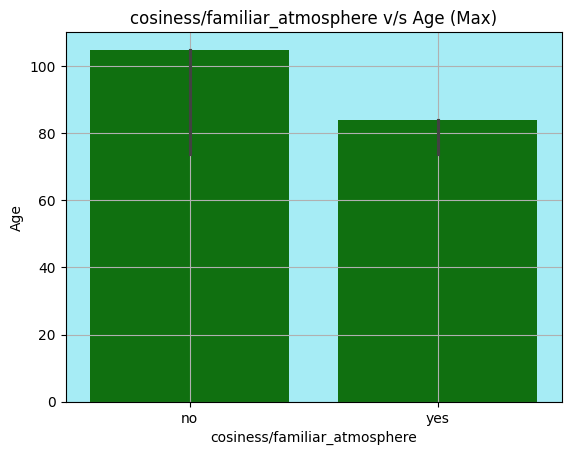

In [184]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for feel familiar_atmospher is balanced but maximum Age behaving quite unusual,age for not going for feel familiar_atmospher is greater than 100 and going for a feel familiar_atmospher is less than 90.

#### maintain_unspoilt_surroundings, Age

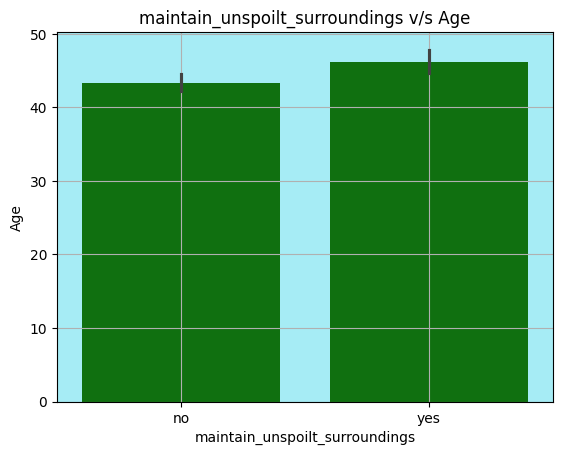

In [185]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age')
plt.grid()
plt.show()


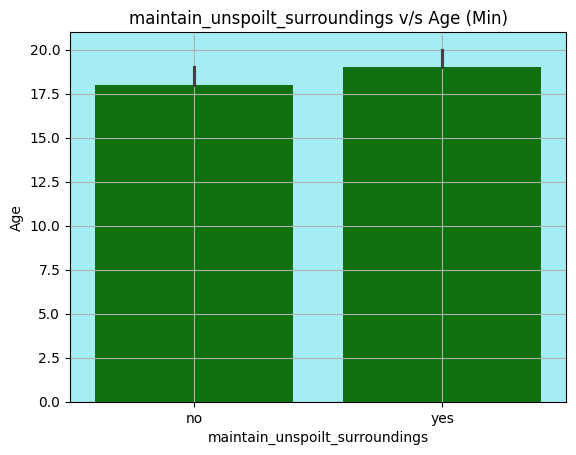

In [186]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age (Min)')
plt.grid()
plt.show()


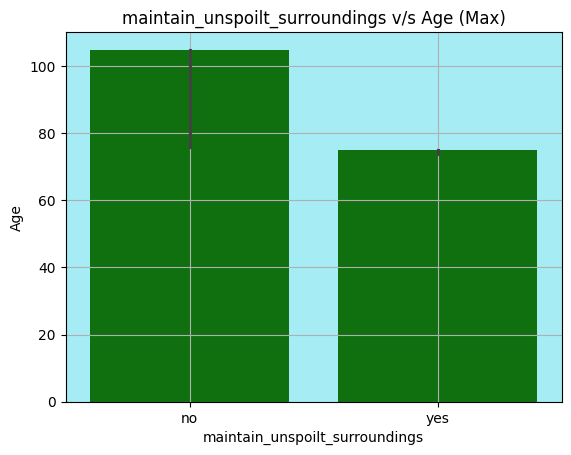

In [187]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are wuite  balanced
 - Minimum age for Maintain_unspoilt_surroundings is quite balanced but maximum Age behaving quite unusual,age for not going for Maintain_unspoilt_surroundings is greater than 100 and going for a Maintain_unspoilt_surroundings is less than 80.

#### everything_organised, Age

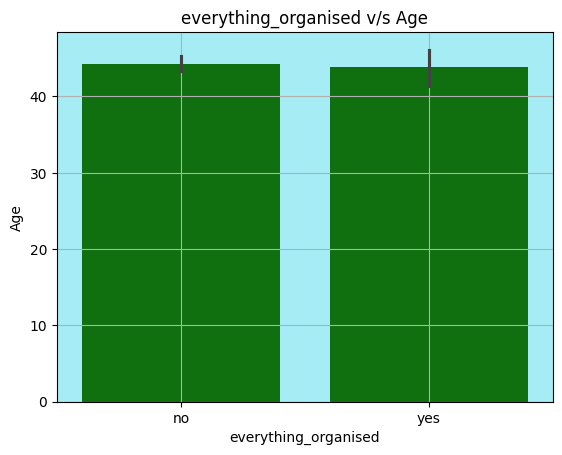

In [188]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age')
plt.grid()
plt.show()


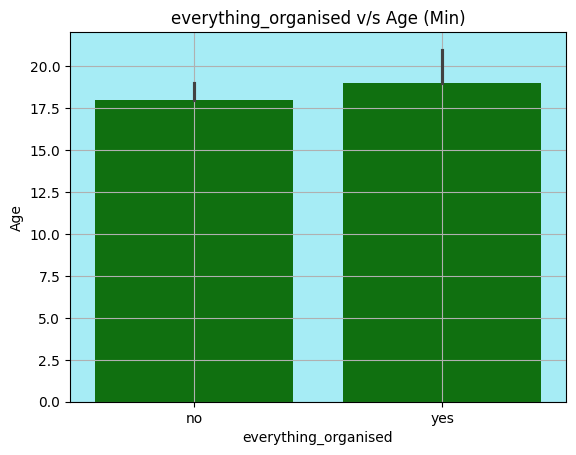

In [189]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age (Min)')
plt.grid()
plt.show()


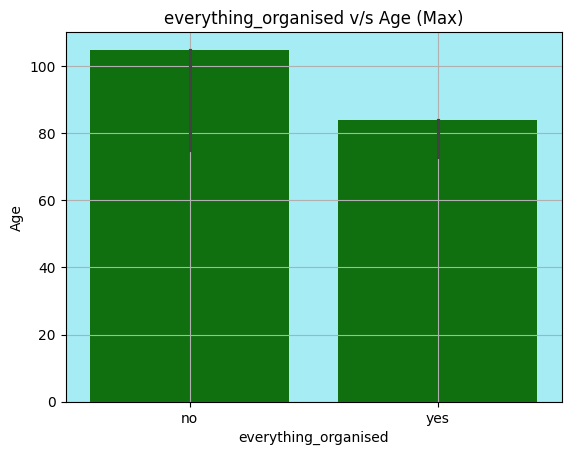

In [190]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Everything_organised is balanced but maximum Age behaving quite unusual,age for not going for Everything_organised is greater than 100 and going for a Everything_organised is less than 90.

#### unspoilt_nature/natural_landscape, Age

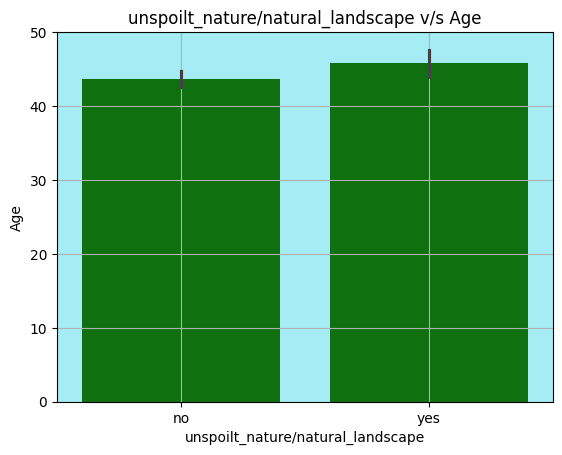

In [191]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age')
plt.grid()
plt.show()


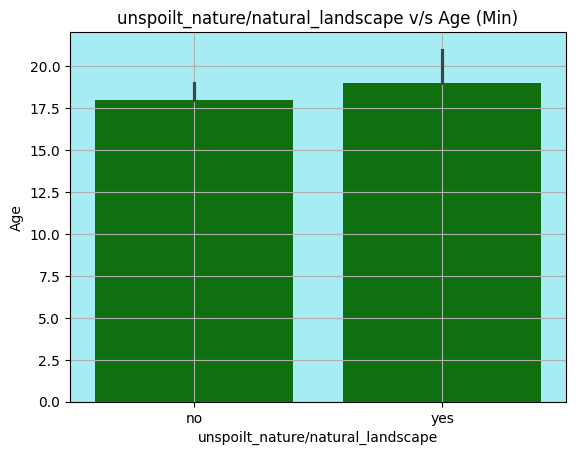

In [192]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age (Min)')
plt.grid()
plt.show()


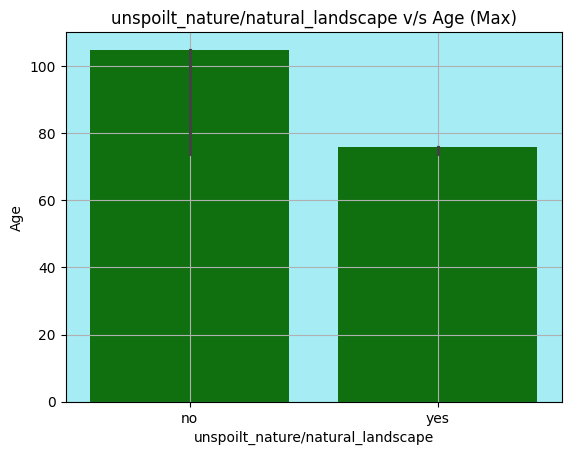

In [193]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Unspoilt_nature_natural_landscape is balanced but maximum Age behaving quite unusual,age for not going for Unspoilt_nature_natural_landscape is greater than 100 and going for a Unspoilt_nature_natural_landscape is less than 80.

#### cultural_offers, Age

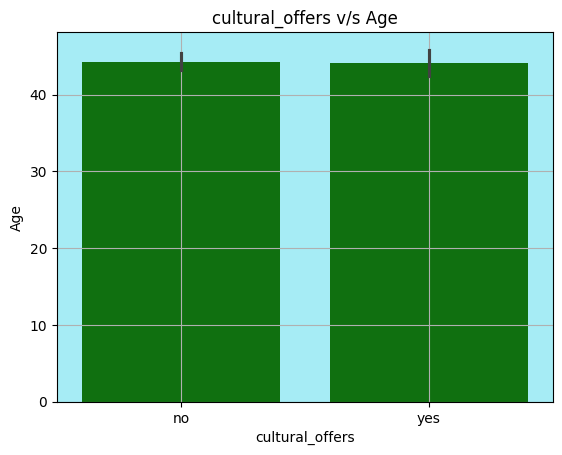

In [194]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age')
plt.grid()
plt.show()


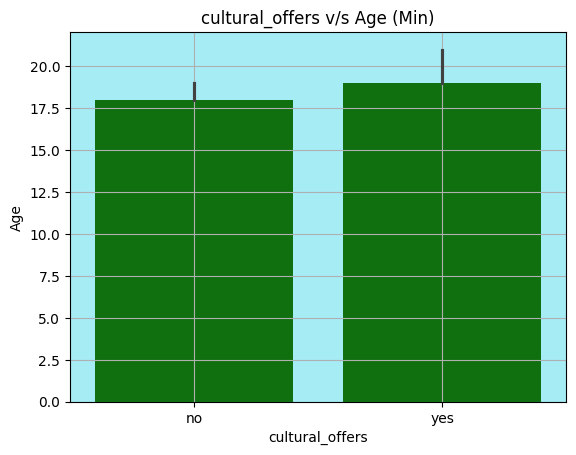

In [195]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age (Min)')
plt.grid()
plt.show()


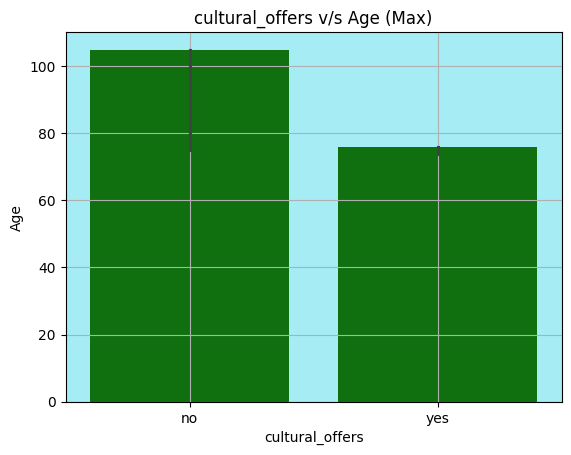

In [196]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for get clutural_offers is balanced but maximum Age behaving quite unusual,age for not going for get clutural_offers is greater than 100 and going for a get clutural_offers is less than 80.

#### change_of_surroundings, Age

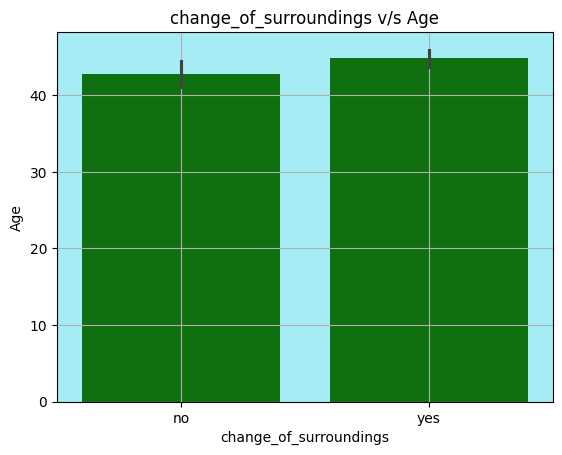

In [197]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age')
plt.grid()
plt.show()


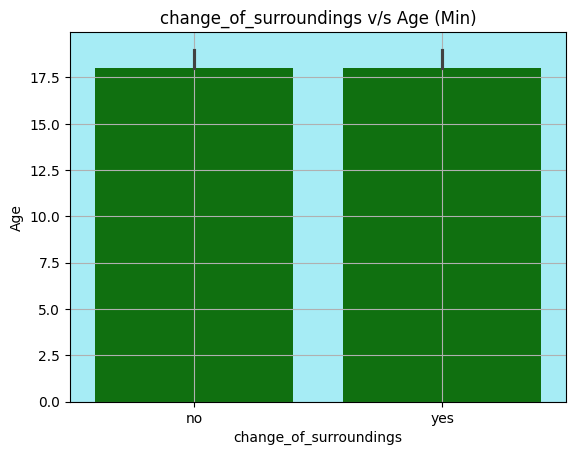

In [198]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age (Min)')
plt.grid()
plt.show()


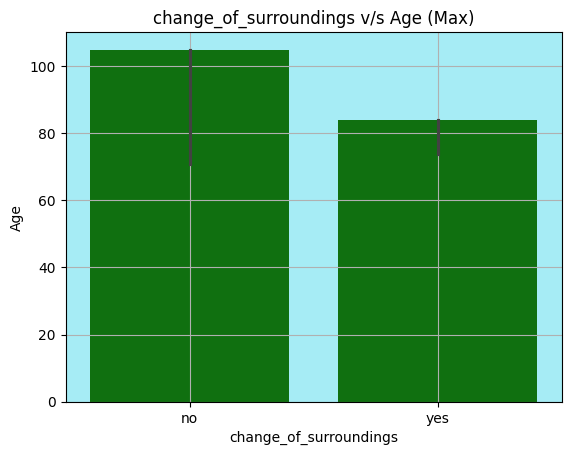

In [199]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Change_of_surroundings is balanced but maximum Age behaving quite unusual,age for not going for Change_of_surroundings is greater than 100 and going for a Change_of_surroundings is less than 90.

#### Gender, Education

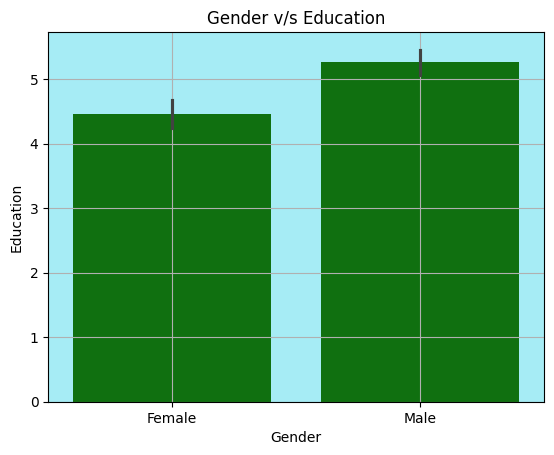

In [200]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education')
plt.grid()
plt.show()


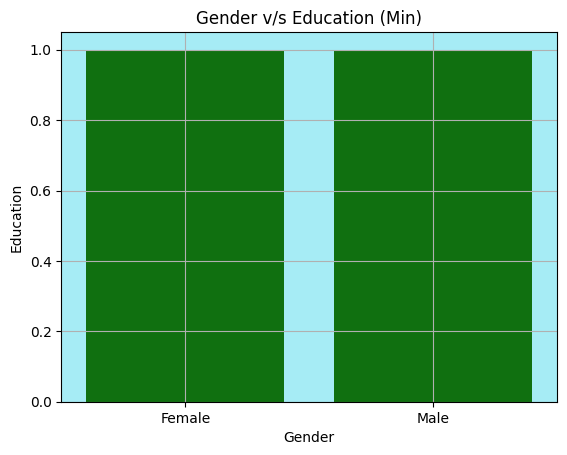

In [201]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education (Min)')
plt.grid()
plt.show()


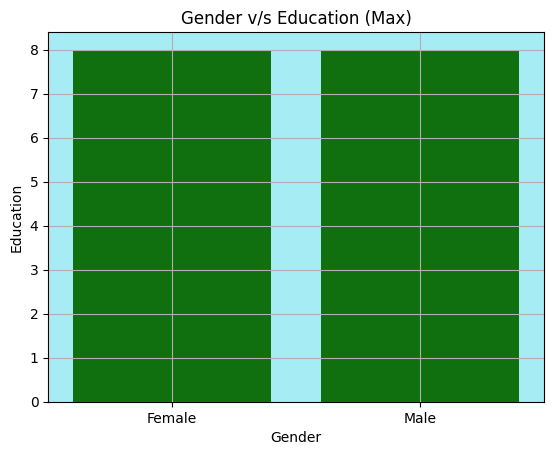

In [202]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that average education for male is above 5 and for female less than 5.
 - Minimum  and maximum education by gender is balanced.


#### Occupation, Education

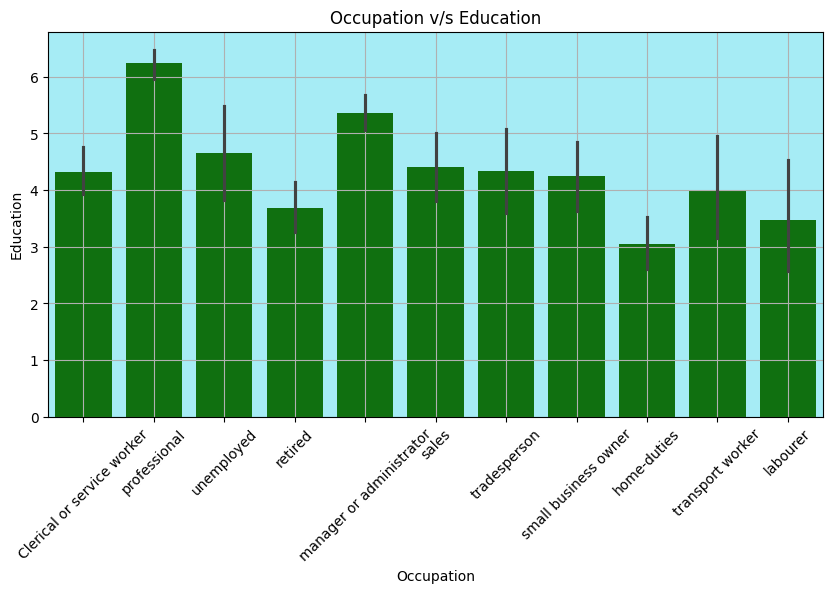

In [203]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education')
plt.grid()
plt.show()


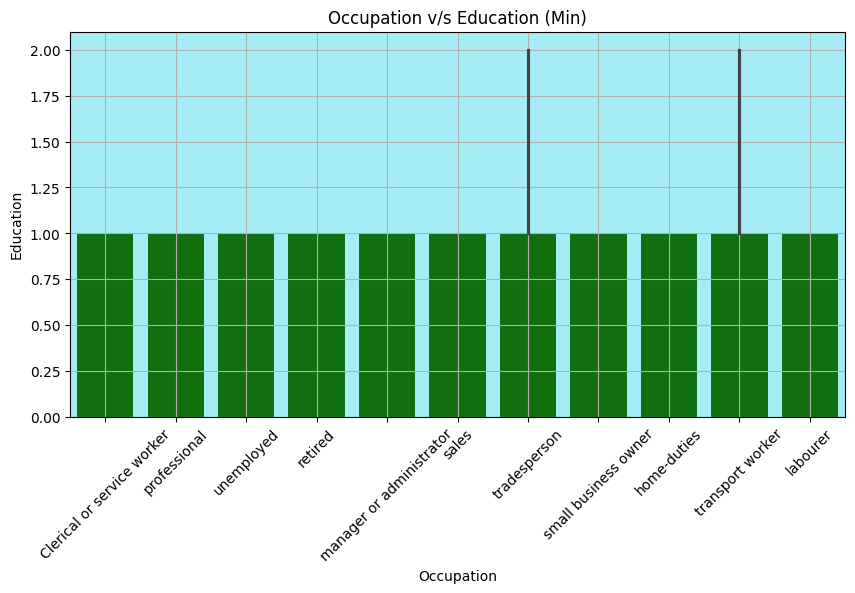

In [204]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education (Min)')
plt.grid()
plt.show()


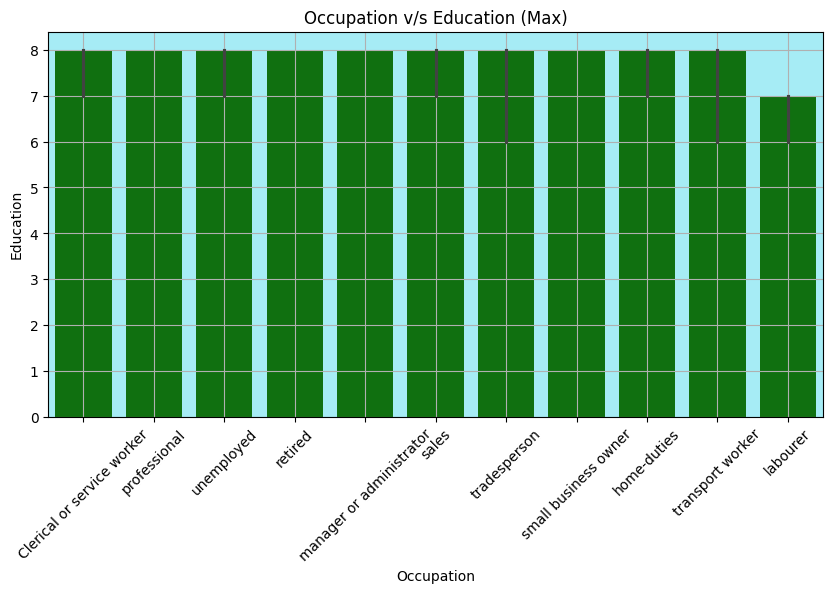

In [205]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - Average education for professional occupation is greater than 6.
 - Minimum education and maximum education by occupation is balanced.

#### State, Education

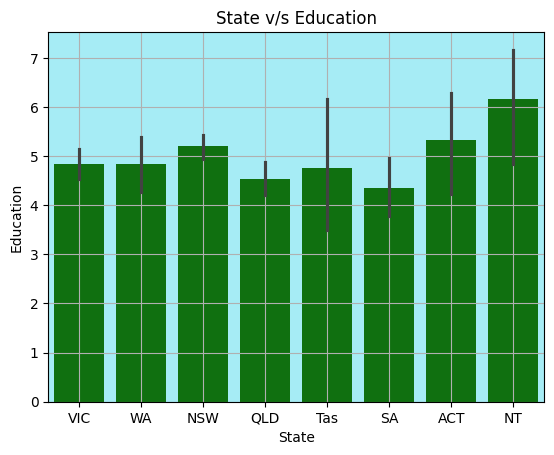

In [206]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education')
plt.grid()
plt.show()


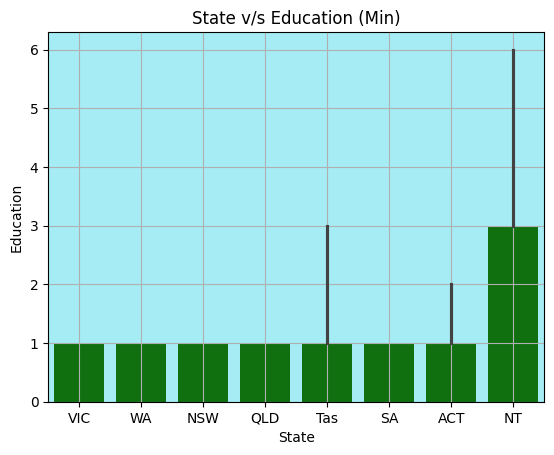

In [207]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education (Min)')
plt.grid()
plt.show()


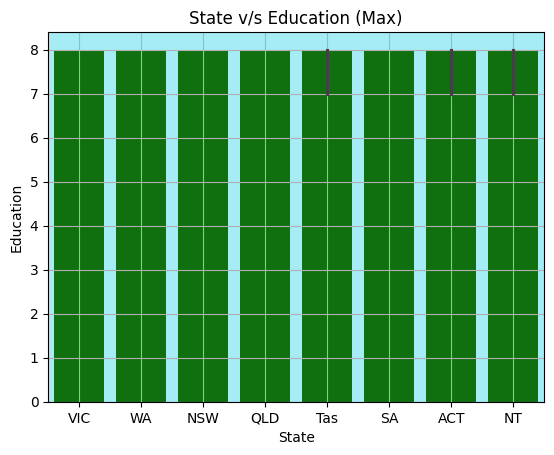

In [208]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - The data is quite balanced.
 - there is for minimum education by State for NT is 3.
 - maximum education by state is balanced.

#### relationship_status, Education

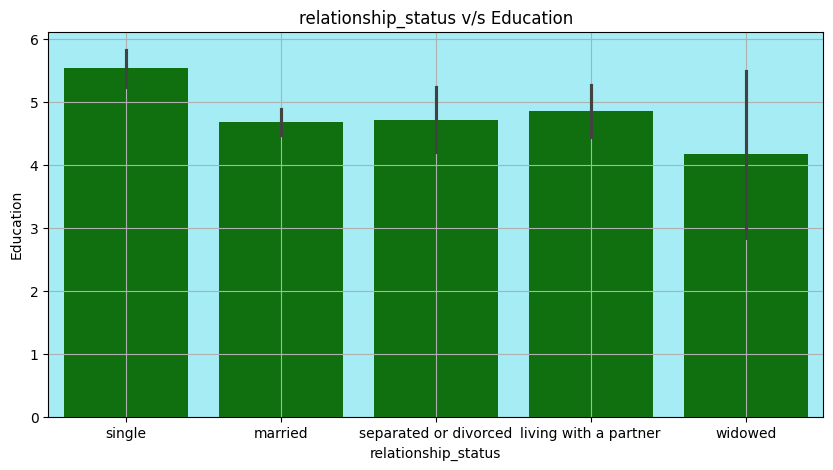

In [209]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education')
plt.grid()
plt.show()


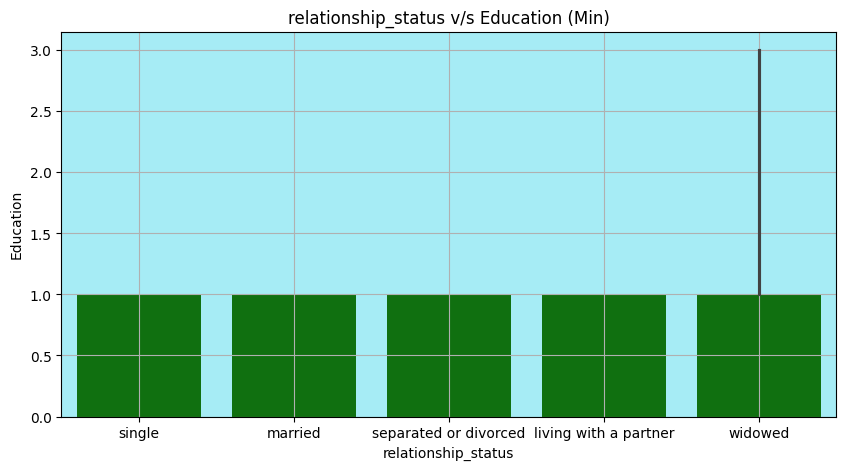

In [210]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education (Min)')
plt.grid()
plt.show()


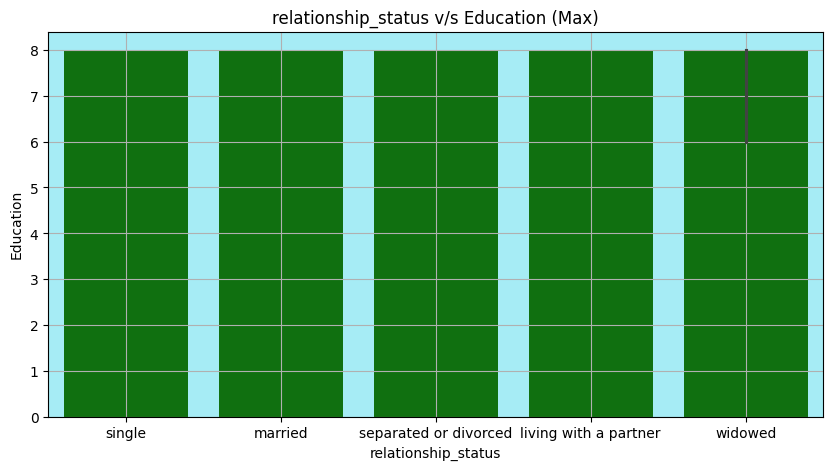

In [211]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All the data of education by relationship status is balanced

#### obligation_category, Education

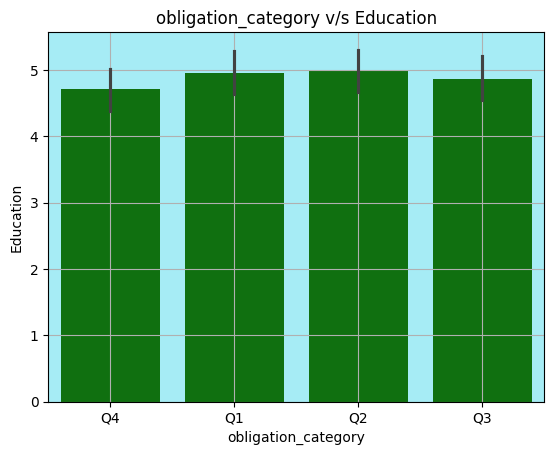

In [212]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education')
plt.grid()
plt.show()


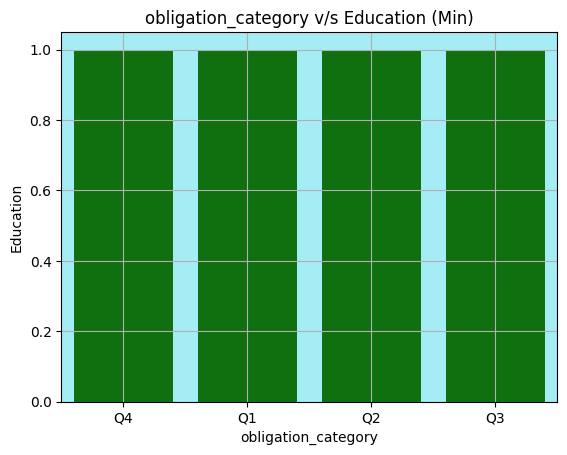

In [213]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education (Min)')
plt.grid()
plt.show()


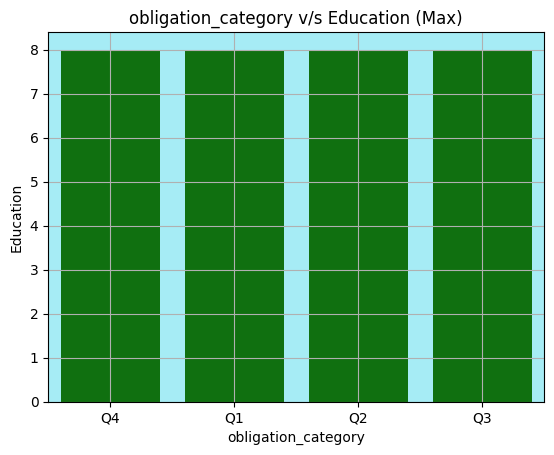

In [214]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### rest_and_relax, Education

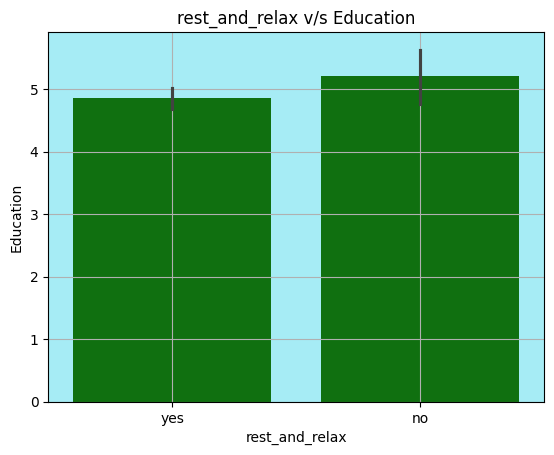

In [215]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education')
plt.grid()
plt.show()


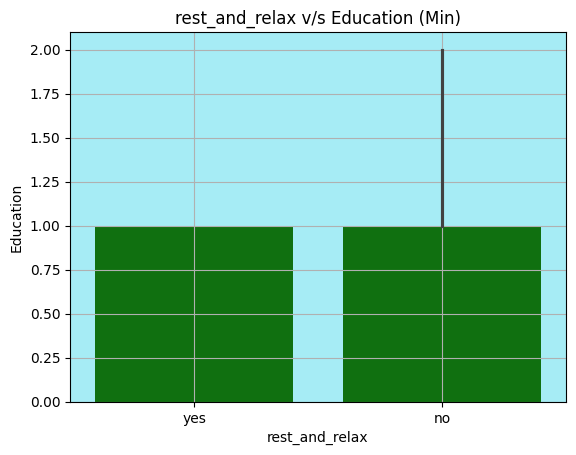

In [216]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education (Min)')
plt.grid()
plt.show()


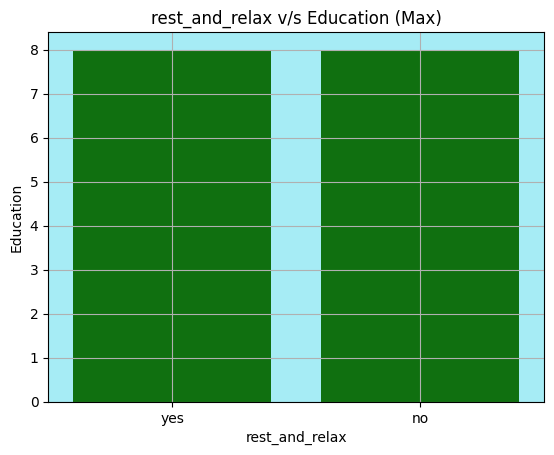

In [217]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### luxury_or_be_spoilt, Education

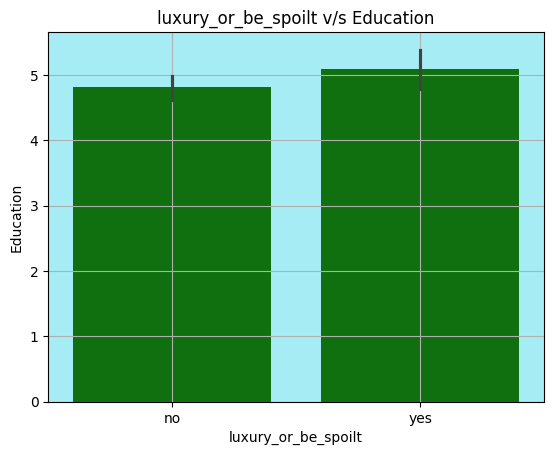

In [218]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education')
plt.grid()
plt.show()


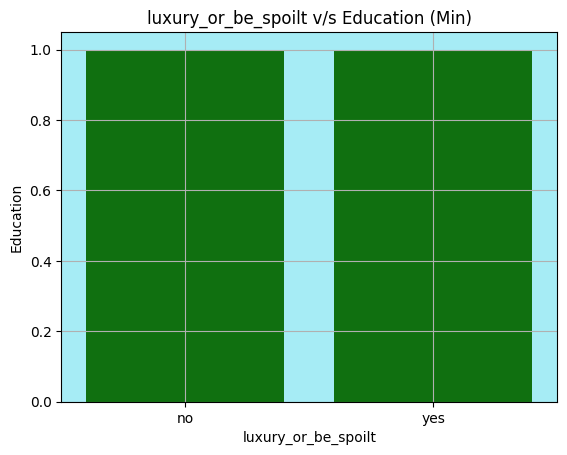

In [219]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education (Min)')
plt.grid()
plt.show()


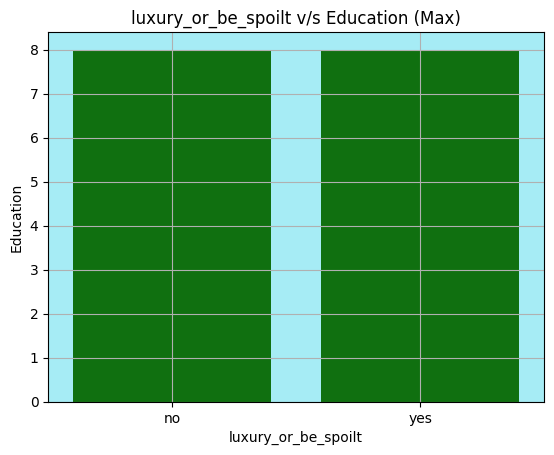

In [220]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### do_sports, Education

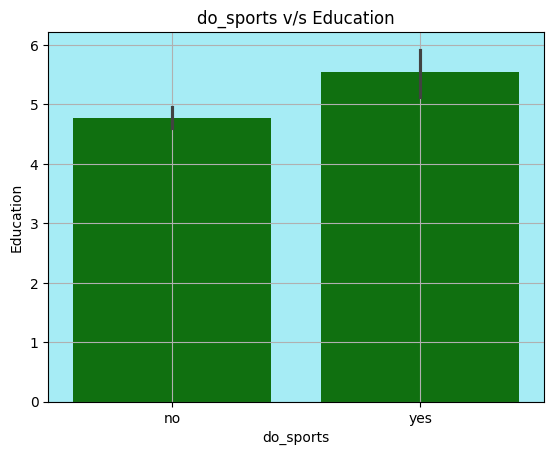

In [221]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education')
plt.grid()
plt.show()


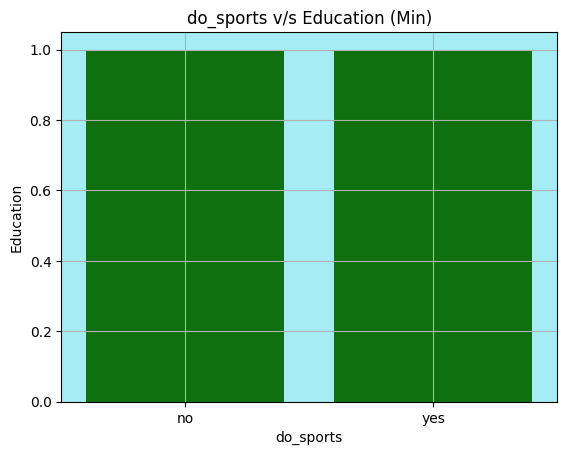

In [222]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education (Min)')
plt.grid()
plt.show()


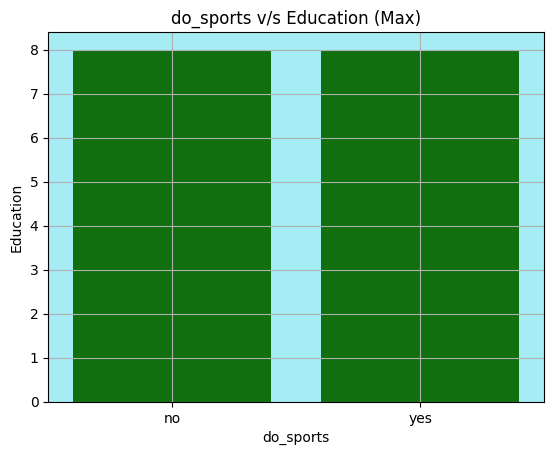

In [223]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### excitement_and_challenge, Education

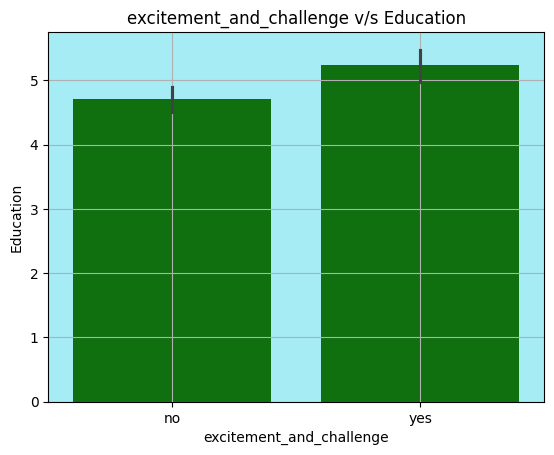

In [224]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education')
plt.grid()
plt.show()


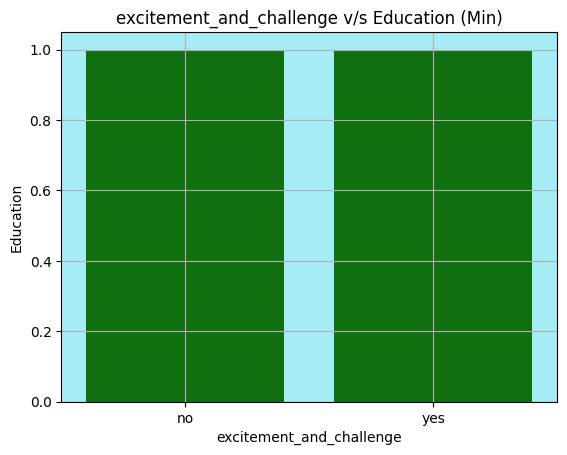

In [225]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education (Min)')
plt.grid()
plt.show()


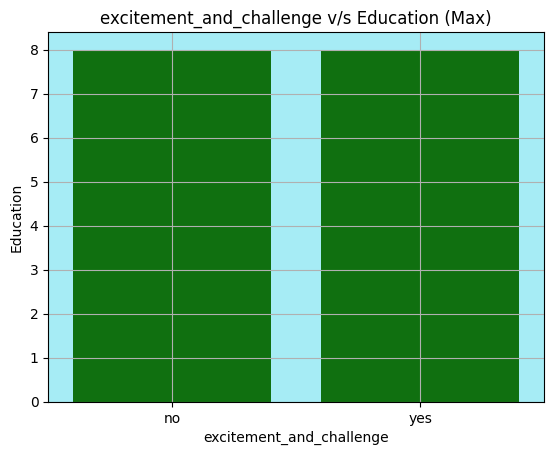

In [226]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### not_exceed_planned_budget, Education

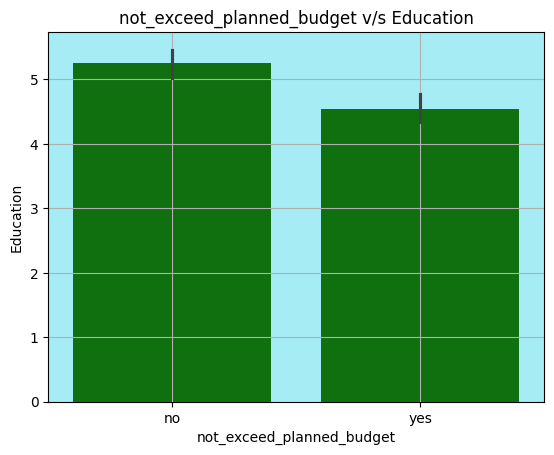

In [227]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education')
plt.grid()
plt.show()


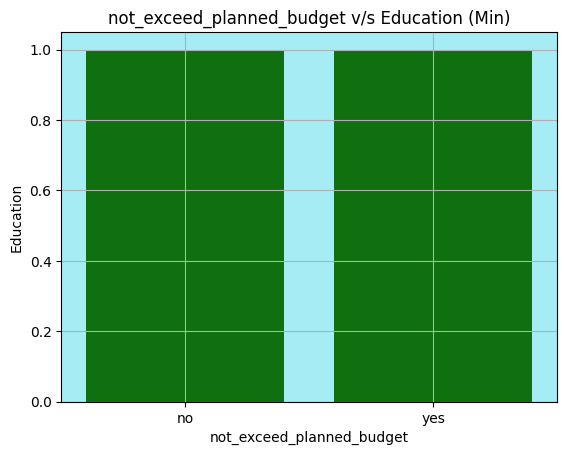

In [228]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education (Min)')
plt.grid()
plt.show()


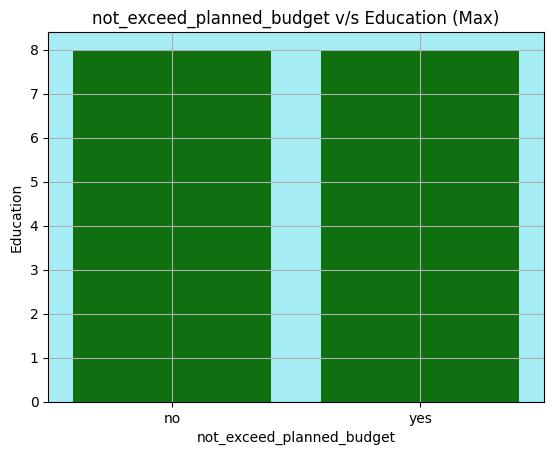

In [229]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### realise_creativity, Education

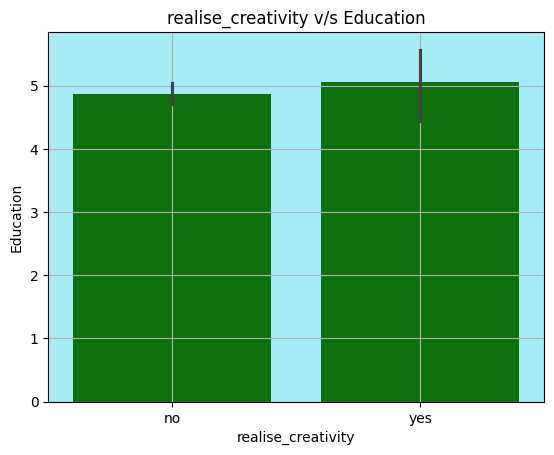

In [230]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education')
plt.grid()
plt.show()


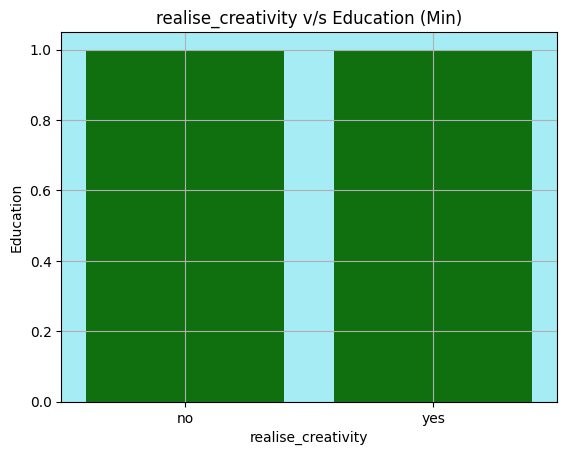

In [231]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education (Min)')
plt.grid()
plt.show()


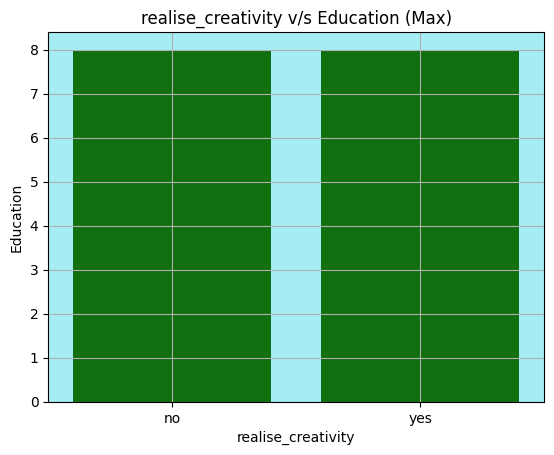

In [232]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### fun_and_entertainment, Education

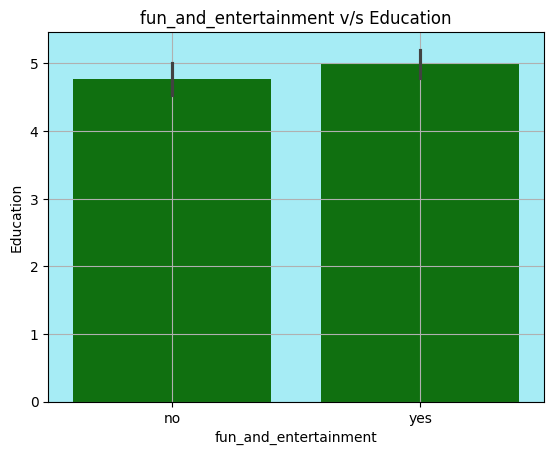

In [233]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education')
plt.grid()
plt.show()


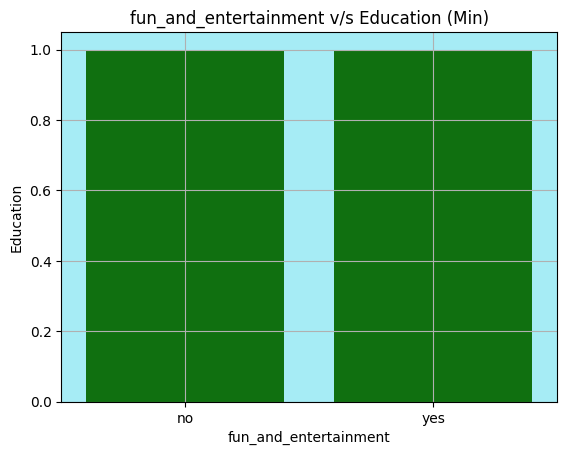

In [234]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education (Min)')
plt.grid()
plt.show()


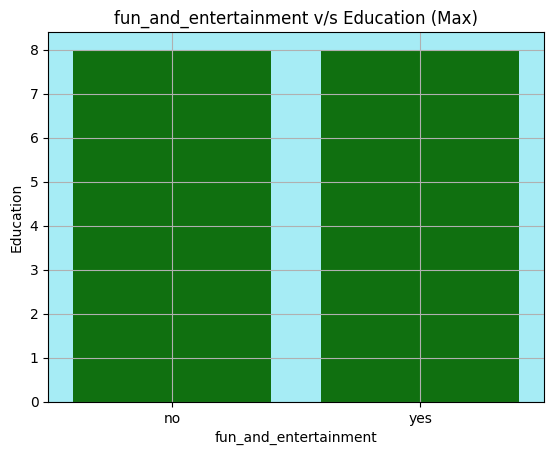

In [235]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### good_company, Education

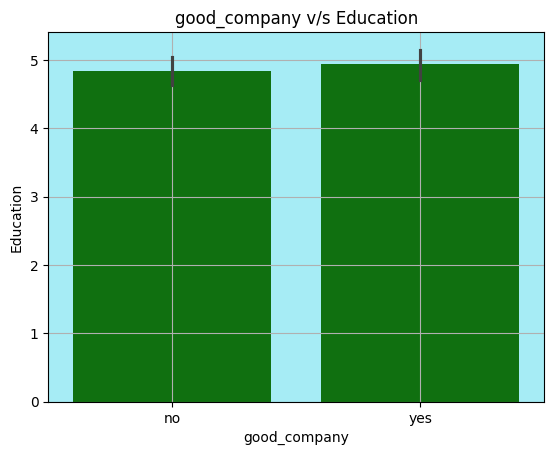

In [236]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education')
plt.grid()
plt.show()


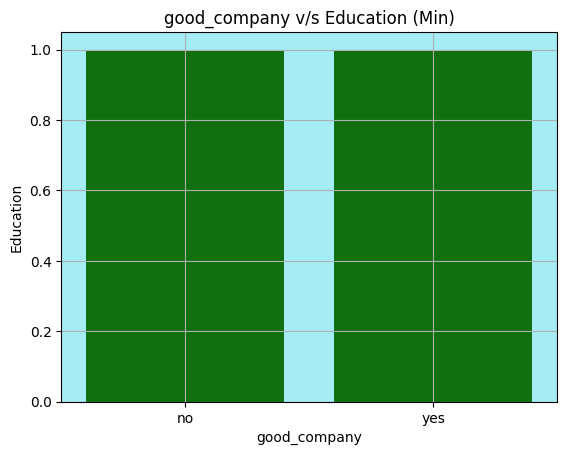

In [237]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education (Min)')
plt.grid()
plt.show()


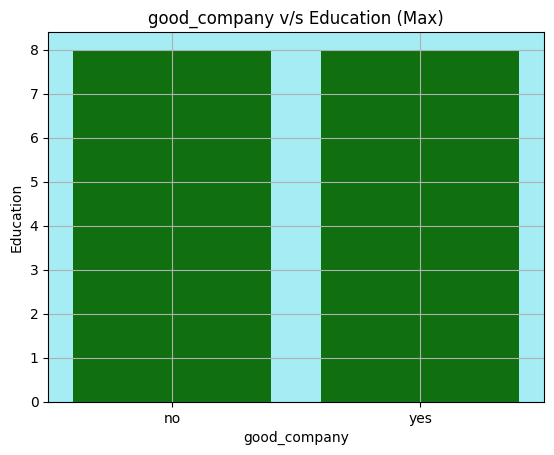

In [238]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.


#### health_and_beauty, Education

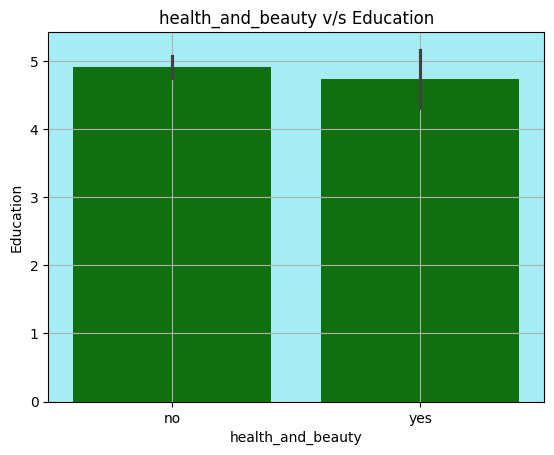

In [239]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education')
plt.grid()
plt.show()


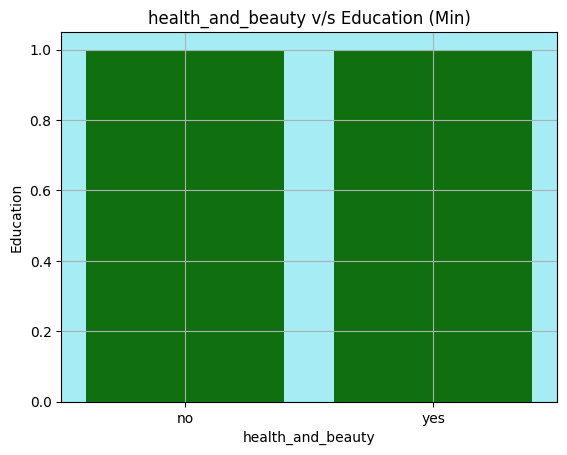

In [240]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education (Min)')
plt.grid()
plt.show()


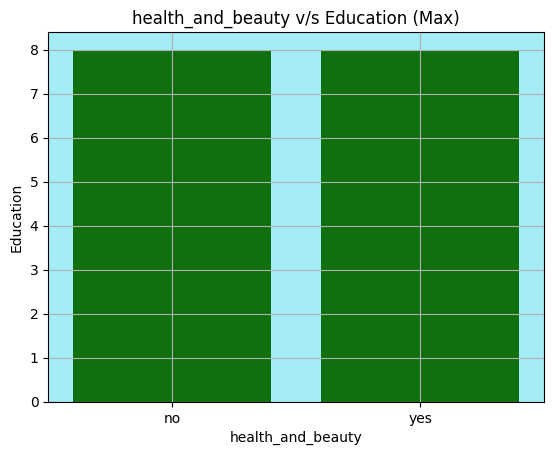

In [241]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### free_and_easy_going, Education

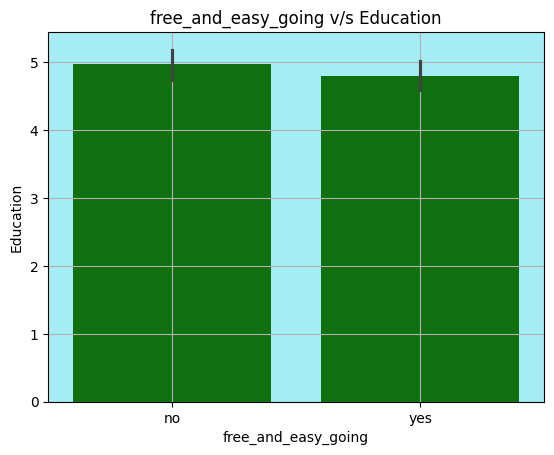

In [242]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education')
plt.grid()
plt.show()


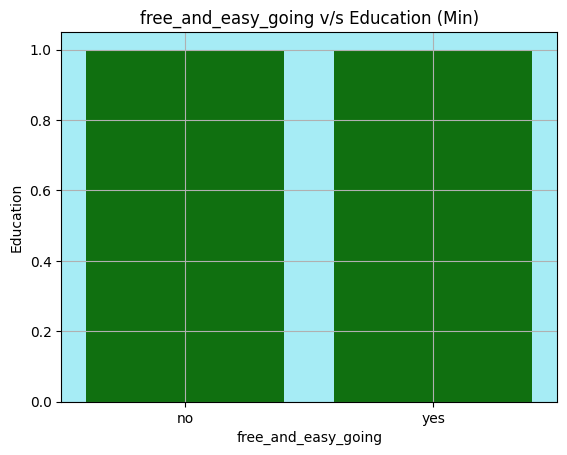

In [243]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education (Min)')
plt.grid()
plt.show()


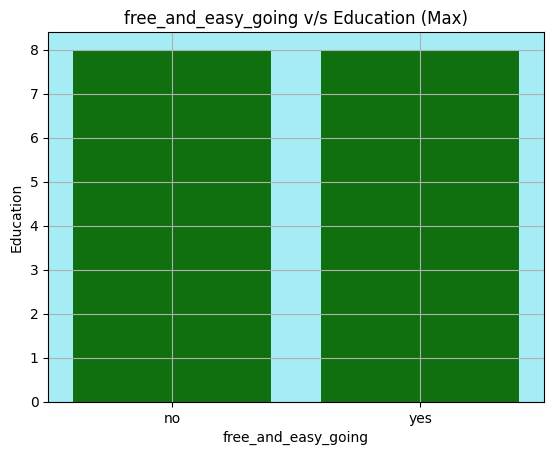

In [244]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### entertainment_facilities, Education

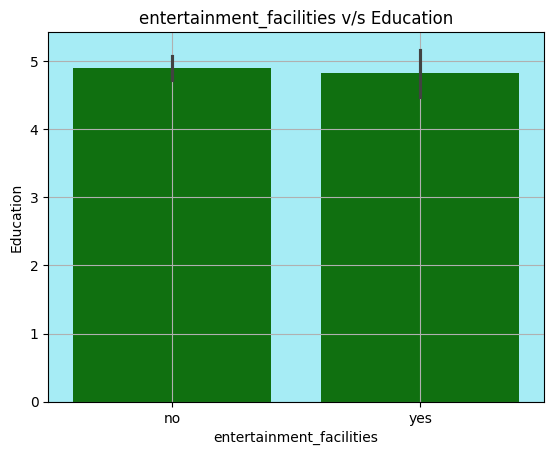

In [245]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education')
plt.grid()
plt.show()


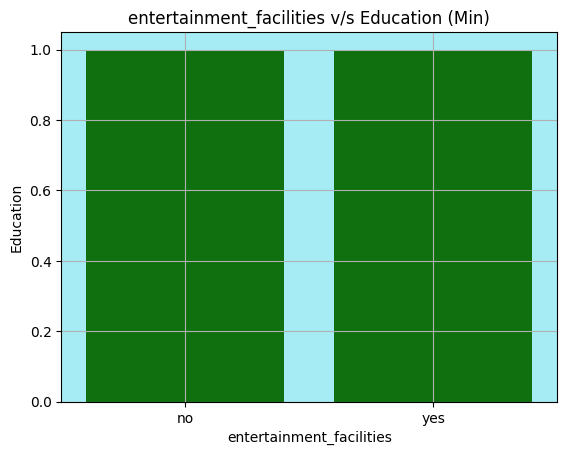

In [246]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education (Min)')
plt.grid()
plt.show()


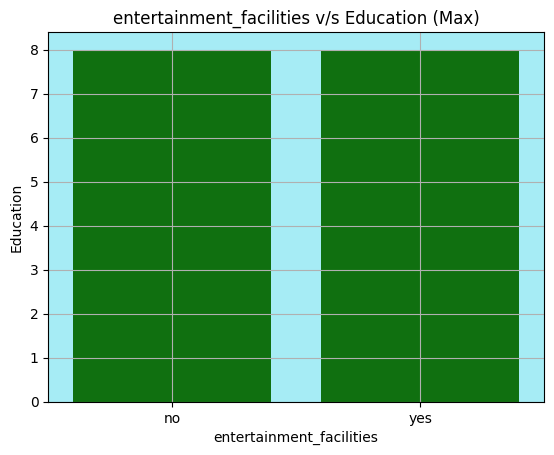

In [247]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.


#### not_care_about_prices, Education

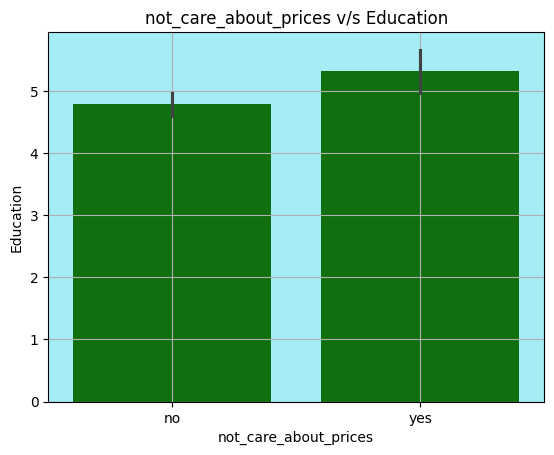

In [248]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education')
plt.grid()
plt.show()


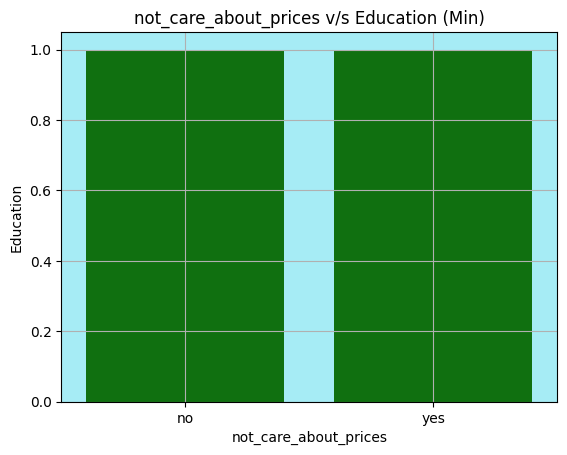

In [249]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education (Min)')
plt.grid()
plt.show()


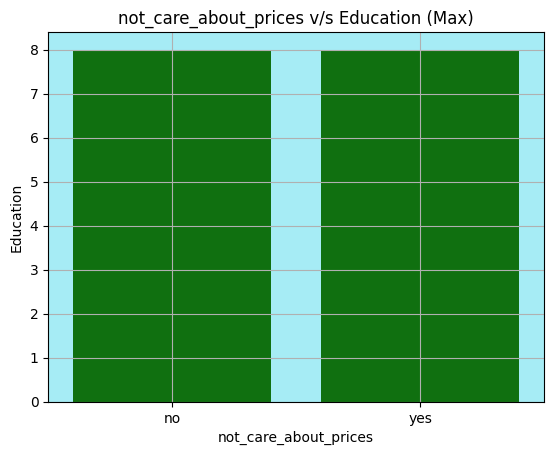

In [250]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data for Mean,Max and Min ,categories are quite balanced.

#### life_style_of_the_local_people, Education

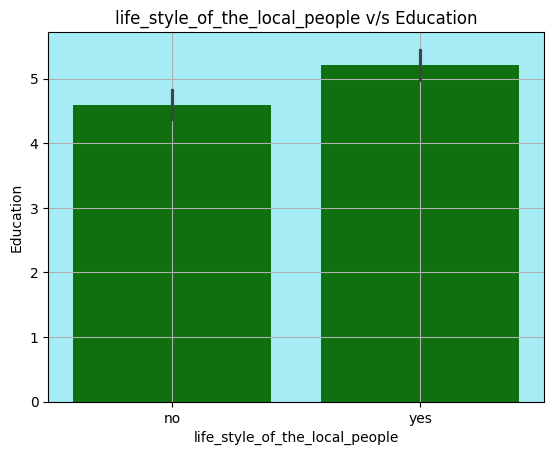

In [251]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education')
plt.grid()
plt.show()


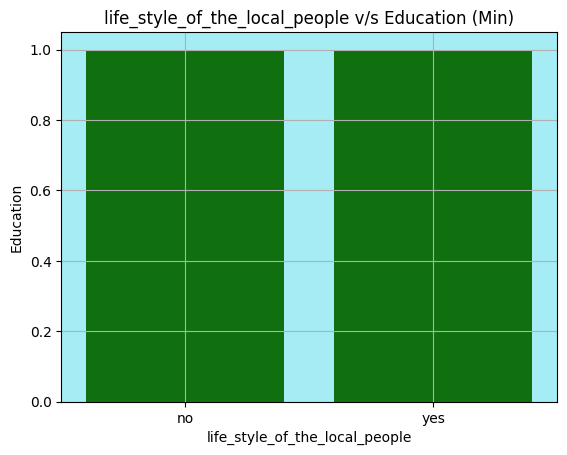

In [252]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education (Min)')
plt.grid()
plt.show()


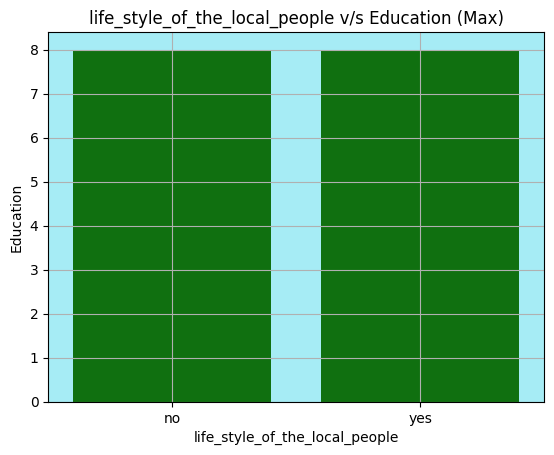

In [253]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### intense_experience_of_nature, Education

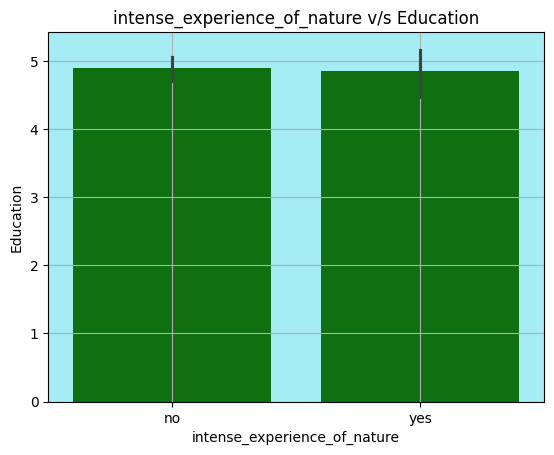

In [254]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education')
plt.grid()
plt.show()


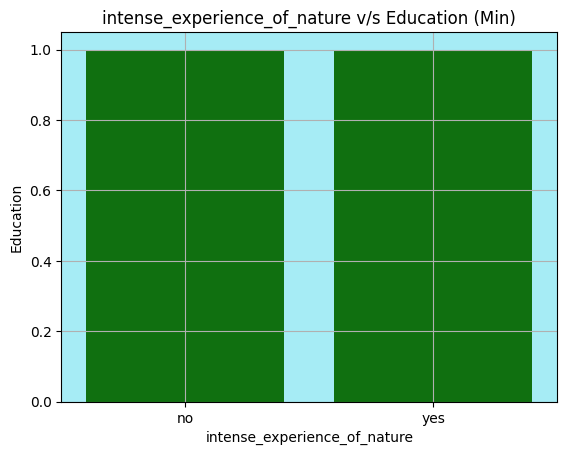

In [255]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education (Min)')
plt.grid()
plt.show()


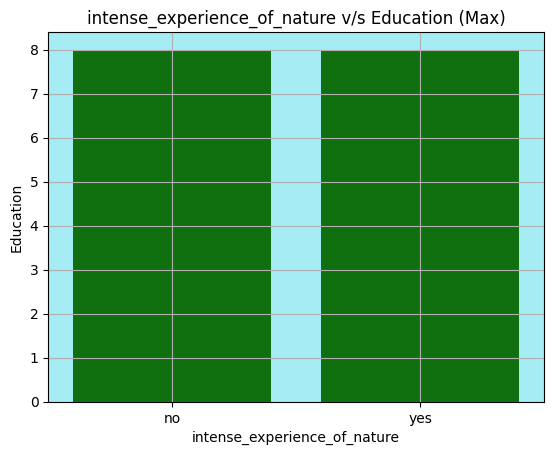

In [256]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### cosiness/familiar_atmosphere, Education

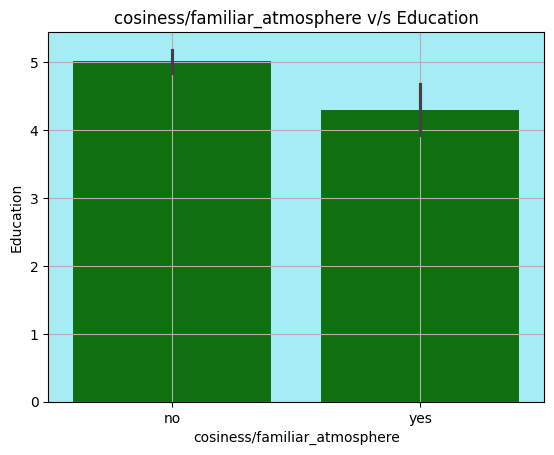

In [257]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education')
plt.grid()
plt.show()


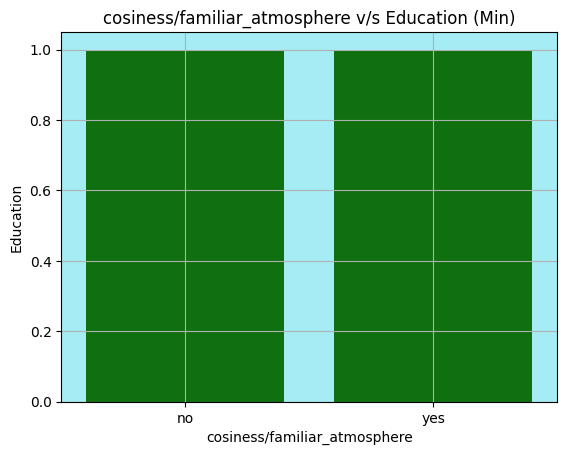

In [258]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education (Min)')
plt.grid()
plt.show()


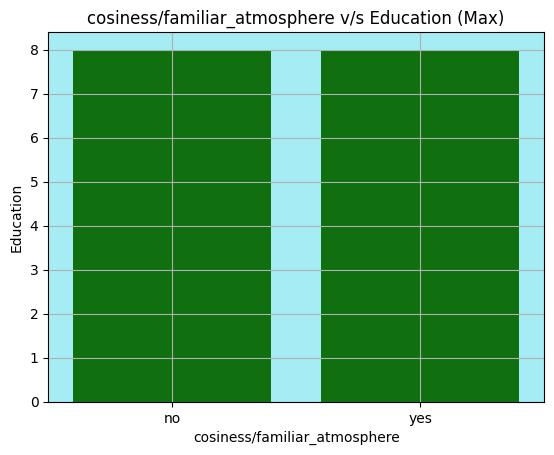

In [259]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### maintain_unspoilt_surroundings, Education

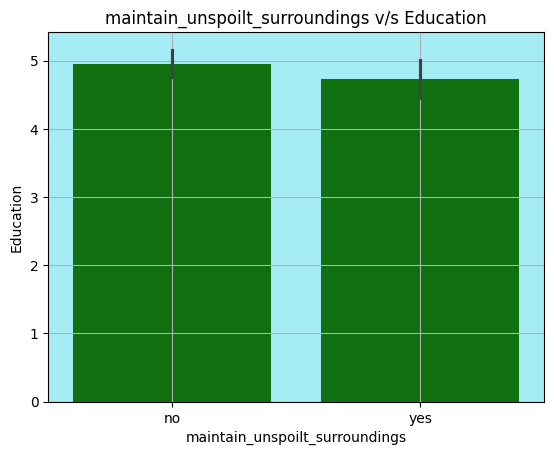

In [260]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education')
plt.grid()
plt.show()


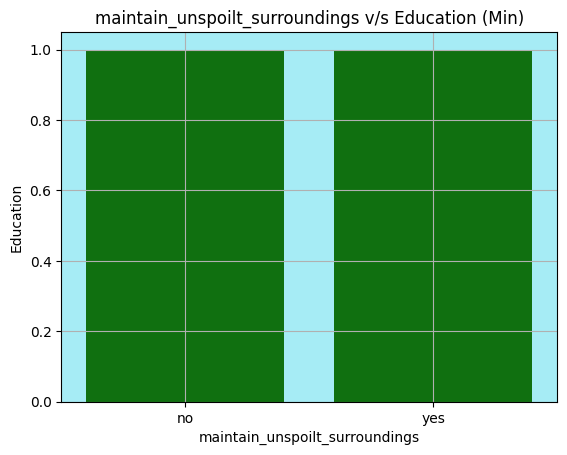

In [261]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education (Min)')
plt.grid()
plt.show()


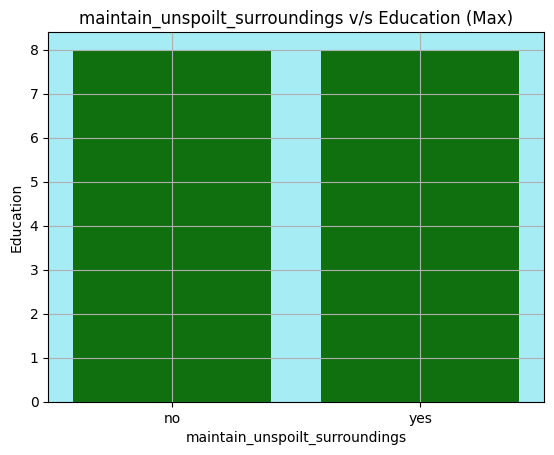

In [262]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### everything_organised, Education

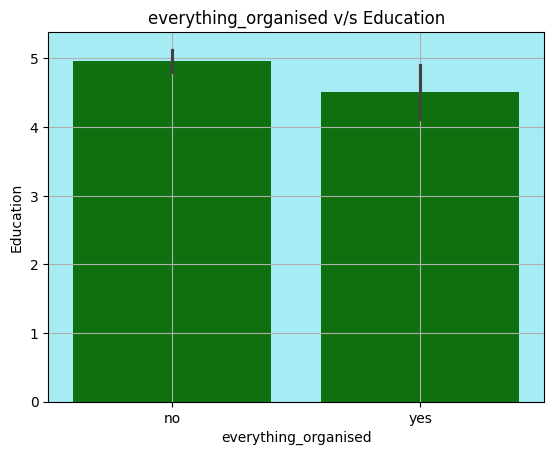

In [263]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education')
plt.grid()
plt.show()


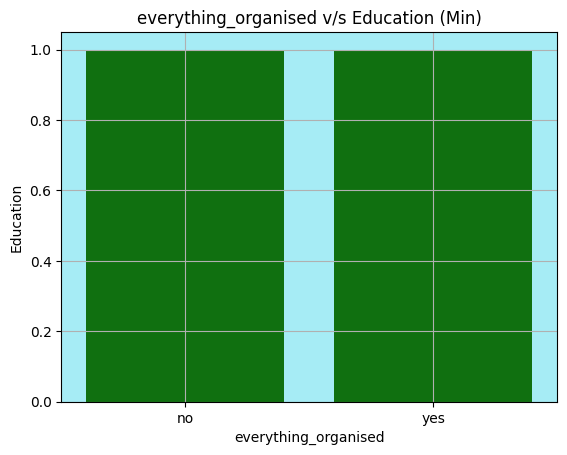

In [264]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education (Min)')
plt.grid()
plt.show()


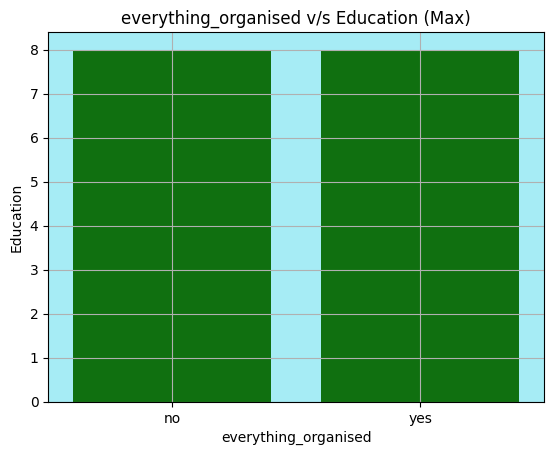

In [265]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### unspoilt_nature/natural_landscape, Education

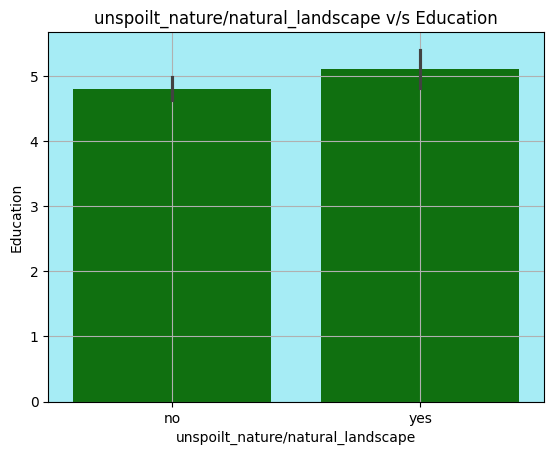

In [266]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education')
plt.grid()
plt.show()


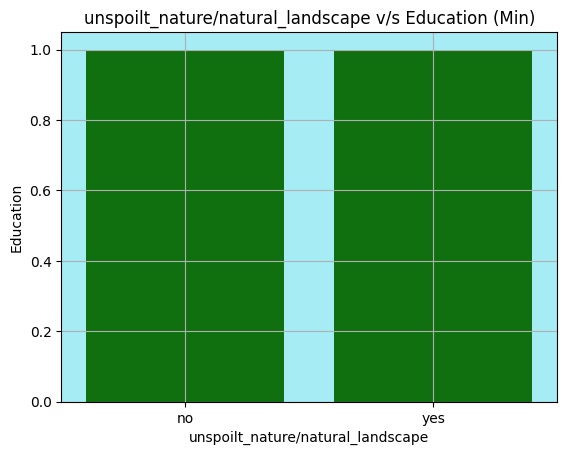

In [267]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education (Min)')
plt.grid()
plt.show()


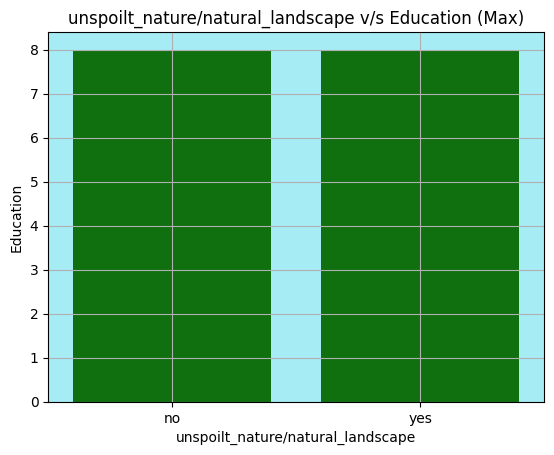

In [268]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### cultural_offers, Education

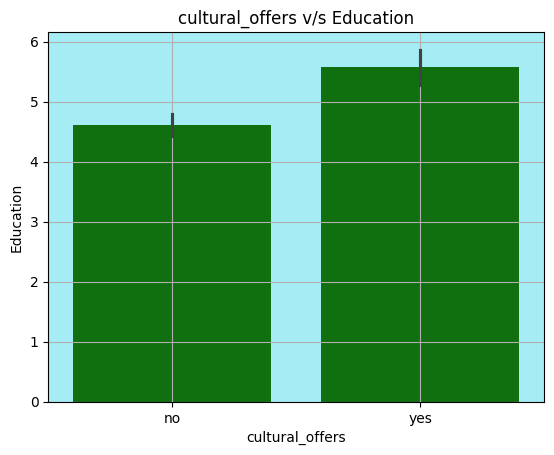

In [269]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education')
plt.grid()
plt.show()


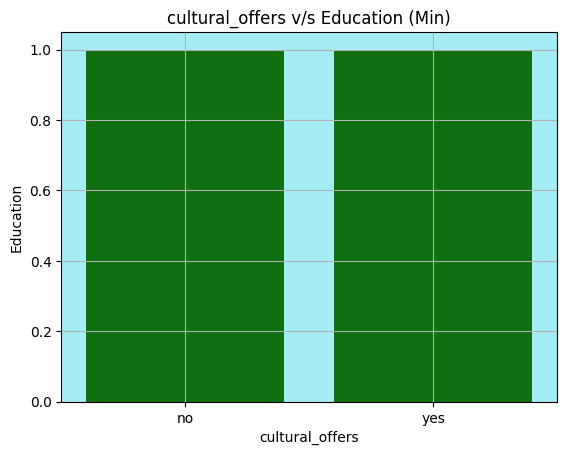

In [270]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education (Min)')
plt.grid()
plt.show()


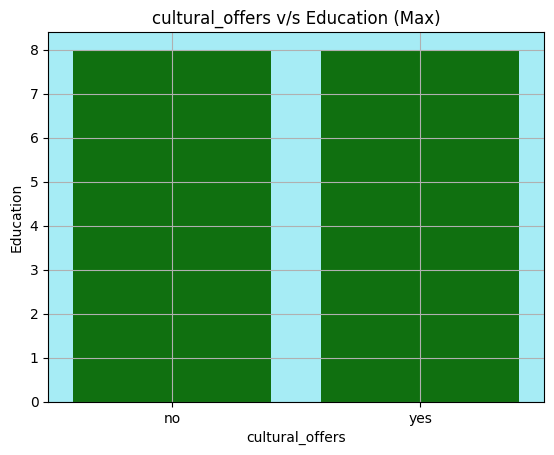

In [271]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### change_of_surroundings, Education

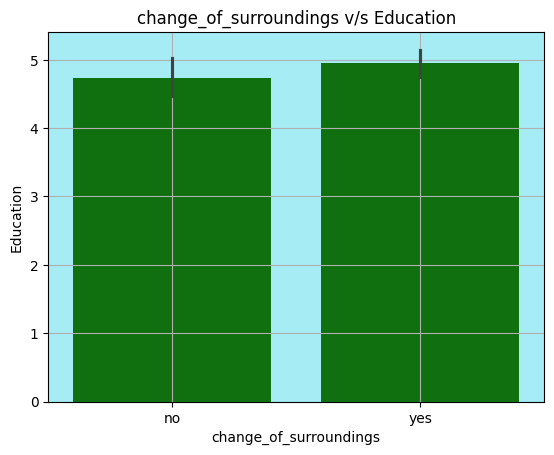

In [272]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education')
plt.grid()
plt.show()


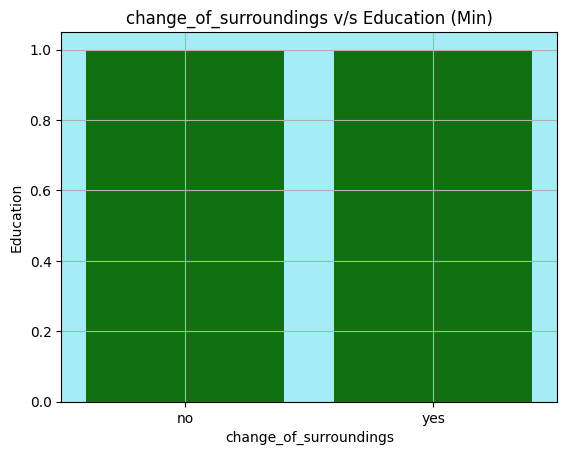

In [273]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education (Min)')
plt.grid()
plt.show()


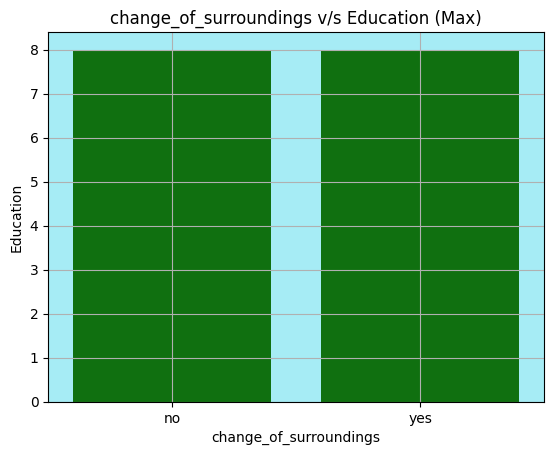

In [274]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**

 - In the data of Mean,Max and Min ,categories are quite balanced.

#### Gender, obligation_rating

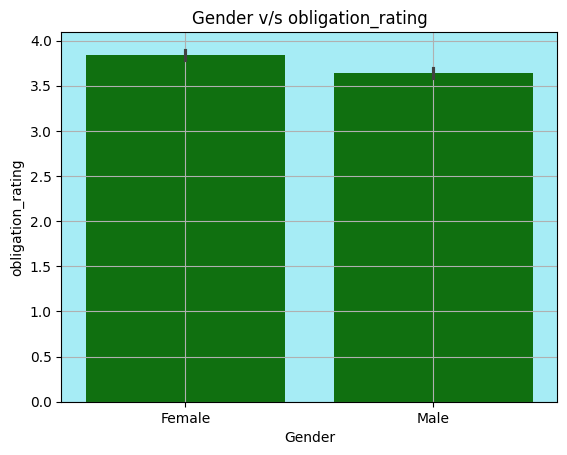

In [275]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating')
plt.grid()
plt.show()


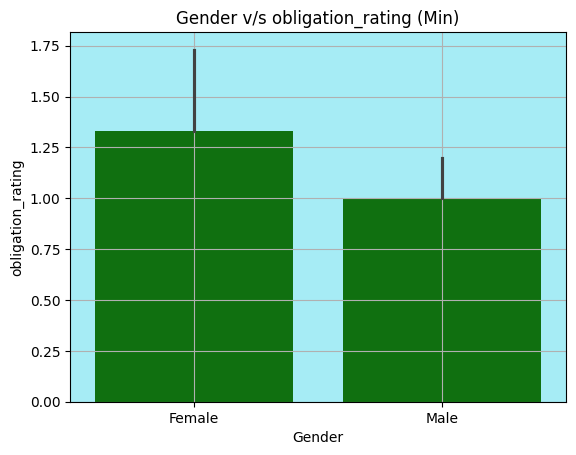

In [276]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating (Min)')
plt.grid()
plt.show()


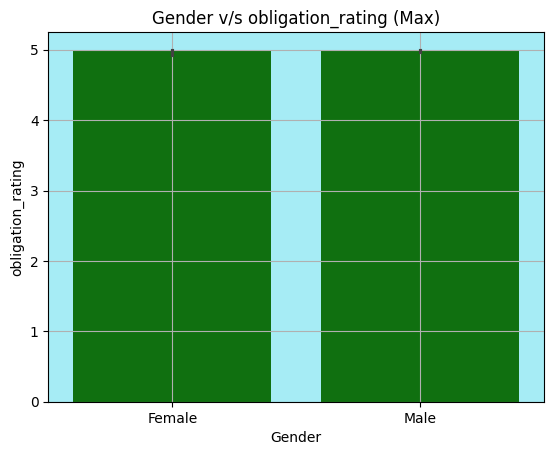

In [277]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that average obligation_rating for male and female is above 3.5
 - Maximum education by gender is balanced but Minimum obligation_rating for male is 1 and for female it is more than 1.25.

#### Occupation, obligation_rating

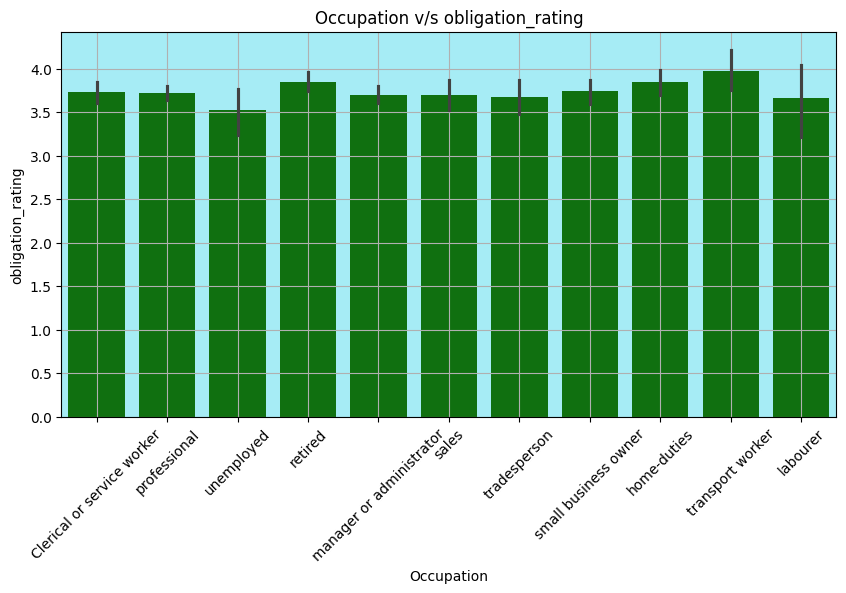

In [278]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating')
plt.grid()
plt.show()


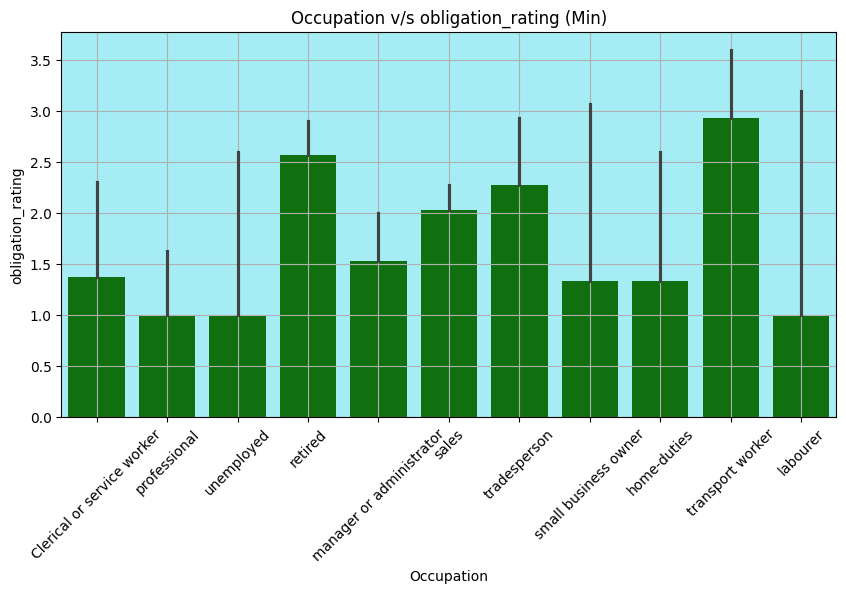

In [279]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating (Min)')
plt.grid()
plt.show()


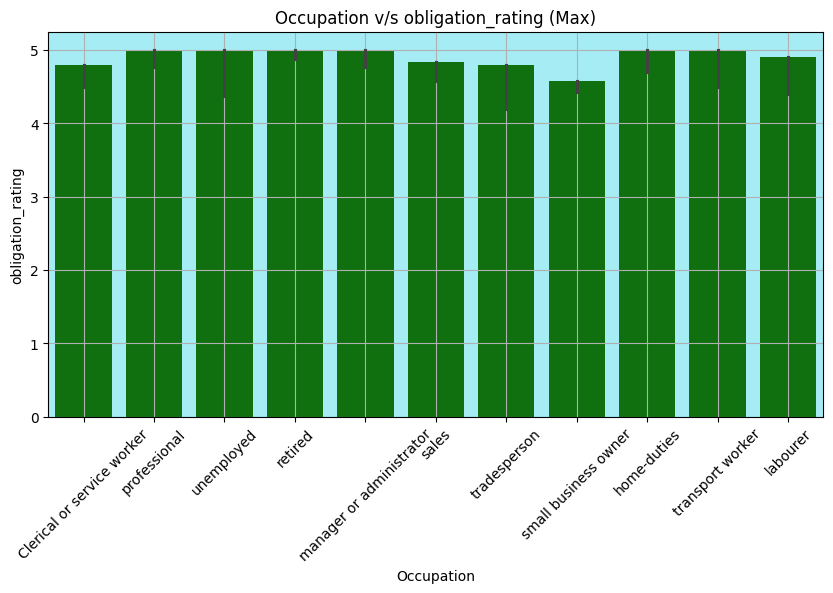

In [280]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - obligation_rating for all the occupations are balanced.
 - Minimum obligation_rating for occupation is imbalanced.
 - Minimum obligation_rating for professional, unemployed and labourer is 1.
 - Maximum obligation_rating for occupation is balanced.

#### State, obligation_rating

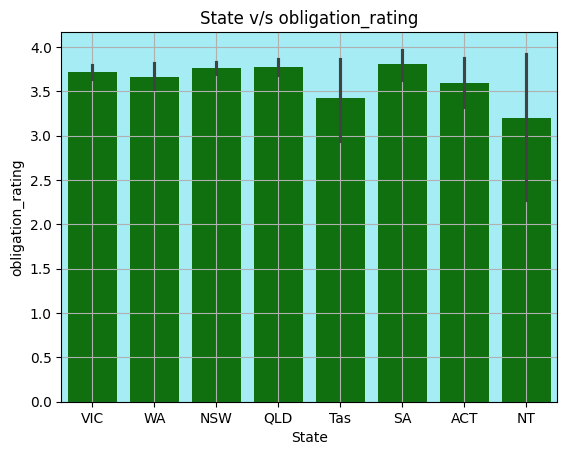

In [281]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating')
plt.grid()
plt.show()


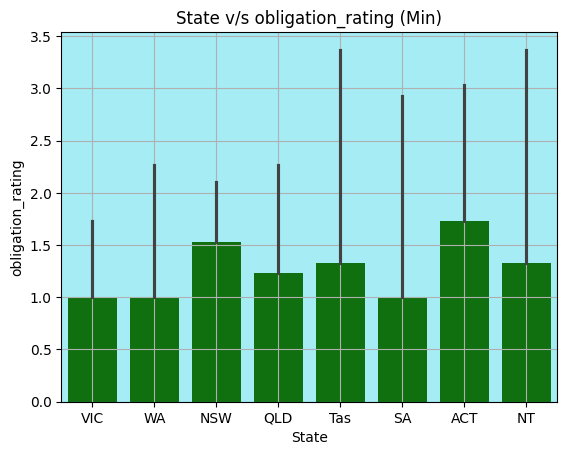

In [282]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating (Min)')
plt.grid()
plt.show()


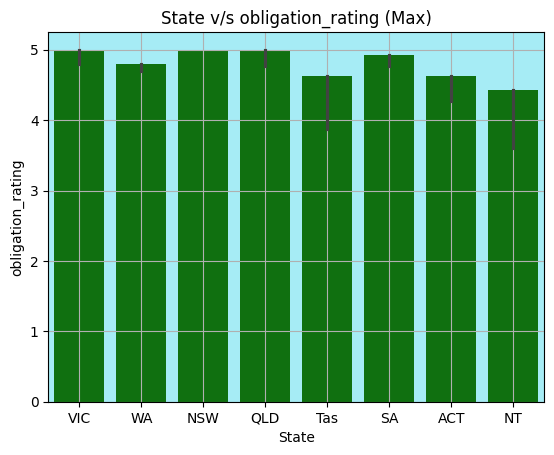

In [283]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - State v/s obligation_rating is quite balanced.
 - there is for minimum obligation_rating for State VIC, WA and SA is 1.
 - maximum obligation_rating by state is balanced.

#### relationship_status, obligation_rating

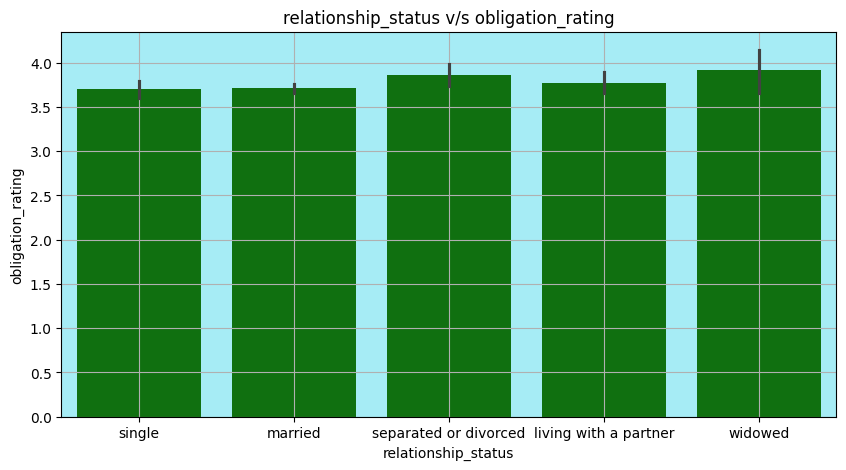

In [284]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating')
plt.grid()
plt.show()


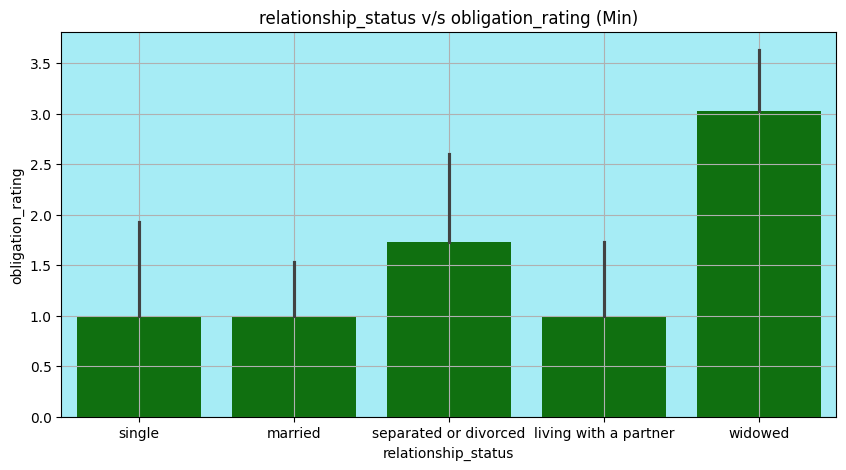

In [285]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating (Min)')
plt.grid()
plt.show()


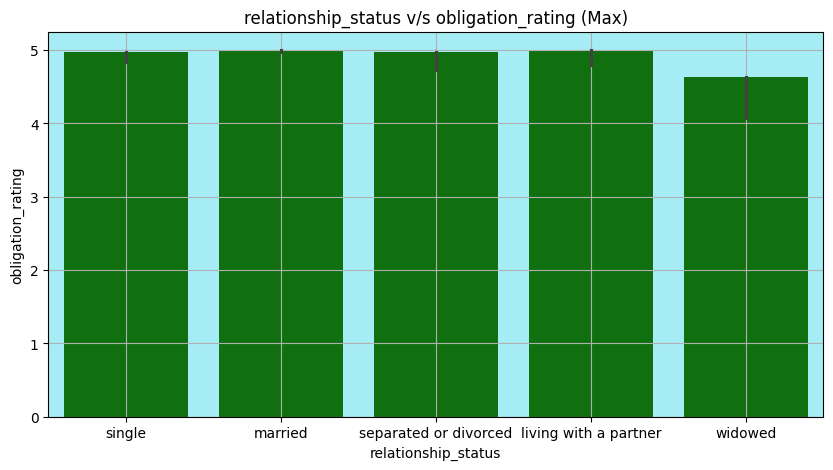

In [286]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - relationship_status v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `Single`, `Married` and `living with a partner` is 1.
 - Maximum relationship_status v/s obligation_rating is balanced.

#### obligation_category, obligation_rating

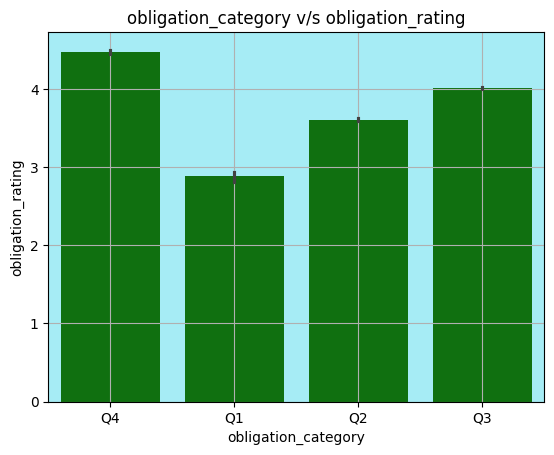

In [287]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating')
plt.grid()
plt.show()


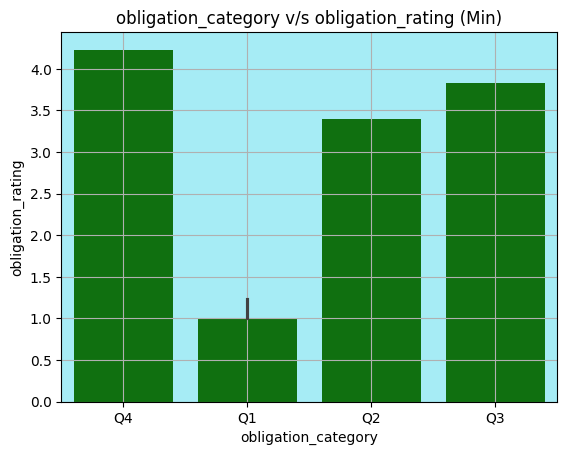

In [288]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating (Min)')
plt.grid()
plt.show()


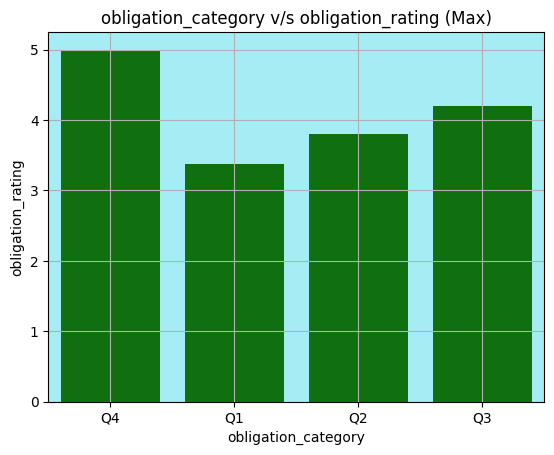

In [289]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - obligation_category v/s obligation_rating is imbalanced.
 - Minimum obligation_rating for `Q1` is 1.
 - Maximum obligation_rating for `Q4` is 5.

#### rest_and_relax, obligation_rating

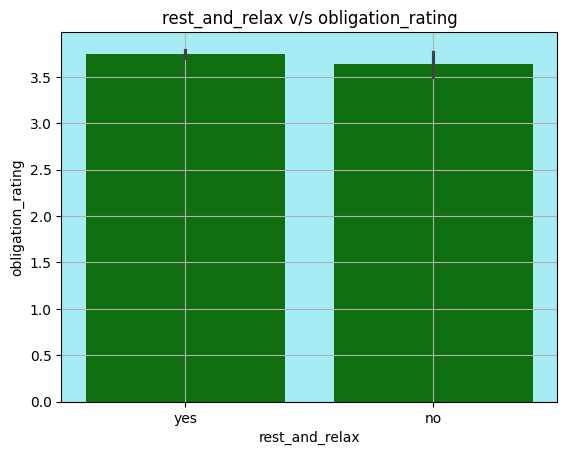

In [290]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating')
plt.grid()
plt.show()


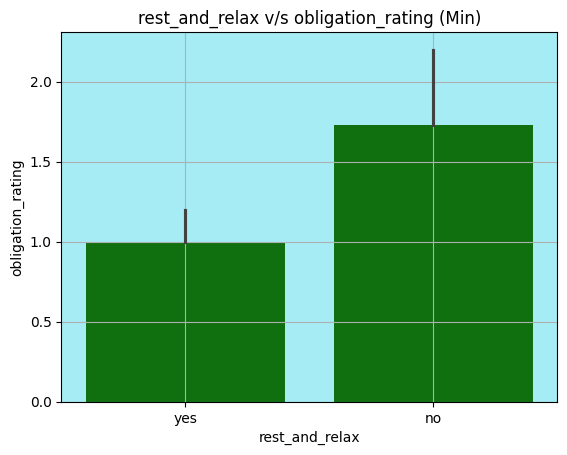

In [291]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating (Min)')
plt.grid()
plt.show()


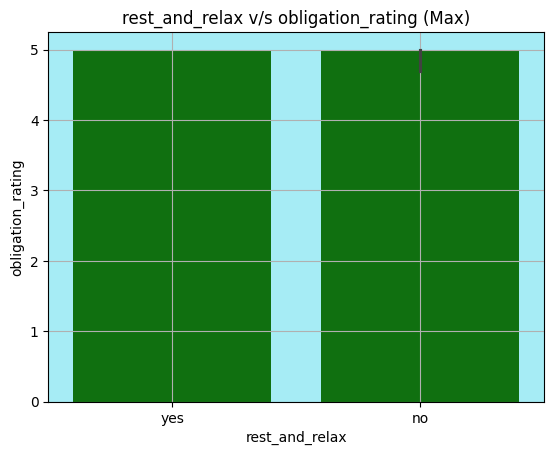

In [292]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - obligation_category v/s rest_and_relax is quite balanced.
 - Minimum obligation_rating for `yes` is 1.
 - Maximum obligation_rating v/s rest_and_relax is balanced.

#### luxury_or_be_spoilt, obligation_rating

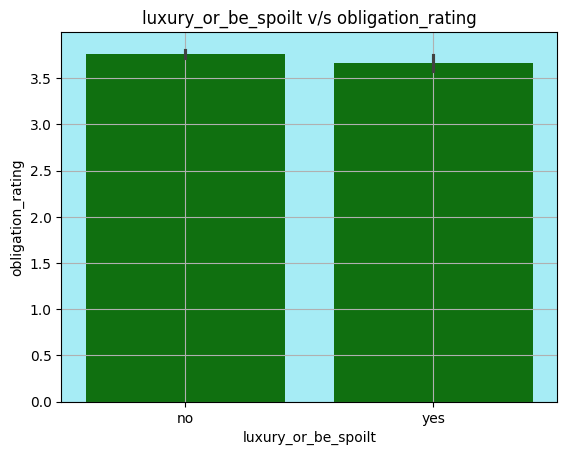

In [293]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating')
plt.grid()
plt.show()


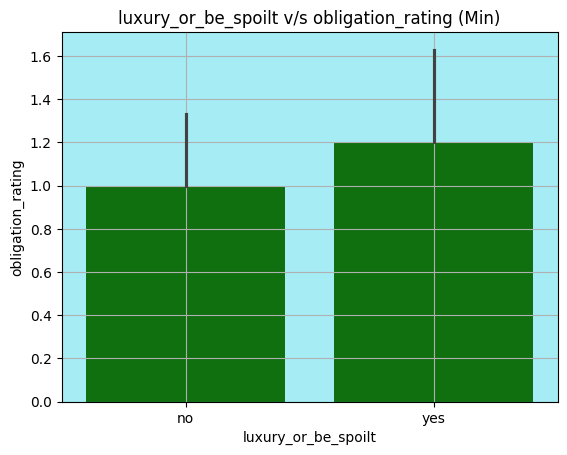

In [294]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating (Min)')
plt.grid()
plt.show()


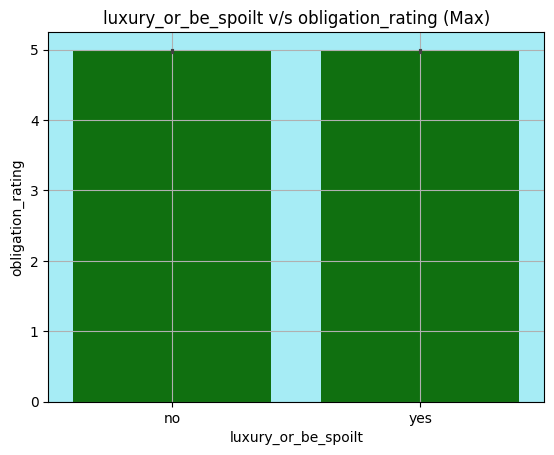

In [295]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - luxury_or_be_sploit v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum luxury_or_be_sploit v/s obligation_rating is balanced.

#### do_sports, obligation_rating

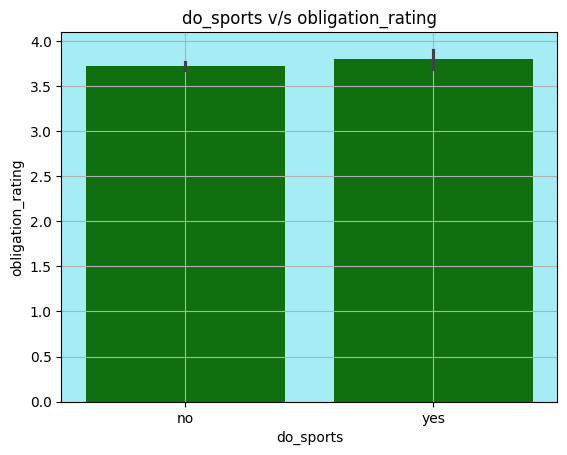

In [296]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating')
plt.grid()
plt.show()


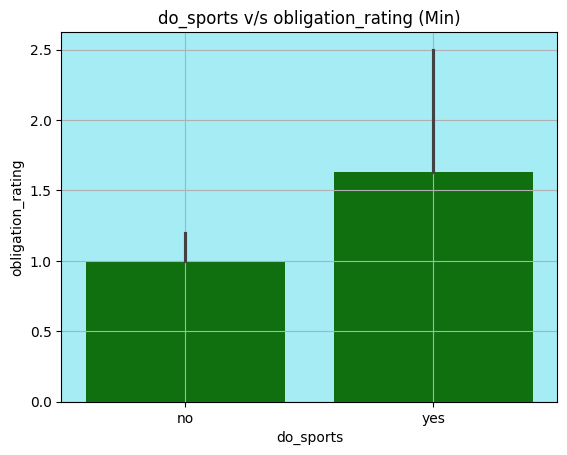

In [297]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating (Min)')
plt.grid()
plt.show()


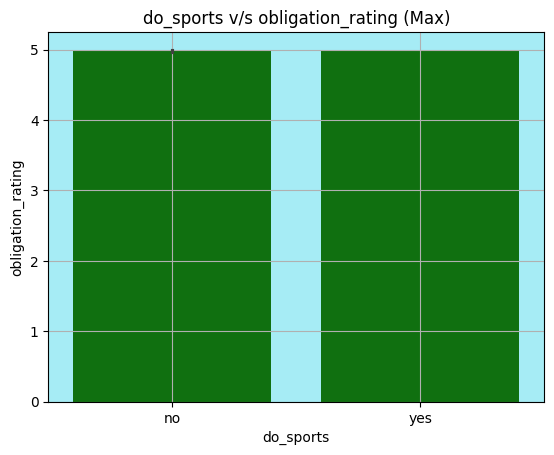

In [298]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - do_sports v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum do_sports v/s obligation_rating is balanced.

#### excitement_and_challenge, obligation_rating

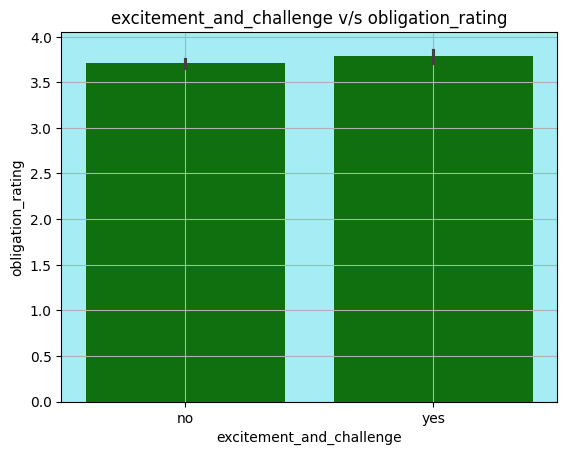

In [299]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating')
plt.grid()
plt.show()


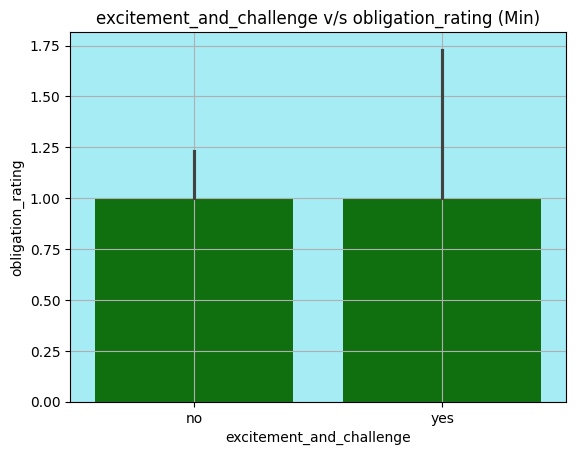

In [300]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating (Min)')
plt.grid()
plt.show()


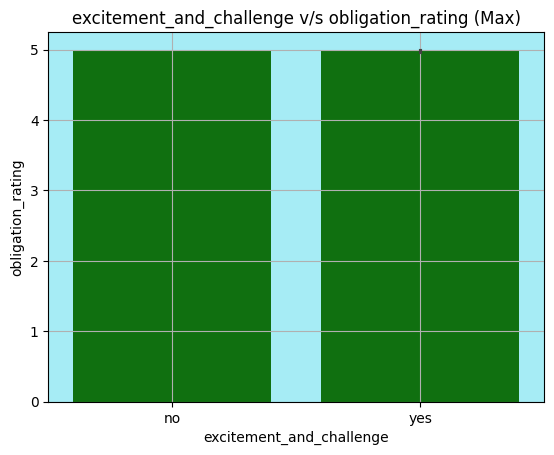

In [301]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - excitement_and_challange v/s obligation_rating is quite balanced.
 - Minimum excitement_and_challange v/s obligation_rating is balanced.
 - Maximum excitement_and_challange v/s obligation_rating is balanced.

#### not_exceed_planned_budget, obligation_rating

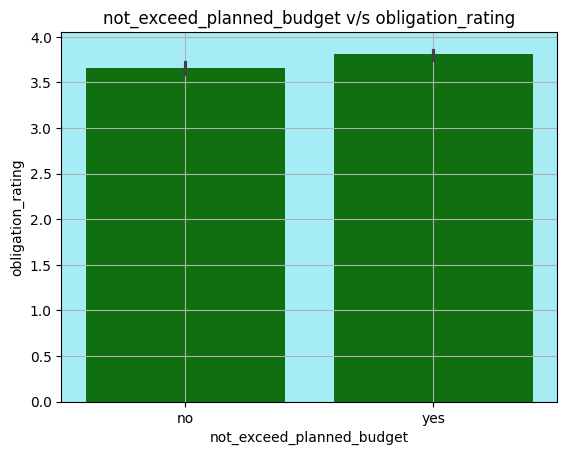

In [302]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating')
plt.grid()
plt.show()


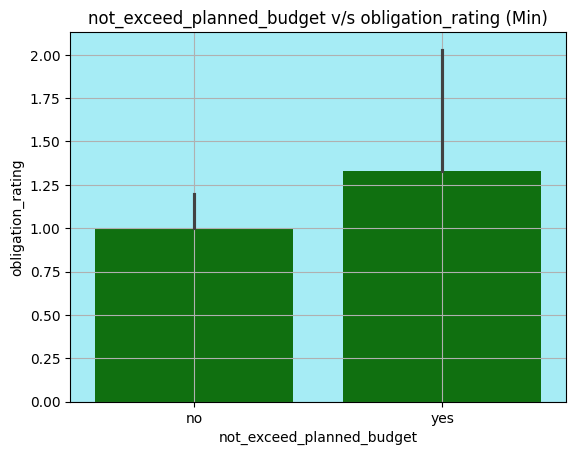

In [303]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating (Min)')
plt.grid()
plt.show()


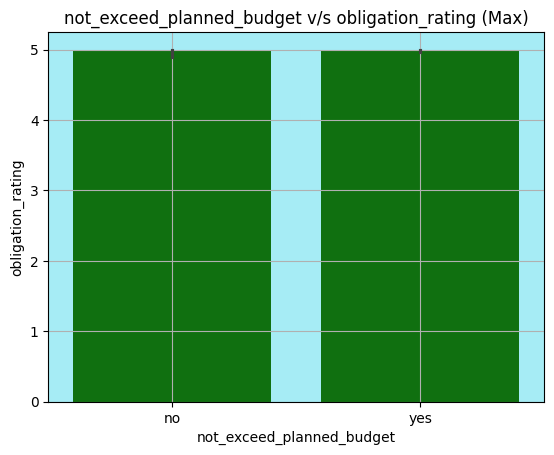

In [304]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - not_exceed_planned_budget v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum not_exceed_planned_budget v/s obligation_rating balanced.

#### realise_creativity, obligation_rating

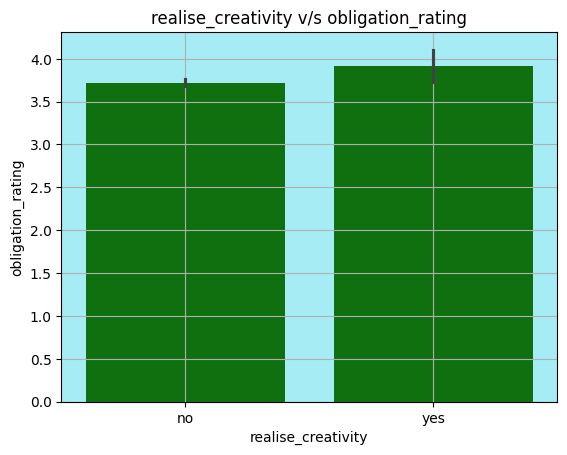

In [305]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating')
plt.grid()
plt.show()


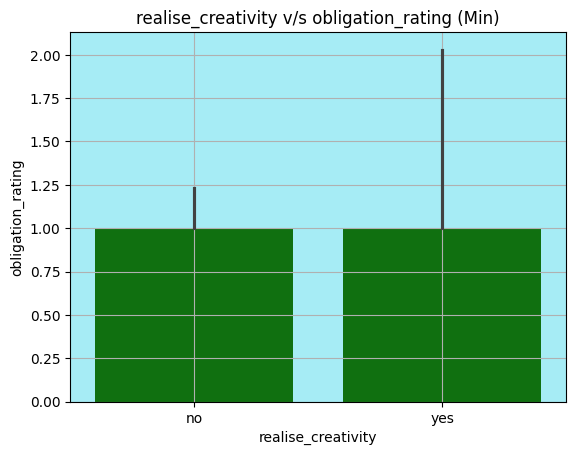

In [306]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating (Min)')
plt.grid()
plt.show()


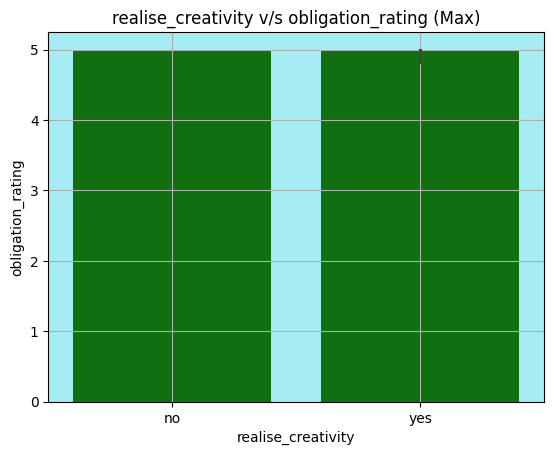

In [307]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - realise_creativity v/s obligation_rating is balanced.
 - Minimum realise_creativity v/s obligation_rating is balanced.
 - Maximum realise_creativity v/s obligation_rating is balanced.

#### fun_and_entertainment, obligation_rating

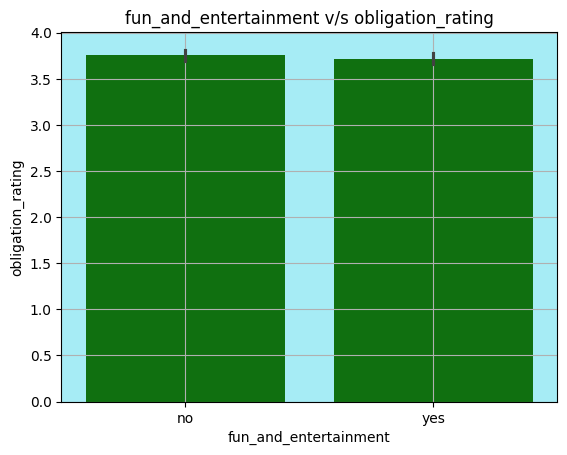

In [308]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating')
plt.grid()
plt.show()


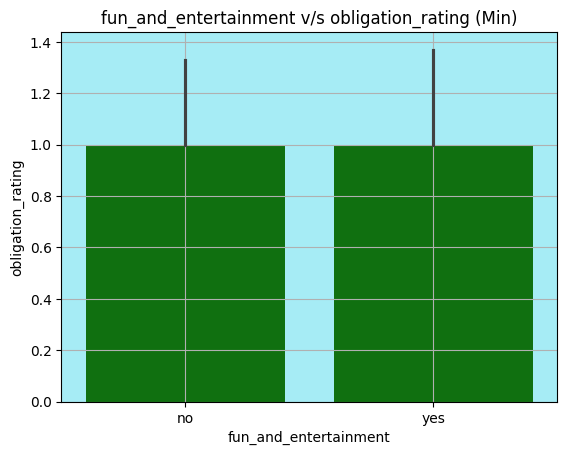

In [309]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating (Min)')
plt.grid()
plt.show()


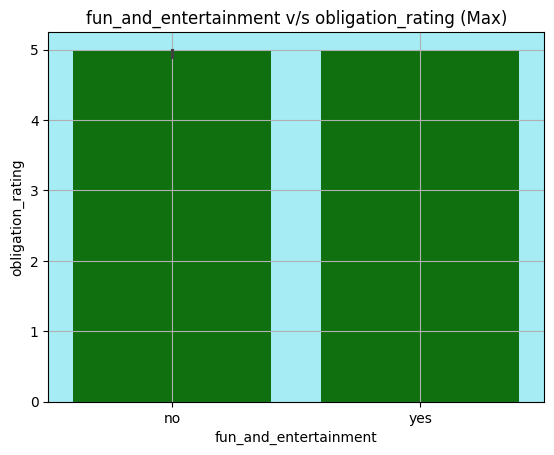

In [310]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - fun_and_entertainment v/s obligation_rating is balanced.
 - Minimum fun_and_entertainment v/s obligation_rating is balanced.
 - Maximum fun_and_entertainment v/s obligation_rating is balanced.

#### good_company, obligation_rating

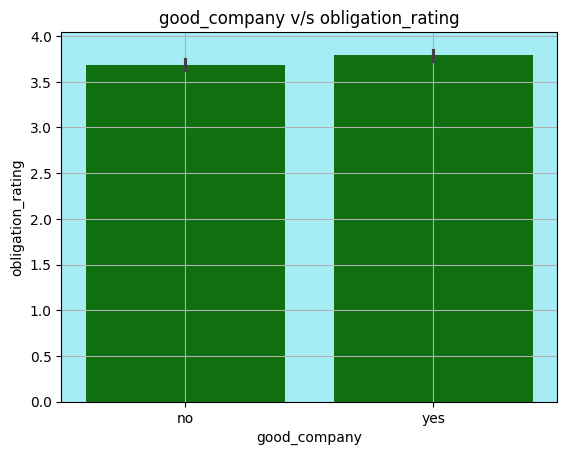

In [311]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating')
plt.grid()
plt.show()


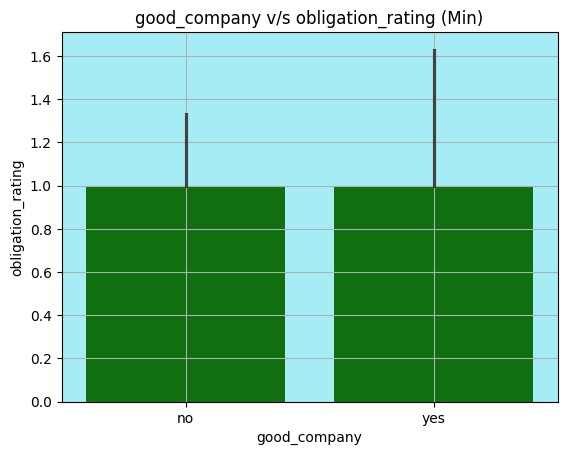

In [312]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating (Min)')
plt.grid()
plt.show()


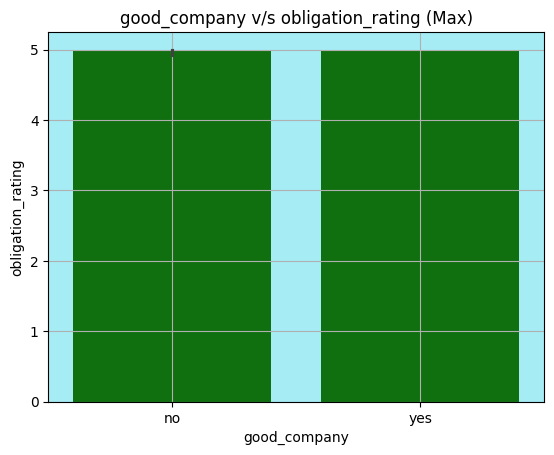

In [313]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - good_company v/s obligation_rating is balanced.
 - Minimum good_company v/s obligation_rating is balanced.
 - Maximum good_company v/s obligation_rating is balanced.

#### health_and_beauty, obligation_rating

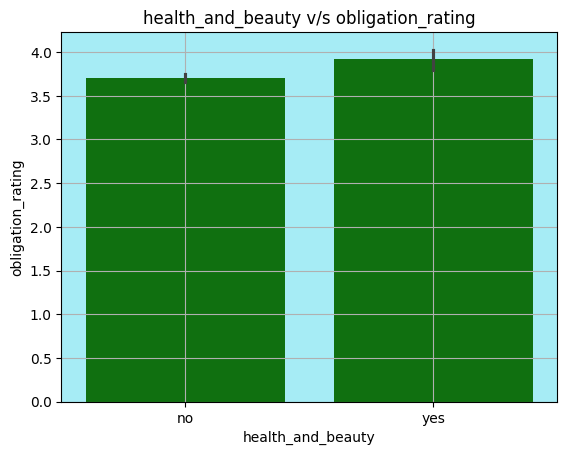

In [314]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating')
plt.grid()
plt.show()


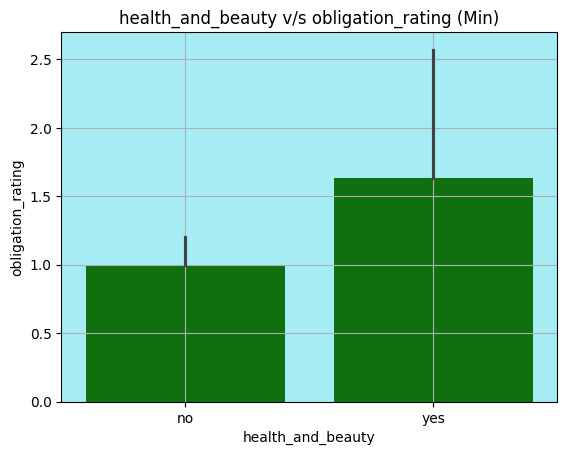

In [315]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating (Min)')
plt.grid()
plt.show()


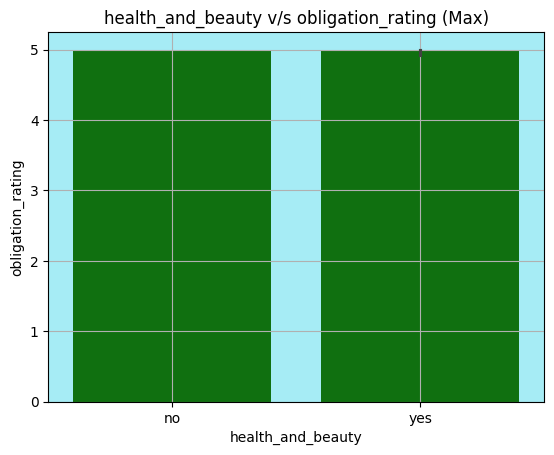

In [316]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - health_and_beauty v/s obligation_rating is balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum health_and_beauty v/s obligation_rating is balanced.

#### free_and_easy_going, obligation_rating

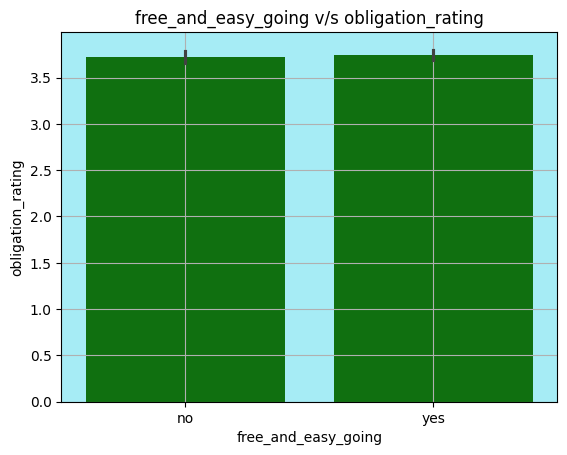

In [317]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating')
plt.grid()
plt.show()


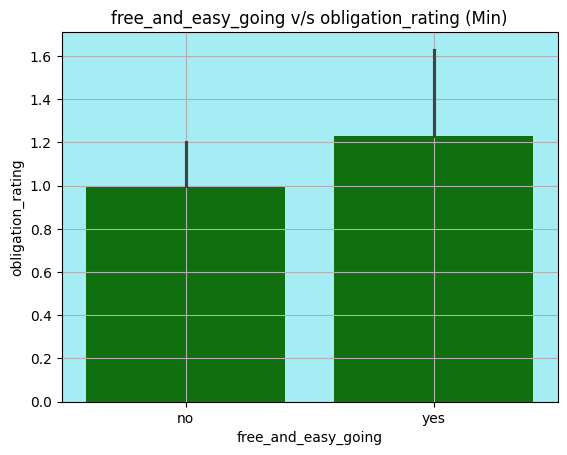

In [318]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating (Min)')
plt.grid()
plt.show()


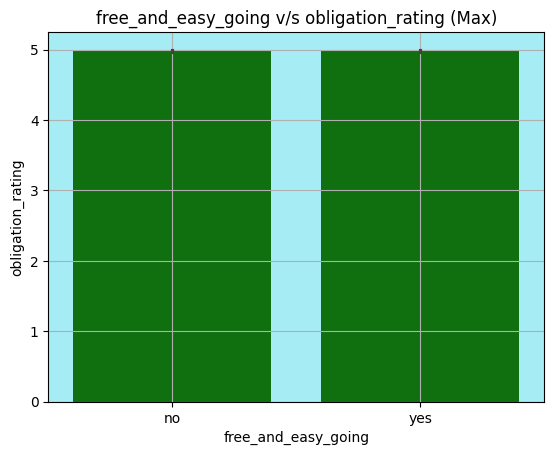

In [319]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - free_and_easy_going v/s obligation_rating is balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum free_and_easy_going v/s obligation_rating is balanced.

#### entertainment_facilities, obligation_rating

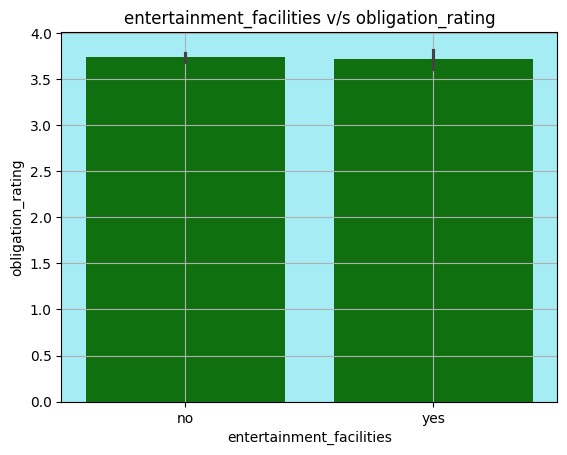

In [320]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating')
plt.grid()
plt.show()


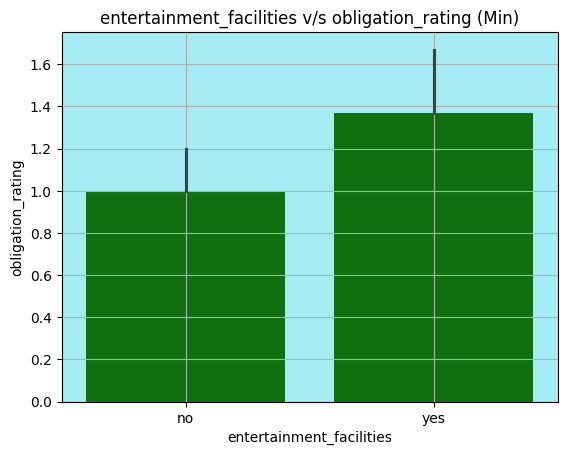

In [321]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating (Min)')
plt.grid()
plt.show()


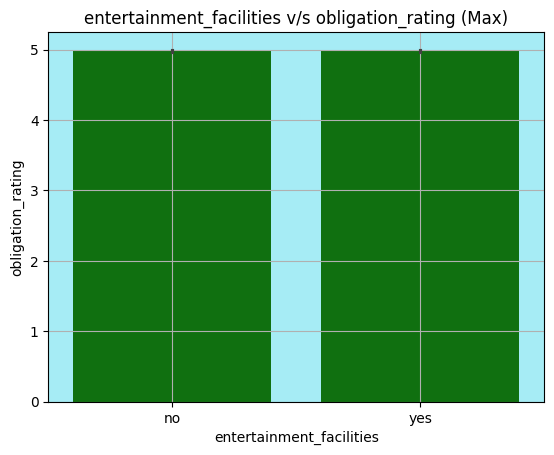

In [322]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - entertainment_facilities v/s obligation_rating is balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum entertainment_facilities v/s obligation_rating is balanced.

#### not_care_about_prices, obligation_rating

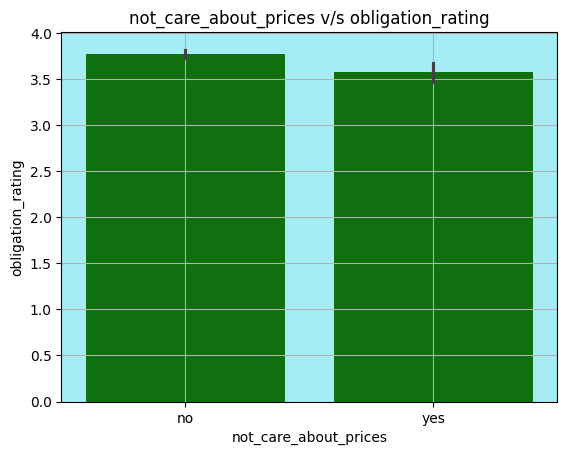

In [323]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating')
plt.grid()
plt.show()


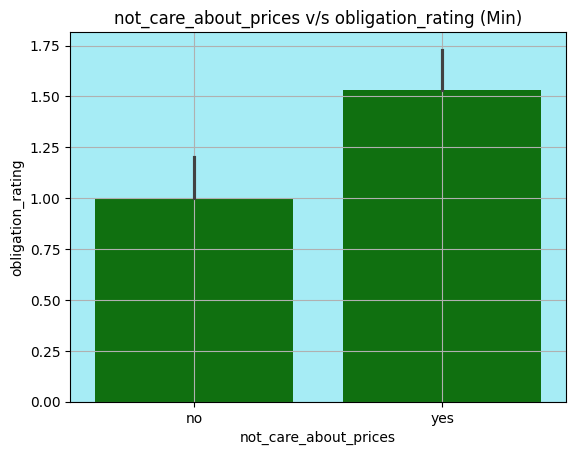

In [324]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating (Min)')
plt.grid()
plt.show()


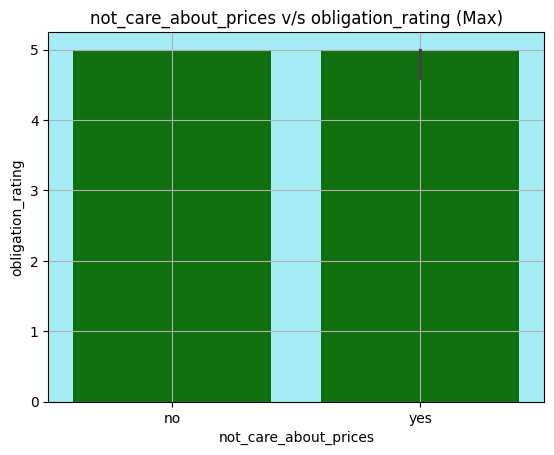

In [325]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - not_care_about_prices v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum not_care_about_prices v/s obligation_rating is balanced.

#### life_style_of_the_local_people, obligation_rating

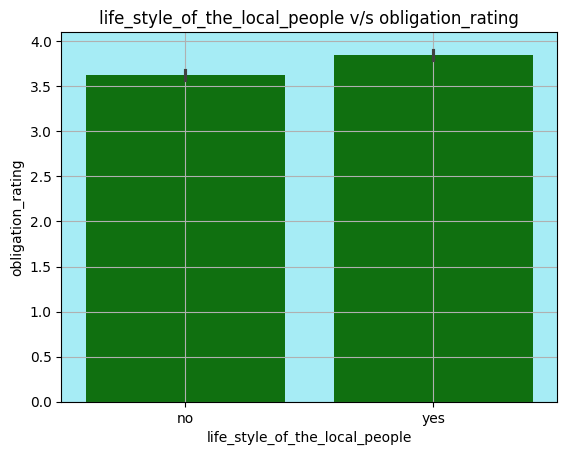

In [326]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating')
plt.grid()
plt.show()


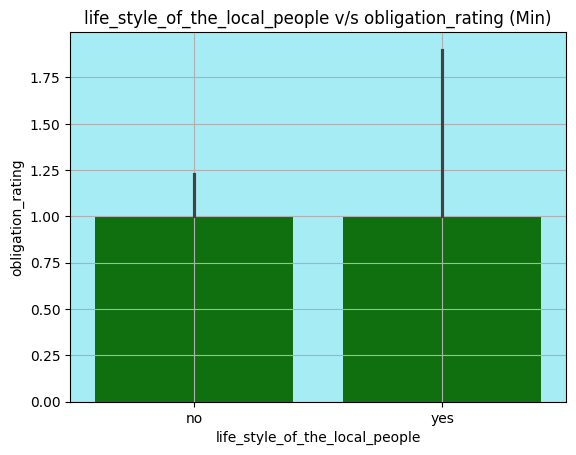

In [327]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating (Min)')
plt.grid()
plt.show()


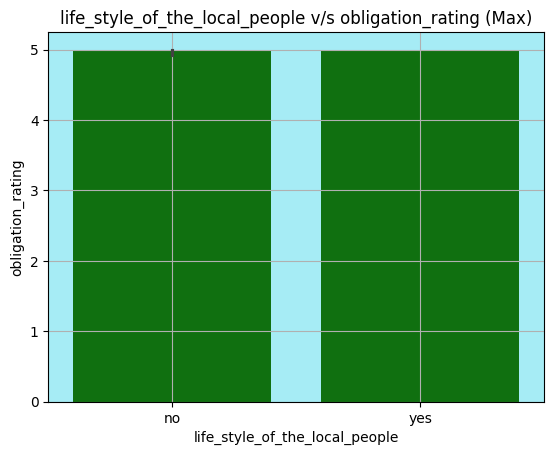

In [328]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - life_style_of_the_local_people v/s obligation_rating is quite balanced.
 - Minimum life_style_of_the_local_people v/s obligation_rating is balanced.
 - Maximum life_style_of_the_local_people v/s obligation_rating is balanced.

#### intense_experience_of_nature, obligation_rating

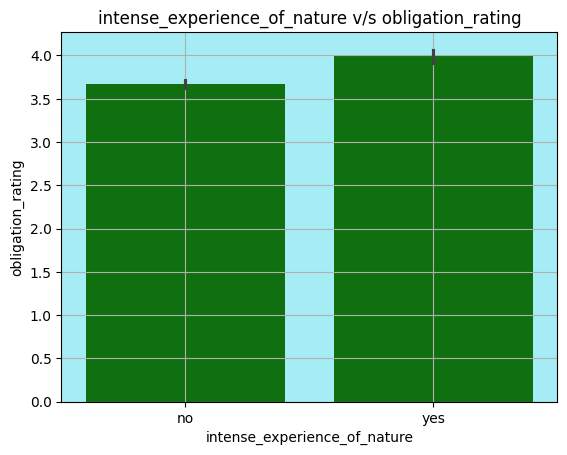

In [329]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating')
plt.grid()
plt.show()


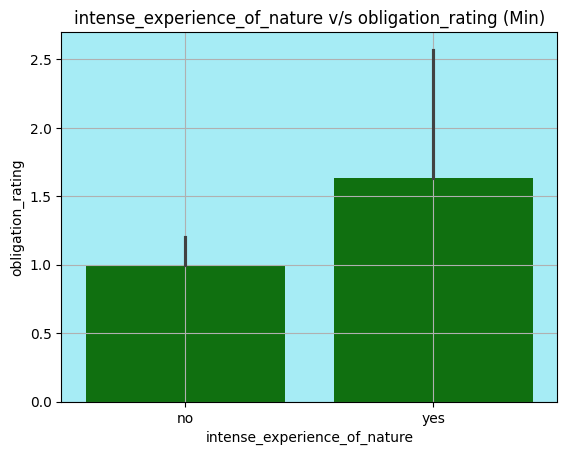

In [330]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating (Min)')
plt.grid()
plt.show()


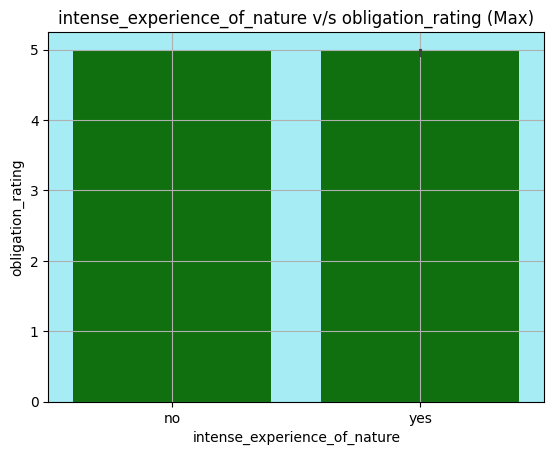

In [331]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - intense_experience_of_nature v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum intense_experience_of_nature v/s obligation_rating is balanced.

#### cosiness/familiar_atmosphere, obligation_rating

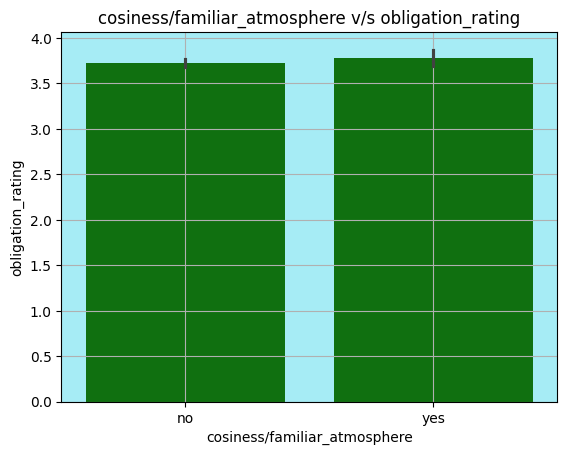

In [332]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating')
plt.grid()
plt.show()


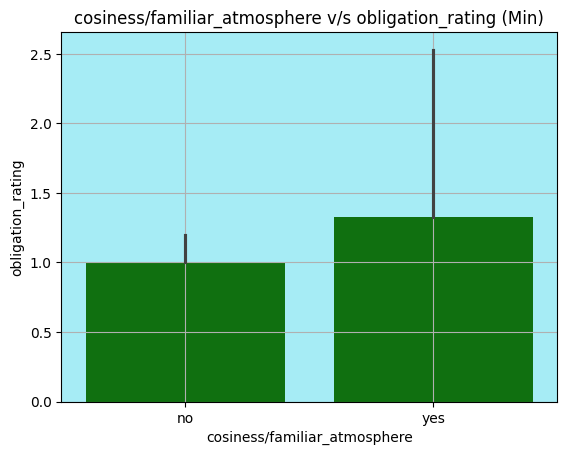

In [333]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating (Min)')
plt.grid()
plt.show()


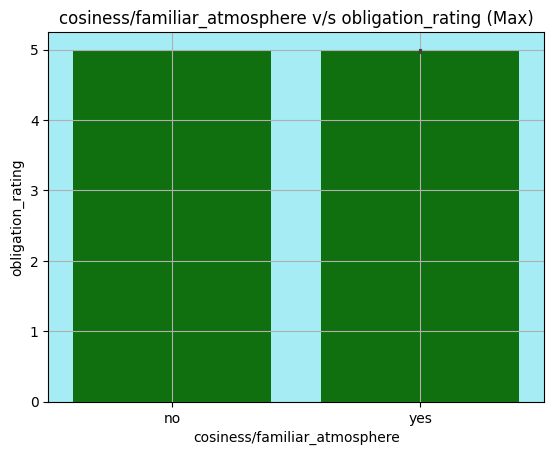

In [334]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - cosiness/familiar_atmosphere v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum cosiness/familiar_atmosphere v/s obligation_rating is balanced.

#### maintain_unspoilt_surroundings, obligation_rating

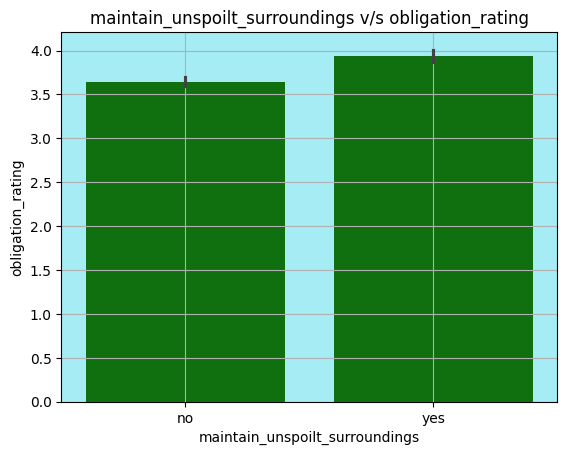

In [335]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating')
plt.grid()
plt.show()


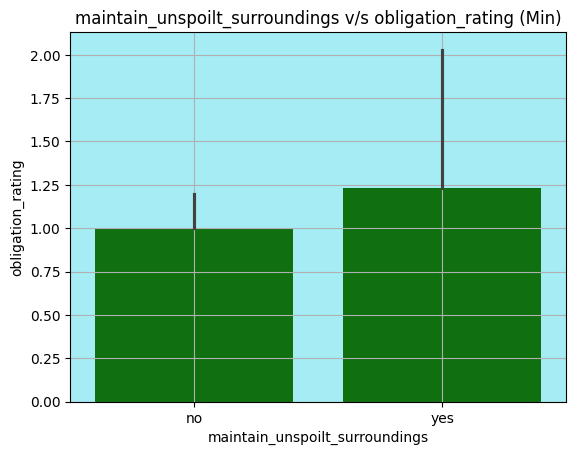

In [336]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating (Min)')
plt.grid()
plt.show()


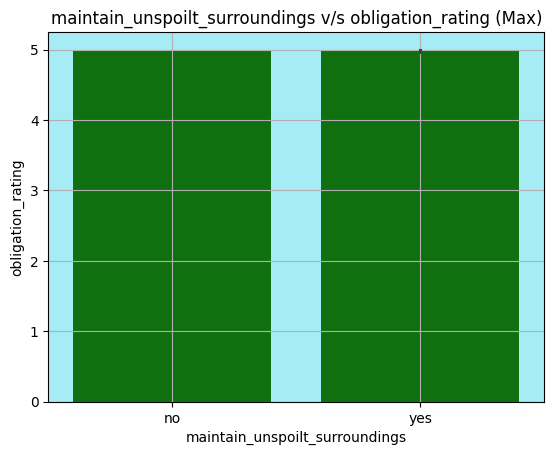

In [337]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - maintain_unspoilt_surroundings v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum maintain_unspoilt_surroundings v/s obligation_rating is balanced.

#### everything_organised, obligation_rating

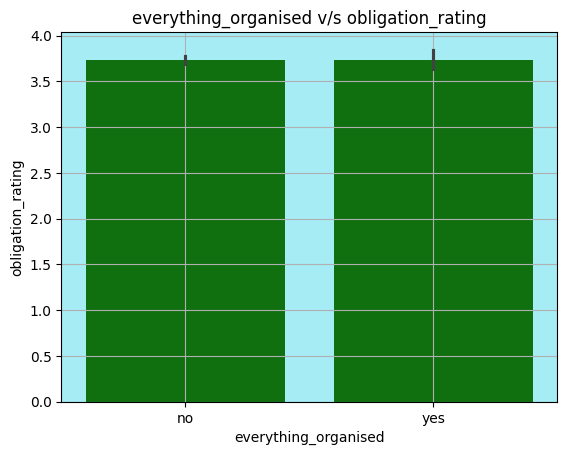

In [338]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating')
plt.grid()
plt.show()


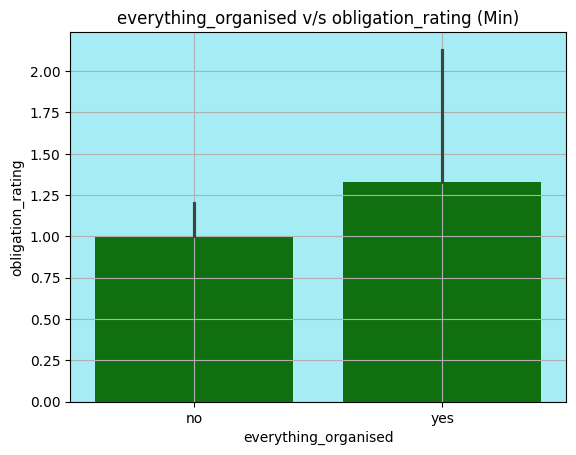

In [339]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating (Min)')
plt.grid()
plt.show()


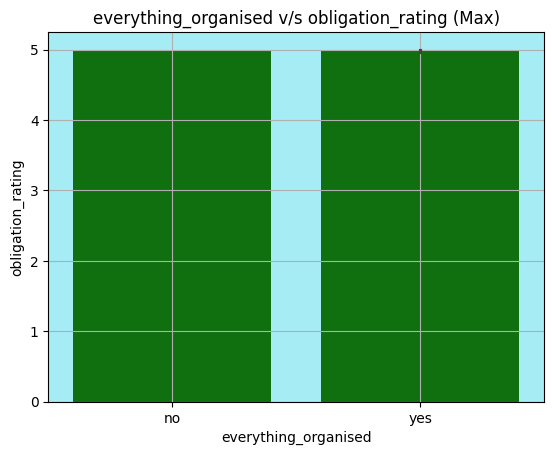

In [340]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - everything_organised v/s obligation_rating is balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum everything_organised v/s obligation_rating is balanced.

#### unspoilt_nature/natural_landscape, obligation_rating

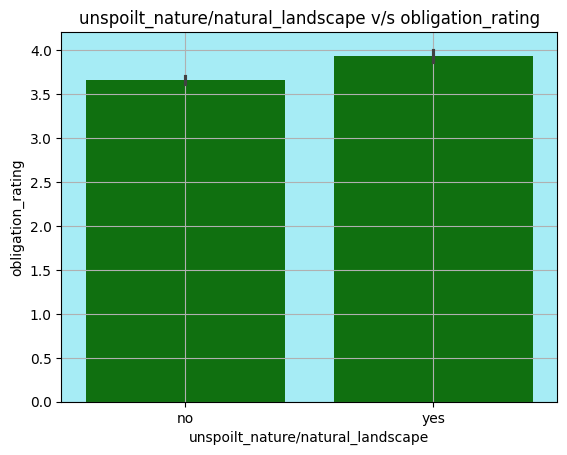

In [341]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating')
plt.grid()
plt.show()


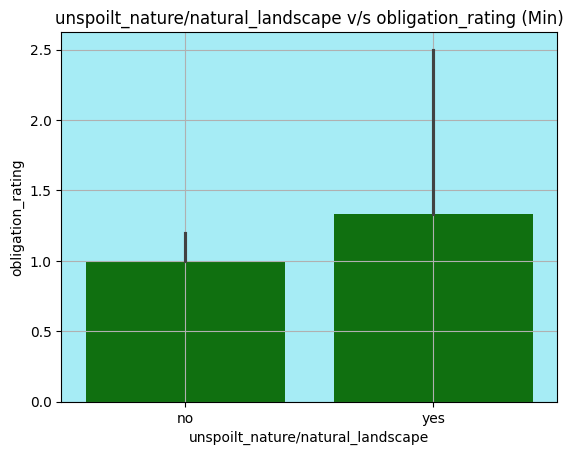

In [342]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating (Min)')
plt.grid()
plt.show()


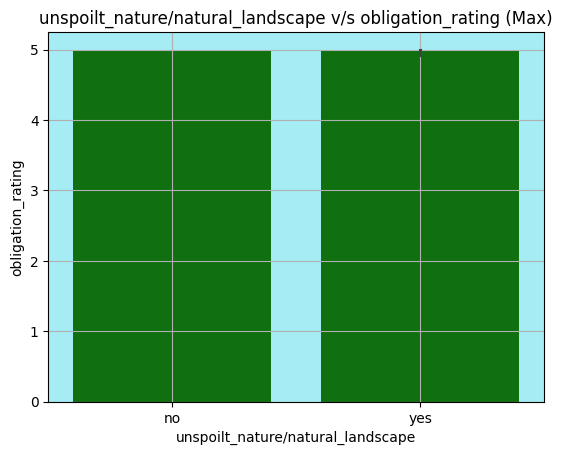

In [343]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - unspoilt_nature/natural_landscape v/s obligation_rating is quite balanced.
 - Minimum obligation_rating for `no` is 1.
 - Maximum unspoilt_nature/natural_landscape v/s obligation_rating is balanced.

#### cultural_offers, obligation_rating

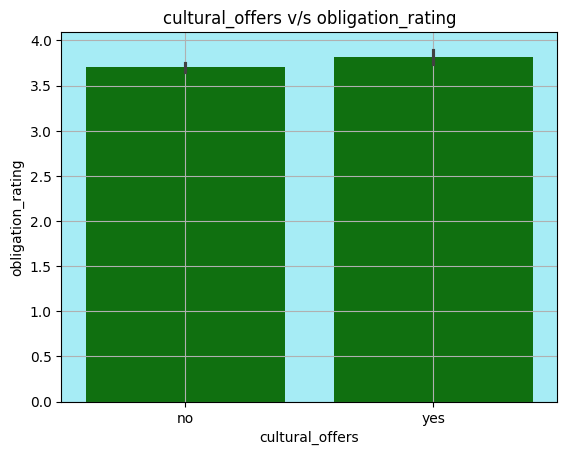

In [344]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating')
plt.grid()
plt.show()


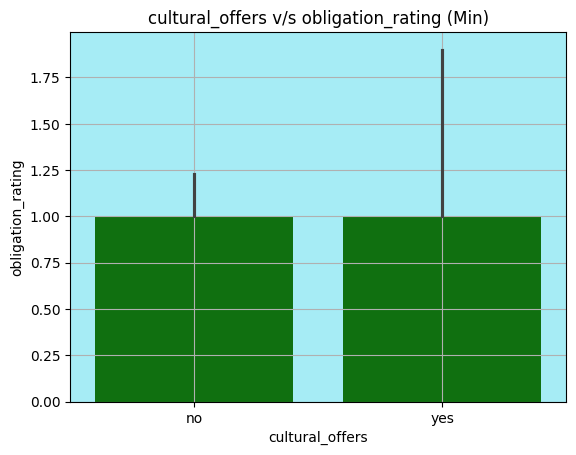

In [345]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating (Min)')
plt.grid()
plt.show()


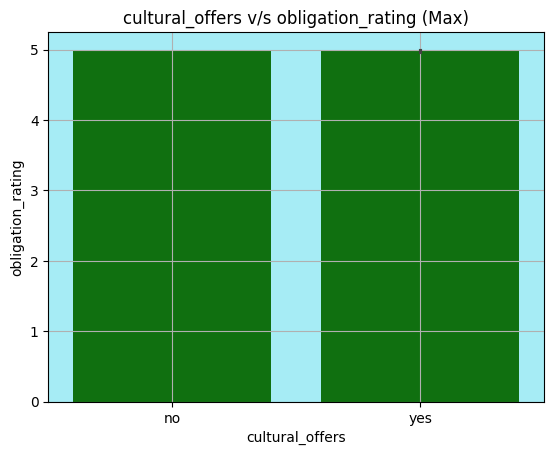

In [346]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - cultural_offers v/s obligation_rating is quite balanced.
 - Minimum cultural_offers v/s obligation_rating is balanced.
 - Maximum cultural_offers v/s obligation_rating is balanced.

#### change_of_surroundings, obligation_rating

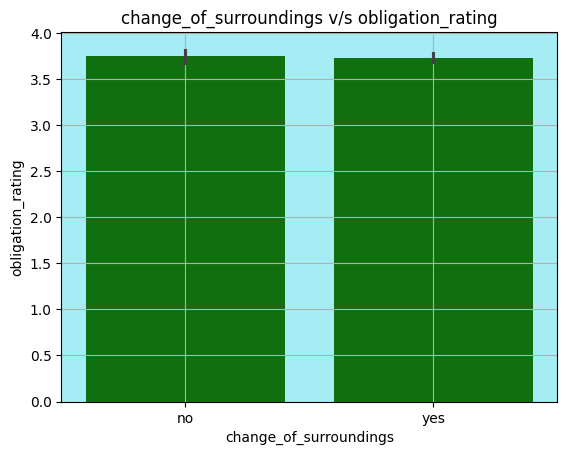

In [347]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating')
plt.grid()
plt.show()


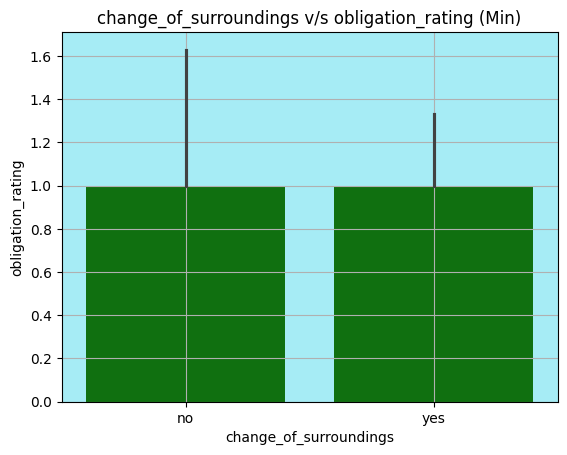

In [348]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating (Min)')
plt.grid()
plt.show()


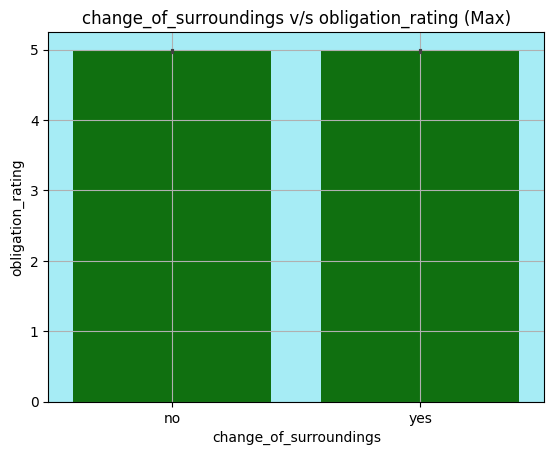

In [349]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - change_of_surroundings v/s obligation_rating is balanced.
 - Minimum change_of_surroundings v/s obligation_rating is balanced.
 - Maximum change_of_surroundings v/s obligation_rating is balanced.

## Multivariate Analysis

In [350]:
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

In [351]:
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Age, Gender, Occupation

In [352]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.Occupation,
           values=df_vacations_data.Age, aggfunc='mean')

Occupation  Clerical or service worker  home-duties  labourer  \
Gender                                                          
Female                       43.723684    44.763889      49.6   
Male                         41.086957    48.333333      32.5   

Occupation  manager or administrator  professional    retired      sales  \
Gender                                                                     
Female                     41.956522     42.225806  62.179487  41.800000   
Male                       42.459459     42.237500  63.333333  35.709677   

Occupation  small business owner  tradesperson  transport worker  unemployed  
Gender                                                                        
Female                 44.000000         34.50         46.500000   31.368421  
Male                   52.454545         40.96         48.166667   30.187500

In [353]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.Occupation,
           values=df_vacations_data.Age, aggfunc='min')

Occupation  Clerical or service worker  home-duties  labourer  \
Gender                                                          
Female                              19           23        38   
Male                                20           44        22   

Occupation  manager or administrator  professional  retired  sales  \
Gender                                                               
Female                            20            22       37     19   
Male                              20            19       48     19   

Occupation  small business owner  tradesperson  transport worker  unemployed  
Gender                                                                        
Female                        26            25                29          18  
Male                          25            21                31          18

In [354]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.Occupation,
           values=df_vacations_data.Age, aggfunc='max')

Occupation  Clerical or service worker  home-duties  labourer  \
Gender                                                          
Female                              84           64        62   
Male                                65           53        41   

Occupation  manager or administrator  professional  retired  sales  \
Gender                                                               
Female                           105            72       75     74   
Male                              70            76       76     72   

Occupation  small business owner  tradesperson  transport worker  unemployed  
Gender                                                                        
Female                        62            44                64          62  
Male                          74            74                63          59

**INTERPRETATION**
 - When Occupation is Clerical or service worker and Gender is Female average Age is 43.38

 - When Occupation is Clerical or service worker and Gender is Male average Age is 41.087

 - When Occupation is home-duties and Gender is Female average Age is 44.487

 - When Occupation is home-duties and Gender is Male average Age is 48.333

 - When Occupation is labourer and Gender is Female average Age is 49.6

 - When Occupation is labourer and Gender is Male average Age is 32.5

 - When Occupation is manager or administrator and Gender is Female average Age is 42.417

 - When Occupation is manager or administrator and Gender is Male average Age is 42.58

 - When Occupation is professional and Gender is Female average Age is 42.284

 - When Occupation is professional and Gender is Male average Age is 42.402

 - When Occupation is retired and Gender is Female average Age is 62.093

 - When Occupation is retired and Gender is Male average Age is 63.24

 - When Occupation is sales and Gender is Female average Age is 41.812

 - When Occupation is sales and Gender is Male average Age is 35.71

 - When Occupation is small business owner and Gender is Female average Age is 44.0

 - When Occupation is small business owner and Gender is Male average Age is 52.455

 - When Occupation is tradesperson and Gender is Female average Age is 34.5

 - When Occupation is tradesperson and Gender is Male average Age is 40.96

 - When Occupation is transport worker and Gender is Female average Age is 46.5

 - When Occupation is transport worker and Gender is Male average Age is 48.167

 - When Occupation is unemployed and Gender is Female average Age is 32.238

 - When Occupation is unemployed and Gender is Male average Age is 29.778

 - When Occupation is Clerical or service worker and Gender is Female minimum Age is 19

 - When Occupation is Clerical or service worker and Gender is Male minimum Age is 20

 - When Occupation is home-duties and Gender is Female minimum Age is 23

 - When Occupation is home-duties and Gender is Male minimum Age is 44

 - When Occupation is labourer and Gender is Female minimum Age is 38

 - When Occupation is labourer and Gender is Male minimum Age is 22

 - When Occupation is manager or administrator and Gender is Female minimum Age is 20

 - When Occupation is manager or administrator and Gender is Male minimum Age is 20

 - When Occupation is professional and Gender is Female minimum Age is 22

 - When Occupation is professional and Gender is Male minimum Age is 19

 - When Occupation is retired and Gender is Female minimum Age is 37

 - When Occupation is retired and Gender is Male minimum Age is 48

 - When Occupation is sales and Gender is Female minimum Age is 19

 - When Occupation is sales and Gender is Male minimum Age is 19

 - When Occupation is small business owner and Gender is Female minimum Age is 26

 - When Occupation is small business owner and Gender is Male minimum Age is 25

 - When Occupation is tradesperson and Gender is Female minimum Age is 25

 - When Occupation is tradesperson and Gender is Male minimum Age is 21

 - When Occupation is transport worker and Gender is Female minimum Age is 29

 - When Occupation is transport worker and Gender is Male minimum Age is 31

 - When Occupation is unemployed and Gender is Female minimum Age is 18

 - When Occupation is unemployed and Gender is Male minimum Age is 18

 - When Occupation is Clerical or service worker and Gender is Female maximum Age is 84

 - When Occupation is Clerical or service worker and Gender is Male maximum Age is 65

 - When Occupation is home-duties and Gender is Female maximum Age is 64

 - When Occupation is home-duties and Gender is Male maximum Age is 53

 - When Occupation is labourer and Gender is Female maximum Age is 62

 - When Occupation is labourer and Gender is Male maximum Age is 41

 - When Occupation is manager or administrator and Gender is Female maximum Age is 105

 - When Occupation is manager or administrator and Gender is Male maximum Age is 70

 - When Occupation is professional and Gender is Female maximum Age is 72

 - When Occupation is professional and Gender is Male maximum Age is 76

 - When Occupation is retired and Gender is Female maximum Age is 75

 - When Occupation is retired and Gender is Male maximum Age is 76

 - When Occupation is sales and Gender is Female maximum Age is 74

 - When Occupation is sales and Gender is Male maximum Age is 72

 - When Occupation is small business owner and Gender is Female maximum Age is 62

 - When Occupation is small business owner and Gender is Male maximum Age is 74

 - When Occupation is tradesperson and Gender is Female maximum Age is 44

 - When Occupation is tradesperson and Gender is Male maximum Age is 74

 - When Occupation is transport worker and Gender is Female maximum Age is 64

 - When Occupation is transport worker and Gender is Male maximum Age is 63

 - When Occupation is unemployed and Gender is Female maximum Age is 62

 - When Occupation is unemployed and Gender is Male maximum Age is 59



##### Age, Gender, State

In [355]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='mean')

State         ACT        NSW     NT        QLD         SA        Tas  \
Gender                                                                 
Female  47.100000  45.234483  40.50  44.114943  48.433333  31.000000   
Male    38.727273  43.633987  42.75  43.424242  43.878788  44.545455   

State         VIC         WA  
Gender                        
Female  42.774775  42.818182  
Male    45.350746  45.432432

In [356]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='min')

State   ACT  NSW  NT  QLD  SA  Tas  VIC  WA
Gender                                     
Female   28   18  25   19  26   31   19  19
Male     21   19  31   19  19   24   18  19

In [357]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='max')

State   ACT  NSW  NT  QLD  SA  Tas  VIC  WA
Gender                                     
Female   74  105  56   69  75   31   84  72
Male     72   76  59   70  74   71   76  73

**INTERPRETATION**
 - When State is ACT and Gender is Female average Age is 43.583

 - When State is ACT and Gender is Male average Age is 38.727

 - When State is NSW and Gender is Female average Age is 45.335

 - When State is NSW and Gender is Male average Age is 43.165

 - When State is NT and Gender is Female average Age is 40.5

 - When State is NT and Gender is Male average Age is 42.75

 - When State is QLD and Gender is Female average Age is 44.443

 - When State is QLD and Gender is Male average Age is 43.83

 - When State is SA and Gender is Female average Age is 48.0

 - When State is SA and Gender is Male average Age is 45.639

 - When State is Tas and Gender is Female average Age is 28.5

 - When State is Tas and Gender is Male average Age is 47.357

 - When State is VIC and Gender is Female average Age is 42.458

 - When State is VIC and Gender is Male average Age is 45.029

 - When State is WA and Gender is Female average Age is 42.776

 - When State is WA and Gender is Male average Age is 45.462

 - When State is ACT and Gender is Female minimum Age is 23

 - When State is ACT and Gender is Male minimum Age is 21

 - When State is NSW and Gender is Female minimum Age is 18

 - When State is NSW and Gender is Male minimum Age is 18

 - When State is NT and Gender is Female minimum Age is 25

 - When State is NT and Gender is Male minimum Age is 31

 - When State is QLD and Gender is Female minimum Age is 19

 - When State is QLD and Gender is Male minimum Age is 18

 - When State is SA and Gender is Female minimum Age is 26

 - When State is SA and Gender is Male minimum Age is 19

 - When State is Tas and Gender is Female minimum Age is 26

 - When State is Tas and Gender is Male minimum Age is 24

 - When State is VIC and Gender is Female minimum Age is 19

 - When State is VIC and Gender is Male minimum Age is 18

 - When State is WA and Gender is Female minimum Age is 19

 - When State is WA and Gender is Male minimum Age is 19

 - When State is ACT and Gender is Female maximum Age is 74

 - When State is ACT and Gender is Male maximum Age is 72

 - When State is NSW and Gender is Female maximum Age is 105

 - When State is NSW and Gender is Male maximum Age is 76

 - When State is NT and Gender is Female maximum Age is 56

 - When State is NT and Gender is Male maximum Age is 59

 - When State is QLD and Gender is Female maximum Age is 69

 - When State is QLD and Gender is Male maximum Age is 72

 - When State is SA and Gender is Female maximum Age is 75

 - When State is SA and Gender is Male maximum Age is 74

 - When State is Tas and Gender is Female maximum Age is 31

 - When State is Tas and Gender is Male maximum Age is 76

 - When State is VIC and Gender is Female maximum Age is 84

 - When State is VIC and Gender is Male maximum Age is 76

 - When State is WA and Gender is Female maximum Age is 72

 - When State is WA and Gender is Male maximum Age is 73



##### Age, Gender, relationship_status

In [358]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='mean')

relationship_status  living with a partner    married  separated or divorced  \
Gender                                                                         
Female                           37.746032  46.627193              52.811321   
Male                             41.471429  49.118577              51.571429   

relationship_status     single    widowed  
Gender                                     
Female               34.753247  64.555556  
Male                 31.280702  68.666667

In [359]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='min')

relationship_status  living with a partner  married  separated or divorced  \
Gender                                                                       
Female                                  19       23                     26   
Male                                    21       25                     31   

relationship_status  single  widowed  
Gender                                
Female                   18       55  
Male                     18       64

In [360]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='max')

relationship_status  living with a partner  married  separated or divorced  \
Gender                                                                       
Female                                  70       84                    105   
Male                                    71       76                     69   

relationship_status  single  widowed  
Gender                                
Female                   62       75  
Male                     61       72

**INTERPRETATION**
 - When relationship_status is living with a partner and Gender is Female average Age is 36.943

 - When relationship_status is living with a partner and Gender is Male average Age is 41.581

 - When relationship_status is married and Gender is Female average Age is 46.623

 - When relationship_status is married and Gender is Male average Age is 49.626

 - When relationship_status is separated or divorced and Gender is Female average Age is 53.234

 - When relationship_status is separated or divorced and Gender is Male average Age is 51.273

 - When relationship_status is single and Gender is Female average Age is 34.261

 - When relationship_status is single and Gender is Male average Age is 30.675

 - When relationship_status is widowed and Gender is Female average Age is 61.25

 - When relationship_status is widowed and Gender is Male average Age is 66.25

 - When relationship_status is living with a partner and Gender is Female minimum Age is 19

 - When relationship_status is living with a partner and Gender is Male minimum Age is 19

 - When relationship_status is married and Gender is Female minimum Age is 23

 - When relationship_status is married and Gender is Male minimum Age is 25

 - When relationship_status is separated or divorced and Gender is Female minimum Age is 26

 - When relationship_status is separated or divorced and Gender is Male minimum Age is 31

 - When relationship_status is single and Gender is Female minimum Age is 18

 - When relationship_status is single and Gender is Male minimum Age is 18

 - When relationship_status is widowed and Gender is Female minimum Age is 38

 - When relationship_status is widowed and Gender is Male minimum Age is 59

 - When relationship_status is living with a partner and Gender is Female maximum Age is 70

 - When relationship_status is living with a partner and Gender is Male maximum Age is 71

 - When relationship_status is married and Gender is Female maximum Age is 84

 - When relationship_status is married and Gender is Male maximum Age is 76

 - When relationship_status is separated or divorced and Gender is Female maximum Age is 105

 - When relationship_status is separated or divorced and Gender is Male maximum Age is 69

 - When relationship_status is single and Gender is Female maximum Age is 62

 - When relationship_status is single and Gender is Male maximum Age is 61

 - When relationship_status is widowed and Gender is Female maximum Age is 75

 - When relationship_status is widowed and Gender is Male maximum Age is 72



##### Age, Gender, rest_and_relax

In [361]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='mean')

rest_and_relax         no        yes
Gender                              
Female          47.166667  44.078680
Male            43.921569  44.148492

In [362]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='min')

rest_and_relax  no  yes
Gender                 
Female          23   18
Male            18   19

In [363]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='max')

rest_and_relax  no  yes
Gender                 
Female          67  105
Male            75   76

**INTERPRETATION**
 - When rest_and_relax is no and Gender is Female average Age is 47.977

 - When rest_and_relax is no and Gender is Male average Age is 45.158

 - When rest_and_relax is yes and Gender is Female average Age is 43.788

 - When rest_and_relax is yes and Gender is Male average Age is 44.046

 - When rest_and_relax is no and Gender is Female minimum Age is 23

 - When rest_and_relax is no and Gender is Male minimum Age is 18

 - When rest_and_relax is yes and Gender is Female minimum Age is 18

 - When rest_and_relax is yes and Gender is Male minimum Age is 18

 - When rest_and_relax is no and Gender is Female maximum Age is 67

 - When rest_and_relax is no and Gender is Male maximum Age is 76

 - When rest_and_relax is yes and Gender is Female maximum Age is 105

 - When rest_and_relax is yes and Gender is Male maximum Age is 76



##### Age, Gender, do_sports

In [364]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='mean')

do_sports         no        yes
Gender                         
Female     44.802532  39.085714
Male       45.845758  36.924731

In [365]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='min')

do_sports  no  yes
Gender            
Female     18   19
Male       19   18

In [366]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='max')

do_sports   no  yes
Gender             
Female     105   68
Male        76   70

**INTERPRETATION**
 - When do_sports is no and Gender is Female average Age is 44.606

 - When do_sports is no and Gender is Male average Age is 45.93

 - When do_sports is yes and Gender is Female average Age is 39.103

 - When do_sports is yes and Gender is Male average Age is 36.542

 - When do_sports is no and Gender is Female minimum Age is 18

 - When do_sports is no and Gender is Male minimum Age is 18

 - When do_sports is yes and Gender is Female minimum Age is 19

 - When do_sports is yes and Gender is Male minimum Age is 18

 - When do_sports is no and Gender is Female maximum Age is 105

 - When do_sports is no and Gender is Male maximum Age is 76

 - When do_sports is yes and Gender is Female maximum Age is 68

 - When do_sports is yes and Gender is Male maximum Age is 70



##### Age, Gender, fun_and_entertainment

In [367]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment         no        yes
Gender                                     
Female                 49.633663  39.644737
Male                   48.654545  40.320611

In [368]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment  no  yes
Gender                        
Female                 20   18
Male                   18   19

In [369]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment  no  yes
Gender                        
Female                 75  105
Male                   76   76

**INTERPRETATION**
 - When fun_and_entertainment is no and Gender is Female average Age is 49.125

 - When fun_and_entertainment is no and Gender is Male average Age is 48.605

 - When fun_and_entertainment is yes and Gender is Female average Age is 39.672

 - When fun_and_entertainment is yes and Gender is Male average Age is 40.318

 - When fun_and_entertainment is no and Gender is Female minimum Age is 20

 - When fun_and_entertainment is no and Gender is Male minimum Age is 18

 - When fun_and_entertainment is yes and Gender is Female minimum Age is 18

 - When fun_and_entertainment is yes and Gender is Male minimum Age is 18

 - When fun_and_entertainment is no and Gender is Female maximum Age is 75

 - When fun_and_entertainment is no and Gender is Male maximum Age is 76

 - When fun_and_entertainment is yes and Gender is Female maximum Age is 105

 - When fun_and_entertainment is yes and Gender is Male maximum Age is 76



##### Age, Gender, good_company

In [370]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company         no        yes
Gender                            
Female        43.868778  44.832536
Male          44.354962  43.850000

In [371]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company  no  yes
Gender               
Female        19   18
Male          18   19

In [372]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company   no  yes
Gender                
Female        105   75
Male           76   76

**INTERPRETATION**
 - When good_company is no and Gender is Female average Age is 43.587

 - When good_company is no and Gender is Male average Age is 44.669

 - When good_company is yes and Gender is Female average Age is 44.821

 - When good_company is yes and Gender is Male average Age is 43.548

 - When good_company is no and Gender is Female minimum Age is 19

 - When good_company is no and Gender is Male minimum Age is 18

 - When good_company is yes and Gender is Female minimum Age is 18

 - When good_company is yes and Gender is Male minimum Age is 18

 - When good_company is no and Gender is Female maximum Age is 105

 - When good_company is no and Gender is Male maximum Age is 76

 - When good_company is yes and Gender is Female maximum Age is 75

 - When good_company is yes and Gender is Male maximum Age is 76



##### Age, Gender, health_and_beauty

In [373]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty         no        yes
Gender                                 
Female             44.604457  42.985915
Male               44.137615  44.000000

In [374]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty  no  yes
Gender                    
Female             18   19
Male               18   19

In [375]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty   no  yes
Gender                     
Female             105   68
Male                76   70

**INTERPRETATION**
 - When health_and_beauty is no and Gender is Female average Age is 44.417

 - When health_and_beauty is no and Gender is Male average Age is 44.151

 - When health_and_beauty is yes and Gender is Female average Age is 42.803

 - When health_and_beauty is yes and Gender is Male average Age is 44.347

 - When health_and_beauty is no and Gender is Female minimum Age is 18

 - When health_and_beauty is no and Gender is Male minimum Age is 18

 - When health_and_beauty is yes and Gender is Female minimum Age is 19

 - When health_and_beauty is yes and Gender is Male minimum Age is 18

 - When health_and_beauty is no and Gender is Female maximum Age is 105

 - When health_and_beauty is no and Gender is Male maximum Age is 76

 - When health_and_beauty is yes and Gender is Female maximum Age is 68

 - When health_and_beauty is yes and Gender is Male maximum Age is 72



##### Age, Gender, entertainment_facilities

In [376]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
Gender                                        
Female                    44.908078  41.450704
Male                      45.026455  40.846154

In [377]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
Gender                           
Female                    19   18
Male                      18   19

In [378]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
Gender                            
Female                    105   84
Male                       76   76

**INTERPRETATION**
 - When entertainment_facilities is no and Gender is Female average Age is 44.845

 - When entertainment_facilities is no and Gender is Male average Age is 45.064

 - When entertainment_facilities is yes and Gender is Female average Age is 40.753

 - When entertainment_facilities is yes and Gender is Male average Age is 40.824

 - When entertainment_facilities is no and Gender is Female minimum Age is 19

 - When entertainment_facilities is no and Gender is Male minimum Age is 18

 - When entertainment_facilities is yes and Gender is Female minimum Age is 18

 - When entertainment_facilities is yes and Gender is Male minimum Age is 19

 - When entertainment_facilities is no and Gender is Female maximum Age is 105

 - When entertainment_facilities is no and Gender is Male maximum Age is 76

 - When entertainment_facilities is yes and Gender is Female maximum Age is 84

 - When entertainment_facilities is yes and Gender is Male maximum Age is 76



##### Age, Gender, not_care_about_prices

In [379]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
Gender                                     
Female                 44.789474  41.971014
Male                   44.651832  42.110000

In [380]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
Gender                        
Female                 18   19
Male                   18   19

In [381]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
Gender                         
Female                 105   84
Male                    76   75

**INTERPRETATION**
 - When not_care_about_prices is no and Gender is Female average Age is 44.452

 - When not_care_about_prices is no and Gender is Male average Age is 44.854

 - When not_care_about_prices is yes and Gender is Female average Age is 42.568

 - When not_care_about_prices is yes and Gender is Male average Age is 41.579

 - When not_care_about_prices is no and Gender is Female minimum Age is 18

 - When not_care_about_prices is no and Gender is Male minimum Age is 18

 - When not_care_about_prices is yes and Gender is Female minimum Age is 19

 - When not_care_about_prices is yes and Gender is Male minimum Age is 19

 - When not_care_about_prices is no and Gender is Female maximum Age is 105

 - When not_care_about_prices is no and Gender is Male maximum Age is 76

 - When not_care_about_prices is yes and Gender is Female maximum Age is 84

 - When not_care_about_prices is yes and Gender is Male maximum Age is 75



##### Age, Gender, intense_experience_of_nature

In [382]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
Gender                                            
Female                        44.246914  44.613208
Male                          43.593350  46.406593

In [383]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
Gender                               
Female                        19   18
Male                          18   19

In [384]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
Gender                                
Female                        105   75
Male                           76   74

**INTERPRETATION**
 - When intense_experience_of_nature is no and Gender is Female average Age is 43.956

 - When intense_experience_of_nature is no and Gender is Male average Age is 43.651

 - When intense_experience_of_nature is yes and Gender is Female average Age is 44.802

 - When intense_experience_of_nature is yes and Gender is Male average Age is 46.479

 - When intense_experience_of_nature is no and Gender is Female minimum Age is 19

 - When intense_experience_of_nature is no and Gender is Male minimum Age is 18

 - When intense_experience_of_nature is yes and Gender is Female minimum Age is 18

 - When intense_experience_of_nature is yes and Gender is Male minimum Age is 18

 - When intense_experience_of_nature is no and Gender is Female maximum Age is 105

 - When intense_experience_of_nature is no and Gender is Male maximum Age is 76

 - When intense_experience_of_nature is yes and Gender is Female maximum Age is 75

 - When intense_experience_of_nature is yes and Gender is Male maximum Age is 74



##### Age, Gender, cultural_offers

In [385]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers         no        yes
Gender                               
Female           44.983819  42.685950
Male             43.653179  45.323529

In [386]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers  no  yes
Gender                  
Female           18   19
Male             18   19

In [387]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Gender, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers   no  yes
Gender                   
Female           105   74
Male              76   76

**INTERPRETATION**
 - When cultural_offers is no and Gender is Female average Age is 44.951

 - When cultural_offers is no and Gender is Male average Age is 43.708

 - When cultural_offers is yes and Gender is Female average Age is 42.174

 - When cultural_offers is yes and Gender is Male average Age is 45.338

 - When cultural_offers is no and Gender is Female minimum Age is 18

 - When cultural_offers is no and Gender is Male minimum Age is 18

 - When cultural_offers is yes and Gender is Female minimum Age is 19

 - When cultural_offers is yes and Gender is Male minimum Age is 18

 - When cultural_offers is no and Gender is Female maximum Age is 105

 - When cultural_offers is no and Gender is Male maximum Age is 76

 - When cultural_offers is yes and Gender is Female maximum Age is 74

 - When cultural_offers is yes and Gender is Male maximum Age is 76



##### Age, Occupation, State

In [388]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='mean')

State                             ACT        NSW    NT        QLD         SA  \
Occupation                                                                     
Clerical or service worker  36.500000  44.909091   NaN  43.000000  43.500000   
home-duties                       NaN  43.333333   NaN  43.625000  46.600000   
labourer                          NaN  45.333333   NaN  32.666667  36.000000   
manager or administrator    43.285714  43.549296  35.5  39.812500  46.181818   
professional                30.333333  42.477273  57.5  43.568182  46.800000   
retired                     66.500000  62.181818   NaN  61.210526  59.000000   
sales                       66.500000  36.533333   NaN  38.400000  36.200000   
small business owner        52.000000  48.727273  35.0  46.266667  60.000000   
tradesperson                21.000000  46.000000   NaN  35.000000  47.500000   
transport worker                  NaN  49.250000  31.0  48.181818  52.000000   
unemployed                        NaN  29.454545   NaN  30.142857  38.000000   

State                             Tas        VIC         WA  
Occupation                                                   
Clerical or service worker        NaN  41.406250  44.500000  
home-duties                 31.000000  46.611111  47.111111  
labourer                    33.500000  33.750000  61.000000  
manager or administrator    38.666667  41.857143  40.500000  
professional                43.500000  41.367647  40.392857  
retired                     65.333333  64.448276  63.666667  
sales                             NaN  36.666667  47.000000  
small business owner              NaN  51.444444  52.428571  
tradesperson                24.000000  42.000000  39.000000  
transport worker                  NaN  50.000000        NaN  
unemployed                        NaN  32.125000  28.833333

In [389]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='min')

State                        ACT   NSW    NT   QLD    SA   Tas   VIC    WA
Occupation                                                                
Clerical or service worker  22.0  21.0   NaN  20.0  31.0   NaN  19.0  22.0
home-duties                  NaN  23.0   NaN  29.0  26.0  31.0  24.0  30.0
labourer                     NaN  25.0   NaN  22.0  33.0  28.0  28.0  61.0
manager or administrator    31.0  20.0  25.0  20.0  29.0  27.0  22.0  27.0
professional                22.0  19.0  56.0  22.0  22.0  35.0  21.0  23.0
retired                     61.0  55.0   NaN  48.0  37.0  58.0  56.0  59.0
sales                       61.0  21.0   NaN  19.0  20.0   NaN  19.0  28.0
small business owner        52.0  31.0  35.0  27.0  60.0   NaN  25.0  26.0
tradesperson                21.0  35.0   NaN  24.0  21.0  24.0  25.0  39.0
transport worker             NaN  29.0  31.0  31.0  52.0   NaN  31.0   NaN
unemployed                   NaN  18.0   NaN  19.0  19.0   NaN  18.0  19.0

In [390]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.State,
           values=df_vacations_data.Age, aggfunc='max')

State                        ACT    NSW    NT   QLD    SA   Tas   VIC    WA
Occupation                                                                 
Clerical or service worker  51.0   62.0   NaN  65.0  62.0   NaN  84.0  56.0
home-duties                  NaN   64.0   NaN  63.0  60.0  31.0  64.0  63.0
labourer                     NaN   62.0   NaN  41.0  38.0  39.0  39.0  61.0
manager or administrator    74.0  105.0  46.0  64.0  68.0  56.0  70.0  62.0
professional                40.0   76.0  59.0  64.0  65.0  52.0  70.0  72.0
retired                     72.0   73.0   NaN  70.0  75.0  71.0  76.0  73.0
sales                       72.0   74.0   NaN  63.0  53.0   NaN  71.0  62.0
small business owner        52.0   69.0  35.0  62.0  60.0   NaN  74.0  62.0
tradesperson                21.0   62.0   NaN  41.0  74.0  24.0  62.0  39.0
transport worker             NaN   60.0  31.0  63.0  52.0   NaN  64.0   NaN
unemployed                   NaN   59.0   NaN  56.0  62.0   NaN  59.0  36.0

**INTERPRETATION**
 - When State is ACT and Occupation is Clerical or service worker average Age is 36.5

 - When State is ACT and Occupation is home-duties average Age is nan

 - When State is ACT and Occupation is labourer average Age is nan

 - When State is ACT and Occupation is manager or administrator average Age is 43.286

 - When State is ACT and Occupation is professional average Age is 30.333

 - When State is ACT and Occupation is retired average Age is 66.5

 - When State is ACT and Occupation is sales average Age is 66.5

 - When State is ACT and Occupation is small business owner average Age is 52.0

 - When State is ACT and Occupation is tradesperson average Age is 21.0

 - When State is ACT and Occupation is transport worker average Age is nan

 - When State is ACT and Occupation is unemployed average Age is nan

 - When State is NSW and Occupation is Clerical or service worker average Age is 44.618

 - When State is NSW and Occupation is home-duties average Age is 44.045

 - When State is NSW and Occupation is labourer average Age is 45.333

 - When State is NSW and Occupation is manager or administrator average Age is 43.542

 - When State is NSW and Occupation is professional average Age is 42.593

 - When State is NSW and Occupation is retired average Age is 62.13

 - When State is NSW and Occupation is sales average Age is 36.533

 - When State is NSW and Occupation is small business owner average Age is 48.727

 - When State is NSW and Occupation is tradesperson average Age is 46.0

 - When State is NSW and Occupation is transport worker average Age is 49.25

 - When State is NSW and Occupation is unemployed average Age is 29.455

 - When State is NT and Occupation is Clerical or service worker average Age is nan

 - When State is NT and Occupation is home-duties average Age is nan

 - When State is NT and Occupation is labourer average Age is nan

 - When State is NT and Occupation is manager or administrator average Age is 35.5

 - When State is NT and Occupation is professional average Age is 57.5

 - When State is NT and Occupation is retired average Age is nan

 - When State is NT and Occupation is sales average Age is nan

 - When State is NT and Occupation is small business owner average Age is 35.0

 - When State is NT and Occupation is tradesperson average Age is nan

 - When State is NT and Occupation is transport worker average Age is 31.0

 - When State is NT and Occupation is unemployed average Age is nan

 - When State is QLD and Occupation is Clerical or service worker average Age is 43.0

 - When State is QLD and Occupation is home-duties average Age is 43.235

 - When State is QLD and Occupation is labourer average Age is 32.667

 - When State is QLD and Occupation is manager or administrator average Age is 40.273

 - When State is QLD and Occupation is professional average Age is 43.568

 - When State is QLD and Occupation is retired average Age is 61.19

 - When State is QLD and Occupation is sales average Age is 38.4

 - When State is QLD and Occupation is small business owner average Age is 46.267

 - When State is QLD and Occupation is tradesperson average Age is 35.0

 - When State is QLD and Occupation is transport worker average Age is 48.182

 - When State is QLD and Occupation is unemployed average Age is 30.143

 - When State is SA and Occupation is Clerical or service worker average Age is 43.5

 - When State is SA and Occupation is home-duties average Age is 46.6

 - When State is SA and Occupation is labourer average Age is 36.0

 - When State is SA and Occupation is manager or administrator average Age is 47.0

 - When State is SA and Occupation is professional average Age is 46.8

 - When State is SA and Occupation is retired average Age is 60.143

 - When State is SA and Occupation is sales average Age is 36.0

 - When State is SA and Occupation is small business owner average Age is 60.0

 - When State is SA and Occupation is tradesperson average Age is 47.5

 - When State is SA and Occupation is transport worker average Age is 52.0

 - When State is SA and Occupation is unemployed average Age is 38.0

 - When State is Tas and Occupation is Clerical or service worker average Age is nan

 - When State is Tas and Occupation is home-duties average Age is 28.5

 - When State is Tas and Occupation is labourer average Age is 33.5

 - When State is Tas and Occupation is manager or administrator average Age is 38.667

 - When State is Tas and Occupation is professional average Age is 54.333

 - When State is Tas and Occupation is retired average Age is 65.333

 - When State is Tas and Occupation is sales average Age is nan

 - When State is Tas and Occupation is small business owner average Age is nan

 - When State is Tas and Occupation is tradesperson average Age is 24.0

 - When State is Tas and Occupation is transport worker average Age is nan

 - When State is Tas and Occupation is unemployed average Age is nan

 - When State is VIC and Occupation is Clerical or service worker average Age is 40.939

 - When State is VIC and Occupation is home-duties average Age is 46.053

 - When State is VIC and Occupation is labourer average Age is 33.75

 - When State is VIC and Occupation is manager or administrator average Age is 42.302

 - When State is VIC and Occupation is professional average Age is 41.304

 - When State is VIC and Occupation is retired average Age is 64.367

 - When State is VIC and Occupation is sales average Age is 36.667

 - When State is VIC and Occupation is small business owner average Age is 51.444

 - When State is VIC and Occupation is tradesperson average Age is 42.0

 - When State is VIC and Occupation is transport worker average Age is 50.0

 - When State is VIC and Occupation is unemployed average Age is 32.583

 - When State is WA and Occupation is Clerical or service worker average Age is 44.5

 - When State is WA and Occupation is home-duties average Age is 47.111

 - When State is WA and Occupation is labourer average Age is 61.0

 - When State is WA and Occupation is manager or administrator average Age is 40.5

 - When State is WA and Occupation is professional average Age is 40.207

 - When State is WA and Occupation is retired average Age is 62.429

 - When State is WA and Occupation is sales average Age is 47.333

 - When State is WA and Occupation is small business owner average Age is 52.429

 - When State is WA and Occupation is tradesperson average Age is 39.0

 - When State is WA and Occupation is transport worker average Age is nan

 - When State is WA and Occupation is unemployed average Age is 28.833

 - When State is ACT and Occupation is Clerical or service worker minimum Age is 22.0

 - When State is ACT and Occupation is home-duties minimum Age is nan

 - When State is ACT and Occupation is labourer minimum Age is nan

 - When State is ACT and Occupation is manager or administrator minimum Age is 31.0

 - When State is ACT and Occupation is professional minimum Age is 22.0

 - When State is ACT and Occupation is retired minimum Age is 61.0

 - When State is ACT and Occupation is sales minimum Age is 61.0

 - When State is ACT and Occupation is small business owner minimum Age is 52.0

 - When State is ACT and Occupation is tradesperson minimum Age is 21.0

 - When State is ACT and Occupation is transport worker minimum Age is nan

 - When State is ACT and Occupation is unemployed minimum Age is nan

 - When State is NSW and Occupation is Clerical or service worker minimum Age is 21.0

 - When State is NSW and Occupation is home-duties minimum Age is 23.0

 - When State is NSW and Occupation is labourer minimum Age is 25.0

 - When State is NSW and Occupation is manager or administrator minimum Age is 20.0

 - When State is NSW and Occupation is professional minimum Age is 19.0

 - When State is NSW and Occupation is retired minimum Age is 55.0

 - When State is NSW and Occupation is sales minimum Age is 21.0

 - When State is NSW and Occupation is small business owner minimum Age is 31.0

 - When State is NSW and Occupation is tradesperson minimum Age is 35.0

 - When State is NSW and Occupation is transport worker minimum Age is 29.0

 - When State is NSW and Occupation is unemployed minimum Age is 18.0

 - When State is NT and Occupation is Clerical or service worker minimum Age is nan

 - When State is NT and Occupation is home-duties minimum Age is nan

 - When State is NT and Occupation is labourer minimum Age is nan

 - When State is NT and Occupation is manager or administrator minimum Age is 25.0

 - When State is NT and Occupation is professional minimum Age is 56.0

 - When State is NT and Occupation is retired minimum Age is nan

 - When State is NT and Occupation is sales minimum Age is nan

 - When State is NT and Occupation is small business owner minimum Age is 35.0

 - When State is NT and Occupation is tradesperson minimum Age is nan

 - When State is NT and Occupation is transport worker minimum Age is 31.0

 - When State is NT and Occupation is unemployed minimum Age is nan

 - When State is QLD and Occupation is Clerical or service worker minimum Age is 20.0

 - When State is QLD and Occupation is home-duties minimum Age is 29.0

 - When State is QLD and Occupation is labourer minimum Age is 22.0

 - When State is QLD and Occupation is manager or administrator minimum Age is 20.0

 - When State is QLD and Occupation is professional minimum Age is 22.0

 - When State is QLD and Occupation is retired minimum Age is 48.0

 - When State is QLD and Occupation is sales minimum Age is 19.0

 - When State is QLD and Occupation is small business owner minimum Age is 27.0

 - When State is QLD and Occupation is tradesperson minimum Age is 24.0

 - When State is QLD and Occupation is transport worker minimum Age is 31.0

 - When State is QLD and Occupation is unemployed minimum Age is 19.0

 - When State is SA and Occupation is Clerical or service worker minimum Age is 31.0

 - When State is SA and Occupation is home-duties minimum Age is 26.0

 - When State is SA and Occupation is labourer minimum Age is 33.0

 - When State is SA and Occupation is manager or administrator minimum Age is 29.0

 - When State is SA and Occupation is professional minimum Age is 22.0

 - When State is SA and Occupation is retired minimum Age is 37.0

 - When State is SA and Occupation is sales minimum Age is 20.0

 - When State is SA and Occupation is small business owner minimum Age is 60.0

 - When State is SA and Occupation is tradesperson minimum Age is 21.0

 - When State is SA and Occupation is transport worker minimum Age is 52.0

 - When State is SA and Occupation is unemployed minimum Age is 19.0

 - When State is Tas and Occupation is Clerical or service worker minimum Age is nan

 - When State is Tas and Occupation is home-duties minimum Age is 26.0

 - When State is Tas and Occupation is labourer minimum Age is 28.0

 - When State is Tas and Occupation is manager or administrator minimum Age is 27.0

 - When State is Tas and Occupation is professional minimum Age is 35.0

 - When State is Tas and Occupation is retired minimum Age is 58.0

 - When State is Tas and Occupation is sales minimum Age is nan

 - When State is Tas and Occupation is small business owner minimum Age is nan

 - When State is Tas and Occupation is tradesperson minimum Age is 24.0

 - When State is Tas and Occupation is transport worker minimum Age is nan

 - When State is Tas and Occupation is unemployed minimum Age is nan

 - When State is VIC and Occupation is Clerical or service worker minimum Age is 19.0

 - When State is VIC and Occupation is home-duties minimum Age is 24.0

 - When State is VIC and Occupation is labourer minimum Age is 28.0

 - When State is VIC and Occupation is manager or administrator minimum Age is 22.0

 - When State is VIC and Occupation is professional minimum Age is 21.0

 - When State is VIC and Occupation is retired minimum Age is 56.0

 - When State is VIC and Occupation is sales minimum Age is 19.0

 - When State is VIC and Occupation is small business owner minimum Age is 25.0

 - When State is VIC and Occupation is tradesperson minimum Age is 25.0

 - When State is VIC and Occupation is transport worker minimum Age is 31.0

 - When State is VIC and Occupation is unemployed minimum Age is 18.0

 - When State is WA and Occupation is Clerical or service worker minimum Age is 22.0

 - When State is WA and Occupation is home-duties minimum Age is 30.0

 - When State is WA and Occupation is labourer minimum Age is 61.0

 - When State is WA and Occupation is manager or administrator minimum Age is 27.0

 - When State is WA and Occupation is professional minimum Age is 23.0

 - When State is WA and Occupation is retired minimum Age is 55.0

 - When State is WA and Occupation is sales minimum Age is 28.0

 - When State is WA and Occupation is small business owner minimum Age is 26.0

 - When State is WA and Occupation is tradesperson minimum Age is 39.0

 - When State is WA and Occupation is transport worker minimum Age is nan

 - When State is WA and Occupation is unemployed minimum Age is 19.0

 - When State is ACT and Occupation is Clerical or service worker maximum Age is 51.0

 - When State is ACT and Occupation is home-duties maximum Age is nan

 - When State is ACT and Occupation is labourer maximum Age is nan

 - When State is ACT and Occupation is manager or administrator maximum Age is 74.0

 - When State is ACT and Occupation is professional maximum Age is 40.0

 - When State is ACT and Occupation is retired maximum Age is 72.0

 - When State is ACT and Occupation is sales maximum Age is 72.0

 - When State is ACT and Occupation is small business owner maximum Age is 52.0

 - When State is ACT and Occupation is tradesperson maximum Age is 21.0

 - When State is ACT and Occupation is transport worker maximum Age is nan

 - When State is ACT and Occupation is unemployed maximum Age is nan

 - When State is NSW and Occupation is Clerical or service worker maximum Age is 62.0

 - When State is NSW and Occupation is home-duties maximum Age is 64.0

 - When State is NSW and Occupation is labourer maximum Age is 62.0

 - When State is NSW and Occupation is manager or administrator maximum Age is 105.0

 - When State is NSW and Occupation is professional maximum Age is 76.0

 - When State is NSW and Occupation is retired maximum Age is 73.0

 - When State is NSW and Occupation is sales maximum Age is 74.0

 - When State is NSW and Occupation is small business owner maximum Age is 69.0

 - When State is NSW and Occupation is tradesperson maximum Age is 62.0

 - When State is NSW and Occupation is transport worker maximum Age is 60.0

 - When State is NSW and Occupation is unemployed maximum Age is 59.0

 - When State is NT and Occupation is Clerical or service worker maximum Age is nan

 - When State is NT and Occupation is home-duties maximum Age is nan

 - When State is NT and Occupation is labourer maximum Age is nan

 - When State is NT and Occupation is manager or administrator maximum Age is 46.0

 - When State is NT and Occupation is professional maximum Age is 59.0

 - When State is NT and Occupation is retired maximum Age is nan

 - When State is NT and Occupation is sales maximum Age is nan

 - When State is NT and Occupation is small business owner maximum Age is 35.0

 - When State is NT and Occupation is tradesperson maximum Age is nan

 - When State is NT and Occupation is transport worker maximum Age is 31.0

 - When State is NT and Occupation is unemployed maximum Age is nan

 - When State is QLD and Occupation is Clerical or service worker maximum Age is 65.0

 - When State is QLD and Occupation is home-duties maximum Age is 63.0

 - When State is QLD and Occupation is labourer maximum Age is 41.0

 - When State is QLD and Occupation is manager or administrator maximum Age is 64.0

 - When State is QLD and Occupation is professional maximum Age is 64.0

 - When State is QLD and Occupation is retired maximum Age is 70.0

 - When State is QLD and Occupation is sales maximum Age is 63.0

 - When State is QLD and Occupation is small business owner maximum Age is 62.0

 - When State is QLD and Occupation is tradesperson maximum Age is 41.0

 - When State is QLD and Occupation is transport worker maximum Age is 63.0

 - When State is QLD and Occupation is unemployed maximum Age is 56.0

 - When State is SA and Occupation is Clerical or service worker maximum Age is 62.0

 - When State is SA and Occupation is home-duties maximum Age is 60.0

 - When State is SA and Occupation is labourer maximum Age is 38.0

 - When State is SA and Occupation is manager or administrator maximum Age is 68.0

 - When State is SA and Occupation is professional maximum Age is 65.0

 - When State is SA and Occupation is retired maximum Age is 75.0

 - When State is SA and Occupation is sales maximum Age is 53.0

 - When State is SA and Occupation is small business owner maximum Age is 60.0

 - When State is SA and Occupation is tradesperson maximum Age is 74.0

 - When State is SA and Occupation is transport worker maximum Age is 52.0

 - When State is SA and Occupation is unemployed maximum Age is 62.0

 - When State is Tas and Occupation is Clerical or service worker maximum Age is nan

 - When State is Tas and Occupation is home-duties maximum Age is 31.0

 - When State is Tas and Occupation is labourer maximum Age is 39.0

 - When State is Tas and Occupation is manager or administrator maximum Age is 56.0

 - When State is Tas and Occupation is professional maximum Age is 76.0

 - When State is Tas and Occupation is retired maximum Age is 71.0

 - When State is Tas and Occupation is sales maximum Age is nan

 - When State is Tas and Occupation is small business owner maximum Age is nan

 - When State is Tas and Occupation is tradesperson maximum Age is 24.0

 - When State is Tas and Occupation is transport worker maximum Age is nan

 - When State is Tas and Occupation is unemployed maximum Age is nan

 - When State is VIC and Occupation is Clerical or service worker maximum Age is 84.0

 - When State is VIC and Occupation is home-duties maximum Age is 64.0

 - When State is VIC and Occupation is labourer maximum Age is 39.0

 - When State is VIC and Occupation is manager or administrator maximum Age is 70.0

 - When State is VIC and Occupation is professional maximum Age is 70.0

 - When State is VIC and Occupation is retired maximum Age is 76.0

 - When State is VIC and Occupation is sales maximum Age is 71.0

 - When State is VIC and Occupation is small business owner maximum Age is 74.0

 - When State is VIC and Occupation is tradesperson maximum Age is 62.0

 - When State is VIC and Occupation is transport worker maximum Age is 64.0

 - When State is VIC and Occupation is unemployed maximum Age is 59.0

 - When State is WA and Occupation is Clerical or service worker maximum Age is 56.0

 - When State is WA and Occupation is home-duties maximum Age is 63.0

 - When State is WA and Occupation is labourer maximum Age is 61.0

 - When State is WA and Occupation is manager or administrator maximum Age is 62.0

 - When State is WA and Occupation is professional maximum Age is 72.0

 - When State is WA and Occupation is retired maximum Age is 73.0

 - When State is WA and Occupation is sales maximum Age is 62.0

 - When State is WA and Occupation is small business owner maximum Age is 62.0

 - When State is WA and Occupation is tradesperson maximum Age is 39.0

 - When State is WA and Occupation is transport worker maximum Age is nan

 - When State is WA and Occupation is unemployed maximum Age is 36.0



##### Age, Occupation, relationship_status

In [391]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='mean')

relationship_status         living with a partner    married  \
Occupation                                                     
Clerical or service worker              36.571429  48.148148   
home-duties                             34.444444  45.763636   
labourer                                32.000000  37.500000   
manager or administrator                39.647059  45.035294   
professional                            40.604651  44.595041   
retired                                 59.111111  63.620690   
sales                                   32.000000  49.136364   
small business owner                    46.333333  50.500000   
tradesperson                            27.666667  45.733333   
transport worker                        31.000000  47.333333   
unemployed                              31.000000  35.888889   

relationship_status         separated or divorced     single    widowed  
Occupation                                                               
Clerical or service worker              46.666667  32.142857  61.000000  
home-duties                             48.500000  51.000000        NaN  
labourer                                55.000000  27.750000        NaN  
manager or administrator                54.470588  32.571429  69.000000  
professional                            48.920000  35.682540  72.000000  
retired                                 60.615385  60.250000  71.333333  
sales                                   50.142857  24.130435  60.666667  
small business owner                    54.166667  36.833333        NaN  
tradesperson                            49.500000  32.142857        NaN  
transport worker                        54.666667  44.333333  64.000000  
unemployed                              57.000000  20.800000  56.000000

In [392]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='min')

relationship_status         living with a partner  married  \
Occupation                                                   
Clerical or service worker                   21.0     28.0   
home-duties                                  23.0     24.0   
labourer                                     32.0     25.0   
manager or administrator                     25.0     25.0   
professional                                 22.0     23.0   
retired                                      37.0     55.0   
sales                                        23.0     31.0   
small business owner                         35.0     27.0   
tradesperson                                 21.0     31.0   
transport worker                             31.0     31.0   
unemployed                                   19.0     24.0   

relationship_status         separated or divorced  single  widowed  
Occupation                                                          
Clerical or service worker                   31.0    19.0     61.0  
home-duties                                  38.0    43.0      NaN  
labourer                                     49.0    22.0      NaN  
manager or administrator                     35.0    20.0     64.0  
professional                                 29.0    19.0     72.0  
retired                                      51.0    58.0     69.0  
sales                                        26.0    19.0     55.0  
small business owner                         41.0    25.0      NaN  
tradesperson                                 46.0    21.0      NaN  
transport worker                             52.0    29.0     64.0  
unemployed                                   50.0    18.0     56.0

In [393]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='max')

relationship_status         living with a partner  married  \
Occupation                                                   
Clerical or service worker                   62.0     84.0   
home-duties                                  60.0     64.0   
labourer                                     32.0     62.0   
manager or administrator                     64.0     70.0   
professional                                 70.0     76.0   
retired                                      71.0     76.0   
sales                                        56.0     74.0   
small business owner                         58.0     74.0   
tradesperson                                 38.0     74.0   
transport worker                             31.0     63.0   
unemployed                                   40.0     59.0   

relationship_status         separated or divorced  single  widowed  
Occupation                                                          
Clerical or service worker                   59.0    61.0     61.0  
home-duties                                  63.0    60.0      NaN  
labourer                                     61.0    33.0      NaN  
manager or administrator                    105.0    61.0     74.0  
professional                                 65.0    62.0     72.0  
retired                                      66.0    62.0     75.0  
sales                                        63.0    35.0     72.0  
small business owner                         66.0    50.0      NaN  
tradesperson                                 53.0    41.0      NaN  
transport worker                             60.0    58.0     64.0  
unemployed                                   62.0    27.0     56.0

**INTERPRETATION**
 - When relationship_status is living with a partner and Occupation is Clerical or service worker average Age is 35.867

 - When relationship_status is living with a partner and Occupation is home-duties average Age is 34.444

 - When relationship_status is living with a partner and Occupation is labourer average Age is 32.0

 - When relationship_status is living with a partner and Occupation is manager or administrator average Age is 39.743

 - When relationship_status is living with a partner and Occupation is professional average Age is 40.605

 - When relationship_status is living with a partner and Occupation is retired average Age is 59.455

 - When relationship_status is living with a partner and Occupation is sales average Age is 34.429

 - When relationship_status is living with a partner and Occupation is small business owner average Age is 46.333

 - When relationship_status is living with a partner and Occupation is tradesperson average Age is 27.667

 - When relationship_status is living with a partner and Occupation is transport worker average Age is 31.0

 - When relationship_status is living with a partner and Occupation is unemployed average Age is 31.0

 - When relationship_status is married and Occupation is Clerical or service worker average Age is 47.909

 - When relationship_status is married and Occupation is home-duties average Age is 45.589

 - When relationship_status is married and Occupation is labourer average Age is 37.5

 - When relationship_status is married and Occupation is manager or administrator average Age is 45.151

 - When relationship_status is married and Occupation is professional average Age is 44.802

 - When relationship_status is married and Occupation is retired average Age is 63.593

 - When relationship_status is married and Occupation is sales average Age is 48.522

 - When relationship_status is married and Occupation is small business owner average Age is 50.5

 - When relationship_status is married and Occupation is tradesperson average Age is 45.733

 - When relationship_status is married and Occupation is transport worker average Age is 47.333

 - When relationship_status is married and Occupation is unemployed average Age is 36.2

 - When relationship_status is separated or divorced and Occupation is Clerical or service worker average Age is 46.667

 - When relationship_status is separated or divorced and Occupation is home-duties average Age is 49.667

 - When relationship_status is separated or divorced and Occupation is labourer average Age is 55.0

 - When relationship_status is separated or divorced and Occupation is manager or administrator average Age is 54.833

 - When relationship_status is separated or divorced and Occupation is professional average Age is 48.92

 - When relationship_status is separated or divorced and Occupation is retired average Age is 60.688

 - When relationship_status is separated or divorced and Occupation is sales average Age is 50.143

 - When relationship_status is separated or divorced and Occupation is small business owner average Age is 54.167

 - When relationship_status is separated or divorced and Occupation is tradesperson average Age is 49.5

 - When relationship_status is separated or divorced and Occupation is transport worker average Age is 54.667

 - When relationship_status is separated or divorced and Occupation is unemployed average Age is 57.0

 - When relationship_status is single and Occupation is Clerical or service worker average Age is 32.636

 - When relationship_status is single and Occupation is home-duties average Age is 47.5

 - When relationship_status is single and Occupation is labourer average Age is 27.75

 - When relationship_status is single and Occupation is manager or administrator average Age is 32.571

 - When relationship_status is single and Occupation is professional average Age is 35.683

 - When relationship_status is single and Occupation is retired average Age is 60.25

 - When relationship_status is single and Occupation is sales average Age is 24.13

 - When relationship_status is single and Occupation is small business owner average Age is 36.833

 - When relationship_status is single and Occupation is tradesperson average Age is 32.143

 - When relationship_status is single and Occupation is transport worker average Age is 44.333

 - When relationship_status is single and Occupation is unemployed average Age is 22.611

 - When relationship_status is widowed and Occupation is Clerical or service worker average Age is 61.0

 - When relationship_status is widowed and Occupation is home-duties average Age is nan

 - When relationship_status is widowed and Occupation is labourer average Age is nan

 - When relationship_status is widowed and Occupation is manager or administrator average Age is 69.0

 - When relationship_status is widowed and Occupation is professional average Age is 72.0

 - When relationship_status is widowed and Occupation is retired average Age is 71.333

 - When relationship_status is widowed and Occupation is sales average Age is 60.667

 - When relationship_status is widowed and Occupation is small business owner average Age is nan

 - When relationship_status is widowed and Occupation is tradesperson average Age is nan

 - When relationship_status is widowed and Occupation is transport worker average Age is 64.0

 - When relationship_status is widowed and Occupation is unemployed average Age is 56.0

 - When relationship_status is living with a partner and Occupation is Clerical or service worker minimum Age is 21.0

 - When relationship_status is living with a partner and Occupation is home-duties minimum Age is 23.0

 - When relationship_status is living with a partner and Occupation is labourer minimum Age is 32.0

 - When relationship_status is living with a partner and Occupation is manager or administrator minimum Age is 25.0

 - When relationship_status is living with a partner and Occupation is professional minimum Age is 22.0

 - When relationship_status is living with a partner and Occupation is retired minimum Age is 37.0

 - When relationship_status is living with a partner and Occupation is sales minimum Age is 23.0

 - When relationship_status is living with a partner and Occupation is small business owner minimum Age is 35.0

 - When relationship_status is living with a partner and Occupation is tradesperson minimum Age is 21.0

 - When relationship_status is living with a partner and Occupation is transport worker minimum Age is 31.0

 - When relationship_status is living with a partner and Occupation is unemployed minimum Age is 19.0

 - When relationship_status is married and Occupation is Clerical or service worker minimum Age is 28.0

 - When relationship_status is married and Occupation is home-duties minimum Age is 24.0

 - When relationship_status is married and Occupation is labourer minimum Age is 25.0

 - When relationship_status is married and Occupation is manager or administrator minimum Age is 25.0

 - When relationship_status is married and Occupation is professional minimum Age is 23.0

 - When relationship_status is married and Occupation is retired minimum Age is 55.0

 - When relationship_status is married and Occupation is sales minimum Age is 31.0

 - When relationship_status is married and Occupation is small business owner minimum Age is 27.0

 - When relationship_status is married and Occupation is tradesperson minimum Age is 31.0

 - When relationship_status is married and Occupation is transport worker minimum Age is 31.0

 - When relationship_status is married and Occupation is unemployed minimum Age is 24.0

 - When relationship_status is separated or divorced and Occupation is Clerical or service worker minimum Age is 31.0

 - When relationship_status is separated or divorced and Occupation is home-duties minimum Age is 38.0

 - When relationship_status is separated or divorced and Occupation is labourer minimum Age is 49.0

 - When relationship_status is separated or divorced and Occupation is manager or administrator minimum Age is 35.0

 - When relationship_status is separated or divorced and Occupation is professional minimum Age is 29.0

 - When relationship_status is separated or divorced and Occupation is retired minimum Age is 51.0

 - When relationship_status is separated or divorced and Occupation is sales minimum Age is 26.0

 - When relationship_status is separated or divorced and Occupation is small business owner minimum Age is 41.0

 - When relationship_status is separated or divorced and Occupation is tradesperson minimum Age is 46.0

 - When relationship_status is separated or divorced and Occupation is transport worker minimum Age is 52.0

 - When relationship_status is separated or divorced and Occupation is unemployed minimum Age is 50.0

 - When relationship_status is single and Occupation is Clerical or service worker minimum Age is 19.0

 - When relationship_status is single and Occupation is home-duties minimum Age is 37.0

 - When relationship_status is single and Occupation is labourer minimum Age is 22.0

 - When relationship_status is single and Occupation is manager or administrator minimum Age is 20.0

 - When relationship_status is single and Occupation is professional minimum Age is 19.0

 - When relationship_status is single and Occupation is retired minimum Age is 58.0

 - When relationship_status is single and Occupation is sales minimum Age is 19.0

 - When relationship_status is single and Occupation is small business owner minimum Age is 25.0

 - When relationship_status is single and Occupation is tradesperson minimum Age is 21.0

 - When relationship_status is single and Occupation is transport worker minimum Age is 29.0

 - When relationship_status is single and Occupation is unemployed minimum Age is 18.0

 - When relationship_status is widowed and Occupation is Clerical or service worker minimum Age is 61.0

 - When relationship_status is widowed and Occupation is home-duties minimum Age is nan

 - When relationship_status is widowed and Occupation is labourer minimum Age is nan

 - When relationship_status is widowed and Occupation is manager or administrator minimum Age is 64.0

 - When relationship_status is widowed and Occupation is professional minimum Age is 72.0

 - When relationship_status is widowed and Occupation is retired minimum Age is 69.0

 - When relationship_status is widowed and Occupation is sales minimum Age is 55.0

 - When relationship_status is widowed and Occupation is small business owner minimum Age is nan

 - When relationship_status is widowed and Occupation is tradesperson minimum Age is nan

 - When relationship_status is widowed and Occupation is transport worker minimum Age is 64.0

 - When relationship_status is widowed and Occupation is unemployed minimum Age is 56.0

 - When relationship_status is living with a partner and Occupation is Clerical or service worker maximum Age is 62.0

 - When relationship_status is living with a partner and Occupation is home-duties maximum Age is 60.0

 - When relationship_status is living with a partner and Occupation is labourer maximum Age is 32.0

 - When relationship_status is living with a partner and Occupation is manager or administrator maximum Age is 64.0

 - When relationship_status is living with a partner and Occupation is professional maximum Age is 70.0

 - When relationship_status is living with a partner and Occupation is retired maximum Age is 71.0

 - When relationship_status is living with a partner and Occupation is sales maximum Age is 56.0

 - When relationship_status is living with a partner and Occupation is small business owner maximum Age is 58.0

 - When relationship_status is living with a partner and Occupation is tradesperson maximum Age is 38.0

 - When relationship_status is living with a partner and Occupation is transport worker maximum Age is 31.0

 - When relationship_status is living with a partner and Occupation is unemployed maximum Age is 40.0

 - When relationship_status is married and Occupation is Clerical or service worker maximum Age is 84.0

 - When relationship_status is married and Occupation is home-duties maximum Age is 64.0

 - When relationship_status is married and Occupation is labourer maximum Age is 62.0

 - When relationship_status is married and Occupation is manager or administrator maximum Age is 70.0

 - When relationship_status is married and Occupation is professional maximum Age is 76.0

 - When relationship_status is married and Occupation is retired maximum Age is 76.0

 - When relationship_status is married and Occupation is sales maximum Age is 74.0

 - When relationship_status is married and Occupation is small business owner maximum Age is 74.0

 - When relationship_status is married and Occupation is tradesperson maximum Age is 74.0

 - When relationship_status is married and Occupation is transport worker maximum Age is 63.0

 - When relationship_status is married and Occupation is unemployed maximum Age is 59.0

 - When relationship_status is separated or divorced and Occupation is Clerical or service worker maximum Age is 59.0

 - When relationship_status is separated or divorced and Occupation is home-duties maximum Age is 63.0

 - When relationship_status is separated or divorced and Occupation is labourer maximum Age is 61.0

 - When relationship_status is separated or divorced and Occupation is manager or administrator maximum Age is 105.0

 - When relationship_status is separated or divorced and Occupation is professional maximum Age is 65.0

 - When relationship_status is separated or divorced and Occupation is retired maximum Age is 67.0

 - When relationship_status is separated or divorced and Occupation is sales maximum Age is 63.0

 - When relationship_status is separated or divorced and Occupation is small business owner maximum Age is 66.0

 - When relationship_status is separated or divorced and Occupation is tradesperson maximum Age is 53.0

 - When relationship_status is separated or divorced and Occupation is transport worker maximum Age is 60.0

 - When relationship_status is separated or divorced and Occupation is unemployed maximum Age is 62.0

 - When relationship_status is single and Occupation is Clerical or service worker maximum Age is 61.0

 - When relationship_status is single and Occupation is home-duties maximum Age is 60.0

 - When relationship_status is single and Occupation is labourer maximum Age is 33.0

 - When relationship_status is single and Occupation is manager or administrator maximum Age is 61.0

 - When relationship_status is single and Occupation is professional maximum Age is 62.0

 - When relationship_status is single and Occupation is retired maximum Age is 62.0

 - When relationship_status is single and Occupation is sales maximum Age is 35.0

 - When relationship_status is single and Occupation is small business owner maximum Age is 50.0

 - When relationship_status is single and Occupation is tradesperson maximum Age is 41.0

 - When relationship_status is single and Occupation is transport worker maximum Age is 58.0

 - When relationship_status is single and Occupation is unemployed maximum Age is 42.0

 - When relationship_status is widowed and Occupation is Clerical or service worker maximum Age is 61.0

 - When relationship_status is widowed and Occupation is home-duties maximum Age is nan

 - When relationship_status is widowed and Occupation is labourer maximum Age is nan

 - When relationship_status is widowed and Occupation is manager or administrator maximum Age is 74.0

 - When relationship_status is widowed and Occupation is professional maximum Age is 72.0

 - When relationship_status is widowed and Occupation is retired maximum Age is 75.0

 - When relationship_status is widowed and Occupation is sales maximum Age is 72.0

 - When relationship_status is widowed and Occupation is small business owner maximum Age is nan

 - When relationship_status is widowed and Occupation is tradesperson maximum Age is nan

 - When relationship_status is widowed and Occupation is transport worker maximum Age is 64.0

 - When relationship_status is widowed and Occupation is unemployed maximum Age is 56.0



##### Age, Occupation, rest_and_relax

In [394]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='mean')

rest_and_relax                     no        yes
Occupation                                      
Clerical or service worker  48.700000  42.483146
home-duties                 48.000000  44.537313
labourer                    28.000000  37.500000
manager or administrator    42.235294  42.269939
professional                47.944444  41.795745
retired                     63.125000  62.784810
sales                       36.000000  39.235294
small business owner        52.666667  48.540000
tradesperson                32.000000  41.160000
transport worker            45.000000  48.333333
unemployed                  24.600000  31.866667

In [395]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='min')

rest_and_relax              no  yes
Occupation                         
Clerical or service worker  30   19
home-duties                 25   23
labourer                    28   22
manager or administrator    23   20
professional                27   19
retired                     55   37
sales                       19   19
small business owner        41   25
tradesperson                24   21
transport worker            45   29
unemployed                  18   18

In [396]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='max')

rest_and_relax              no  yes
Occupation                         
Clerical or service worker  62   84
home-duties                 61   64
labourer                    28   62
manager or administrator    60  105
professional                68   76
retired                     75   76
sales                       72   74
small business owner        69   74
tradesperson                40   74
transport worker            45   64
unemployed                  38   62

**INTERPRETATION**
 - When rest_and_relax is no and Occupation is Clerical or service worker average Age is 46.636

 - When rest_and_relax is no and Occupation is home-duties average Age is 48.0

 - When rest_and_relax is no and Occupation is labourer average Age is 28.0

 - When rest_and_relax is no and Occupation is manager or administrator average Age is 43.278

 - When rest_and_relax is no and Occupation is professional average Age is 49.7

 - When rest_and_relax is no and Occupation is retired average Age is 62.7

 - When rest_and_relax is no and Occupation is sales average Age is 36.0

 - When rest_and_relax is no and Occupation is small business owner average Age is 52.667

 - When rest_and_relax is no and Occupation is tradesperson average Age is 32.0

 - When rest_and_relax is no and Occupation is transport worker average Age is 45.0

 - When rest_and_relax is no and Occupation is unemployed average Age is 27.5

 - When rest_and_relax is yes and Occupation is Clerical or service worker average Age is 42.407

 - When rest_and_relax is yes and Occupation is home-duties average Age is 44.254

 - When rest_and_relax is yes and Occupation is labourer average Age is 37.5

 - When rest_and_relax is yes and Occupation is manager or administrator average Age is 42.434

 - When rest_and_relax is yes and Occupation is professional average Age is 41.745

 - When rest_and_relax is yes and Occupation is retired average Age is 62.711

 - When rest_and_relax is yes and Occupation is sales average Age is 39.34

 - When rest_and_relax is yes and Occupation is small business owner average Age is 48.54

 - When rest_and_relax is yes and Occupation is tradesperson average Age is 41.16

 - When rest_and_relax is yes and Occupation is transport worker average Age is 48.333

 - When rest_and_relax is yes and Occupation is unemployed average Age is 31.758

 - When rest_and_relax is no and Occupation is Clerical or service worker minimum Age is 26

 - When rest_and_relax is no and Occupation is home-duties minimum Age is 25

 - When rest_and_relax is no and Occupation is labourer minimum Age is 28

 - When rest_and_relax is no and Occupation is manager or administrator minimum Age is 23

 - When rest_and_relax is no and Occupation is professional minimum Age is 27

 - When rest_and_relax is no and Occupation is retired minimum Age is 55

 - When rest_and_relax is no and Occupation is sales minimum Age is 19

 - When rest_and_relax is no and Occupation is small business owner minimum Age is 41

 - When rest_and_relax is no and Occupation is tradesperson minimum Age is 24

 - When rest_and_relax is no and Occupation is transport worker minimum Age is 45

 - When rest_and_relax is no and Occupation is unemployed minimum Age is 18

 - When rest_and_relax is yes and Occupation is Clerical or service worker minimum Age is 19

 - When rest_and_relax is yes and Occupation is home-duties minimum Age is 23

 - When rest_and_relax is yes and Occupation is labourer minimum Age is 22

 - When rest_and_relax is yes and Occupation is manager or administrator minimum Age is 20

 - When rest_and_relax is yes and Occupation is professional minimum Age is 19

 - When rest_and_relax is yes and Occupation is retired minimum Age is 37

 - When rest_and_relax is yes and Occupation is sales minimum Age is 19

 - When rest_and_relax is yes and Occupation is small business owner minimum Age is 25

 - When rest_and_relax is yes and Occupation is tradesperson minimum Age is 21

 - When rest_and_relax is yes and Occupation is transport worker minimum Age is 29

 - When rest_and_relax is yes and Occupation is unemployed minimum Age is 18

 - When rest_and_relax is no and Occupation is Clerical or service worker maximum Age is 62

 - When rest_and_relax is no and Occupation is home-duties maximum Age is 61

 - When rest_and_relax is no and Occupation is labourer maximum Age is 28

 - When rest_and_relax is no and Occupation is manager or administrator maximum Age is 61

 - When rest_and_relax is no and Occupation is professional maximum Age is 76

 - When rest_and_relax is no and Occupation is retired maximum Age is 75

 - When rest_and_relax is no and Occupation is sales maximum Age is 72

 - When rest_and_relax is no and Occupation is small business owner maximum Age is 69

 - When rest_and_relax is no and Occupation is tradesperson maximum Age is 40

 - When rest_and_relax is no and Occupation is transport worker maximum Age is 45

 - When rest_and_relax is no and Occupation is unemployed maximum Age is 42

 - When rest_and_relax is yes and Occupation is Clerical or service worker maximum Age is 84

 - When rest_and_relax is yes and Occupation is home-duties maximum Age is 64

 - When rest_and_relax is yes and Occupation is labourer maximum Age is 62

 - When rest_and_relax is yes and Occupation is manager or administrator maximum Age is 105

 - When rest_and_relax is yes and Occupation is professional maximum Age is 76

 - When rest_and_relax is yes and Occupation is retired maximum Age is 76

 - When rest_and_relax is yes and Occupation is sales maximum Age is 74

 - When rest_and_relax is yes and Occupation is small business owner maximum Age is 74

 - When rest_and_relax is yes and Occupation is tradesperson maximum Age is 74

 - When rest_and_relax is yes and Occupation is transport worker maximum Age is 64

 - When rest_and_relax is yes and Occupation is unemployed maximum Age is 62



##### Age, Occupation, do_sports

In [397]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='mean')

do_sports                          no        yes
Occupation                                      
Clerical or service worker  44.065934  32.250000
home-duties                 45.289855  40.500000
labourer                    39.466667  27.750000
manager or administrator    43.500000  36.562500
professional                42.816425  39.608696
retired                     62.753086  63.666667
sales                       40.865385  26.222222
small business owner        49.264151  44.000000
tradesperson                40.791667  38.000000
transport worker            49.294118  40.666667
unemployed                  32.111111  26.500000

In [398]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='min')

do_sports                   no  yes
Occupation                         
Clerical or service worker  19   20
home-duties                 23   32
labourer                    22   25
manager or administrator    20   25
professional                19   22
retired                     37   59
sales                       19   19
small business owner        25   26
tradesperson                21   24
transport worker            29   31
unemployed                  18   18

In [399]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='max')

do_sports                    no  yes
Occupation                          
Clerical or service worker   84   55
home-duties                  64   55
labourer                     62   30
manager or administrator    105   69
professional                 76   70
retired                      76   68
sales                        74   41
small business owner         74   58
tradesperson                 74   50
transport worker             64   60
unemployed                   62   36

**INTERPRETATION**
 - When do_sports is no and Occupation is Clerical or service worker average Age is 43.766

 - When do_sports is no and Occupation is home-duties average Age is 45.083

 - When do_sports is no and Occupation is labourer average Age is 39.467

 - When do_sports is no and Occupation is manager or administrator average Age is 43.656

 - When do_sports is no and Occupation is professional average Age is 42.981

 - When do_sports is no and Occupation is retired average Age is 62.644

 - When do_sports is no and Occupation is sales average Age is 40.907

 - When do_sports is no and Occupation is small business owner average Age is 49.264

 - When do_sports is no and Occupation is tradesperson average Age is 40.792

 - When do_sports is no and Occupation is transport worker average Age is 49.294

 - When do_sports is no and Occupation is unemployed average Age is 32.29

 - When do_sports is yes and Occupation is Clerical or service worker average Age is 32.25

 - When do_sports is yes and Occupation is home-duties average Age is 40.0

 - When do_sports is yes and Occupation is labourer average Age is 27.75

 - When do_sports is yes and Occupation is manager or administrator average Age is 37.303

 - When do_sports is yes and Occupation is professional average Age is 39.553

 - When do_sports is yes and Occupation is retired average Age is 63.667

 - When do_sports is yes and Occupation is sales average Age is 26.222

 - When do_sports is yes and Occupation is small business owner average Age is 44.0

 - When do_sports is yes and Occupation is tradesperson average Age is 38.0

 - When do_sports is yes and Occupation is transport worker average Age is 40.667

 - When do_sports is yes and Occupation is unemployed average Age is 26.5

 - When do_sports is no and Occupation is Clerical or service worker minimum Age is 19

 - When do_sports is no and Occupation is home-duties minimum Age is 23

 - When do_sports is no and Occupation is labourer minimum Age is 22

 - When do_sports is no and Occupation is manager or administrator minimum Age is 20

 - When do_sports is no and Occupation is professional minimum Age is 19

 - When do_sports is no and Occupation is retired minimum Age is 37

 - When do_sports is no and Occupation is sales minimum Age is 19

 - When do_sports is no and Occupation is small business owner minimum Age is 25

 - When do_sports is no and Occupation is tradesperson minimum Age is 21

 - When do_sports is no and Occupation is transport worker minimum Age is 29

 - When do_sports is no and Occupation is unemployed minimum Age is 18

 - When do_sports is yes and Occupation is Clerical or service worker minimum Age is 20

 - When do_sports is yes and Occupation is home-duties minimum Age is 32

 - When do_sports is yes and Occupation is labourer minimum Age is 25

 - When do_sports is yes and Occupation is manager or administrator minimum Age is 25

 - When do_sports is yes and Occupation is professional minimum Age is 22

 - When do_sports is yes and Occupation is retired minimum Age is 59

 - When do_sports is yes and Occupation is sales minimum Age is 19

 - When do_sports is yes and Occupation is small business owner minimum Age is 26

 - When do_sports is yes and Occupation is tradesperson minimum Age is 24

 - When do_sports is yes and Occupation is transport worker minimum Age is 31

 - When do_sports is yes and Occupation is unemployed minimum Age is 18

 - When do_sports is no and Occupation is Clerical or service worker maximum Age is 84

 - When do_sports is no and Occupation is home-duties maximum Age is 64

 - When do_sports is no and Occupation is labourer maximum Age is 62

 - When do_sports is no and Occupation is manager or administrator maximum Age is 105

 - When do_sports is no and Occupation is professional maximum Age is 76

 - When do_sports is no and Occupation is retired maximum Age is 76

 - When do_sports is no and Occupation is sales maximum Age is 74

 - When do_sports is no and Occupation is small business owner maximum Age is 74

 - When do_sports is no and Occupation is tradesperson maximum Age is 74

 - When do_sports is no and Occupation is transport worker maximum Age is 64

 - When do_sports is no and Occupation is unemployed maximum Age is 62

 - When do_sports is yes and Occupation is Clerical or service worker maximum Age is 55

 - When do_sports is yes and Occupation is home-duties maximum Age is 55

 - When do_sports is yes and Occupation is labourer maximum Age is 30

 - When do_sports is yes and Occupation is manager or administrator maximum Age is 69

 - When do_sports is yes and Occupation is professional maximum Age is 70

 - When do_sports is yes and Occupation is retired maximum Age is 68

 - When do_sports is yes and Occupation is sales maximum Age is 41

 - When do_sports is yes and Occupation is small business owner maximum Age is 58

 - When do_sports is yes and Occupation is tradesperson maximum Age is 50

 - When do_sports is yes and Occupation is transport worker maximum Age is 60

 - When do_sports is yes and Occupation is unemployed maximum Age is 36



##### Age, Occupation, fun_and_entertainment

In [400]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment              no        yes
Occupation                                      
Clerical or service worker  46.725490  39.270833
home-duties                 48.805556  41.307692
labourer                    39.111111  35.100000
manager or administrator    44.698413  40.957265
professional                47.396552  37.861314
retired                     63.706897  61.034483
sales                       47.608696  33.315789
small business owner        51.757576  45.000000
tradesperson                44.000000  38.062500
transport worker            52.875000  44.750000
unemployed                  37.071429  26.666667

In [401]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment       no  yes
Occupation                         
Clerical or service worker  21   19
home-duties                 30   23
labourer                    22   25
manager or administrator    20   20
professional                19   21
retired                     48   37
sales                       19   19
small business owner        31   25
tradesperson                24   21
transport worker            41   29
unemployed                  18   18

In [402]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment       no  yes
Occupation                         
Clerical or service worker  65   84
home-duties                 64   63
labourer                    61   62
manager or administrator    74  105
professional                76   65
retired                     75   76
sales                       74   63
small business owner        74   66
tradesperson                74   62
transport worker            63   64
unemployed                  59   62

**INTERPRETATION**
 - When fun_and_entertainment is no and Occupation is Clerical or service worker average Age is 46.113

 - When fun_and_entertainment is no and Occupation is home-duties average Age is 48.474

 - When fun_and_entertainment is no and Occupation is labourer average Age is 39.111

 - When fun_and_entertainment is no and Occupation is manager or administrator average Age is 45.239

 - When fun_and_entertainment is no and Occupation is professional average Age is 47.463

 - When fun_and_entertainment is no and Occupation is retired average Age is 63.645

 - When fun_and_entertainment is no and Occupation is sales average Age is 47.16

 - When fun_and_entertainment is no and Occupation is small business owner average Age is 51.758

 - When fun_and_entertainment is no and Occupation is tradesperson average Age is 44.0

 - When fun_and_entertainment is no and Occupation is transport worker average Age is 52.875

 - When fun_and_entertainment is no and Occupation is unemployed average Age is 37.235

 - When fun_and_entertainment is yes and Occupation is Clerical or service worker average Age is 39.347

 - When fun_and_entertainment is yes and Occupation is home-duties average Age is 41.073

 - When fun_and_entertainment is yes and Occupation is labourer average Age is 35.1

 - When fun_and_entertainment is yes and Occupation is manager or administrator average Age is 40.957

 - When fun_and_entertainment is yes and Occupation is professional average Age is 37.884

 - When fun_and_entertainment is yes and Occupation is retired average Age is 60.839

 - When fun_and_entertainment is yes and Occupation is sales average Age is 33.316

 - When fun_and_entertainment is yes and Occupation is small business owner average Age is 45.0

 - When fun_and_entertainment is yes and Occupation is tradesperson average Age is 38.062

 - When fun_and_entertainment is yes and Occupation is transport worker average Age is 44.75

 - When fun_and_entertainment is yes and Occupation is unemployed average Age is 26.364

 - When fun_and_entertainment is no and Occupation is Clerical or service worker minimum Age is 21

 - When fun_and_entertainment is no and Occupation is home-duties minimum Age is 26

 - When fun_and_entertainment is no and Occupation is labourer minimum Age is 22

 - When fun_and_entertainment is no and Occupation is manager or administrator minimum Age is 20

 - When fun_and_entertainment is no and Occupation is professional minimum Age is 19

 - When fun_and_entertainment is no and Occupation is retired minimum Age is 48

 - When fun_and_entertainment is no and Occupation is sales minimum Age is 19

 - When fun_and_entertainment is no and Occupation is small business owner minimum Age is 31

 - When fun_and_entertainment is no and Occupation is tradesperson minimum Age is 24

 - When fun_and_entertainment is no and Occupation is transport worker minimum Age is 41

 - When fun_and_entertainment is no and Occupation is unemployed minimum Age is 18

 - When fun_and_entertainment is yes and Occupation is Clerical or service worker minimum Age is 19

 - When fun_and_entertainment is yes and Occupation is home-duties minimum Age is 23

 - When fun_and_entertainment is yes and Occupation is labourer minimum Age is 25

 - When fun_and_entertainment is yes and Occupation is manager or administrator minimum Age is 20

 - When fun_and_entertainment is yes and Occupation is professional minimum Age is 21

 - When fun_and_entertainment is yes and Occupation is retired minimum Age is 37

 - When fun_and_entertainment is yes and Occupation is sales minimum Age is 19

 - When fun_and_entertainment is yes and Occupation is small business owner minimum Age is 25

 - When fun_and_entertainment is yes and Occupation is tradesperson minimum Age is 21

 - When fun_and_entertainment is yes and Occupation is transport worker minimum Age is 29

 - When fun_and_entertainment is yes and Occupation is unemployed minimum Age is 18

 - When fun_and_entertainment is no and Occupation is Clerical or service worker maximum Age is 65

 - When fun_and_entertainment is no and Occupation is home-duties maximum Age is 64

 - When fun_and_entertainment is no and Occupation is labourer maximum Age is 61

 - When fun_and_entertainment is no and Occupation is manager or administrator maximum Age is 74

 - When fun_and_entertainment is no and Occupation is professional maximum Age is 76

 - When fun_and_entertainment is no and Occupation is retired maximum Age is 75

 - When fun_and_entertainment is no and Occupation is sales maximum Age is 74

 - When fun_and_entertainment is no and Occupation is small business owner maximum Age is 74

 - When fun_and_entertainment is no and Occupation is tradesperson maximum Age is 74

 - When fun_and_entertainment is no and Occupation is transport worker maximum Age is 63

 - When fun_and_entertainment is no and Occupation is unemployed maximum Age is 59

 - When fun_and_entertainment is yes and Occupation is Clerical or service worker maximum Age is 84

 - When fun_and_entertainment is yes and Occupation is home-duties maximum Age is 63

 - When fun_and_entertainment is yes and Occupation is labourer maximum Age is 62

 - When fun_and_entertainment is yes and Occupation is manager or administrator maximum Age is 105

 - When fun_and_entertainment is yes and Occupation is professional maximum Age is 65

 - When fun_and_entertainment is yes and Occupation is retired maximum Age is 76

 - When fun_and_entertainment is yes and Occupation is sales maximum Age is 63

 - When fun_and_entertainment is yes and Occupation is small business owner maximum Age is 66

 - When fun_and_entertainment is yes and Occupation is tradesperson maximum Age is 62

 - When fun_and_entertainment is yes and Occupation is transport worker maximum Age is 64

 - When fun_and_entertainment is yes and Occupation is unemployed maximum Age is 62



##### Age, Occupation, good_company

In [403]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company                       no        yes
Occupation                                      
Clerical or service worker  43.963636  42.045455
home-duties                 45.763158  44.027027
labourer                    38.214286  33.600000
manager or administrator    43.123711  41.265060
professional                41.676259  42.912281
retired                     62.842105  62.795918
sales                       39.866667  37.580645
small business owner        47.393939  51.260870
tradesperson                39.333333  41.400000
transport worker            47.000000  49.222222
unemployed                  31.937500  29.894737

In [404]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company                no  yes
Occupation                         
Clerical or service worker  21   19
home-duties                 25   23
labourer                    22   28
manager or administrator    21   20
professional                19   21
retired                     48   37
sales                       19   19
small business owner        25   34
tradesperson                21   25
transport worker            29   31
unemployed                  18   18

In [405]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company                 no  yes
Occupation                          
Clerical or service worker   84   62
home-duties                  64   63
labourer                     62   39
manager or administrator    105   74
professional                 76   72
retired                      75   76
sales                        74   72
small business owner         74   69
tradesperson                 74   62
transport worker             63   64
unemployed                   59   62

**INTERPRETATION**
 - When good_company is no and Occupation is Clerical or service worker average Age is 43.491

 - When good_company is no and Occupation is home-duties average Age is 45.366

 - When good_company is no and Occupation is labourer average Age is 38.214

 - When good_company is no and Occupation is manager or administrator average Age is 43.42

 - When good_company is no and Occupation is professional average Age is 41.924

 - When good_company is no and Occupation is retired average Age is 62.854

 - When good_company is no and Occupation is sales average Age is 40.0

 - When good_company is no and Occupation is small business owner average Age is 47.394

 - When good_company is no and Occupation is tradesperson average Age is 39.333

 - When good_company is no and Occupation is transport worker average Age is 47.0

 - When good_company is no and Occupation is unemployed average Age is 32.895

 - When good_company is yes and Occupation is Clerical or service worker average Age is 42.067

 - When good_company is yes and Occupation is home-duties average Age is 43.842

 - When good_company is yes and Occupation is labourer average Age is 33.6

 - When good_company is yes and Occupation is manager or administrator average Age is 41.44

 - When good_company is yes and Occupation is professional average Age is 42.912

 - When good_company is yes and Occupation is retired average Age is 62.596

 - When good_company is yes and Occupation is sales average Age is 37.581

 - When good_company is yes and Occupation is small business owner average Age is 51.261

 - When good_company is yes and Occupation is tradesperson average Age is 41.4

 - When good_company is yes and Occupation is transport worker average Age is 49.222

 - When good_company is yes and Occupation is unemployed average Age is 29.4

 - When good_company is no and Occupation is Clerical or service worker minimum Age is 21

 - When good_company is no and Occupation is home-duties minimum Age is 25

 - When good_company is no and Occupation is labourer minimum Age is 22

 - When good_company is no and Occupation is manager or administrator minimum Age is 21

 - When good_company is no and Occupation is professional minimum Age is 19

 - When good_company is no and Occupation is retired minimum Age is 48

 - When good_company is no and Occupation is sales minimum Age is 19

 - When good_company is no and Occupation is small business owner minimum Age is 25

 - When good_company is no and Occupation is tradesperson minimum Age is 21

 - When good_company is no and Occupation is transport worker minimum Age is 29

 - When good_company is no and Occupation is unemployed minimum Age is 18

 - When good_company is yes and Occupation is Clerical or service worker minimum Age is 19

 - When good_company is yes and Occupation is home-duties minimum Age is 23

 - When good_company is yes and Occupation is labourer minimum Age is 28

 - When good_company is yes and Occupation is manager or administrator minimum Age is 20

 - When good_company is yes and Occupation is professional minimum Age is 21

 - When good_company is yes and Occupation is retired minimum Age is 37

 - When good_company is yes and Occupation is sales minimum Age is 19

 - When good_company is yes and Occupation is small business owner minimum Age is 34

 - When good_company is yes and Occupation is tradesperson minimum Age is 25

 - When good_company is yes and Occupation is transport worker minimum Age is 31

 - When good_company is yes and Occupation is unemployed minimum Age is 18

 - When good_company is no and Occupation is Clerical or service worker maximum Age is 84

 - When good_company is no and Occupation is home-duties maximum Age is 64

 - When good_company is no and Occupation is labourer maximum Age is 62

 - When good_company is no and Occupation is manager or administrator maximum Age is 105

 - When good_company is no and Occupation is professional maximum Age is 76

 - When good_company is no and Occupation is retired maximum Age is 75

 - When good_company is no and Occupation is sales maximum Age is 74

 - When good_company is no and Occupation is small business owner maximum Age is 74

 - When good_company is no and Occupation is tradesperson maximum Age is 74

 - When good_company is no and Occupation is transport worker maximum Age is 63

 - When good_company is no and Occupation is unemployed maximum Age is 59

 - When good_company is yes and Occupation is Clerical or service worker maximum Age is 62

 - When good_company is yes and Occupation is home-duties maximum Age is 63

 - When good_company is yes and Occupation is labourer maximum Age is 39

 - When good_company is yes and Occupation is manager or administrator maximum Age is 74

 - When good_company is yes and Occupation is professional maximum Age is 72

 - When good_company is yes and Occupation is retired maximum Age is 76

 - When good_company is yes and Occupation is sales maximum Age is 72

 - When good_company is yes and Occupation is small business owner maximum Age is 69

 - When good_company is yes and Occupation is tradesperson maximum Age is 62

 - When good_company is yes and Occupation is transport worker maximum Age is 64

 - When good_company is yes and Occupation is unemployed maximum Age is 62



##### Age, Occupation, health_and_beauty

In [406]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty                  no        yes
Occupation                                      
Clerical or service worker  43.400000  41.357143
home-duties                 44.333333  51.500000
labourer                    37.000000        NaN
manager or administrator    42.374194  41.600000
professional                42.696429  38.655172
retired                     63.361111  60.200000
sales                       40.230769  29.888889
small business owner        48.636364  50.250000
tradesperson                40.750000  38.333333
transport worker            47.789474  52.000000
unemployed                  31.062500  28.333333

In [407]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty             no   yes
Occupation                            
Clerical or service worker  19.0  20.0
home-duties                 23.0  32.0
labourer                    22.0   NaN
manager or administrator    20.0  27.0
professional                19.0  21.0
retired                     48.0  37.0
sales                       19.0  19.0
small business owner        25.0  34.0
tradesperson                21.0  25.0
transport worker            29.0  52.0
unemployed                  18.0  19.0

In [408]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty              no   yes
Occupation                             
Clerical or service worker   84.0  61.0
home-duties                  64.0  64.0
labourer                     62.0   NaN
manager or administrator    105.0  64.0
professional                 76.0  62.0
retired                      76.0  70.0
sales                        74.0  55.0
small business owner         74.0  62.0
tradesperson                 74.0  46.0
transport worker             64.0  52.0
unemployed                   62.0  33.0

**INTERPRETATION**
 - When health_and_beauty is no and Occupation is Clerical or service worker average Age is 43.102

 - When health_and_beauty is no and Occupation is home-duties average Age is 44.068

 - When health_and_beauty is no and Occupation is labourer average Age is 37.0

 - When health_and_beauty is no and Occupation is manager or administrator average Age is 42.66

 - When health_and_beauty is no and Occupation is professional average Age is 42.826

 - When health_and_beauty is no and Occupation is retired average Age is 63.192

 - When health_and_beauty is no and Occupation is sales average Age is 40.296

 - When health_and_beauty is no and Occupation is small business owner average Age is 48.636

 - When health_and_beauty is no and Occupation is tradesperson average Age is 40.75

 - When health_and_beauty is no and Occupation is transport worker average Age is 47.789

 - When health_and_beauty is no and Occupation is unemployed average Age is 31.333

 - When health_and_beauty is yes and Occupation is Clerical or service worker average Age is 41.357

 - When health_and_beauty is yes and Occupation is home-duties average Age is 51.5

 - When health_and_beauty is yes and Occupation is labourer average Age is nan

 - When health_and_beauty is yes and Occupation is manager or administrator average Age is 41.6

 - When health_and_beauty is yes and Occupation is professional average Age is 38.655

 - When health_and_beauty is yes and Occupation is retired average Age is 60.2

 - When health_and_beauty is yes and Occupation is sales average Age is 29.889

 - When health_and_beauty is yes and Occupation is small business owner average Age is 50.25

 - When health_and_beauty is yes and Occupation is tradesperson average Age is 38.333

 - When health_and_beauty is yes and Occupation is transport worker average Age is 52.0

 - When health_and_beauty is yes and Occupation is unemployed average Age is 28.333

 - When health_and_beauty is no and Occupation is Clerical or service worker minimum Age is 19.0

 - When health_and_beauty is no and Occupation is home-duties minimum Age is 23.0

 - When health_and_beauty is no and Occupation is labourer minimum Age is 22.0

 - When health_and_beauty is no and Occupation is manager or administrator minimum Age is 20.0

 - When health_and_beauty is no and Occupation is professional minimum Age is 19.0

 - When health_and_beauty is no and Occupation is retired minimum Age is 48.0

 - When health_and_beauty is no and Occupation is sales minimum Age is 19.0

 - When health_and_beauty is no and Occupation is small business owner minimum Age is 25.0

 - When health_and_beauty is no and Occupation is tradesperson minimum Age is 21.0

 - When health_and_beauty is no and Occupation is transport worker minimum Age is 29.0

 - When health_and_beauty is no and Occupation is unemployed minimum Age is 18.0

 - When health_and_beauty is yes and Occupation is Clerical or service worker minimum Age is 20.0

 - When health_and_beauty is yes and Occupation is home-duties minimum Age is 32.0

 - When health_and_beauty is yes and Occupation is labourer minimum Age is nan

 - When health_and_beauty is yes and Occupation is manager or administrator minimum Age is 27.0

 - When health_and_beauty is yes and Occupation is professional minimum Age is 21.0

 - When health_and_beauty is yes and Occupation is retired minimum Age is 37.0

 - When health_and_beauty is yes and Occupation is sales minimum Age is 19.0

 - When health_and_beauty is yes and Occupation is small business owner minimum Age is 34.0

 - When health_and_beauty is yes and Occupation is tradesperson minimum Age is 25.0

 - When health_and_beauty is yes and Occupation is transport worker minimum Age is 52.0

 - When health_and_beauty is yes and Occupation is unemployed minimum Age is 19.0

 - When health_and_beauty is no and Occupation is Clerical or service worker maximum Age is 84.0

 - When health_and_beauty is no and Occupation is home-duties maximum Age is 64.0

 - When health_and_beauty is no and Occupation is labourer maximum Age is 62.0

 - When health_and_beauty is no and Occupation is manager or administrator maximum Age is 105.0

 - When health_and_beauty is no and Occupation is professional maximum Age is 76.0

 - When health_and_beauty is no and Occupation is retired maximum Age is 76.0

 - When health_and_beauty is no and Occupation is sales maximum Age is 74.0

 - When health_and_beauty is no and Occupation is small business owner maximum Age is 74.0

 - When health_and_beauty is no and Occupation is tradesperson maximum Age is 74.0

 - When health_and_beauty is no and Occupation is transport worker maximum Age is 64.0

 - When health_and_beauty is no and Occupation is unemployed maximum Age is 62.0

 - When health_and_beauty is yes and Occupation is Clerical or service worker maximum Age is 61.0

 - When health_and_beauty is yes and Occupation is home-duties maximum Age is 64.0

 - When health_and_beauty is yes and Occupation is labourer maximum Age is nan

 - When health_and_beauty is yes and Occupation is manager or administrator maximum Age is 64.0

 - When health_and_beauty is yes and Occupation is professional maximum Age is 62.0

 - When health_and_beauty is yes and Occupation is retired maximum Age is 70.0

 - When health_and_beauty is yes and Occupation is sales maximum Age is 55.0

 - When health_and_beauty is yes and Occupation is small business owner maximum Age is 62.0

 - When health_and_beauty is yes and Occupation is tradesperson maximum Age is 46.0

 - When health_and_beauty is yes and Occupation is transport worker maximum Age is 52.0

 - When health_and_beauty is yes and Occupation is unemployed maximum Age is 33.0



##### Age, Occupation, entertainment_facilities

In [409]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities           no        yes
Occupation                                      
Clerical or service worker  43.358974  42.190476
home-duties                 45.500000  41.454545
labourer                    37.600000  34.750000
manager or administrator    43.416667  37.666667
professional                42.572816  40.744681
retired                     62.756757  63.153846
sales                       39.836735  34.083333
small business owner        49.913043  44.700000
tradesperson                40.476190  40.500000
transport worker            47.600000  49.200000
unemployed                  32.240000  27.300000

In [410]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities    no  yes
Occupation                         
Clerical or service worker  21   19
home-duties                 23   26
labourer                    27   22
manager or administrator    20   20
professional                19   22
retired                     37   56
sales                       19   19
small business owner        25   26
tradesperson                21   24
transport worker            29   31
unemployed                  18   18

In [411]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities     no  yes
Occupation                          
Clerical or service worker   62   84
home-duties                  64   63
labourer                     61   62
manager or administrator    105   64
professional                 72   76
retired                      76   75
sales                        74   71
small business owner         74   60
tradesperson                 74   53
transport worker             64   60
unemployed                   62   59

**INTERPRETATION**
 - When entertainment_facilities is no and Occupation is Clerical or service worker average Age is 43.037

 - When entertainment_facilities is no and Occupation is home-duties average Age is 45.147

 - When entertainment_facilities is no and Occupation is labourer average Age is 37.6

 - When entertainment_facilities is no and Occupation is manager or administrator average Age is 43.696

 - When entertainment_facilities is no and Occupation is professional average Age is 42.744

 - When entertainment_facilities is no and Occupation is retired average Age is 62.734

 - When entertainment_facilities is no and Occupation is sales average Age is 39.922

 - When entertainment_facilities is no and Occupation is small business owner average Age is 49.913

 - When entertainment_facilities is no and Occupation is tradesperson average Age is 40.476

 - When entertainment_facilities is no and Occupation is transport worker average Age is 47.6

 - When entertainment_facilities is no and Occupation is unemployed average Age is 32.414

 - When entertainment_facilities is yes and Occupation is Clerical or service worker average Age is 42.19

 - When entertainment_facilities is yes and Occupation is home-duties average Age is 41.455

 - When entertainment_facilities is yes and Occupation is labourer average Age is 34.75

 - When entertainment_facilities is yes and Occupation is manager or administrator average Age is 37.667

 - When entertainment_facilities is yes and Occupation is professional average Age is 40.667

 - When entertainment_facilities is yes and Occupation is retired average Age is 62.571

 - When entertainment_facilities is yes and Occupation is sales average Age is 34.083

 - When entertainment_facilities is yes and Occupation is small business owner average Age is 44.7

 - When entertainment_facilities is yes and Occupation is tradesperson average Age is 40.5

 - When entertainment_facilities is yes and Occupation is transport worker average Age is 49.2

 - When entertainment_facilities is yes and Occupation is unemployed average Age is 27.3

 - When entertainment_facilities is no and Occupation is Clerical or service worker minimum Age is 21

 - When entertainment_facilities is no and Occupation is home-duties minimum Age is 23

 - When entertainment_facilities is no and Occupation is labourer minimum Age is 27

 - When entertainment_facilities is no and Occupation is manager or administrator minimum Age is 20

 - When entertainment_facilities is no and Occupation is professional minimum Age is 19

 - When entertainment_facilities is no and Occupation is retired minimum Age is 37

 - When entertainment_facilities is no and Occupation is sales minimum Age is 19

 - When entertainment_facilities is no and Occupation is small business owner minimum Age is 25

 - When entertainment_facilities is no and Occupation is tradesperson minimum Age is 21

 - When entertainment_facilities is no and Occupation is transport worker minimum Age is 29

 - When entertainment_facilities is no and Occupation is unemployed minimum Age is 18

 - When entertainment_facilities is yes and Occupation is Clerical or service worker minimum Age is 19

 - When entertainment_facilities is yes and Occupation is home-duties minimum Age is 26

 - When entertainment_facilities is yes and Occupation is labourer minimum Age is 22

 - When entertainment_facilities is yes and Occupation is manager or administrator minimum Age is 20

 - When entertainment_facilities is yes and Occupation is professional minimum Age is 22

 - When entertainment_facilities is yes and Occupation is retired minimum Age is 55

 - When entertainment_facilities is yes and Occupation is sales minimum Age is 19

 - When entertainment_facilities is yes and Occupation is small business owner minimum Age is 26

 - When entertainment_facilities is yes and Occupation is tradesperson minimum Age is 24

 - When entertainment_facilities is yes and Occupation is transport worker minimum Age is 31

 - When entertainment_facilities is yes and Occupation is unemployed minimum Age is 18

 - When entertainment_facilities is no and Occupation is Clerical or service worker maximum Age is 62

 - When entertainment_facilities is no and Occupation is home-duties maximum Age is 64

 - When entertainment_facilities is no and Occupation is labourer maximum Age is 61

 - When entertainment_facilities is no and Occupation is manager or administrator maximum Age is 105

 - When entertainment_facilities is no and Occupation is professional maximum Age is 76

 - When entertainment_facilities is no and Occupation is retired maximum Age is 76

 - When entertainment_facilities is no and Occupation is sales maximum Age is 74

 - When entertainment_facilities is no and Occupation is small business owner maximum Age is 74

 - When entertainment_facilities is no and Occupation is tradesperson maximum Age is 74

 - When entertainment_facilities is no and Occupation is transport worker maximum Age is 64

 - When entertainment_facilities is no and Occupation is unemployed maximum Age is 62

 - When entertainment_facilities is yes and Occupation is Clerical or service worker maximum Age is 84

 - When entertainment_facilities is yes and Occupation is home-duties maximum Age is 63

 - When entertainment_facilities is yes and Occupation is labourer maximum Age is 62

 - When entertainment_facilities is yes and Occupation is manager or administrator maximum Age is 64

 - When entertainment_facilities is yes and Occupation is professional maximum Age is 76

 - When entertainment_facilities is yes and Occupation is retired maximum Age is 75

 - When entertainment_facilities is yes and Occupation is sales maximum Age is 71

 - When entertainment_facilities is yes and Occupation is small business owner maximum Age is 60

 - When entertainment_facilities is yes and Occupation is tradesperson maximum Age is 53

 - When entertainment_facilities is yes and Occupation is transport worker maximum Age is 60

 - When entertainment_facilities is yes and Occupation is unemployed maximum Age is 59



##### Age, Occupation, not_care_about_prices

In [412]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices              no        yes
Occupation                                      
Clerical or service worker  42.518072  46.187500
home-duties                 44.298507  50.000000
labourer                    37.000000  37.000000
manager or administrator    43.671533  37.790698
professional                42.946078  39.265306
retired                     62.818182  62.800000
sales                       38.117647  41.700000
small business owner        48.925000  49.125000
tradesperson                41.142857  38.166667
transport worker            48.000000        NaN
unemployed                  31.206897  29.000000

In [413]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices         no   yes
Occupation                            
Clerical or service worker  19.0  22.0
home-duties                 23.0  25.0
labourer                    22.0  28.0
manager or administrator    20.0  20.0
professional                19.0  21.0
retired                     37.0  56.0
sales                       19.0  19.0
small business owner        25.0  26.0
tradesperson                21.0  24.0
transport worker            29.0   NaN
unemployed                  18.0  19.0

In [414]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices          no   yes
Occupation                             
Clerical or service worker   65.0  84.0
home-duties                  64.0  64.0
labourer                     61.0  62.0
manager or administrator    105.0  60.0
professional                 76.0  70.0
retired                      76.0  75.0
sales                        74.0  63.0
small business owner         69.0  74.0
tradesperson                 74.0  53.0
transport worker             64.0   NaN
unemployed                   62.0  59.0

**INTERPRETATION**
 - When not_care_about_prices is no and Occupation is Clerical or service worker average Age is 42.244

 - When not_care_about_prices is no and Occupation is home-duties average Age is 44.028

 - When not_care_about_prices is no and Occupation is labourer average Age is 37.0

 - When not_care_about_prices is no and Occupation is manager or administrator average Age is 43.957

 - When not_care_about_prices is no and Occupation is professional average Age is 43.11

 - When not_care_about_prices is no and Occupation is retired average Age is 62.699

 - When not_care_about_prices is no and Occupation is sales average Age is 38.264

 - When not_care_about_prices is no and Occupation is small business owner average Age is 48.925

 - When not_care_about_prices is no and Occupation is tradesperson average Age is 41.143

 - When not_care_about_prices is no and Occupation is transport worker average Age is 48.0

 - When not_care_about_prices is no and Occupation is unemployed average Age is 31.485

 - When not_care_about_prices is yes and Occupation is Clerical or service worker average Age is 46.188

 - When not_care_about_prices is yes and Occupation is home-duties average Age is 50.0

 - When not_care_about_prices is yes and Occupation is labourer average Age is 37.0

 - When not_care_about_prices is yes and Occupation is manager or administrator average Age is 37.791

 - When not_care_about_prices is yes and Occupation is professional average Age is 39.22

 - When not_care_about_prices is yes and Occupation is retired average Age is 62.8

 - When not_care_about_prices is yes and Occupation is sales average Age is 41.7

 - When not_care_about_prices is yes and Occupation is small business owner average Age is 49.125

 - When not_care_about_prices is yes and Occupation is tradesperson average Age is 38.167

 - When not_care_about_prices is yes and Occupation is transport worker average Age is nan

 - When not_care_about_prices is yes and Occupation is unemployed average Age is 29.0

 - When not_care_about_prices is no and Occupation is Clerical or service worker minimum Age is 19.0

 - When not_care_about_prices is no and Occupation is home-duties minimum Age is 23.0

 - When not_care_about_prices is no and Occupation is labourer minimum Age is 22.0

 - When not_care_about_prices is no and Occupation is manager or administrator minimum Age is 20.0

 - When not_care_about_prices is no and Occupation is professional minimum Age is 19.0

 - When not_care_about_prices is no and Occupation is retired minimum Age is 37.0

 - When not_care_about_prices is no and Occupation is sales minimum Age is 19.0

 - When not_care_about_prices is no and Occupation is small business owner minimum Age is 25.0

 - When not_care_about_prices is no and Occupation is tradesperson minimum Age is 21.0

 - When not_care_about_prices is no and Occupation is transport worker minimum Age is 29.0

 - When not_care_about_prices is no and Occupation is unemployed minimum Age is 18.0

 - When not_care_about_prices is yes and Occupation is Clerical or service worker minimum Age is 22.0

 - When not_care_about_prices is yes and Occupation is home-duties minimum Age is 25.0

 - When not_care_about_prices is yes and Occupation is labourer minimum Age is 28.0

 - When not_care_about_prices is yes and Occupation is manager or administrator minimum Age is 20.0

 - When not_care_about_prices is yes and Occupation is professional minimum Age is 21.0

 - When not_care_about_prices is yes and Occupation is retired minimum Age is 56.0

 - When not_care_about_prices is yes and Occupation is sales minimum Age is 19.0

 - When not_care_about_prices is yes and Occupation is small business owner minimum Age is 26.0

 - When not_care_about_prices is yes and Occupation is tradesperson minimum Age is 24.0

 - When not_care_about_prices is yes and Occupation is transport worker minimum Age is nan

 - When not_care_about_prices is yes and Occupation is unemployed minimum Age is 19.0

 - When not_care_about_prices is no and Occupation is Clerical or service worker maximum Age is 65.0

 - When not_care_about_prices is no and Occupation is home-duties maximum Age is 64.0

 - When not_care_about_prices is no and Occupation is labourer maximum Age is 61.0

 - When not_care_about_prices is no and Occupation is manager or administrator maximum Age is 105.0

 - When not_care_about_prices is no and Occupation is professional maximum Age is 76.0

 - When not_care_about_prices is no and Occupation is retired maximum Age is 76.0

 - When not_care_about_prices is no and Occupation is sales maximum Age is 74.0

 - When not_care_about_prices is no and Occupation is small business owner maximum Age is 69.0

 - When not_care_about_prices is no and Occupation is tradesperson maximum Age is 74.0

 - When not_care_about_prices is no and Occupation is transport worker maximum Age is 64.0

 - When not_care_about_prices is no and Occupation is unemployed maximum Age is 62.0

 - When not_care_about_prices is yes and Occupation is Clerical or service worker maximum Age is 84.0

 - When not_care_about_prices is yes and Occupation is home-duties maximum Age is 64.0

 - When not_care_about_prices is yes and Occupation is labourer maximum Age is 62.0

 - When not_care_about_prices is yes and Occupation is manager or administrator maximum Age is 60.0

 - When not_care_about_prices is yes and Occupation is professional maximum Age is 70.0

 - When not_care_about_prices is yes and Occupation is retired maximum Age is 75.0

 - When not_care_about_prices is yes and Occupation is sales maximum Age is 63.0

 - When not_care_about_prices is yes and Occupation is small business owner maximum Age is 74.0

 - When not_care_about_prices is yes and Occupation is tradesperson maximum Age is 53.0

 - When not_care_about_prices is yes and Occupation is transport worker maximum Age is nan

 - When not_care_about_prices is yes and Occupation is unemployed maximum Age is 59.0



##### Age, Occupation, intense_experience_of_nature

In [415]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
Occupation                                        
Clerical or service worker    43.388235  41.428571
home-duties                   44.833333  45.095238
labourer                      38.250000  30.333333
manager or administrator      42.751773  40.512821
professional                  41.792929  43.818182
retired                       62.262295  64.115385
sales                         40.509434  26.750000
small business owner          46.825000  54.375000
tradesperson                  41.565217  34.250000
transport worker              46.235294  58.000000
unemployed                    29.518519  35.250000

In [416]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
Occupation                           
Clerical or service worker    19   23
home-duties                   23   26
labourer                      22   25
manager or administrator      20   20
professional                  19   22
retired                       37   55
sales                         19   19
small business owner          27   25
tradesperson                  21   25
transport worker              29   52
unemployed                    18   18

In [417]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
Occupation                            
Clerical or service worker     84   61
home-duties                    64   64
labourer                       62   38
manager or administrator      105   64
professional                   76   72
retired                        76   75
sales                          74   55
small business owner           62   74
tradesperson                   74   44
transport worker               64   62
unemployed                     62   56

**INTERPRETATION**
 - When intense_experience_of_nature is no and Occupation is Clerical or service worker average Age is 43.091

 - When intense_experience_of_nature is no and Occupation is home-duties average Age is 44.466

 - When intense_experience_of_nature is no and Occupation is labourer average Age is 38.25

 - When intense_experience_of_nature is no and Occupation is manager or administrator average Age is 42.881

 - When intense_experience_of_nature is no and Occupation is professional average Age is 41.966

 - When intense_experience_of_nature is no and Occupation is retired average Age is 62.185

 - When intense_experience_of_nature is no and Occupation is sales average Age is 40.564

 - When intense_experience_of_nature is no and Occupation is small business owner average Age is 46.825

 - When intense_experience_of_nature is no and Occupation is tradesperson average Age is 41.565

 - When intense_experience_of_nature is no and Occupation is transport worker average Age is 46.235

 - When intense_experience_of_nature is no and Occupation is unemployed average Age is 30.032

 - When intense_experience_of_nature is yes and Occupation is Clerical or service worker average Age is 41.429

 - When intense_experience_of_nature is yes and Occupation is home-duties average Age is 45.095

 - When intense_experience_of_nature is yes and Occupation is labourer average Age is 30.333

 - When intense_experience_of_nature is yes and Occupation is manager or administrator average Age is 41.244

 - When intense_experience_of_nature is yes and Occupation is professional average Age is 43.818

 - When intense_experience_of_nature is yes and Occupation is retired average Age is 63.929

 - When intense_experience_of_nature is yes and Occupation is sales average Age is 26.75

 - When intense_experience_of_nature is yes and Occupation is small business owner average Age is 54.375

 - When intense_experience_of_nature is yes and Occupation is tradesperson average Age is 34.25

 - When intense_experience_of_nature is yes and Occupation is transport worker average Age is 58.0

 - When intense_experience_of_nature is yes and Occupation is unemployed average Age is 35.25

 - When intense_experience_of_nature is no and Occupation is Clerical or service worker minimum Age is 19

 - When intense_experience_of_nature is no and Occupation is home-duties minimum Age is 23

 - When intense_experience_of_nature is no and Occupation is labourer minimum Age is 22

 - When intense_experience_of_nature is no and Occupation is manager or administrator minimum Age is 20

 - When intense_experience_of_nature is no and Occupation is professional minimum Age is 19

 - When intense_experience_of_nature is no and Occupation is retired minimum Age is 37

 - When intense_experience_of_nature is no and Occupation is sales minimum Age is 19

 - When intense_experience_of_nature is no and Occupation is small business owner minimum Age is 27

 - When intense_experience_of_nature is no and Occupation is tradesperson minimum Age is 21

 - When intense_experience_of_nature is no and Occupation is transport worker minimum Age is 29

 - When intense_experience_of_nature is no and Occupation is unemployed minimum Age is 18

 - When intense_experience_of_nature is yes and Occupation is Clerical or service worker minimum Age is 23

 - When intense_experience_of_nature is yes and Occupation is home-duties minimum Age is 26

 - When intense_experience_of_nature is yes and Occupation is labourer minimum Age is 25

 - When intense_experience_of_nature is yes and Occupation is manager or administrator minimum Age is 20

 - When intense_experience_of_nature is yes and Occupation is professional minimum Age is 22

 - When intense_experience_of_nature is yes and Occupation is retired minimum Age is 55

 - When intense_experience_of_nature is yes and Occupation is sales minimum Age is 19

 - When intense_experience_of_nature is yes and Occupation is small business owner minimum Age is 25

 - When intense_experience_of_nature is yes and Occupation is tradesperson minimum Age is 25

 - When intense_experience_of_nature is yes and Occupation is transport worker minimum Age is 52

 - When intense_experience_of_nature is yes and Occupation is unemployed minimum Age is 18

 - When intense_experience_of_nature is no and Occupation is Clerical or service worker maximum Age is 84

 - When intense_experience_of_nature is no and Occupation is home-duties maximum Age is 64

 - When intense_experience_of_nature is no and Occupation is labourer maximum Age is 62

 - When intense_experience_of_nature is no and Occupation is manager or administrator maximum Age is 105

 - When intense_experience_of_nature is no and Occupation is professional maximum Age is 76

 - When intense_experience_of_nature is no and Occupation is retired maximum Age is 76

 - When intense_experience_of_nature is no and Occupation is sales maximum Age is 74

 - When intense_experience_of_nature is no and Occupation is small business owner maximum Age is 62

 - When intense_experience_of_nature is no and Occupation is tradesperson maximum Age is 74

 - When intense_experience_of_nature is no and Occupation is transport worker maximum Age is 64

 - When intense_experience_of_nature is no and Occupation is unemployed maximum Age is 62

 - When intense_experience_of_nature is yes and Occupation is Clerical or service worker maximum Age is 61

 - When intense_experience_of_nature is yes and Occupation is home-duties maximum Age is 64

 - When intense_experience_of_nature is yes and Occupation is labourer maximum Age is 38

 - When intense_experience_of_nature is yes and Occupation is manager or administrator maximum Age is 64

 - When intense_experience_of_nature is yes and Occupation is professional maximum Age is 72

 - When intense_experience_of_nature is yes and Occupation is retired maximum Age is 75

 - When intense_experience_of_nature is yes and Occupation is sales maximum Age is 55

 - When intense_experience_of_nature is yes and Occupation is small business owner maximum Age is 74

 - When intense_experience_of_nature is yes and Occupation is tradesperson maximum Age is 44

 - When intense_experience_of_nature is yes and Occupation is transport worker maximum Age is 62

 - When intense_experience_of_nature is yes and Occupation is unemployed maximum Age is 56



##### Age, Occupation, cultural_offers

In [418]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers                    no        yes
Occupation                                      
Clerical or service worker  43.280000  42.583333
home-duties                 44.765625  45.727273
labourer                    38.250000  30.333333
manager or administrator    43.146341  40.368421
professional                41.084337  44.425287
retired                     62.328358  64.450000
sales                       40.900000  34.523810
small business owner        47.604651  53.538462
tradesperson                39.950000  42.000000
transport worker            47.812500  48.750000
unemployed                  29.240000  34.800000

In [419]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers             no  yes
Occupation                         
Clerical or service worker  19   22
home-duties                 23   32
labourer                    22   25
manager or administrator    20   23
professional                19   22
retired                     37   51
sales                       19   19
small business owner        25   26
tradesperson                21   25
transport worker            31   29
unemployed                  18   19

In [420]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.Occupation, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers              no  yes
Occupation                          
Clerical or service worker   84   62
home-duties                  64   61
labourer                     62   38
manager or administrator    105   69
professional                 72   76
retired                      76   75
sales                        74   62
small business owner         66   74
tradesperson                 74   62
transport worker             64   62
unemployed                   59   62

**INTERPRETATION**
 - When cultural_offers is no and Occupation is Clerical or service worker average Age is 42.948

 - When cultural_offers is no and Occupation is home-duties average Age is 44.456

 - When cultural_offers is no and Occupation is labourer average Age is 38.25

 - When cultural_offers is no and Occupation is manager or administrator average Age is 43.389

 - When cultural_offers is no and Occupation is professional average Age is 41.314

 - When cultural_offers is no and Occupation is retired average Age is 62.236

 - When cultural_offers is no and Occupation is sales average Age is 40.952

 - When cultural_offers is no and Occupation is small business owner average Age is 47.605

 - When cultural_offers is no and Occupation is tradesperson average Age is 39.95

 - When cultural_offers is no and Occupation is transport worker average Age is 47.812

 - When cultural_offers is no and Occupation is unemployed average Age is 29.828

 - When cultural_offers is yes and Occupation is Clerical or service worker average Age is 42.6

 - When cultural_offers is yes and Occupation is home-duties average Age is 45.727

 - When cultural_offers is yes and Occupation is labourer average Age is 30.333

 - When cultural_offers is yes and Occupation is manager or administrator average Age is 40.621

 - When cultural_offers is yes and Occupation is professional average Age is 44.425

 - When cultural_offers is yes and Occupation is retired average Age is 64.333

 - When cultural_offers is yes and Occupation is sales average Age is 34.524

 - When cultural_offers is yes and Occupation is small business owner average Age is 53.538

 - When cultural_offers is yes and Occupation is tradesperson average Age is 42.0

 - When cultural_offers is yes and Occupation is transport worker average Age is 48.75

 - When cultural_offers is yes and Occupation is unemployed average Age is 34.8

 - When cultural_offers is no and Occupation is Clerical or service worker minimum Age is 19

 - When cultural_offers is no and Occupation is home-duties minimum Age is 23

 - When cultural_offers is no and Occupation is labourer minimum Age is 22

 - When cultural_offers is no and Occupation is manager or administrator minimum Age is 20

 - When cultural_offers is no and Occupation is professional minimum Age is 19

 - When cultural_offers is no and Occupation is retired minimum Age is 37

 - When cultural_offers is no and Occupation is sales minimum Age is 19

 - When cultural_offers is no and Occupation is small business owner minimum Age is 25

 - When cultural_offers is no and Occupation is tradesperson minimum Age is 21

 - When cultural_offers is no and Occupation is transport worker minimum Age is 31

 - When cultural_offers is no and Occupation is unemployed minimum Age is 18

 - When cultural_offers is yes and Occupation is Clerical or service worker minimum Age is 22

 - When cultural_offers is yes and Occupation is home-duties minimum Age is 32

 - When cultural_offers is yes and Occupation is labourer minimum Age is 25

 - When cultural_offers is yes and Occupation is manager or administrator minimum Age is 23

 - When cultural_offers is yes and Occupation is professional minimum Age is 22

 - When cultural_offers is yes and Occupation is retired minimum Age is 51

 - When cultural_offers is yes and Occupation is sales minimum Age is 19

 - When cultural_offers is yes and Occupation is small business owner minimum Age is 26

 - When cultural_offers is yes and Occupation is tradesperson minimum Age is 25

 - When cultural_offers is yes and Occupation is transport worker minimum Age is 29

 - When cultural_offers is yes and Occupation is unemployed minimum Age is 19

 - When cultural_offers is no and Occupation is Clerical or service worker maximum Age is 84

 - When cultural_offers is no and Occupation is home-duties maximum Age is 64

 - When cultural_offers is no and Occupation is labourer maximum Age is 62

 - When cultural_offers is no and Occupation is manager or administrator maximum Age is 105

 - When cultural_offers is no and Occupation is professional maximum Age is 76

 - When cultural_offers is no and Occupation is retired maximum Age is 76

 - When cultural_offers is no and Occupation is sales maximum Age is 74

 - When cultural_offers is no and Occupation is small business owner maximum Age is 66

 - When cultural_offers is no and Occupation is tradesperson maximum Age is 74

 - When cultural_offers is no and Occupation is transport worker maximum Age is 64

 - When cultural_offers is no and Occupation is unemployed maximum Age is 59

 - When cultural_offers is yes and Occupation is Clerical or service worker maximum Age is 62

 - When cultural_offers is yes and Occupation is home-duties maximum Age is 61

 - When cultural_offers is yes and Occupation is labourer maximum Age is 38

 - When cultural_offers is yes and Occupation is manager or administrator maximum Age is 69

 - When cultural_offers is yes and Occupation is professional maximum Age is 76

 - When cultural_offers is yes and Occupation is retired maximum Age is 75

 - When cultural_offers is yes and Occupation is sales maximum Age is 62

 - When cultural_offers is yes and Occupation is small business owner maximum Age is 74

 - When cultural_offers is yes and Occupation is tradesperson maximum Age is 62

 - When cultural_offers is yes and Occupation is transport worker maximum Age is 62

 - When cultural_offers is yes and Occupation is unemployed maximum Age is 62



##### Age, State, relationship_status

In [421]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='mean')

relationship_status  living with a partner    married  separated or divorced  \
State                                                                          
ACT                              35.000000  49.375000              40.000000   
NSW                              38.971429  47.343558              55.342857   
NT                               40.500000  31.000000              56.000000   
QLD                              38.760000  45.585586              52.333333   
SA                               40.700000  49.000000              48.000000   
Tas                              47.500000  49.000000              58.000000   
VIC                              41.289474  50.525862              50.052632   
WA                               38.588235  48.454545              49.333333   

relationship_status     single    widowed  
State                                      
ACT                  29.333333  73.000000  
NSW                  34.107692        NaN  
NT                   42.000000        NaN  
QLD                  32.192308  57.333333  
SA                   34.250000  75.000000  
Tas                  30.750000        NaN  
VIC                  31.671642  64.400000  
WA                   31.461538  72.000000

In [422]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='min')

relationship_status  living with a partner  married  separated or divorced  \
State                                                                        
ACT                                   22.0     28.0                   40.0   
NSW                                   23.0     24.0                   35.0   
NT                                    35.0     31.0                   56.0   
QLD                                   19.0     23.0                   33.0   
SA                                    21.0     26.0                   31.0   
Tas                                   24.0     31.0                   58.0   
VIC                                   25.0     24.0                   26.0   
WA                                    23.0     30.0                   29.0   

relationship_status  single  widowed  
State                                 
ACT                    21.0     72.0  
NSW                    18.0      NaN  
NT                     25.0      NaN  
QLD                    19.0     55.0  
SA                     19.0     75.0  
Tas                    27.0      NaN  
VIC                    18.0     55.0  
WA                     19.0     72.0

In [423]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.relationship_status,
           values=df_vacations_data.Age, aggfunc='max')

relationship_status  living with a partner  married  separated or divorced  \
State                                                                        
ACT                                   51.0     72.0                   40.0   
NSW                                   70.0     76.0                  105.0   
NT                                    46.0     31.0                   56.0   
QLD                                   64.0     70.0                   66.0   
SA                                    62.0     74.0                   62.0   
Tas                                   71.0     67.0                   58.0   
VIC                                   70.0     84.0                   65.0   
WA                                    59.0     73.0                   63.0   

relationship_status  single  widowed  
State                                 
ACT                    39.0     74.0  
NSW                    62.0      NaN  
NT                     59.0      NaN  
QLD                    61.0     61.0  
SA                     59.0     75.0  
Tas                    35.0      NaN  
VIC                    62.0     70.0  
WA                     55.0     72.0

**INTERPRETATION**
 - When relationship_status is living with a partner and State is ACT average Age is 32.6

 - When relationship_status is living with a partner and State is NSW average Age is 37.795

 - When relationship_status is living with a partner and State is NT average Age is 40.5

 - When relationship_status is living with a partner and State is QLD average Age is 38.63

 - When relationship_status is living with a partner and State is SA average Age is 43.091

 - When relationship_status is living with a partner and State is Tas average Age is 47.5

 - When relationship_status is living with a partner and State is VIC average Age is 40.897

 - When relationship_status is living with a partner and State is WA average Age is 38.842

 - When relationship_status is married and State is ACT average Age is 47.111

 - When relationship_status is married and State is NSW average Age is 47.56

 - When relationship_status is married and State is NT average Age is 31.0

 - When relationship_status is married and State is QLD average Age is 46.331

 - When relationship_status is married and State is SA average Age is 49.257

 - When relationship_status is married and State is Tas average Age is 54.714

 - When relationship_status is married and State is VIC average Age is 50.496

 - When relationship_status is married and State is WA average Age is 47.896

 - When relationship_status is separated or divorced and State is ACT average Age is 40.0

 - When relationship_status is separated or divorced and State is NSW average Age is 55.195

 - When relationship_status is separated or divorced and State is NT average Age is 56.0

 - When relationship_status is separated or divorced and State is QLD average Age is 53.0

 - When relationship_status is separated or divorced and State is SA average Age is 48.0

 - When relationship_status is separated or divorced and State is Tas average Age is 58.0

 - When relationship_status is separated or divorced and State is VIC average Age is 50.042

 - When relationship_status is separated or divorced and State is WA average Age is 50.143

 - When relationship_status is single and State is ACT average Age is 29.333

 - When relationship_status is single and State is NSW average Age is 32.958

 - When relationship_status is single and State is NT average Age is 42.0

 - When relationship_status is single and State is QLD average Age is 32.241

 - When relationship_status is single and State is SA average Age is 34.25

 - When relationship_status is single and State is Tas average Age is 31.6

 - When relationship_status is single and State is VIC average Age is 31.325

 - When relationship_status is single and State is WA average Age is 31.462

 - When relationship_status is widowed and State is ACT average Age is 73.0

 - When relationship_status is widowed and State is NSW average Age is 57.0

 - When relationship_status is widowed and State is NT average Age is nan

 - When relationship_status is widowed and State is QLD average Age is 57.333

 - When relationship_status is widowed and State is SA average Age is 75.0

 - When relationship_status is widowed and State is Tas average Age is nan

 - When relationship_status is widowed and State is VIC average Age is 60.143

 - When relationship_status is widowed and State is WA average Age is 72.0

 - When relationship_status is living with a partner and State is ACT minimum Age is 22.0

 - When relationship_status is living with a partner and State is NSW minimum Age is 19.0

 - When relationship_status is living with a partner and State is NT minimum Age is 35.0

 - When relationship_status is living with a partner and State is QLD minimum Age is 19.0

 - When relationship_status is living with a partner and State is SA minimum Age is 21.0

 - When relationship_status is living with a partner and State is Tas minimum Age is 24.0

 - When relationship_status is living with a partner and State is VIC minimum Age is 25.0

 - When relationship_status is living with a partner and State is WA minimum Age is 23.0

 - When relationship_status is married and State is ACT minimum Age is 28.0

 - When relationship_status is married and State is NSW minimum Age is 24.0

 - When relationship_status is married and State is NT minimum Age is 31.0

 - When relationship_status is married and State is QLD minimum Age is 23.0

 - When relationship_status is married and State is SA minimum Age is 26.0

 - When relationship_status is married and State is Tas minimum Age is 31.0

 - When relationship_status is married and State is VIC minimum Age is 24.0

 - When relationship_status is married and State is WA minimum Age is 29.0

 - When relationship_status is separated or divorced and State is ACT minimum Age is 40.0

 - When relationship_status is separated or divorced and State is NSW minimum Age is 35.0

 - When relationship_status is separated or divorced and State is NT minimum Age is 56.0

 - When relationship_status is separated or divorced and State is QLD minimum Age is 33.0

 - When relationship_status is separated or divorced and State is SA minimum Age is 31.0

 - When relationship_status is separated or divorced and State is Tas minimum Age is 58.0

 - When relationship_status is separated or divorced and State is VIC minimum Age is 26.0

 - When relationship_status is separated or divorced and State is WA minimum Age is 29.0

 - When relationship_status is single and State is ACT minimum Age is 21.0

 - When relationship_status is single and State is NSW minimum Age is 18.0

 - When relationship_status is single and State is NT minimum Age is 25.0

 - When relationship_status is single and State is QLD minimum Age is 18.0

 - When relationship_status is single and State is SA minimum Age is 19.0

 - When relationship_status is single and State is Tas minimum Age is 27.0

 - When relationship_status is single and State is VIC minimum Age is 18.0

 - When relationship_status is single and State is WA minimum Age is 19.0

 - When relationship_status is widowed and State is ACT minimum Age is 72.0

 - When relationship_status is widowed and State is NSW minimum Age is 55.0

 - When relationship_status is widowed and State is NT minimum Age is nan

 - When relationship_status is widowed and State is QLD minimum Age is 55.0

 - When relationship_status is widowed and State is SA minimum Age is 75.0

 - When relationship_status is widowed and State is Tas minimum Age is nan

 - When relationship_status is widowed and State is VIC minimum Age is 38.0

 - When relationship_status is widowed and State is WA minimum Age is 72.0

 - When relationship_status is living with a partner and State is ACT maximum Age is 51.0

 - When relationship_status is living with a partner and State is NSW maximum Age is 70.0

 - When relationship_status is living with a partner and State is NT maximum Age is 46.0

 - When relationship_status is living with a partner and State is QLD maximum Age is 64.0

 - When relationship_status is living with a partner and State is SA maximum Age is 67.0

 - When relationship_status is living with a partner and State is Tas maximum Age is 71.0

 - When relationship_status is living with a partner and State is VIC maximum Age is 70.0

 - When relationship_status is living with a partner and State is WA maximum Age is 59.0

 - When relationship_status is married and State is ACT maximum Age is 72.0

 - When relationship_status is married and State is NSW maximum Age is 76.0

 - When relationship_status is married and State is NT maximum Age is 31.0

 - When relationship_status is married and State is QLD maximum Age is 72.0

 - When relationship_status is married and State is SA maximum Age is 74.0

 - When relationship_status is married and State is Tas maximum Age is 76.0

 - When relationship_status is married and State is VIC maximum Age is 84.0

 - When relationship_status is married and State is WA maximum Age is 73.0

 - When relationship_status is separated or divorced and State is ACT maximum Age is 40.0

 - When relationship_status is separated or divorced and State is NSW maximum Age is 105.0

 - When relationship_status is separated or divorced and State is NT maximum Age is 56.0

 - When relationship_status is separated or divorced and State is QLD maximum Age is 67.0

 - When relationship_status is separated or divorced and State is SA maximum Age is 62.0

 - When relationship_status is separated or divorced and State is Tas maximum Age is 58.0

 - When relationship_status is separated or divorced and State is VIC maximum Age is 65.0

 - When relationship_status is separated or divorced and State is WA maximum Age is 63.0

 - When relationship_status is single and State is ACT maximum Age is 39.0

 - When relationship_status is single and State is NSW maximum Age is 62.0

 - When relationship_status is single and State is NT maximum Age is 59.0

 - When relationship_status is single and State is QLD maximum Age is 61.0

 - When relationship_status is single and State is SA maximum Age is 59.0

 - When relationship_status is single and State is Tas maximum Age is 35.0

 - When relationship_status is single and State is VIC maximum Age is 62.0

 - When relationship_status is single and State is WA maximum Age is 55.0

 - When relationship_status is widowed and State is ACT maximum Age is 74.0

 - When relationship_status is widowed and State is NSW maximum Age is 59.0

 - When relationship_status is widowed and State is NT maximum Age is nan

 - When relationship_status is widowed and State is QLD maximum Age is 61.0

 - When relationship_status is widowed and State is SA maximum Age is 75.0

 - When relationship_status is widowed and State is Tas maximum Age is nan

 - When relationship_status is widowed and State is VIC maximum Age is 70.0

 - When relationship_status is widowed and State is WA maximum Age is 72.0



##### Age, State, rest_and_relax

In [424]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='mean')

rest_and_relax         no        yes
State                               
ACT             57.666667  40.222222
NSW             46.606061  44.139623
NT                    NaN  42.000000
QLD             41.000000  43.920000
SA              51.428571  45.375000
Tas             26.000000  46.900000
VIC             43.107143  44.322581
WA              52.333333  43.692308

In [425]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='min')

rest_and_relax    no   yes
State                     
ACT             50.0  21.0
NSW             21.0  18.0
NT               NaN  25.0
QLD             19.0  19.0
SA              35.0  19.0
Tas             24.0  27.0
VIC             18.0  19.0
WA              49.0  19.0

In [426]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='max')

rest_and_relax    no    yes
State                      
ACT             72.0   74.0
NSW             69.0  105.0
NT               NaN   59.0
QLD             60.0   70.0
SA              63.0   75.0
Tas             28.0   71.0
VIC             75.0   84.0
WA              57.0   73.0

**INTERPRETATION**
 - When rest_and_relax is no and State is ACT average Age is 57.667

 - When rest_and_relax is no and State is NSW average Age is 47.081

 - When rest_and_relax is no and State is NT average Age is nan

 - When rest_and_relax is no and State is QLD average Age is 46.375

 - When rest_and_relax is no and State is SA average Age is 51.429

 - When rest_and_relax is no and State is Tas average Age is 42.667

 - When rest_and_relax is no and State is VIC average Age is 43.219

 - When rest_and_relax is no and State is WA average Age is 52.333

 - When rest_and_relax is yes and State is ACT average Age is 38.8

 - When rest_and_relax is yes and State is NSW average Age is 43.89

 - When rest_and_relax is yes and State is NT average Age is 42.0

 - When rest_and_relax is yes and State is QLD average Age is 43.93

 - When rest_and_relax is yes and State is SA average Age is 46.183

 - When rest_and_relax is yes and State is Tas average Age is 45.538

 - When rest_and_relax is yes and State is VIC average Age is 43.852

 - When rest_and_relax is yes and State is WA average Age is 43.671

 - When rest_and_relax is no and State is ACT minimum Age is 50.0

 - When rest_and_relax is no and State is NSW minimum Age is 20.0

 - When rest_and_relax is no and State is NT minimum Age is nan

 - When rest_and_relax is no and State is QLD minimum Age is 19.0

 - When rest_and_relax is no and State is SA minimum Age is 35.0

 - When rest_and_relax is no and State is Tas minimum Age is 24.0

 - When rest_and_relax is no and State is VIC minimum Age is 18.0

 - When rest_and_relax is no and State is WA minimum Age is 49.0

 - When rest_and_relax is yes and State is ACT minimum Age is 21.0

 - When rest_and_relax is yes and State is NSW minimum Age is 18.0

 - When rest_and_relax is yes and State is NT minimum Age is 25.0

 - When rest_and_relax is yes and State is QLD minimum Age is 18.0

 - When rest_and_relax is yes and State is SA minimum Age is 19.0

 - When rest_and_relax is yes and State is Tas minimum Age is 26.0

 - When rest_and_relax is yes and State is VIC minimum Age is 19.0

 - When rest_and_relax is yes and State is WA minimum Age is 19.0

 - When rest_and_relax is no and State is ACT maximum Age is 72.0

 - When rest_and_relax is no and State is NSW maximum Age is 70.0

 - When rest_and_relax is no and State is NT maximum Age is nan

 - When rest_and_relax is no and State is QLD maximum Age is 67.0

 - When rest_and_relax is no and State is SA maximum Age is 63.0

 - When rest_and_relax is no and State is Tas maximum Age is 76.0

 - When rest_and_relax is no and State is VIC maximum Age is 75.0

 - When rest_and_relax is no and State is WA maximum Age is 57.0

 - When rest_and_relax is yes and State is ACT maximum Age is 74.0

 - When rest_and_relax is yes and State is NSW maximum Age is 105.0

 - When rest_and_relax is yes and State is NT maximum Age is 59.0

 - When rest_and_relax is yes and State is QLD maximum Age is 72.0

 - When rest_and_relax is yes and State is SA maximum Age is 75.0

 - When rest_and_relax is yes and State is Tas maximum Age is 71.0

 - When rest_and_relax is yes and State is VIC maximum Age is 84.0

 - When rest_and_relax is yes and State is WA maximum Age is 73.0



##### Age, State, do_sports

In [427]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='mean')

do_sports         no        yes
State                          
ACT        44.000000  30.500000
NSW        45.096386  40.938776
NT         44.200000  31.000000
QLD        45.067901  34.833333
SA         47.228070  34.833333
Tas        46.000000  30.500000
VIC        45.417062  36.529412
WA         45.197183  35.600000

In [428]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='min')

do_sports  no  yes
State             
ACT        21   22
NSW        18   21
NT         25   31
QLD        19   19
SA         20   19
Tas        24   28
VIC        19   18
WA         19   26

In [429]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='max')

do_sports   no  yes
State              
ACT         74   39
NSW        105   69
NT          59   31
QLD         70   54
SA          75   55
Tas         71   33
VIC         84   70
WA          73   59

**INTERPRETATION**
 - When do_sports is no and State is ACT average Age is 42.286

 - When do_sports is no and State is NSW average Age is 44.924

 - When do_sports is no and State is NT average Age is 44.2

 - When do_sports is no and State is QLD average Age is 45.631

 - When do_sports is no and State is SA average Age is 47.902

 - When do_sports is no and State is Tas average Age is 47.071

 - When do_sports is no and State is VIC average Age is 44.879

 - When do_sports is no and State is WA average Age is 45.038

 - When do_sports is yes and State is ACT average Age is 30.5

 - When do_sports is yes and State is NSW average Age is 40.5

 - When do_sports is yes and State is NT average Age is 31.0

 - When do_sports is yes and State is QLD average Age is 34.296

 - When do_sports is yes and State is SA average Age is 34.833

 - When do_sports is yes and State is Tas average Age is 30.5

 - When do_sports is yes and State is VIC average Age is 36.865

 - When do_sports is yes and State is WA average Age is 35.6

 - When do_sports is no and State is ACT minimum Age is 21

 - When do_sports is no and State is NSW minimum Age is 18

 - When do_sports is no and State is NT minimum Age is 25

 - When do_sports is no and State is QLD minimum Age is 19

 - When do_sports is no and State is SA minimum Age is 20

 - When do_sports is no and State is Tas minimum Age is 24

 - When do_sports is no and State is VIC minimum Age is 19

 - When do_sports is no and State is WA minimum Age is 19

 - When do_sports is yes and State is ACT minimum Age is 22

 - When do_sports is yes and State is NSW minimum Age is 19

 - When do_sports is yes and State is NT minimum Age is 31

 - When do_sports is yes and State is QLD minimum Age is 18

 - When do_sports is yes and State is SA minimum Age is 19

 - When do_sports is yes and State is Tas minimum Age is 28

 - When do_sports is yes and State is VIC minimum Age is 18

 - When do_sports is yes and State is WA minimum Age is 26

 - When do_sports is no and State is ACT maximum Age is 74

 - When do_sports is no and State is NSW maximum Age is 105

 - When do_sports is no and State is NT maximum Age is 59

 - When do_sports is no and State is QLD maximum Age is 72

 - When do_sports is no and State is SA maximum Age is 75

 - When do_sports is no and State is Tas maximum Age is 76

 - When do_sports is no and State is VIC maximum Age is 84

 - When do_sports is no and State is WA maximum Age is 73

 - When do_sports is yes and State is ACT maximum Age is 39

 - When do_sports is yes and State is NSW maximum Age is 69

 - When do_sports is yes and State is NT maximum Age is 31

 - When do_sports is yes and State is QLD maximum Age is 54

 - When do_sports is yes and State is SA maximum Age is 55

 - When do_sports is yes and State is Tas maximum Age is 33

 - When do_sports is yes and State is VIC maximum Age is 70

 - When do_sports is yes and State is WA maximum Age is 59



##### Age, State, fun_and_entertainment

In [430]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment         no        yes
State                                      
ACT                    49.500000  36.545455
NSW                    48.328358  41.213415
NT                     56.000000  39.200000
QLD                    47.827586  40.161616
SA                     53.312500  38.548387
Tas                    44.666667  39.666667
VIC                    49.770642  39.705882
WA                     50.225000  37.951220

In [431]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment  no  yes
State                         
ACT                    22   21
NSW                    19   18
NT                     56   25
QLD                    21   19
SA                     33   19
Tas                    24   28
VIC                    18   19
WA                     30   19

In [432]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment  no  yes
State                         
ACT                    74   61
NSW                    76  105
NT                     56   59
QLD                    70   65
SA                     75   62
Tas                    71   56
VIC                    75   84
WA                     73   63

**INTERPRETATION**
 - When fun_and_entertainment is no and State is ACT average Age is 49.5

 - When fun_and_entertainment is no and State is NSW average Age is 48.134

 - When fun_and_entertainment is no and State is NT average Age is 56.0

 - When fun_and_entertainment is no and State is QLD average Age is 48.306

 - When fun_and_entertainment is no and State is SA average Age is 53.257

 - When fun_and_entertainment is no and State is Tas average Age is 44.917

 - When fun_and_entertainment is no and State is VIC average Age is 48.795

 - When fun_and_entertainment is no and State is WA average Age is 50.047

 - When fun_and_entertainment is yes and State is ACT average Age is 34.923

 - When fun_and_entertainment is yes and State is NSW average Age is 41.017

 - When fun_and_entertainment is yes and State is NT average Age is 39.2

 - When fun_and_entertainment is yes and State is QLD average Age is 40.219

 - When fun_and_entertainment is yes and State is SA average Age is 39.594

 - When fun_and_entertainment is yes and State is Tas average Age is 45.25

 - When fun_and_entertainment is yes and State is VIC average Age is 39.612

 - When fun_and_entertainment is yes and State is WA average Age is 38.156

 - When fun_and_entertainment is no and State is ACT minimum Age is 22

 - When fun_and_entertainment is no and State is NSW minimum Age is 18

 - When fun_and_entertainment is no and State is NT minimum Age is 56

 - When fun_and_entertainment is no and State is QLD minimum Age is 19

 - When fun_and_entertainment is no and State is SA minimum Age is 33

 - When fun_and_entertainment is no and State is Tas minimum Age is 24

 - When fun_and_entertainment is no and State is VIC minimum Age is 18

 - When fun_and_entertainment is no and State is WA minimum Age is 30

 - When fun_and_entertainment is yes and State is ACT minimum Age is 21

 - When fun_and_entertainment is yes and State is NSW minimum Age is 18

 - When fun_and_entertainment is yes and State is NT minimum Age is 25

 - When fun_and_entertainment is yes and State is QLD minimum Age is 18

 - When fun_and_entertainment is yes and State is SA minimum Age is 19

 - When fun_and_entertainment is yes and State is Tas minimum Age is 28

 - When fun_and_entertainment is yes and State is VIC minimum Age is 19

 - When fun_and_entertainment is yes and State is WA minimum Age is 19

 - When fun_and_entertainment is no and State is ACT maximum Age is 74

 - When fun_and_entertainment is no and State is NSW maximum Age is 76

 - When fun_and_entertainment is no and State is NT maximum Age is 56

 - When fun_and_entertainment is no and State is QLD maximum Age is 72

 - When fun_and_entertainment is no and State is SA maximum Age is 75

 - When fun_and_entertainment is no and State is Tas maximum Age is 76

 - When fun_and_entertainment is no and State is VIC maximum Age is 75

 - When fun_and_entertainment is no and State is WA maximum Age is 73

 - When fun_and_entertainment is yes and State is ACT maximum Age is 61

 - When fun_and_entertainment is yes and State is NSW maximum Age is 105

 - When fun_and_entertainment is yes and State is NT maximum Age is 59

 - When fun_and_entertainment is yes and State is QLD maximum Age is 65

 - When fun_and_entertainment is yes and State is SA maximum Age is 72

 - When fun_and_entertainment is yes and State is Tas maximum Age is 62

 - When fun_and_entertainment is yes and State is VIC maximum Age is 84

 - When fun_and_entertainment is yes and State is WA maximum Age is 63



##### Age, State, good_company

In [433]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company         no        yes
State                             
ACT           41.000000  44.600000
NSW           45.236842  43.554795
NT            30.333333  53.666667
QLD           43.242718  44.373494
SA            44.758621  47.147059
Tas           42.700000  47.000000
VIC           45.068182  43.150442
WA            41.162791  47.236842

In [434]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company  no  yes
State                
ACT           21   22
NSW           19   18
NT            25   46
QLD           19   19
SA            21   19
Tas           24   27
VIC           18   19
WA            19   19

In [435]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company   no  yes
State                 
ACT            72   74
NSW           105   73
NT             35   59
QLD            68   70
SA             74   75
Tas            71   67
VIC            84   76
WA             62   73

**INTERPRETATION**
 - When good_company is no and State is ACT average Age is 40.0

 - When good_company is no and State is NSW average Age is 44.762

 - When good_company is no and State is NT average Age is 30.333

 - When good_company is no and State is QLD average Age is 44.478

 - When good_company is no and State is SA average Age is 46.0

 - When good_company is no and State is Tas average Age is 44.714

 - When good_company is no and State is VIC average Age is 44.259

 - When good_company is no and State is WA average Age is 41.375

 - When good_company is yes and State is ACT average Age is 42.636

 - When good_company is yes and State is NSW average Age is 43.686

 - When good_company is yes and State is NT average Age is 53.667

 - When good_company is yes and State is QLD average Age is 43.659

 - When good_company is yes and State is SA average Age is 47.4

 - When good_company is yes and State is Tas average Age is 47.0

 - When good_company is yes and State is VIC average Age is 43.197

 - When good_company is yes and State is WA average Age is 47.075

 - When good_company is no and State is ACT minimum Age is 21

 - When good_company is no and State is NSW minimum Age is 18

 - When good_company is no and State is NT minimum Age is 25

 - When good_company is no and State is QLD minimum Age is 19

 - When good_company is no and State is SA minimum Age is 21

 - When good_company is no and State is Tas minimum Age is 24

 - When good_company is no and State is VIC minimum Age is 18

 - When good_company is no and State is WA minimum Age is 19

 - When good_company is yes and State is ACT minimum Age is 22

 - When good_company is yes and State is NSW minimum Age is 18

 - When good_company is yes and State is NT minimum Age is 46

 - When good_company is yes and State is QLD minimum Age is 18

 - When good_company is yes and State is SA minimum Age is 19

 - When good_company is yes and State is Tas minimum Age is 27

 - When good_company is yes and State is VIC minimum Age is 19

 - When good_company is yes and State is WA minimum Age is 19

 - When good_company is no and State is ACT maximum Age is 72

 - When good_company is no and State is NSW maximum Age is 105

 - When good_company is no and State is NT maximum Age is 35

 - When good_company is no and State is QLD maximum Age is 72

 - When good_company is no and State is SA maximum Age is 74

 - When good_company is no and State is Tas maximum Age is 76

 - When good_company is no and State is VIC maximum Age is 84

 - When good_company is no and State is WA maximum Age is 62

 - When good_company is yes and State is ACT maximum Age is 74

 - When good_company is yes and State is NSW maximum Age is 73

 - When good_company is yes and State is NT maximum Age is 59

 - When good_company is yes and State is QLD maximum Age is 70

 - When good_company is yes and State is SA maximum Age is 75

 - When good_company is yes and State is Tas maximum Age is 67

 - When good_company is yes and State is VIC maximum Age is 76

 - When good_company is yes and State is WA maximum Age is 73



##### Age, State, health_and_beauty

In [436]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty         no        yes
State                                  
ACT                42.250000  52.000000
NSW                44.406130  44.459459
NT                 41.200000  46.000000
QLD                43.485380  46.733333
SA                 47.176471  41.250000
Tas                43.416667        NaN
VIC                44.507177  42.305556
WA                 44.712121  40.933333

In [437]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty    no   yes
State                        
ACT                21.0  52.0
NSW                18.0  21.0
NT                 25.0  46.0
QLD                19.0  19.0
SA                 19.0  29.0
Tas                24.0   NaN
VIC                18.0  20.0
WA                 19.0  19.0

In [438]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty     no   yes
State                         
ACT                 74.0  52.0
NSW                105.0  70.0
NT                  59.0  46.0
QLD                 70.0  68.0
SA                  75.0  60.0
Tas                 71.0   NaN
VIC                 84.0  68.0
WA                  73.0  62.0

**INTERPRETATION**
 - When health_and_beauty is no and State is ACT average Age is 40.773

 - When health_and_beauty is no and State is NSW average Age is 44.233

 - When health_and_beauty is no and State is NT average Age is 41.2

 - When health_and_beauty is no and State is QLD average Age is 43.989

 - When health_and_beauty is no and State is SA average Age is 47.481

 - When health_and_beauty is no and State is Tas average Age is 45.0

 - When health_and_beauty is no and State is VIC average Age is 44.065

 - When health_and_beauty is no and State is WA average Age is 44.589

 - When health_and_beauty is yes and State is ACT average Age is 52.0

 - When health_and_beauty is yes and State is NSW average Age is 44.375

 - When health_and_beauty is yes and State is NT average Age is 46.0

 - When health_and_beauty is yes and State is QLD average Age is 45.588

 - When health_and_beauty is yes and State is SA average Age is 43.615

 - When health_and_beauty is yes and State is Tas average Age is nan

 - When health_and_beauty is yes and State is VIC average Age is 42.026

 - When health_and_beauty is yes and State is WA average Age is 40.933

 - When health_and_beauty is no and State is ACT minimum Age is 21.0

 - When health_and_beauty is no and State is NSW minimum Age is 18.0

 - When health_and_beauty is no and State is NT minimum Age is 25.0

 - When health_and_beauty is no and State is QLD minimum Age is 19.0

 - When health_and_beauty is no and State is SA minimum Age is 19.0

 - When health_and_beauty is no and State is Tas minimum Age is 24.0

 - When health_and_beauty is no and State is VIC minimum Age is 18.0

 - When health_and_beauty is no and State is WA minimum Age is 19.0

 - When health_and_beauty is yes and State is ACT minimum Age is 52.0

 - When health_and_beauty is yes and State is NSW minimum Age is 19.0

 - When health_and_beauty is yes and State is NT minimum Age is 46.0

 - When health_and_beauty is yes and State is QLD minimum Age is 18.0

 - When health_and_beauty is yes and State is SA minimum Age is 29.0

 - When health_and_beauty is yes and State is Tas minimum Age is nan

 - When health_and_beauty is yes and State is VIC minimum Age is 20.0

 - When health_and_beauty is yes and State is WA minimum Age is 19.0

 - When health_and_beauty is no and State is ACT maximum Age is 74.0

 - When health_and_beauty is no and State is NSW maximum Age is 105.0

 - When health_and_beauty is no and State is NT maximum Age is 59.0

 - When health_and_beauty is no and State is QLD maximum Age is 72.0

 - When health_and_beauty is no and State is SA maximum Age is 75.0

 - When health_and_beauty is no and State is Tas maximum Age is 76.0

 - When health_and_beauty is no and State is VIC maximum Age is 84.0

 - When health_and_beauty is no and State is WA maximum Age is 73.0

 - When health_and_beauty is yes and State is ACT maximum Age is 52.0

 - When health_and_beauty is yes and State is NSW maximum Age is 70.0

 - When health_and_beauty is yes and State is NT maximum Age is 46.0

 - When health_and_beauty is yes and State is QLD maximum Age is 68.0

 - When health_and_beauty is yes and State is SA maximum Age is 72.0

 - When health_and_beauty is yes and State is Tas maximum Age is nan

 - When health_and_beauty is yes and State is VIC maximum Age is 68.0

 - When health_and_beauty is yes and State is WA maximum Age is 62.0



##### Age, State, entertainment_facilities

In [439]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
State                                         
ACT                       43.750000  22.000000
NSW                       45.313305  41.184615
NT                        42.000000  42.000000
QLD                       44.616352  38.629630
SA                        47.591837  40.642857
Tas                       43.416667        NaN
VIC                       44.364583  43.528302
WA                        45.235294  37.615385

In [440]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities    no   yes
State                               
ACT                       21.0  22.0
NSW                       19.0  18.0
NT                        31.0  25.0
QLD                       19.0  19.0
SA                        21.0  19.0
Tas                       24.0   NaN
VIC                       18.0  19.0
WA                        19.0  19.0

In [441]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities     no   yes
State                                
ACT                        74.0  22.0
NSW                       105.0  76.0
NT                         56.0  59.0
QLD                        70.0  65.0
SA                         74.0  75.0
Tas                        71.0   NaN
VIC                        76.0  84.0
WA                         73.0  59.0

**INTERPRETATION**
 - When entertainment_facilities is no and State is ACT average Age is 43.75

 - When entertainment_facilities is no and State is NSW average Age is 45.156

 - When entertainment_facilities is no and State is NT average Age is 42.0

 - When entertainment_facilities is no and State is QLD average Age is 44.966

 - When entertainment_facilities is no and State is SA average Age is 48.34

 - When entertainment_facilities is no and State is Tas average Age is 43.867

 - When entertainment_facilities is no and State is VIC average Age is 44.108

 - When entertainment_facilities is no and State is WA average Age is 44.932

 - When entertainment_facilities is yes and State is ACT average Age is 24.667

 - When entertainment_facilities is yes and State is NSW average Age is 40.972

 - When entertainment_facilities is yes and State is NT average Age is 42.0

 - When entertainment_facilities is yes and State is QLD average Age is 38.63

 - When entertainment_facilities is yes and State is SA average Age is 40.643

 - When entertainment_facilities is yes and State is Tas average Age is 62.0

 - When entertainment_facilities is yes and State is VIC average Age is 42.544

 - When entertainment_facilities is yes and State is WA average Age is 38.857

 - When entertainment_facilities is no and State is ACT minimum Age is 21

 - When entertainment_facilities is no and State is NSW minimum Age is 18

 - When entertainment_facilities is no and State is NT minimum Age is 31

 - When entertainment_facilities is no and State is QLD minimum Age is 18

 - When entertainment_facilities is no and State is SA minimum Age is 21

 - When entertainment_facilities is no and State is Tas minimum Age is 24

 - When entertainment_facilities is no and State is VIC minimum Age is 18

 - When entertainment_facilities is no and State is WA minimum Age is 19

 - When entertainment_facilities is yes and State is ACT minimum Age is 22

 - When entertainment_facilities is yes and State is NSW minimum Age is 18

 - When entertainment_facilities is yes and State is NT minimum Age is 25

 - When entertainment_facilities is yes and State is QLD minimum Age is 19

 - When entertainment_facilities is yes and State is SA minimum Age is 19

 - When entertainment_facilities is yes and State is Tas minimum Age is 62

 - When entertainment_facilities is yes and State is VIC minimum Age is 19

 - When entertainment_facilities is yes and State is WA minimum Age is 19

 - When entertainment_facilities is no and State is ACT maximum Age is 74

 - When entertainment_facilities is no and State is NSW maximum Age is 105

 - When entertainment_facilities is no and State is NT maximum Age is 56

 - When entertainment_facilities is no and State is QLD maximum Age is 72

 - When entertainment_facilities is no and State is SA maximum Age is 74

 - When entertainment_facilities is no and State is Tas maximum Age is 76

 - When entertainment_facilities is no and State is VIC maximum Age is 76

 - When entertainment_facilities is no and State is WA maximum Age is 73

 - When entertainment_facilities is yes and State is ACT maximum Age is 29

 - When entertainment_facilities is yes and State is NSW maximum Age is 76

 - When entertainment_facilities is yes and State is NT maximum Age is 59

 - When entertainment_facilities is yes and State is QLD maximum Age is 65

 - When entertainment_facilities is yes and State is SA maximum Age is 75

 - When entertainment_facilities is yes and State is Tas maximum Age is 62

 - When entertainment_facilities is yes and State is VIC maximum Age is 84

 - When entertainment_facilities is yes and State is WA maximum Age is 59



##### Age, State, not_care_about_prices

In [442]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
State                                      
ACT                    43.055556  40.666667
NSW                    45.078512  41.535714
NT                     45.400000  25.000000
QLD                    43.674847  44.260870
SA                     47.132075  40.300000
Tas                    48.250000  33.750000
VIC                    44.064865  44.550000
WA                     45.797101  33.750000

In [443]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
State                         
ACT                    21   36
NSW                    18   19
NT                     31   25
QLD                    19   19
SA                     19   22
Tas                    31   24
VIC                    18   20
WA                     19   19

In [444]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
State                          
ACT                     74   50
NSW                    105   70
NT                      59   25
QLD                     70   63
SA                      75   63
Tas                     71   56
VIC                     76   84
WA                      73   55

**INTERPRETATION**
 - When not_care_about_prices is no and State is ACT average Age is 41.35

 - When not_care_about_prices is no and State is NSW average Age is 45.03

 - When not_care_about_prices is no and State is NT average Age is 45.4

 - When not_care_about_prices is no and State is QLD average Age is 43.978

 - When not_care_about_prices is no and State is SA average Age is 47.86

 - When not_care_about_prices is no and State is Tas average Age is 47.545

 - When not_care_about_prices is no and State is VIC average Age is 43.614

 - When not_care_about_prices is no and State is WA average Age is 45.747

 - When not_care_about_prices is yes and State is ACT average Age is 40.667

 - When not_care_about_prices is yes and State is NSW average Age is 40.968

 - When not_care_about_prices is yes and State is NT average Age is 25.0

 - When not_care_about_prices is yes and State is QLD average Age is 45.208

 - When not_care_about_prices is yes and State is SA average Age is 40.3

 - When not_care_about_prices is yes and State is Tas average Age is 39.4

 - When not_care_about_prices is yes and State is VIC average Age is 44.323

 - When not_care_about_prices is yes and State is WA average Age is 33.692

 - When not_care_about_prices is no and State is ACT minimum Age is 21

 - When not_care_about_prices is no and State is NSW minimum Age is 18

 - When not_care_about_prices is no and State is NT minimum Age is 31

 - When not_care_about_prices is no and State is QLD minimum Age is 18

 - When not_care_about_prices is no and State is SA minimum Age is 19

 - When not_care_about_prices is no and State is Tas minimum Age is 26

 - When not_care_about_prices is no and State is VIC minimum Age is 18

 - When not_care_about_prices is no and State is WA minimum Age is 19

 - When not_care_about_prices is yes and State is ACT minimum Age is 36

 - When not_care_about_prices is yes and State is NSW minimum Age is 19

 - When not_care_about_prices is yes and State is NT minimum Age is 25

 - When not_care_about_prices is yes and State is QLD minimum Age is 19

 - When not_care_about_prices is yes and State is SA minimum Age is 22

 - When not_care_about_prices is yes and State is Tas minimum Age is 24

 - When not_care_about_prices is yes and State is VIC minimum Age is 20

 - When not_care_about_prices is yes and State is WA minimum Age is 19

 - When not_care_about_prices is no and State is ACT maximum Age is 74

 - When not_care_about_prices is no and State is NSW maximum Age is 105

 - When not_care_about_prices is no and State is NT maximum Age is 59

 - When not_care_about_prices is no and State is QLD maximum Age is 72

 - When not_care_about_prices is no and State is SA maximum Age is 75

 - When not_care_about_prices is no and State is Tas maximum Age is 76

 - When not_care_about_prices is no and State is VIC maximum Age is 76

 - When not_care_about_prices is no and State is WA maximum Age is 73

 - When not_care_about_prices is yes and State is ACT maximum Age is 50

 - When not_care_about_prices is yes and State is NSW maximum Age is 70

 - When not_care_about_prices is yes and State is NT maximum Age is 25

 - When not_care_about_prices is yes and State is QLD maximum Age is 67

 - When not_care_about_prices is yes and State is SA maximum Age is 63

 - When not_care_about_prices is yes and State is Tas maximum Age is 62

 - When not_care_about_prices is yes and State is VIC maximum Age is 84

 - When not_care_about_prices is yes and State is WA maximum Age is 55



##### Age, State, intense_experience_of_nature

In [445]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
State                                             
ACT                           41.625000  46.200000
NSW                           44.442553  44.301587
NT                            41.200000  46.000000
QLD                           42.736842  48.264706
SA                            46.019608  46.166667
Tas                           41.272727  67.000000
VIC                           44.071823  44.500000
WA                            43.609375  45.529412

In [446]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
State                                
ACT                           21   32
NSW                           19   18
NT                            25   46
QLD                           19   19
SA                            19   29
Tas                           24   67
VIC                           18   20
WA                            19   26

In [447]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
State                                 
ACT                            74   61
NSW                           105   69
NT                             59   46
QLD                            69   70
SA                             74   75
Tas                            71   67
VIC                            84   74
WA                             66   73

**INTERPRETATION**
 - When intense_experience_of_nature is no and State is ACT average Age is 40.882

 - When intense_experience_of_nature is no and State is NSW average Age is 44.081

 - When intense_experience_of_nature is no and State is NT average Age is 41.2

 - When intense_experience_of_nature is no and State is QLD average Age is 43.152

 - When intense_experience_of_nature is no and State is SA average Age is 46.208

 - When intense_experience_of_nature is no and State is Tas average Age is 43.533

 - When intense_experience_of_nature is no and State is VIC average Age is 43.64

 - When intense_experience_of_nature is no and State is WA average Age is 43.8

 - When intense_experience_of_nature is yes and State is ACT average Age is 42.333

 - When intense_experience_of_nature is yes and State is NSW average Age is 44.897

 - When intense_experience_of_nature is yes and State is NT average Age is 46.0

 - When intense_experience_of_nature is yes and State is QLD average Age is 48.342

 - When intense_experience_of_nature is yes and State is SA average Age is 48.714

 - When intense_experience_of_nature is yes and State is Tas average Age is 67.0

 - When intense_experience_of_nature is yes and State is VIC average Age is 44.174

 - When intense_experience_of_nature is yes and State is WA average Age is 44.611

 - When intense_experience_of_nature is no and State is ACT minimum Age is 21

 - When intense_experience_of_nature is no and State is NSW minimum Age is 18

 - When intense_experience_of_nature is no and State is NT minimum Age is 25

 - When intense_experience_of_nature is no and State is QLD minimum Age is 19

 - When intense_experience_of_nature is no and State is SA minimum Age is 19

 - When intense_experience_of_nature is no and State is Tas minimum Age is 24

 - When intense_experience_of_nature is no and State is VIC minimum Age is 18

 - When intense_experience_of_nature is no and State is WA minimum Age is 19

 - When intense_experience_of_nature is yes and State is ACT minimum Age is 23

 - When intense_experience_of_nature is yes and State is NSW minimum Age is 18

 - When intense_experience_of_nature is yes and State is NT minimum Age is 46

 - When intense_experience_of_nature is yes and State is QLD minimum Age is 18

 - When intense_experience_of_nature is yes and State is SA minimum Age is 29

 - When intense_experience_of_nature is yes and State is Tas minimum Age is 67

 - When intense_experience_of_nature is yes and State is VIC minimum Age is 20

 - When intense_experience_of_nature is yes and State is WA minimum Age is 26

 - When intense_experience_of_nature is no and State is ACT maximum Age is 74

 - When intense_experience_of_nature is no and State is NSW maximum Age is 105

 - When intense_experience_of_nature is no and State is NT maximum Age is 59

 - When intense_experience_of_nature is no and State is QLD maximum Age is 72

 - When intense_experience_of_nature is no and State is SA maximum Age is 74

 - When intense_experience_of_nature is no and State is Tas maximum Age is 76

 - When intense_experience_of_nature is no and State is VIC maximum Age is 84

 - When intense_experience_of_nature is no and State is WA maximum Age is 66

 - When intense_experience_of_nature is yes and State is ACT maximum Age is 61

 - When intense_experience_of_nature is yes and State is NSW maximum Age is 69

 - When intense_experience_of_nature is yes and State is NT maximum Age is 46

 - When intense_experience_of_nature is yes and State is QLD maximum Age is 70

 - When intense_experience_of_nature is yes and State is SA maximum Age is 75

 - When intense_experience_of_nature is yes and State is Tas maximum Age is 67

 - When intense_experience_of_nature is yes and State is VIC maximum Age is 74

 - When intense_experience_of_nature is yes and State is WA maximum Age is 73



##### Age, State, cultural_offers

In [448]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers         no        yes
State                                
ACT              43.214286  41.714286
NSW              44.727273  43.674157
NT               42.000000        NaN
QLD              43.783784  43.605263
SA               46.717391  44.235294
Tas              44.181818  35.000000
VIC              43.392638  45.756098
WA               45.017241  41.478261

In [449]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers    no   yes
State                      
ACT              21.0  32.0
NSW              18.0  21.0
NT               25.0   NaN
QLD              19.0  19.0
SA               19.0  22.0
Tas              24.0  35.0
VIC              18.0  21.0
WA               22.0  19.0

In [450]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.State, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers     no   yes
State                       
ACT               74.0  61.0
NSW              105.0  76.0
NT                59.0   NaN
QLD               70.0  64.0
SA                75.0  65.0
Tas               71.0  35.0
VIC               84.0  75.0
WA                72.0  73.0

**INTERPRETATION**
 - When cultural_offers is no and State is ACT average Age is 41.867

 - When cultural_offers is no and State is NSW average Age is 44.827

 - When cultural_offers is no and State is NT average Age is 42.0

 - When cultural_offers is no and State is QLD average Age is 44.0

 - When cultural_offers is no and State is SA average Age is 47.082

 - When cultural_offers is no and State is Tas average Age is 45.667

 - When cultural_offers is no and State is VIC average Age is 43.235

 - When cultural_offers is no and State is WA average Age is 44.625

 - When cultural_offers is yes and State is ACT average Age is 40.125

 - When cultural_offers is yes and State is NSW average Age is 42.876

 - When cultural_offers is yes and State is NT average Age is nan

 - When cultural_offers is yes and State is QLD average Age is 44.556

 - When cultural_offers is yes and State is SA average Age is 45.778

 - When cultural_offers is yes and State is Tas average Age is 35.0

 - When cultural_offers is yes and State is VIC average Age is 44.856

 - When cultural_offers is yes and State is WA average Age is 42.208

 - When cultural_offers is no and State is ACT minimum Age is 21.0

 - When cultural_offers is no and State is NSW minimum Age is 18.0

 - When cultural_offers is no and State is NT minimum Age is 25.0

 - When cultural_offers is no and State is QLD minimum Age is 19.0

 - When cultural_offers is no and State is SA minimum Age is 19.0

 - When cultural_offers is no and State is Tas minimum Age is 24.0

 - When cultural_offers is no and State is VIC minimum Age is 18.0

 - When cultural_offers is no and State is WA minimum Age is 22.0

 - When cultural_offers is yes and State is ACT minimum Age is 29.0

 - When cultural_offers is yes and State is NSW minimum Age is 19.0

 - When cultural_offers is yes and State is NT minimum Age is nan

 - When cultural_offers is yes and State is QLD minimum Age is 18.0

 - When cultural_offers is yes and State is SA minimum Age is 22.0

 - When cultural_offers is yes and State is Tas minimum Age is 35.0

 - When cultural_offers is yes and State is VIC minimum Age is 19.0

 - When cultural_offers is yes and State is WA minimum Age is 19.0

 - When cultural_offers is no and State is ACT maximum Age is 74.0

 - When cultural_offers is no and State is NSW maximum Age is 105.0

 - When cultural_offers is no and State is NT maximum Age is 59.0

 - When cultural_offers is no and State is QLD maximum Age is 70.0

 - When cultural_offers is no and State is SA maximum Age is 75.0

 - When cultural_offers is no and State is Tas maximum Age is 76.0

 - When cultural_offers is no and State is VIC maximum Age is 84.0

 - When cultural_offers is no and State is WA maximum Age is 72.0

 - When cultural_offers is yes and State is ACT maximum Age is 61.0

 - When cultural_offers is yes and State is NSW maximum Age is 76.0

 - When cultural_offers is yes and State is NT maximum Age is nan

 - When cultural_offers is yes and State is QLD maximum Age is 72.0

 - When cultural_offers is yes and State is SA maximum Age is 72.0

 - When cultural_offers is yes and State is Tas maximum Age is 35.0

 - When cultural_offers is yes and State is VIC maximum Age is 75.0

 - When cultural_offers is yes and State is WA maximum Age is 73.0



##### Age, relationship_status, rest_and_relax

In [451]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='mean')

rest_and_relax                no        yes
relationship_status                        
living with a partner  38.428571  39.857143
married                50.510204  47.645833
separated or divorced  52.571429  52.238636
single                 27.666667  33.107955
widowed                71.000000  64.500000

In [452]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='min')

rest_and_relax         no  yes
relationship_status           
living with a partner  24   19
married                25   23
separated or divorced  41   26
single                 18   18
widowed                70   55

In [453]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.rest_and_relax,
           values=df_vacations_data.Age, aggfunc='max')

rest_and_relax         no  yes
relationship_status           
living with a partner  57   71
married                75   84
separated or divorced  65  105
single                 50   62
widowed                72   75

**INTERPRETATION**
 - When rest_and_relax is no and relationship_status is living with a partner average Age is 38.688

 - When rest_and_relax is no and relationship_status is married average Age is 51.857

 - When rest_and_relax is no and relationship_status is separated or divorced average Age is 54.3

 - When rest_and_relax is no and relationship_status is single average Age is 28.059

 - When rest_and_relax is no and relationship_status is widowed average Age is 71.0

 - When rest_and_relax is yes and relationship_status is living with a partner average Age is 39.406

 - When rest_and_relax is yes and relationship_status is married average Age is 47.714

 - When rest_and_relax is yes and relationship_status is separated or divorced average Age is 52.245

 - When rest_and_relax is yes and relationship_status is single average Age is 32.531

 - When rest_and_relax is yes and relationship_status is widowed average Age is 61.286

 - When rest_and_relax is no and relationship_status is living with a partner minimum Age is 24

 - When rest_and_relax is no and relationship_status is married minimum Age is 25

 - When rest_and_relax is no and relationship_status is separated or divorced minimum Age is 41

 - When rest_and_relax is no and relationship_status is single minimum Age is 18

 - When rest_and_relax is no and relationship_status is widowed minimum Age is 70

 - When rest_and_relax is yes and relationship_status is living with a partner minimum Age is 19

 - When rest_and_relax is yes and relationship_status is married minimum Age is 23

 - When rest_and_relax is yes and relationship_status is separated or divorced minimum Age is 26

 - When rest_and_relax is yes and relationship_status is single minimum Age is 18

 - When rest_and_relax is yes and relationship_status is widowed minimum Age is 38

 - When rest_and_relax is no and relationship_status is living with a partner maximum Age is 57

 - When rest_and_relax is no and relationship_status is married maximum Age is 76

 - When rest_and_relax is no and relationship_status is separated or divorced maximum Age is 67

 - When rest_and_relax is no and relationship_status is single maximum Age is 50

 - When rest_and_relax is no and relationship_status is widowed maximum Age is 72

 - When rest_and_relax is yes and relationship_status is living with a partner maximum Age is 71

 - When rest_and_relax is yes and relationship_status is married maximum Age is 84

 - When rest_and_relax is yes and relationship_status is separated or divorced maximum Age is 105

 - When rest_and_relax is yes and relationship_status is single maximum Age is 62

 - When rest_and_relax is yes and relationship_status is widowed maximum Age is 75



##### Age, relationship_status, do_sports

In [454]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='mean')

do_sports                     no        yes
relationship_status                        
living with a partner  40.462264  36.740741
married                48.711584  42.293103
separated or divorced  52.588889  46.400000
single                 33.444444  29.605263
widowed                65.583333        NaN

In [455]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='min')

do_sports                no   yes
relationship_status              
living with a partner  19.0  25.0
married                23.0  25.0
separated or divorced  26.0  36.0
single                 18.0  18.0
widowed                55.0   NaN

In [456]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='max')

do_sports                 no   yes
relationship_status               
living with a partner   71.0  68.0
married                 84.0  70.0
separated or divorced  105.0  60.0
single                  62.0  62.0
widowed                 75.0   NaN

**INTERPRETATION**
 - When do_sports is no and relationship_status is living with a partner average Age is 39.923

 - When do_sports is no and relationship_status is married average Age is 48.904

 - When do_sports is no and relationship_status is separated or divorced average Age is 52.647

 - When do_sports is no and relationship_status is single average Age is 32.929

 - When do_sports is no and relationship_status is widowed average Age is 62.5

 - When do_sports is yes and relationship_status is living with a partner average Age is 36.741

 - When do_sports is yes and relationship_status is married average Age is 42.293

 - When do_sports is yes and relationship_status is separated or divorced average Age is 48.833

 - When do_sports is yes and relationship_status is single average Age is 29.119

 - When do_sports is yes and relationship_status is widowed average Age is nan

 - When do_sports is no and relationship_status is living with a partner minimum Age is 19.0

 - When do_sports is no and relationship_status is married minimum Age is 23.0

 - When do_sports is no and relationship_status is separated or divorced minimum Age is 26.0

 - When do_sports is no and relationship_status is single minimum Age is 18.0

 - When do_sports is no and relationship_status is widowed minimum Age is 38.0

 - When do_sports is yes and relationship_status is living with a partner minimum Age is 25.0

 - When do_sports is yes and relationship_status is married minimum Age is 25.0

 - When do_sports is yes and relationship_status is separated or divorced minimum Age is 36.0

 - When do_sports is yes and relationship_status is single minimum Age is 18.0

 - When do_sports is yes and relationship_status is widowed minimum Age is nan

 - When do_sports is no and relationship_status is living with a partner maximum Age is 71.0

 - When do_sports is no and relationship_status is married maximum Age is 84.0

 - When do_sports is no and relationship_status is separated or divorced maximum Age is 105.0

 - When do_sports is no and relationship_status is single maximum Age is 62.0

 - When do_sports is no and relationship_status is widowed maximum Age is 75.0

 - When do_sports is yes and relationship_status is living with a partner maximum Age is 68.0

 - When do_sports is yes and relationship_status is married maximum Age is 70.0

 - When do_sports is yes and relationship_status is separated or divorced maximum Age is 61.0

 - When do_sports is yes and relationship_status is single maximum Age is 62.0

 - When do_sports is yes and relationship_status is widowed maximum Age is nan



##### Age, relationship_status, fun_and_entertainment

In [457]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment         no        yes
relationship_status                        
living with a partner  43.777778  36.924051
married                52.382353  43.584362
separated or divorced  55.160000  49.044444
single                 35.328571  31.148760
widowed                66.800000  59.500000

In [458]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment  no  yes
relationship_status           
living with a partner  22   19
married                23   24
separated or divorced  33   26
single                 18   18
widowed                55   55

In [459]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment  no  yes
relationship_status           
living with a partner  71   68
married                76   84
separated or divorced  69  105
single                 62   62
widowed                75   64

**INTERPRETATION**
 - When fun_and_entertainment is no and relationship_status is living with a partner average Age is 43.717

 - When fun_and_entertainment is no and relationship_status is married average Age is 52.455

 - When fun_and_entertainment is no and relationship_status is separated or divorced average Age is 55.281

 - When fun_and_entertainment is no and relationship_status is single average Age is 34.342

 - When fun_and_entertainment is no and relationship_status is widowed average Age is 64.846

 - When fun_and_entertainment is yes and relationship_status is living with a partner average Age is 36.19

 - When fun_and_entertainment is yes and relationship_status is married average Age is 43.919

 - When fun_and_entertainment is yes and relationship_status is separated or divorced average Age is 49.255

 - When fun_and_entertainment is yes and relationship_status is single average Age is 30.871

 - When fun_and_entertainment is yes and relationship_status is widowed average Age is 52.333

 - When fun_and_entertainment is no and relationship_status is living with a partner minimum Age is 19

 - When fun_and_entertainment is no and relationship_status is married minimum Age is 23

 - When fun_and_entertainment is no and relationship_status is separated or divorced minimum Age is 33

 - When fun_and_entertainment is no and relationship_status is single minimum Age is 18

 - When fun_and_entertainment is no and relationship_status is widowed minimum Age is 55

 - When fun_and_entertainment is yes and relationship_status is living with a partner minimum Age is 19

 - When fun_and_entertainment is yes and relationship_status is married minimum Age is 24

 - When fun_and_entertainment is yes and relationship_status is separated or divorced minimum Age is 26

 - When fun_and_entertainment is yes and relationship_status is single minimum Age is 18

 - When fun_and_entertainment is yes and relationship_status is widowed minimum Age is 38

 - When fun_and_entertainment is no and relationship_status is living with a partner maximum Age is 71

 - When fun_and_entertainment is no and relationship_status is married maximum Age is 76

 - When fun_and_entertainment is no and relationship_status is separated or divorced maximum Age is 69

 - When fun_and_entertainment is no and relationship_status is single maximum Age is 62

 - When fun_and_entertainment is no and relationship_status is widowed maximum Age is 75

 - When fun_and_entertainment is yes and relationship_status is living with a partner maximum Age is 68

 - When fun_and_entertainment is yes and relationship_status is married maximum Age is 84

 - When fun_and_entertainment is yes and relationship_status is separated or divorced maximum Age is 105

 - When fun_and_entertainment is yes and relationship_status is single maximum Age is 62

 - When fun_and_entertainment is yes and relationship_status is widowed maximum Age is 64



##### Age, relationship_status, good_company

In [460]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company                  no        yes
relationship_status                        
living with a partner  39.216216  40.322034
married                47.173585  48.875000
separated or divorced  53.905660  50.190476
single                 33.188889  32.227723
widowed                69.000000  65.272727

In [461]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company           no  yes
relationship_status           
living with a partner  21   19
married                24   23
separated or divorced  29   26
single                 18   18
widowed                69   55

In [462]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company            no  yes
relationship_status            
living with a partner   71   68
married                 84   76
separated or divorced  105   66
single                  62   62
widowed                 69   75

**INTERPRETATION**
 - When good_company is no and relationship_status is living with a partner average Age is 39.383

 - When good_company is no and relationship_status is married average Age is 47.507

 - When good_company is no and relationship_status is separated or divorced average Age is 53.45

 - When good_company is no and relationship_status is single average Age is 32.366

 - When good_company is no and relationship_status is widowed average Age is 61.0

 - When good_company is yes and relationship_status is living with a partner average Age is 39.254

 - When good_company is yes and relationship_status is married average Age is 49.027

 - When good_company is yes and relationship_status is separated or divorced average Age is 51.167

 - When good_company is yes and relationship_status is single average Age is 31.991

 - When good_company is yes and relationship_status is widowed average Age is 63.0

 - When good_company is no and relationship_status is living with a partner minimum Age is 21

 - When good_company is no and relationship_status is married minimum Age is 24

 - When good_company is no and relationship_status is separated or divorced minimum Age is 29

 - When good_company is no and relationship_status is single minimum Age is 18

 - When good_company is no and relationship_status is widowed minimum Age is 55

 - When good_company is yes and relationship_status is living with a partner minimum Age is 19

 - When good_company is yes and relationship_status is married minimum Age is 23

 - When good_company is yes and relationship_status is separated or divorced minimum Age is 26

 - When good_company is yes and relationship_status is single minimum Age is 18

 - When good_company is yes and relationship_status is widowed minimum Age is 38

 - When good_company is no and relationship_status is living with a partner maximum Age is 71

 - When good_company is no and relationship_status is married maximum Age is 84

 - When good_company is no and relationship_status is separated or divorced maximum Age is 105

 - When good_company is no and relationship_status is single maximum Age is 62

 - When good_company is no and relationship_status is widowed maximum Age is 69

 - When good_company is yes and relationship_status is living with a partner maximum Age is 68

 - When good_company is yes and relationship_status is married maximum Age is 76

 - When good_company is yes and relationship_status is separated or divorced maximum Age is 67

 - When good_company is yes and relationship_status is single maximum Age is 62

 - When good_company is yes and relationship_status is widowed maximum Age is 75



##### Age, relationship_status, health_and_beauty

In [463]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty             no        yes
relationship_status                        
living with a partner  40.027027  38.090909
married                47.842353  48.660714
separated or divorced  52.383721  51.111111
single                 32.546012  33.464286
widowed                67.100000  58.000000

In [464]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty      no  yes
relationship_status           
living with a partner  19   21
married                23   28
separated or divorced  26   41
single                 18   19
widowed                55   55

In [465]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty       no  yes
relationship_status            
living with a partner   71   68
married                 84   70
separated or divorced  105   61
single                  62   62
widowed                 75   61

**INTERPRETATION**
 - When health_and_beauty is no and relationship_status is living with a partner average Age is 39.719

 - When health_and_beauty is no and relationship_status is married average Age is 48.024

 - When health_and_beauty is no and relationship_status is separated or divorced average Age is 52.724

 - When health_and_beauty is no and relationship_status is single average Age is 32.049

 - When health_and_beauty is no and relationship_status is widowed average Age is 65.583

 - When health_and_beauty is yes and relationship_status is living with a partner average Age is 37.261

 - When health_and_beauty is yes and relationship_status is married average Age is 49.237

 - When health_and_beauty is yes and relationship_status is separated or divorced average Age is 49.6

 - When health_and_beauty is yes and relationship_status is single average Age is 32.931

 - When health_and_beauty is yes and relationship_status is widowed average Age is 53.25

 - When health_and_beauty is no and relationship_status is living with a partner minimum Age is 19

 - When health_and_beauty is no and relationship_status is married minimum Age is 23

 - When health_and_beauty is no and relationship_status is separated or divorced minimum Age is 26

 - When health_and_beauty is no and relationship_status is single minimum Age is 18

 - When health_and_beauty is no and relationship_status is widowed minimum Age is 55

 - When health_and_beauty is yes and relationship_status is living with a partner minimum Age is 19

 - When health_and_beauty is yes and relationship_status is married minimum Age is 28

 - When health_and_beauty is yes and relationship_status is separated or divorced minimum Age is 36

 - When health_and_beauty is yes and relationship_status is single minimum Age is 18

 - When health_and_beauty is yes and relationship_status is widowed minimum Age is 38

 - When health_and_beauty is no and relationship_status is living with a partner maximum Age is 71

 - When health_and_beauty is no and relationship_status is married maximum Age is 84

 - When health_and_beauty is no and relationship_status is separated or divorced maximum Age is 105

 - When health_and_beauty is no and relationship_status is single maximum Age is 62

 - When health_and_beauty is no and relationship_status is widowed maximum Age is 75

 - When health_and_beauty is yes and relationship_status is living with a partner maximum Age is 68

 - When health_and_beauty is yes and relationship_status is married maximum Age is 72

 - When health_and_beauty is yes and relationship_status is separated or divorced maximum Age is 61

 - When health_and_beauty is yes and relationship_status is single maximum Age is 62

 - When health_and_beauty is yes and relationship_status is widowed maximum Age is 61



##### Age, relationship_status, entertainment_facilities

In [466]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
relationship_status                           
living with a partner     40.336449  37.115385
married                   48.484925  45.313253
separated or divorced     52.797468  49.625000
single                    33.090278  31.425532
widowed                   65.888889  64.666667

In [467]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
relationship_status              
living with a partner     19   22
married                   23   24
separated or divorced     29   26
single                    18   18
widowed                   55   55

In [468]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
relationship_status               
living with a partner      71   68
married                    76   84
separated or divorced     105   65
single                     62   62
widowed                    74   75

**INTERPRETATION**
 - When entertainment_facilities is no and relationship_status is living with a partner average Age is 40.121

 - When entertainment_facilities is no and relationship_status is married average Age is 48.716

 - When entertainment_facilities is no and relationship_status is separated or divorced average Age is 53.011

 - When entertainment_facilities is no and relationship_status is single average Age is 32.602

 - When entertainment_facilities is no and relationship_status is widowed average Age is 64.0

 - When entertainment_facilities is yes and relationship_status is living with a partner average Age is 36.036

 - When entertainment_facilities is yes and relationship_status is married average Age is 45.466

 - When entertainment_facilities is yes and relationship_status is separated or divorced average Age is 49.556

 - When entertainment_facilities is yes and relationship_status is single average Age is 30.78

 - When entertainment_facilities is yes and relationship_status is widowed average Age is 58.0

 - When entertainment_facilities is no and relationship_status is living with a partner minimum Age is 19

 - When entertainment_facilities is no and relationship_status is married minimum Age is 23

 - When entertainment_facilities is no and relationship_status is separated or divorced minimum Age is 29

 - When entertainment_facilities is no and relationship_status is single minimum Age is 18

 - When entertainment_facilities is no and relationship_status is widowed minimum Age is 55

 - When entertainment_facilities is yes and relationship_status is living with a partner minimum Age is 21

 - When entertainment_facilities is yes and relationship_status is married minimum Age is 24

 - When entertainment_facilities is yes and relationship_status is separated or divorced minimum Age is 26

 - When entertainment_facilities is yes and relationship_status is single minimum Age is 18

 - When entertainment_facilities is yes and relationship_status is widowed minimum Age is 38

 - When entertainment_facilities is no and relationship_status is living with a partner maximum Age is 71

 - When entertainment_facilities is no and relationship_status is married maximum Age is 76

 - When entertainment_facilities is no and relationship_status is separated or divorced maximum Age is 105

 - When entertainment_facilities is no and relationship_status is single maximum Age is 62

 - When entertainment_facilities is no and relationship_status is widowed maximum Age is 74

 - When entertainment_facilities is yes and relationship_status is living with a partner maximum Age is 68

 - When entertainment_facilities is yes and relationship_status is married maximum Age is 84

 - When entertainment_facilities is yes and relationship_status is separated or divorced maximum Age is 65

 - When entertainment_facilities is yes and relationship_status is single maximum Age is 62

 - When entertainment_facilities is yes and relationship_status is widowed maximum Age is 75



##### Age, relationship_status, not_care_about_prices

In [469]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
relationship_status                        
living with a partner  40.571429  35.095238
married                48.010204  47.617978
separated or divorced  51.835443  54.375000
single                 33.648649  29.348837
widowed                65.583333        NaN

In [470]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices    no   yes
relationship_status              
living with a partner  19.0  22.0
married                23.0  24.0
separated or divorced  26.0  40.0
single                 18.0  19.0
widowed                55.0   NaN

In [471]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices     no   yes
relationship_status               
living with a partner   71.0  70.0
married                 76.0  84.0
separated or divorced  105.0  63.0
single                  62.0  62.0
widowed                 75.0   NaN

**INTERPRETATION**
 - When not_care_about_prices is no and relationship_status is living with a partner average Age is 40.107

 - When not_care_about_prices is no and relationship_status is married average Age is 48.189

 - When not_care_about_prices is no and relationship_status is separated or divorced average Age is 52.198

 - When not_care_about_prices is no and relationship_status is single average Age is 33.109

 - When not_care_about_prices is no and relationship_status is widowed average Age is 64.133

 - When not_care_about_prices is yes and relationship_status is living with a partner average Age is 35.0

 - When not_care_about_prices is yes and relationship_status is married average Age is 48.043

 - When not_care_about_prices is yes and relationship_status is separated or divorced average Age is 53.706

 - When not_care_about_prices is yes and relationship_status is single average Age is 28.804

 - When not_care_about_prices is yes and relationship_status is widowed average Age is 38.0

 - When not_care_about_prices is no and relationship_status is living with a partner minimum Age is 19

 - When not_care_about_prices is no and relationship_status is married minimum Age is 23

 - When not_care_about_prices is no and relationship_status is separated or divorced minimum Age is 26

 - When not_care_about_prices is no and relationship_status is single minimum Age is 18

 - When not_care_about_prices is no and relationship_status is widowed minimum Age is 55

 - When not_care_about_prices is yes and relationship_status is living with a partner minimum Age is 22

 - When not_care_about_prices is yes and relationship_status is married minimum Age is 24

 - When not_care_about_prices is yes and relationship_status is separated or divorced minimum Age is 40

 - When not_care_about_prices is yes and relationship_status is single minimum Age is 19

 - When not_care_about_prices is yes and relationship_status is widowed minimum Age is 38

 - When not_care_about_prices is no and relationship_status is living with a partner maximum Age is 71

 - When not_care_about_prices is no and relationship_status is married maximum Age is 76

 - When not_care_about_prices is no and relationship_status is separated or divorced maximum Age is 105

 - When not_care_about_prices is no and relationship_status is single maximum Age is 62

 - When not_care_about_prices is no and relationship_status is widowed maximum Age is 75

 - When not_care_about_prices is yes and relationship_status is living with a partner maximum Age is 70

 - When not_care_about_prices is yes and relationship_status is married maximum Age is 84

 - When not_care_about_prices is yes and relationship_status is separated or divorced maximum Age is 63

 - When not_care_about_prices is yes and relationship_status is single maximum Age is 62

 - When not_care_about_prices is yes and relationship_status is widowed maximum Age is 38



##### Age, relationship_status, intense_experience_of_nature

In [472]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
relationship_status                               
living with a partner         40.203883  38.000000
married                       47.378238  50.210526
separated or divorced         52.486486  51.476190
single                        32.041096  34.755556
widowed                       65.000000  66.166667

In [473]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
relationship_status                  
living with a partner         19   25
married                       23   24
separated or divorced         29   26
single                        18   18
widowed                       55   55

In [474]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
relationship_status                   
living with a partner          71   64
married                        84   74
separated or divorced         105   66
single                         62   62
widowed                        74   75

**INTERPRETATION**
 - When intense_experience_of_nature is no and relationship_status is living with a partner average Age is 39.823

 - When intense_experience_of_nature is no and relationship_status is married average Age is 47.549

 - When intense_experience_of_nature is no and relationship_status is separated or divorced average Age is 52.57

 - When intense_experience_of_nature is no and relationship_status is single average Age is 31.65

 - When intense_experience_of_nature is no and relationship_status is widowed average Age is 63.75

 - When intense_experience_of_nature is yes and relationship_status is living with a partner average Age is 37.516

 - When intense_experience_of_nature is yes and relationship_status is married average Age is 50.571

 - When intense_experience_of_nature is yes and relationship_status is separated or divorced average Age is 51.909

 - When intense_experience_of_nature is yes and relationship_status is single average Age is 33.938

 - When intense_experience_of_nature is yes and relationship_status is widowed average Age is 61.25

 - When intense_experience_of_nature is no and relationship_status is living with a partner minimum Age is 19

 - When intense_experience_of_nature is no and relationship_status is married minimum Age is 23

 - When intense_experience_of_nature is no and relationship_status is separated or divorced minimum Age is 29

 - When intense_experience_of_nature is no and relationship_status is single minimum Age is 18

 - When intense_experience_of_nature is no and relationship_status is widowed minimum Age is 55

 - When intense_experience_of_nature is yes and relationship_status is living with a partner minimum Age is 23

 - When intense_experience_of_nature is yes and relationship_status is married minimum Age is 24

 - When intense_experience_of_nature is yes and relationship_status is separated or divorced minimum Age is 26

 - When intense_experience_of_nature is yes and relationship_status is single minimum Age is 18

 - When intense_experience_of_nature is yes and relationship_status is widowed minimum Age is 38

 - When intense_experience_of_nature is no and relationship_status is living with a partner maximum Age is 71

 - When intense_experience_of_nature is no and relationship_status is married maximum Age is 84

 - When intense_experience_of_nature is no and relationship_status is separated or divorced maximum Age is 105

 - When intense_experience_of_nature is no and relationship_status is single maximum Age is 62

 - When intense_experience_of_nature is no and relationship_status is widowed maximum Age is 74

 - When intense_experience_of_nature is yes and relationship_status is living with a partner maximum Age is 64

 - When intense_experience_of_nature is yes and relationship_status is married maximum Age is 74

 - When intense_experience_of_nature is yes and relationship_status is separated or divorced maximum Age is 66

 - When intense_experience_of_nature is yes and relationship_status is single maximum Age is 62

 - When intense_experience_of_nature is yes and relationship_status is widowed maximum Age is 75



##### Age, relationship_status, cultural_offers

In [475]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers               no        yes
relationship_status                        
living with a partner  38.895833  41.810811
married                47.619718  48.833333
separated or divorced  52.140845  52.625000
single                 32.520325  32.970588
widowed                66.300000  62.000000

In [476]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers        no  yes
relationship_status           
living with a partner  19   22
married                24   23
separated or divorced  26   29
single                 18   19
widowed                55   55

In [477]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.relationship_status, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers         no  yes
relationship_status            
living with a partner   71   68
married                 84   76
separated or divorced  105   66
single                  62   62
widowed                 75   69

**INTERPRETATION**
 - When cultural_offers is no and relationship_status is living with a partner average Age is 38.651

 - When cultural_offers is no and relationship_status is married average Age is 47.647

 - When cultural_offers is no and relationship_status is separated or divorced average Age is 52.578

 - When cultural_offers is no and relationship_status is single average Age is 32.197

 - When cultural_offers is no and relationship_status is widowed average Age is 64.462

 - When cultural_offers is yes and relationship_status is living with a partner average Age is 41.211

 - When cultural_offers is yes and relationship_status is married average Age is 49.591

 - When cultural_offers is yes and relationship_status is separated or divorced average Age is 51.96

 - When cultural_offers is yes and relationship_status is single average Age is 32.127

 - When cultural_offers is yes and relationship_status is widowed average Age is 54.0

 - When cultural_offers is no and relationship_status is living with a partner minimum Age is 19

 - When cultural_offers is no and relationship_status is married minimum Age is 24

 - When cultural_offers is no and relationship_status is separated or divorced minimum Age is 26

 - When cultural_offers is no and relationship_status is single minimum Age is 18

 - When cultural_offers is no and relationship_status is widowed minimum Age is 55

 - When cultural_offers is yes and relationship_status is living with a partner minimum Age is 19

 - When cultural_offers is yes and relationship_status is married minimum Age is 23

 - When cultural_offers is yes and relationship_status is separated or divorced minimum Age is 29

 - When cultural_offers is yes and relationship_status is single minimum Age is 18

 - When cultural_offers is yes and relationship_status is widowed minimum Age is 38

 - When cultural_offers is no and relationship_status is living with a partner maximum Age is 71

 - When cultural_offers is no and relationship_status is married maximum Age is 84

 - When cultural_offers is no and relationship_status is separated or divorced maximum Age is 105

 - When cultural_offers is no and relationship_status is single maximum Age is 62

 - When cultural_offers is no and relationship_status is widowed maximum Age is 75

 - When cultural_offers is yes and relationship_status is living with a partner maximum Age is 68

 - When cultural_offers is yes and relationship_status is married maximum Age is 76

 - When cultural_offers is yes and relationship_status is separated or divorced maximum Age is 66

 - When cultural_offers is yes and relationship_status is single maximum Age is 62

 - When cultural_offers is yes and relationship_status is widowed maximum Age is 69



##### Age, rest_and_relax, do_sports

In [478]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='mean')

do_sports              no        yes
rest_and_relax                      
no              47.076923  29.555556
yes             45.126062  38.117647

In [479]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='min')

do_sports       no  yes
rest_and_relax         
no              19   18
yes             18   19

In [480]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.do_sports,
           values=df_vacations_data.Age, aggfunc='max')

do_sports        no  yes
rest_and_relax          
no               75   59
yes             105   70

**INTERPRETATION**
 - When do_sports is no and rest_and_relax is no average Age is 47.89

 - When do_sports is no and rest_and_relax is yes average Age is 44.932

 - When do_sports is yes and rest_and_relax is no average Age is 32.7

 - When do_sports is yes and rest_and_relax is yes average Age is 37.648

 - When do_sports is no and rest_and_relax is no minimum Age is 19

 - When do_sports is no and rest_and_relax is yes minimum Age is 18

 - When do_sports is yes and rest_and_relax is no minimum Age is 18

 - When do_sports is yes and rest_and_relax is yes minimum Age is 18

 - When do_sports is no and rest_and_relax is no maximum Age is 76

 - When do_sports is no and rest_and_relax is yes maximum Age is 105

 - When do_sports is yes and rest_and_relax is no maximum Age is 61

 - When do_sports is yes and rest_and_relax is yes maximum Age is 70



##### Age, rest_and_relax, fun_and_entertainment

In [481]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment         no        yes
rest_and_relax                             
no                     47.680000  42.000000
yes                    49.317204  39.843267

In [482]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment  no  yes
rest_and_relax                
no                     18   19
yes                    19   18

In [483]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment  no  yes
rest_and_relax                
no                     75   63
yes                    76  105

**INTERPRETATION**
 - When fun_and_entertainment is no and rest_and_relax is no average Age is 48.79

 - When fun_and_entertainment is no and rest_and_relax is yes average Age is 48.873

 - When fun_and_entertainment is yes and rest_and_relax is no average Age is 42.564

 - When fun_and_entertainment is yes and rest_and_relax is yes average Age is 39.802

 - When fun_and_entertainment is no and rest_and_relax is no minimum Age is 18

 - When fun_and_entertainment is no and rest_and_relax is yes minimum Age is 18

 - When fun_and_entertainment is yes and rest_and_relax is no minimum Age is 19

 - When fun_and_entertainment is yes and rest_and_relax is yes minimum Age is 18

 - When fun_and_entertainment is no and rest_and_relax is no maximum Age is 76

 - When fun_and_entertainment is no and rest_and_relax is yes maximum Age is 76

 - When fun_and_entertainment is yes and rest_and_relax is no maximum Age is 63

 - When fun_and_entertainment is yes and rest_and_relax is yes maximum Age is 105



##### Age, rest_and_relax, good_company

In [484]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company           no        yes
rest_and_relax                      
no              44.270833  46.487179
yes             44.117241  44.112821

In [485]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company    no  yes
rest_and_relax         
no              18   19
yes             19   18

In [486]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company     no  yes
rest_and_relax          
no               75   72
yes             105   76

**INTERPRETATION**
 - When good_company is no and rest_and_relax is no average Age is 45.917

 - When good_company is no and rest_and_relax is yes average Age is 43.934

 - When good_company is yes and rest_and_relax is no average Age is 47.073

 - When good_company is yes and rest_and_relax is yes average Age is 43.901

 - When good_company is no and rest_and_relax is no minimum Age is 18

 - When good_company is no and rest_and_relax is yes minimum Age is 18

 - When good_company is yes and rest_and_relax is no minimum Age is 19

 - When good_company is yes and rest_and_relax is yes minimum Age is 18

 - When good_company is no and rest_and_relax is no maximum Age is 76

 - When good_company is no and rest_and_relax is yes maximum Age is 105

 - When good_company is yes and rest_and_relax is no maximum Age is 72

 - When good_company is yes and rest_and_relax is yes maximum Age is 76



##### Age, rest_and_relax, health_and_beauty

In [487]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty         no        yes
rest_and_relax                         
no                 45.843373  33.250000
yes                44.174157  43.743363

In [488]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty  no  yes
rest_and_relax            
no                 18   19
yes                18   19

In [489]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty   no  yes
rest_and_relax             
no                  75   45
yes                105   70

**INTERPRETATION**
 - When health_and_beauty is no and rest_and_relax is no average Age is 46.928

 - When health_and_beauty is no and rest_and_relax is yes average Age is 43.946

 - When health_and_beauty is yes and rest_and_relax is no average Age is 33.25

 - When health_and_beauty is yes and rest_and_relax is yes average Age is 43.744

 - When health_and_beauty is no and rest_and_relax is no minimum Age is 18

 - When health_and_beauty is no and rest_and_relax is yes minimum Age is 18

 - When health_and_beauty is yes and rest_and_relax is no minimum Age is 19

 - When health_and_beauty is yes and rest_and_relax is yes minimum Age is 18

 - When health_and_beauty is no and rest_and_relax is no maximum Age is 76

 - When health_and_beauty is no and rest_and_relax is yes maximum Age is 105

 - When health_and_beauty is yes and rest_and_relax is no maximum Age is 45

 - When health_and_beauty is yes and rest_and_relax is yes maximum Age is 72



##### Age, rest_and_relax, entertainment_facilities

In [490]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no   yes
rest_and_relax                           
no                        45.486111  44.2
yes                       44.912782  40.8

In [491]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
rest_and_relax                   
no                        18   19
yes                       19   18

In [492]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
rest_and_relax                    
no                         72   75
yes                       105   84

**INTERPRETATION**
 - When entertainment_facilities is no and rest_and_relax is no average Age is 46.624

 - When entertainment_facilities is no and rest_and_relax is yes average Age is 44.759

 - When entertainment_facilities is yes and rest_and_relax is no average Age is 45.125

 - When entertainment_facilities is yes and rest_and_relax is yes average Age is 40.393

 - When entertainment_facilities is no and rest_and_relax is no minimum Age is 18

 - When entertainment_facilities is no and rest_and_relax is yes minimum Age is 18

 - When entertainment_facilities is yes and rest_and_relax is no minimum Age is 19

 - When entertainment_facilities is yes and rest_and_relax is yes minimum Age is 18

 - When entertainment_facilities is no and rest_and_relax is no maximum Age is 76

 - When entertainment_facilities is no and rest_and_relax is yes maximum Age is 105

 - When entertainment_facilities is yes and rest_and_relax is no maximum Age is 75

 - When entertainment_facilities is yes and rest_and_relax is yes maximum Age is 84



##### Age, rest_and_relax, not_care_about_prices

In [493]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
rest_and_relax                             
no                     46.217391  41.611111
yes                    44.565282  42.105960

In [494]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
rest_and_relax                
no                     18   19
yes                    18   19

In [495]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
rest_and_relax                 
no                      72   75
yes                    105   84

**INTERPRETATION**
 - When not_care_about_prices is no and rest_and_relax is no average Age is 47.037

 - When not_care_about_prices is no and rest_and_relax is yes average Age is 44.389

 - When not_care_about_prices is yes and rest_and_relax is no average Age is 43.75

 - When not_care_about_prices is yes and rest_and_relax is yes average Age is 41.764

 - When not_care_about_prices is no and rest_and_relax is no minimum Age is 18

 - When not_care_about_prices is no and rest_and_relax is yes minimum Age is 18

 - When not_care_about_prices is yes and rest_and_relax is no minimum Age is 19

 - When not_care_about_prices is yes and rest_and_relax is yes minimum Age is 19

 - When not_care_about_prices is no and rest_and_relax is no maximum Age is 76

 - When not_care_about_prices is no and rest_and_relax is yes maximum Age is 105

 - When not_care_about_prices is yes and rest_and_relax is no maximum Age is 75

 - When not_care_about_prices is yes and rest_and_relax is yes maximum Age is 84



##### Age, rest_and_relax, intense_experience_of_nature

In [496]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
rest_and_relax                                    
no                            45.319444  45.000000
yes                           43.729393  45.478022

In [497]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
rest_and_relax                       
no                            18   19
yes                           19   18

In [498]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
rest_and_relax                        
no                             75   70
yes                           105   75

**INTERPRETATION**
 - When intense_experience_of_nature is no and rest_and_relax is no average Age is 46.388

 - When intense_experience_of_nature is no and rest_and_relax is yes average Age is 43.479

 - When intense_experience_of_nature is yes and rest_and_relax is no average Age is 46.375

 - When intense_experience_of_nature is yes and rest_and_relax is yes average Age is 45.467

 - When intense_experience_of_nature is no and rest_and_relax is no minimum Age is 18

 - When intense_experience_of_nature is no and rest_and_relax is yes minimum Age is 18

 - When intense_experience_of_nature is yes and rest_and_relax is no minimum Age is 19

 - When intense_experience_of_nature is yes and rest_and_relax is yes minimum Age is 18

 - When intense_experience_of_nature is no and rest_and_relax is no maximum Age is 76

 - When intense_experience_of_nature is no and rest_and_relax is yes maximum Age is 105

 - When intense_experience_of_nature is yes and rest_and_relax is no maximum Age is 70

 - When intense_experience_of_nature is yes and rest_and_relax is yes maximum Age is 75



##### Age, rest_and_relax, cultural_offers

In [499]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers         no        yes
rest_and_relax                       
no               43.796296  47.666667
yes              44.324459  43.553571

In [500]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers  no  yes
rest_and_relax          
no               18   19
yes              18   19

In [501]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.rest_and_relax, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers   no  yes
rest_and_relax           
no                72   75
yes              105   76

**INTERPRETATION**
 - When cultural_offers is no and rest_and_relax is no average Age is 45.646

 - When cultural_offers is no and rest_and_relax is yes average Age is 44.183

 - When cultural_offers is yes and rest_and_relax is no average Age is 47.722

 - When cultural_offers is yes and rest_and_relax is yes average Age is 43.223

 - When cultural_offers is no and rest_and_relax is no minimum Age is 18

 - When cultural_offers is no and rest_and_relax is yes minimum Age is 18

 - When cultural_offers is yes and rest_and_relax is no minimum Age is 19

 - When cultural_offers is yes and rest_and_relax is yes minimum Age is 18

 - When cultural_offers is no and rest_and_relax is no maximum Age is 76

 - When cultural_offers is no and rest_and_relax is yes maximum Age is 105

 - When cultural_offers is yes and rest_and_relax is no maximum Age is 75

 - When cultural_offers is yes and rest_and_relax is yes maximum Age is 76



##### Age, do_sports, fun_and_entertainment

In [502]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='mean')

fun_and_entertainment         no        yes
do_sports                                  
no                     49.813299  40.849873
yes                    40.419355  36.587629

In [503]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='min')

fun_and_entertainment  no  yes
do_sports                     
no                     19   18
yes                    18   19

In [504]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.fun_and_entertainment,
           values=df_vacations_data.Age, aggfunc='max')

fun_and_entertainment  no  yes
do_sports                     
no                     76  105
yes                    70   69

**INTERPRETATION**
 - When fun_and_entertainment is no and do_sports is no average Age is 49.552

 - When fun_and_entertainment is no and do_sports is yes average Age is 40.286

 - When fun_and_entertainment is yes and do_sports is no average Age is 40.884

 - When fun_and_entertainment is yes and do_sports is yes average Age is 36.23

 - When fun_and_entertainment is no and do_sports is no minimum Age is 18

 - When fun_and_entertainment is no and do_sports is yes minimum Age is 18

 - When fun_and_entertainment is yes and do_sports is no minimum Age is 18

 - When fun_and_entertainment is yes and do_sports is yes minimum Age is 18

 - When fun_and_entertainment is no and do_sports is no maximum Age is 76

 - When fun_and_entertainment is no and do_sports is yes maximum Age is 70

 - When fun_and_entertainment is yes and do_sports is no maximum Age is 105

 - When fun_and_entertainment is yes and do_sports is yes maximum Age is 69



##### Age, do_sports, good_company

In [505]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company         no        yes
do_sports                         
no            44.734118  46.013928
yes           39.724138  35.685714

In [506]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company  no  yes
do_sports            
no            19   18
yes           18   19

In [507]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company   no  yes
do_sports             
no            105   76
yes            70   68

**INTERPRETATION**
 - When good_company is no and do_sports is no average Age is 44.728

 - When good_company is no and do_sports is yes average Age is 39.694

 - When good_company is yes and do_sports is no average Age is 45.888

 - When good_company is yes and do_sports is yes average Age is 35.233

 - When good_company is no and do_sports is no minimum Age is 18

 - When good_company is no and do_sports is yes minimum Age is 18

 - When good_company is yes and do_sports is no minimum Age is 18

 - When good_company is yes and do_sports is yes minimum Age is 18

 - When good_company is no and do_sports is no maximum Age is 105

 - When good_company is no and do_sports is yes maximum Age is 70

 - When good_company is yes and do_sports is no maximum Age is 76

 - When good_company is yes and do_sports is yes maximum Age is 68



##### Age, do_sports, health_and_beauty

In [508]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty         no        yes
do_sports                              
no                 45.258621  45.806818
yes                37.949495  36.034483

In [509]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty  no  yes
do_sports                 
no                 18   19
yes                18   20

In [510]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty   no  yes
do_sports                  
no                 105   70
yes                 70   62

**INTERPRETATION**
 - When health_and_beauty is no and do_sports is no average Age is 45.158

 - When health_and_beauty is no and do_sports is yes average Age is 37.81

 - When health_and_beauty is yes and do_sports is no average Age is 45.926

 - When health_and_beauty is yes and do_sports is yes average Age is 35.433

 - When health_and_beauty is no and do_sports is no minimum Age is 18

 - When health_and_beauty is no and do_sports is yes minimum Age is 18

 - When health_and_beauty is yes and do_sports is no minimum Age is 19

 - When health_and_beauty is yes and do_sports is yes minimum Age is 18

 - When health_and_beauty is no and do_sports is no maximum Age is 105

 - When health_and_beauty is no and do_sports is yes maximum Age is 70

 - When health_and_beauty is yes and do_sports is no maximum Age is 72

 - When health_and_beauty is yes and do_sports is yes maximum Age is 62



##### Age, do_sports, entertainment_facilities

In [511]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
do_sports                                     
no                        45.748851  43.183206
yes                       38.904762  34.863636

In [512]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
do_sports                        
no                        19   18
yes                       18   19

In [513]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
do_sports                         
no                        105   84
yes                        70   65

**INTERPRETATION**
 - When entertainment_facilities is no and do_sports is no average Age is 45.727

 - When entertainment_facilities is no and do_sports is yes average Age is 38.685

 - When entertainment_facilities is yes and do_sports is no average Age is 42.797

 - When entertainment_facilities is yes and do_sports is yes average Age is 34.565

 - When entertainment_facilities is no and do_sports is no minimum Age is 18

 - When entertainment_facilities is no and do_sports is yes minimum Age is 18

 - When entertainment_facilities is yes and do_sports is no minimum Age is 18

 - When entertainment_facilities is yes and do_sports is yes minimum Age is 19

 - When entertainment_facilities is no and do_sports is no maximum Age is 105

 - When entertainment_facilities is no and do_sports is yes maximum Age is 70

 - When entertainment_facilities is yes and do_sports is no maximum Age is 84

 - When entertainment_facilities is yes and do_sports is yes maximum Age is 65



##### Age, do_sports, not_care_about_prices

In [514]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
do_sports                                  
no                     45.669243  43.671533
yes                    38.312500  35.125000

In [515]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
do_sports                     
no                     18   19
yes                    18   20

In [516]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
do_sports                      
no                     105   84
yes                     70   62

**INTERPRETATION**
 - When not_care_about_prices is no and do_sports is no average Age is 45.565

 - When not_care_about_prices is no and do_sports is yes average Age is 38.149

 - When not_care_about_prices is yes and do_sports is no average Age is 43.667

 - When not_care_about_prices is yes and do_sports is yes average Age is 34.706

 - When not_care_about_prices is no and do_sports is no minimum Age is 18

 - When not_care_about_prices is no and do_sports is yes minimum Age is 18

 - When not_care_about_prices is yes and do_sports is no minimum Age is 19

 - When not_care_about_prices is yes and do_sports is yes minimum Age is 19

 - When not_care_about_prices is no and do_sports is no maximum Age is 105

 - When not_care_about_prices is no and do_sports is yes maximum Age is 70

 - When not_care_about_prices is yes and do_sports is no maximum Age is 84

 - When not_care_about_prices is yes and do_sports is yes maximum Age is 62



##### Age, do_sports, intense_experience_of_nature

In [517]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
do_sports                                         
no                            44.859200  47.132075
yes                           37.155556  38.368421

In [518]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
do_sports                            
no                            19   18
yes                           18   22

In [519]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
do_sports                             
no                            105   75
yes                            69   70

**INTERPRETATION**
 - When intense_experience_of_nature is no and do_sports is no average Age is 44.733

 - When intense_experience_of_nature is no and do_sports is yes average Age is 37.052

 - When intense_experience_of_nature is yes and do_sports is no average Age is 47.239

 - When intense_experience_of_nature is yes and do_sports is yes average Age is 37.846

 - When intense_experience_of_nature is no and do_sports is no minimum Age is 18

 - When intense_experience_of_nature is no and do_sports is yes minimum Age is 18

 - When intense_experience_of_nature is yes and do_sports is no minimum Age is 18

 - When intense_experience_of_nature is yes and do_sports is yes minimum Age is 18

 - When intense_experience_of_nature is no and do_sports is no maximum Age is 105

 - When intense_experience_of_nature is no and do_sports is yes maximum Age is 69

 - When intense_experience_of_nature is yes and do_sports is no maximum Age is 75

 - When intense_experience_of_nature is yes and do_sports is yes maximum Age is 70



##### Age, do_sports, cultural_offers

In [520]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers         no        yes
do_sports                            
no               45.253076  45.497674
yes              37.848837  36.833333

In [521]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers  no  yes
do_sports               
no               18   19
yes              18   21

In [522]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.do_sports, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers   no  yes
do_sports                
no               105   76
yes               65   70

**INTERPRETATION**
 - When cultural_offers is no and do_sports is no average Age is 45.239

 - When cultural_offers is no and do_sports is yes average Age is 37.878

 - When cultural_offers is yes and do_sports is no average Age is 45.252

 - When cultural_offers is yes and do_sports is yes average Age is 36.089

 - When cultural_offers is no and do_sports is no minimum Age is 18

 - When cultural_offers is no and do_sports is yes minimum Age is 18

 - When cultural_offers is yes and do_sports is no minimum Age is 19

 - When cultural_offers is yes and do_sports is yes minimum Age is 18

 - When cultural_offers is no and do_sports is no maximum Age is 105

 - When cultural_offers is no and do_sports is yes maximum Age is 65

 - When cultural_offers is yes and do_sports is no maximum Age is 76

 - When cultural_offers is yes and do_sports is yes maximum Age is 70



##### Age, fun_and_entertainment, good_company

In [523]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='mean')

good_company                  no        yes
fun_and_entertainment                      
no                     47.748062  51.286585
yes                    39.986667  40.022642

In [524]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='min')

good_company           no  yes
fun_and_entertainment         
no                     18   19
yes                    19   18

In [525]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.good_company,
           values=df_vacations_data.Age, aggfunc='max')

good_company            no  yes
fun_and_entertainment          
no                      76   75
yes                    105   76

**INTERPRETATION**
 - When good_company is no and fun_and_entertainment is no average Age is 47.435

 - When good_company is no and fun_and_entertainment is yes average Age is 40.131

 - When good_company is yes and fun_and_entertainment is no average Age is 51.357

 - When good_company is yes and fun_and_entertainment is yes average Age is 39.899

 - When good_company is no and fun_and_entertainment is no minimum Age is 18

 - When good_company is no and fun_and_entertainment is yes minimum Age is 19

 - When good_company is yes and fun_and_entertainment is no minimum Age is 19

 - When good_company is yes and fun_and_entertainment is yes minimum Age is 18

 - When good_company is no and fun_and_entertainment is no maximum Age is 76

 - When good_company is no and fun_and_entertainment is yes maximum Age is 105

 - When good_company is yes and fun_and_entertainment is no maximum Age is 75

 - When good_company is yes and fun_and_entertainment is yes maximum Age is 76



##### Age, fun_and_entertainment, health_and_beauty

In [526]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty             no        yes
fun_and_entertainment                      
no                     48.976562  50.605263
yes                    40.024331  39.911392

In [527]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty      no  yes
fun_and_entertainment         
no                     18   20
yes                    18   19

In [528]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty       no  yes
fun_and_entertainment          
no                      76   70
yes                    105   65

**INTERPRETATION**
 - When health_and_beauty is no and fun_and_entertainment is no average Age is 48.684

 - When health_and_beauty is no and fun_and_entertainment is yes average Age is 39.998

 - When health_and_beauty is yes and fun_and_entertainment is no average Age is 50.821

 - When health_and_beauty is yes and fun_and_entertainment is yes average Age is 40.047

 - When health_and_beauty is no and fun_and_entertainment is no minimum Age is 18

 - When health_and_beauty is no and fun_and_entertainment is yes minimum Age is 18

 - When health_and_beauty is yes and fun_and_entertainment is no minimum Age is 20

 - When health_and_beauty is yes and fun_and_entertainment is yes minimum Age is 18

 - When health_and_beauty is no and fun_and_entertainment is no maximum Age is 76

 - When health_and_beauty is no and fun_and_entertainment is yes maximum Age is 105

 - When health_and_beauty is yes and fun_and_entertainment is no maximum Age is 70

 - When health_and_beauty is yes and fun_and_entertainment is yes maximum Age is 72



##### Age, fun_and_entertainment, entertainment_facilities

In [529]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
fun_and_entertainment                         
no                        49.127604  49.078947
yes                       40.444759  38.875912

In [530]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
fun_and_entertainment            
no                        18   20
yes                       19   18

In [531]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
fun_and_entertainment             
no                         74   76
yes                       105   84

**INTERPRETATION**
 - When entertainment_facilities is no and fun_and_entertainment is no average Age is 48.87

 - When entertainment_facilities is no and fun_and_entertainment is yes average Age is 40.513

 - When entertainment_facilities is yes and fun_and_entertainment is no average Age is 48.769

 - When entertainment_facilities is yes and fun_and_entertainment is yes average Age is 38.72

 - When entertainment_facilities is no and fun_and_entertainment is no minimum Age is 18

 - When entertainment_facilities is no and fun_and_entertainment is yes minimum Age is 18

 - When entertainment_facilities is yes and fun_and_entertainment is no minimum Age is 20

 - When entertainment_facilities is yes and fun_and_entertainment is yes minimum Age is 18

 - When entertainment_facilities is no and fun_and_entertainment is no maximum Age is 76

 - When entertainment_facilities is no and fun_and_entertainment is yes maximum Age is 105

 - When entertainment_facilities is yes and fun_and_entertainment is no maximum Age is 76

 - When entertainment_facilities is yes and fun_and_entertainment is yes maximum Age is 84



##### Age, fun_and_entertainment, not_care_about_prices

In [532]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
fun_and_entertainment                      
no                     49.204420  48.633333
yes                    40.456693  38.431193

In [533]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
fun_and_entertainment         
no                     18   20
yes                    18   19

In [534]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
fun_and_entertainment          
no                      76   75
yes                    105   84

**INTERPRETATION**
 - When not_care_about_prices is no and fun_and_entertainment is no average Age is 48.948

 - When not_care_about_prices is no and fun_and_entertainment is yes average Age is 40.405

 - When not_care_about_prices is yes and fun_and_entertainment is no average Age is 48.302

 - When not_care_about_prices is yes and fun_and_entertainment is yes average Age is 38.61

 - When not_care_about_prices is no and fun_and_entertainment is no minimum Age is 18

 - When not_care_about_prices is no and fun_and_entertainment is yes minimum Age is 18

 - When not_care_about_prices is yes and fun_and_entertainment is no minimum Age is 20

 - When not_care_about_prices is yes and fun_and_entertainment is yes minimum Age is 19

 - When not_care_about_prices is no and fun_and_entertainment is no maximum Age is 76

 - When not_care_about_prices is no and fun_and_entertainment is yes maximum Age is 105

 - When not_care_about_prices is yes and fun_and_entertainment is no maximum Age is 75

 - When not_care_about_prices is yes and fun_and_entertainment is yes maximum Age is 84



##### Age, fun_and_entertainment, intense_experience_of_nature

In [535]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
fun_and_entertainment                             
no                            48.191176  52.987805
yes                           39.989333  40.060870

In [536]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
fun_and_entertainment                
no                            18   20
yes                           19   18

In [537]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
fun_and_entertainment                 
no                             76   75
yes                           105   66

**INTERPRETATION**
 - When intense_experience_of_nature is no and fun_and_entertainment is no average Age is 47.939

 - When intense_experience_of_nature is no and fun_and_entertainment is yes average Age is 39.924

 - When intense_experience_of_nature is yes and fun_and_entertainment is no average Age is 52.703

 - When intense_experience_of_nature is yes and fun_and_entertainment is yes average Age is 40.274

 - When intense_experience_of_nature is no and fun_and_entertainment is no minimum Age is 18

 - When intense_experience_of_nature is no and fun_and_entertainment is yes minimum Age is 19

 - When intense_experience_of_nature is yes and fun_and_entertainment is no minimum Age is 20

 - When intense_experience_of_nature is yes and fun_and_entertainment is yes minimum Age is 18

 - When intense_experience_of_nature is no and fun_and_entertainment is no maximum Age is 76

 - When intense_experience_of_nature is no and fun_and_entertainment is yes maximum Age is 105

 - When intense_experience_of_nature is yes and fun_and_entertainment is no maximum Age is 75

 - When intense_experience_of_nature is yes and fun_and_entertainment is yes maximum Age is 72



##### Age, fun_and_entertainment, cultural_offers

In [538]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers               no        yes
fun_and_entertainment                      
no                     48.015385  52.835052
yes                    40.603030  38.775000

In [539]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers        no  yes
fun_and_entertainment         
no                     18   21
yes                    18   19

In [540]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.fun_and_entertainment, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers         no  yes
fun_and_entertainment          
no                      75   76
yes                    105   69

**INTERPRETATION**
 - When cultural_offers is no and fun_and_entertainment is no average Age is 47.884

 - When cultural_offers is no and fun_and_entertainment is yes average Age is 40.697

 - When cultural_offers is yes and fun_and_entertainment is no average Age is 52.101

 - When cultural_offers is yes and fun_and_entertainment is yes average Age is 38.592

 - When cultural_offers is no and fun_and_entertainment is no minimum Age is 18

 - When cultural_offers is no and fun_and_entertainment is yes minimum Age is 18

 - When cultural_offers is yes and fun_and_entertainment is no minimum Age is 20

 - When cultural_offers is yes and fun_and_entertainment is yes minimum Age is 18

 - When cultural_offers is no and fun_and_entertainment is no maximum Age is 76

 - When cultural_offers is no and fun_and_entertainment is yes maximum Age is 105

 - When cultural_offers is yes and fun_and_entertainment is no maximum Age is 76

 - When cultural_offers is yes and fun_and_entertainment is yes maximum Age is 72



##### Age, good_company, health_and_beauty

In [541]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='mean')

health_and_beauty         no        yes
good_company                           
no                 44.068027  44.809524
yes                44.697740  42.586667

In [542]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='min')

health_and_beauty  no  yes
good_company              
no                 18   19
yes                18   19

In [543]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.health_and_beauty,
           values=df_vacations_data.Age, aggfunc='max')

health_and_beauty   no  yes
good_company               
no                 105   70
yes                 76   68

**INTERPRETATION**
 - When health_and_beauty is no and good_company is no average Age is 44.004

 - When health_and_beauty is no and good_company is yes average Age is 44.635

 - When health_and_beauty is yes and good_company is no average Age is 45.761

 - When health_and_beauty is yes and good_company is yes average Age is 42.038

 - When health_and_beauty is no and good_company is no minimum Age is 18

 - When health_and_beauty is no and good_company is yes minimum Age is 18

 - When health_and_beauty is yes and good_company is no minimum Age is 19

 - When health_and_beauty is yes and good_company is yes minimum Age is 18

 - When health_and_beauty is no and good_company is no maximum Age is 105

 - When health_and_beauty is no and good_company is yes maximum Age is 76

 - When health_and_beauty is yes and good_company is no maximum Age is 72

 - When health_and_beauty is yes and good_company is yes maximum Age is 68



##### Age, good_company, entertainment_facilities

In [544]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
good_company                                  
no                        44.586466  41.976190
yes                       45.420118  40.274725

In [545]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
good_company                     
no                        18   19
yes                       19   18

In [546]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
good_company                      
no                        105   84
yes                        76   75

**INTERPRETATION**
 - When entertainment_facilities is no and good_company is no average Age is 44.614

 - When entertainment_facilities is no and good_company is yes average Age is 45.381

 - When entertainment_facilities is yes and good_company is no average Age is 41.891

 - When entertainment_facilities is yes and good_company is yes average Age is 39.753

 - When entertainment_facilities is no and good_company is no minimum Age is 18

 - When entertainment_facilities is no and good_company is yes minimum Age is 18

 - When entertainment_facilities is yes and good_company is no minimum Age is 19

 - When entertainment_facilities is yes and good_company is yes minimum Age is 18

 - When entertainment_facilities is no and good_company is no maximum Age is 105

 - When entertainment_facilities is no and good_company is yes maximum Age is 76

 - When entertainment_facilities is yes and good_company is no maximum Age is 84

 - When entertainment_facilities is yes and good_company is yes maximum Age is 75



##### Age, good_company, not_care_about_prices

In [547]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
good_company                               
no                     44.352792  43.157303
yes                    45.131805  40.825000

In [548]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
good_company                  
no                     18   19
yes                    18   19

In [549]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
good_company                   
no                     105   84
yes                     76   68

**INTERPRETATION**
 - When not_care_about_prices is no and good_company is no average Age is 44.314

 - When not_care_about_prices is no and good_company is yes average Age is 45.054

 - When not_care_about_prices is yes and good_company is no average Age is 43.412

 - When not_care_about_prices is yes and good_company is yes average Age is 40.333

 - When not_care_about_prices is no and good_company is no minimum Age is 18

 - When not_care_about_prices is no and good_company is yes minimum Age is 18

 - When not_care_about_prices is yes and good_company is no minimum Age is 19

 - When not_care_about_prices is yes and good_company is yes minimum Age is 19

 - When not_care_about_prices is no and good_company is no maximum Age is 105

 - When not_care_about_prices is no and good_company is yes maximum Age is 76

 - When not_care_about_prices is yes and good_company is no maximum Age is 84

 - When not_care_about_prices is yes and good_company is yes maximum Age is 68



##### Age, good_company, intense_experience_of_nature

In [550]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
good_company                                      
no                            43.716049  46.294872
yes                           44.116129  44.882353

In [551]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
good_company                         
no                            18   20
yes                           19   18

In [552]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
good_company                          
no                            105   74
yes                            76   75

**INTERPRETATION**
 - When intense_experience_of_nature is no and good_company is no average Age is 43.648

 - When intense_experience_of_nature is no and good_company is yes average Age is 43.994

 - When intense_experience_of_nature is yes and good_company is no average Age is 46.73

 - When intense_experience_of_nature is yes and good_company is yes average Age is 44.69

 - When intense_experience_of_nature is no and good_company is no minimum Age is 18

 - When intense_experience_of_nature is no and good_company is yes minimum Age is 19

 - When intense_experience_of_nature is yes and good_company is no minimum Age is 20

 - When intense_experience_of_nature is yes and good_company is yes minimum Age is 18

 - When intense_experience_of_nature is no and good_company is no maximum Age is 105

 - When intense_experience_of_nature is no and good_company is yes maximum Age is 76

 - When intense_experience_of_nature is yes and good_company is no maximum Age is 74

 - When intense_experience_of_nature is yes and good_company is yes maximum Age is 75



##### Age, good_company, cultural_offers

In [553]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers         no        yes
good_company                         
no               44.435829  43.091743
yes              44.074733  44.810811

In [554]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers  no  yes
good_company            
no               18   19
yes              18   19

In [555]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.good_company, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers   no  yes
good_company             
no               105   76
yes               76   74

**INTERPRETATION**
 - When cultural_offers is no and good_company is no average Age is 44.48

 - When cultural_offers is no and good_company is yes average Age is 44.087

 - When cultural_offers is yes and good_company is no average Age is 43.071

 - When cultural_offers is yes and good_company is yes average Age is 44.376

 - When cultural_offers is no and good_company is no minimum Age is 18

 - When cultural_offers is no and good_company is yes minimum Age is 18

 - When cultural_offers is yes and good_company is no minimum Age is 19

 - When cultural_offers is yes and good_company is yes minimum Age is 18

 - When cultural_offers is no and good_company is no maximum Age is 105

 - When cultural_offers is no and good_company is yes maximum Age is 76

 - When cultural_offers is yes and good_company is no maximum Age is 76

 - When cultural_offers is yes and good_company is yes maximum Age is 74



##### Age, health_and_beauty, entertainment_facilities

In [556]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='mean')

entertainment_facilities         no        yes
health_and_beauty                             
no                        45.019908  41.260563
yes                       44.571429  40.363636

In [557]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='min')

entertainment_facilities  no  yes
health_and_beauty                
no                        18   18
yes                       20   19

In [558]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.entertainment_facilities,
           values=df_vacations_data.Age, aggfunc='max')

entertainment_facilities   no  yes
health_and_beauty                 
no                        105   84
yes                        70   68

**INTERPRETATION**
 - When entertainment_facilities is no and health_and_beauty is no average Age is 45.003

 - When entertainment_facilities is no and health_and_beauty is yes average Age is 44.571

 - When entertainment_facilities is yes and health_and_beauty is no average Age is 40.903

 - When entertainment_facilities is yes and health_and_beauty is yes average Age is 40.294

 - When entertainment_facilities is no and health_and_beauty is no minimum Age is 18

 - When entertainment_facilities is no and health_and_beauty is yes minimum Age is 18

 - When entertainment_facilities is yes and health_and_beauty is no minimum Age is 18

 - When entertainment_facilities is yes and health_and_beauty is yes minimum Age is 19

 - When entertainment_facilities is no and health_and_beauty is no maximum Age is 105

 - When entertainment_facilities is no and health_and_beauty is yes maximum Age is 72

 - When entertainment_facilities is yes and health_and_beauty is no maximum Age is 84

 - When entertainment_facilities is yes and health_and_beauty is yes maximum Age is 68



##### Age, health_and_beauty, not_care_about_prices

In [559]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices         no        yes
health_and_beauty                          
no                     44.729072  42.536232
yes                    44.639535  39.903226

In [560]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices  no  yes
health_and_beauty             
no                     18   19
yes                    20   19

In [561]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices   no  yes
health_and_beauty              
no                     105   84
yes                     68   70

**INTERPRETATION**
 - When not_care_about_prices is no and health_and_beauty is no average Age is 44.653

 - When not_care_about_prices is no and health_and_beauty is yes average Age is 44.634

 - When not_care_about_prices is yes and health_and_beauty is no average Age is 42.443

 - When not_care_about_prices is yes and health_and_beauty is yes average Age is 39.844

 - When not_care_about_prices is no and health_and_beauty is no minimum Age is 18

 - When not_care_about_prices is no and health_and_beauty is yes minimum Age is 18

 - When not_care_about_prices is yes and health_and_beauty is no minimum Age is 19

 - When not_care_about_prices is yes and health_and_beauty is yes minimum Age is 19

 - When not_care_about_prices is no and health_and_beauty is no maximum Age is 105

 - When not_care_about_prices is no and health_and_beauty is yes maximum Age is 72

 - When not_care_about_prices is yes and health_and_beauty is no maximum Age is 84

 - When not_care_about_prices is yes and health_and_beauty is yes maximum Age is 70



##### Age, health_and_beauty, intense_experience_of_nature

In [562]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
health_and_beauty                                 
no                            43.949387  46.167832
yes                           43.269841  43.518519

In [563]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
health_and_beauty                    
no                            18   18
yes                           19   19

In [564]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
health_and_beauty                     
no                            105   75
yes                            70   68

**INTERPRETATION**
 - When intense_experience_of_nature is no and health_and_beauty is no average Age is 43.852

 - When intense_experience_of_nature is no and health_and_beauty is yes average Age is 43.164

 - When intense_experience_of_nature is yes and health_and_beauty is no average Age is 46.217

 - When intense_experience_of_nature is yes and health_and_beauty is yes average Age is 43.69

 - When intense_experience_of_nature is no and health_and_beauty is no minimum Age is 18

 - When intense_experience_of_nature is no and health_and_beauty is yes minimum Age is 19

 - When intense_experience_of_nature is yes and health_and_beauty is no minimum Age is 18

 - When intense_experience_of_nature is yes and health_and_beauty is yes minimum Age is 18

 - When intense_experience_of_nature is no and health_and_beauty is no maximum Age is 105

 - When intense_experience_of_nature is no and health_and_beauty is yes maximum Age is 70

 - When intense_experience_of_nature is yes and health_and_beauty is no maximum Age is 75

 - When intense_experience_of_nature is yes and health_and_beauty is yes maximum Age is 72



##### Age, health_and_beauty, cultural_offers

In [565]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers           no        yes
health_and_beauty                      
no                 44.116638  44.985849
yes                45.611111  39.822222

In [566]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers    no  yes
health_and_beauty         
no                 18   19
yes                20   19

In [567]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.health_and_beauty, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers     no  yes
health_and_beauty          
no                 105   76
yes                 70   63

**INTERPRETATION**
 - When cultural_offers is no and health_and_beauty is no average Age is 44.129

 - When cultural_offers is no and health_and_beauty is yes average Age is 45.932

 - When cultural_offers is yes and health_and_beauty is no average Age is 44.685

 - When cultural_offers is yes and health_and_beauty is yes average Age is 39.745

 - When cultural_offers is no and health_and_beauty is no minimum Age is 18

 - When cultural_offers is no and health_and_beauty is yes minimum Age is 20

 - When cultural_offers is yes and health_and_beauty is no minimum Age is 19

 - When cultural_offers is yes and health_and_beauty is yes minimum Age is 18

 - When cultural_offers is no and health_and_beauty is no maximum Age is 105

 - When cultural_offers is no and health_and_beauty is yes maximum Age is 70

 - When cultural_offers is yes and health_and_beauty is no maximum Age is 76

 - When cultural_offers is yes and health_and_beauty is yes maximum Age is 72



##### Age, entertainment_facilities, not_care_about_prices

In [568]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='mean')

not_care_about_prices            no        yes
entertainment_facilities                      
no                        45.376013  42.875000
yes                       41.500000  40.040816

In [569]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='min')

not_care_about_prices     no  yes
entertainment_facilities         
no                        18   19
yes                       18   19

In [570]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.not_care_about_prices,
           values=df_vacations_data.Age, aggfunc='max')

not_care_about_prices      no  yes
entertainment_facilities          
no                        105   74
yes                        76   84

**INTERPRETATION**
 - When not_care_about_prices is no and entertainment_facilities is no average Age is 45.37

 - When not_care_about_prices is no and entertainment_facilities is yes average Age is 40.909

 - When not_care_about_prices is yes and entertainment_facilities is no average Age is 42.653

 - When not_care_about_prices is yes and entertainment_facilities is yes average Age is 40.526

 - When not_care_about_prices is no and entertainment_facilities is no minimum Age is 18

 - When not_care_about_prices is no and entertainment_facilities is yes minimum Age is 18

 - When not_care_about_prices is yes and entertainment_facilities is no minimum Age is 19

 - When not_care_about_prices is yes and entertainment_facilities is yes minimum Age is 19

 - When not_care_about_prices is no and entertainment_facilities is no maximum Age is 105

 - When not_care_about_prices is no and entertainment_facilities is yes maximum Age is 76

 - When not_care_about_prices is yes and entertainment_facilities is no maximum Age is 74

 - When not_care_about_prices is yes and entertainment_facilities is yes maximum Age is 84



##### Age, entertainment_facilities, intense_experience_of_nature

In [571]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
entertainment_facilities                          
no                            44.390328  47.088608
yes                           41.757353  38.769231

In [572]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
entertainment_facilities             
no                            18   20
yes                           19   18

In [573]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
entertainment_facilities              
no                            105   74
yes                            84   75

**INTERPRETATION**
 - When intense_experience_of_nature is no and entertainment_facilities is no average Age is 44.336

 - When intense_experience_of_nature is no and entertainment_facilities is yes average Age is 41.418

 - When intense_experience_of_nature is yes and entertainment_facilities is no average Age is 47.25

 - When intense_experience_of_nature is yes and entertainment_facilities is yes average Age is 38.674

 - When intense_experience_of_nature is no and entertainment_facilities is no minimum Age is 18

 - When intense_experience_of_nature is no and entertainment_facilities is yes minimum Age is 19

 - When intense_experience_of_nature is yes and entertainment_facilities is no minimum Age is 18

 - When intense_experience_of_nature is yes and entertainment_facilities is yes minimum Age is 18

 - When intense_experience_of_nature is no and entertainment_facilities is no maximum Age is 105

 - When intense_experience_of_nature is no and entertainment_facilities is yes maximum Age is 84

 - When intense_experience_of_nature is yes and entertainment_facilities is no maximum Age is 74

 - When intense_experience_of_nature is yes and entertainment_facilities is yes maximum Age is 75



##### Age, entertainment_facilities, cultural_offers

In [574]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers                  no        yes
entertainment_facilities                      
no                        44.949627  45.019900
yes                       41.268908  40.714286

In [575]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers           no  yes
entertainment_facilities         
no                        18   19
yes                       18   19

In [576]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.entertainment_facilities, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers            no  yes
entertainment_facilities          
no                        105   74
yes                        84   76

**INTERPRETATION**
 - When cultural_offers is no and entertainment_facilities is no average Age is 45.014

 - When cultural_offers is no and entertainment_facilities is yes average Age is 41.102

 - When cultural_offers is yes and entertainment_facilities is no average Age is 44.797

 - When cultural_offers is yes and entertainment_facilities is yes average Age is 40.148

 - When cultural_offers is no and entertainment_facilities is no minimum Age is 18

 - When cultural_offers is no and entertainment_facilities is yes minimum Age is 18

 - When cultural_offers is yes and entertainment_facilities is no minimum Age is 18

 - When cultural_offers is yes and entertainment_facilities is yes minimum Age is 19

 - When cultural_offers is no and entertainment_facilities is no maximum Age is 105

 - When cultural_offers is no and entertainment_facilities is yes maximum Age is 84

 - When cultural_offers is yes and entertainment_facilities is no maximum Age is 74

 - When cultural_offers is yes and entertainment_facilities is yes maximum Age is 76



##### Age, not_care_about_prices, intense_experience_of_nature

In [577]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='mean')

intense_experience_of_nature         no        yes
not_care_about_prices                             
no                            44.200686  46.606250
yes                           42.515152  40.405405

In [578]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='min')

intense_experience_of_nature  no  yes
not_care_about_prices                
no                            18   18
yes                           19   19

In [579]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.intense_experience_of_nature,
           values=df_vacations_data.Age, aggfunc='max')

intense_experience_of_nature   no  yes
not_care_about_prices                 
no                            105   75
yes                            84   74

**INTERPRETATION**
 - When intense_experience_of_nature is no and not_care_about_prices is no average Age is 44.138

 - When intense_experience_of_nature is no and not_care_about_prices is yes average Age is 42.207

 - When intense_experience_of_nature is yes and not_care_about_prices is no average Age is 46.552

 - When intense_experience_of_nature is yes and not_care_about_prices is yes average Age is 41.22

 - When intense_experience_of_nature is no and not_care_about_prices is no minimum Age is 18

 - When intense_experience_of_nature is no and not_care_about_prices is yes minimum Age is 19

 - When intense_experience_of_nature is yes and not_care_about_prices is no minimum Age is 18

 - When intense_experience_of_nature is yes and not_care_about_prices is yes minimum Age is 19

 - When intense_experience_of_nature is no and not_care_about_prices is no maximum Age is 105

 - When intense_experience_of_nature is no and not_care_about_prices is yes maximum Age is 84

 - When intense_experience_of_nature is yes and not_care_about_prices is no maximum Age is 75

 - When intense_experience_of_nature is yes and not_care_about_prices is yes maximum Age is 74



##### Age, not_care_about_prices, cultural_offers

In [580]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers               no        yes
not_care_about_prices                      
no                     44.542279  45.201005
yes                    43.000000  40.241379

In [581]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers        no  yes
not_care_about_prices         
no                     18   19
yes                    19   19

In [582]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.not_care_about_prices, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers         no  yes
not_care_about_prices          
no                     105   76
yes                     84   75

**INTERPRETATION**
 - When cultural_offers is no and not_care_about_prices is no average Age is 44.565

 - When cultural_offers is no and not_care_about_prices is yes average Age is 43.059

 - When cultural_offers is yes and not_care_about_prices is no average Age is 44.882

 - When cultural_offers is yes and not_care_about_prices is yes average Age is 39.919

 - When cultural_offers is no and not_care_about_prices is no minimum Age is 18

 - When cultural_offers is no and not_care_about_prices is yes minimum Age is 19

 - When cultural_offers is yes and not_care_about_prices is no minimum Age is 18

 - When cultural_offers is yes and not_care_about_prices is yes minimum Age is 19

 - When cultural_offers is no and not_care_about_prices is no maximum Age is 105

 - When cultural_offers is no and not_care_about_prices is yes maximum Age is 84

 - When cultural_offers is yes and not_care_about_prices is no maximum Age is 76

 - When cultural_offers is yes and not_care_about_prices is yes maximum Age is 75



##### Age, intense_experience_of_nature, cultural_offers

In [583]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.intense_experience_of_nature, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='mean')

cultural_offers                      no        yes
intense_experience_of_nature                      
no                            43.845173  44.036145
yes                           46.537736  44.164835

In [584]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.intense_experience_of_nature, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='min')

cultural_offers               no  yes
intense_experience_of_nature         
no                            18   19
yes                           18   19

In [585]:
# Create an Crosstab
pd.crosstab(index=df_vacations_data.intense_experience_of_nature, columns=df_vacations_data.cultural_offers,
           values=df_vacations_data.Age, aggfunc='max')

cultural_offers                no  yes
intense_experience_of_nature          
no                            105   76
yes                            75   74

**INTERPRETATION**
 - When cultural_offers is no and intense_experience_of_nature is no average Age is 43.882

 - When cultural_offers is no and intense_experience_of_nature is yes average Age is 46.538

 - When cultural_offers is yes and intense_experience_of_nature is no average Age is 43.508

 - When cultural_offers is yes and intense_experience_of_nature is yes average Age is 44.337

 - When cultural_offers is no and intense_experience_of_nature is no minimum Age is 18

 - When cultural_offers is no and intense_experience_of_nature is yes minimum Age is 18

 - When cultural_offers is yes and intense_experience_of_nature is no minimum Age is 19

 - When cultural_offers is yes and intense_experience_of_nature is yes minimum Age is 18

 - When cultural_offers is no and intense_experience_of_nature is no maximum Age is 105

 - When cultural_offers is no and intense_experience_of_nature is yes maximum Age is 75

 - When cultural_offers is yes and intense_experience_of_nature is no maximum Age is 76

 - When cultural_offers is yes and intense_experience_of_nature is yes maximum Age is 74



## Lets prepare the data for machinelearning

In [588]:
# Seperate the dependent and independent variable
# Show the columns present in numerical dataframe
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

In [595]:
# Target variable
target = df_numerical.NEP

In [596]:
# Check the target variable
target

0      3.20
1      3.40
3      3.40
4      3.73
5      4.27
       ... 
995    3.40
996    3.87
997    3.40
998    3.13
999    3.60
Name: NEP, Length: 912, dtype: float64

In [600]:
# Independent variable
df_independent = df_numerical.drop('NEP', axis=1)

In [603]:
# Check the independent variable column
df_independent.columns

Index(['Age', 'Education', 'obligation_rating', 'vacation_behaviour'], dtype='object')

In [609]:
# Segregate the data based on the datatype for Encoding & Scaling
df_cat = df_vacations_data.select_dtypes(include='object')
df_num = df_vacations_data.select_dtypes(include='number')

### Perform encoding on categorical data

In [612]:
# Show the first five observations of df_cat
df_cat.head()

Gender                  Occupation State relationship_status  \
0  Female  Clerical or service worker   VIC              single   
1  Female                professional    WA             married   
3  Female                  unemployed   NSW              single   
4    Male                     retired    WA             married   
5  Female                     retired   QLD             married   

  obligation_category rest_and_relax luxury_or_be_spoilt do_sports  \
0                  Q4            yes                  no        no   
1                  Q1            yes                 yes        no   
3                  Q1            yes                 yes        no   
4                  Q2            yes                  no        no   
5                  Q4            yes                  no        no   

  excitement_and_challenge not_exceed_planned_budget  ...  \
0                       no                        no  ...   
1                       no                        no  ...   
3                       no                       yes  ...   
4                       no                       yes  ...   
5                       no                       yes  ...   

  entertainment_facilities not_care_about_prices  \
0                       no                    no   
1                       no                    no   
3                      yes                    no   
4                       no                    no   
5                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 25 columns]

In [621]:
# Perform encoding on categorical variable
df_encoded = pd.get_dummies(df_cat)

# Show the first five observations of df_encoded
df_encoded.head()

Gender_Female  Gender_Male  Occupation_Clerical or service worker  \
0           True        False                                   True   
1           True        False                                  False   
3           True        False                                  False   
4          False         True                                  False   
5           True        False                                  False   

   Occupation_home-duties  Occupation_labourer  \
0                   False                False   
1                   False                False   
3                   False                False   
4                   False                False   
5                   False                False   

   Occupation_manager or administrator  Occupation_professional  \
0                                False                    False   
1                                False                     True   
3                                False                    False   
4                                False                    False   
5                                False                    False   

   Occupation_retired  Occupation_sales  Occupation_small business owner  ...  \
0               False             False                            False  ...   
1               False             False                            False  ...   
3               False             False                            False  ...   
4                True             False                            False  ...   
5                True             False                            False  ...   

   maintain_unspoilt_surroundings_no  maintain_unspoilt_surroundings_yes  \
0                               True                               False   
1                               True                               False   
3                               True                               False   
4                              False                                True   
5                               True                               False   

   everything_organised_no  everything_organised_yes  \
0                     True                     False   
1                     True                     False   
3                     True                     False   
4                     True                     False   
5                     True                     False   

   unspoilt_nature/natural_landscape_no  \
0                                  True   
1                                  True   
3                                  True   
4                                  True   
5                                  True   

   unspoilt_nature/natural_landscape_yes  cultural_offers_no  \
0                                  False                True   
1                                  False                True   
3                                  False                True   
4                                  False                True   
5                                  False                True   

   cultural_offers_yes  change_of_surroundings_no  change_of_surroundings_yes  
0                False                       True                       False  
1                False                      False                        True  
3                False                      False                        True  
4                False                       True                       False  
5                False                       True                       False  

[5 rows x 70 columns]

In [623]:
# Perform the reset indexing on encoded dataframe
df_encoded = df_encoded.reset_index()

# Show the first five observations of df_encoded
df_encoded.head()

level_0  index  Gender_Female  Gender_Male  \
0        0      0           True        False   
1        1      1           True        False   
2        2      3           True        False   
3        3      4          False         True   
4        4      5           True        False   

   Occupation_Clerical or service worker  Occupation_home-duties  \
0                                   True                   False   
1                                  False                   False   
2                                  False                   False   
3                                  False                   False   
4                                  False                   False   

   Occupation_labourer  Occupation_manager or administrator  \
0                False                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Occupation_professional  Occupation_retired  ...  \
0                    False               False  ...   
1                     True               False  ...   
2                    False               False  ...   
3                    False                True  ...   
4                    False                True  ...   

   maintain_unspoilt_surroundings_no  maintain_unspoilt_surroundings_yes  \
0                               True                               False   
1                               True                               False   
2                               True                               False   
3                              False                                True   
4                               True                               False   

   everything_organised_no  everything_organised_yes  \
0                     True                     False   
1                     True                     False   
2                     True                     False   
3                     True                     False   
4                     True                     False   

   unspoilt_nature/natural_landscape_no  \
0                                  True   
1                                  True   
2                                  True   
3                                  True   
4                                  True   

   unspoilt_nature/natural_landscape_yes  cultural_offers_no  \
0                                  False                True   
1                                  False                True   
2                                  False                True   
3                                  False                True   
4                                  False                True   

   cultural_offers_yes  change_of_surroundings_no  change_of_surroundings_yes  
0                False                       True                       False  
1                False                      False                        True  
2                False                      False                        True  
3                False                       True                       False  
4                False                       True                       False  

[5 rows x 72 columns]

### Perform Scaling on numerical dataframe